In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

# FedAvg

In [2]:
acc0 = [[0.21979999542236328, 0.31520000100135803, 0.31929999589920044, 0.4117000102996826, 0.6082000136375427, 0.4154999852180481, 0.4519999921321869, 0.10000000149011612, 0.4903999865055084, 0.4839000105857849, 0.18050000071525574, 0.3077000081539154, 0.10000000149011612, 0.10000000149011612, 0.42570000886917114, 0.49869999289512634, 0.10000000149011612, 0.1996999979019165, 0.5673999786376953, 0.5131000280380249, 0.48420000076293945, 0.2928999960422516, 0.1809999942779541, 0.41359999775886536, 0.2842999994754791, 0.604200005531311, 0.1995999962091446, 0.5705000162124634, 0.2353000044822693, 0.5374000072479248], [0.10000000149011612, 0.2660999894142151, 0.4399999976158142, 0.2976999878883362, 0.28540000319480896, 0.364300012588501, 0.4869999885559082, 0.10000000149011612, 0.10000000149011612, 0.6039000153541565, 0.20649999380111694, 0.10000000149011612, 0.4860999882221222, 0.5023999810218811, 0.35760000348091125, 0.186599999666214, 0.3172999918460846, 0.19609999656677246, 0.5267999768257141, 0.24160000681877136, 0.10000000149011612, 0.12269999831914902, 0.3100000023841858, 0.18379999697208405, 0.6309000253677368, 0.5076000094413757, 0.33090001344680786, 0.10000000149011612, 0.38909998536109924, 0.6136999726295471], [0.5450999736785889, 0.33090001344680786, 0.3986999988555908, 0.45739999413490295, 0.24140000343322754, 0.2467000037431717, 0.19629999995231628, 0.5436000227928162, 0.43369999527931213, 0.5511000156402588, 0.10000000149011612, 0.5080000162124634, 0.44339999556541443, 0.17880000174045563, 0.19859999418258667, 0.3248000144958496, 0.6431000232696533, 0.10000000149011612, 0.3637000024318695, 0.51419997215271, 0.3817000091075897, 0.28929999470710754, 0.2554999887943268, 0.43070000410079956, 0.10790000110864639, 0.34619998931884766, 0.1964000016450882, 0.42910000681877136, 0.6546000242233276, 0.4603999853134155], [0.5795999765396118, 0.3540000021457672, 0.5138000249862671, 0.3675999939441681, 0.43290001153945923, 0.5583000183105469, 0.21819999814033508, 0.6049000024795532, 0.5640000104904175, 0.2635999917984009, 0.19900000095367432, 0.19339999556541443, 0.18529999256134033, 0.1851000040769577, 0.4722999930381775, 0.5814999938011169, 0.10000000149011612, 0.4675000011920929, 0.10000000149011612, 0.670199990272522, 0.507099986076355, 0.6319000124931335, 0.2759999930858612, 0.32260000705718994, 0.5335999727249146, 0.4178999960422516, 0.35199999809265137, 0.3118000030517578, 0.508400022983551, 0.5656999945640564], [0.2773999869823456, 0.4666000008583069, 0.5144000053405762, 0.19259999692440033, 0.29109999537467957, 0.6933000087738037, 0.10000000149011612, 0.34610000252723694, 0.1940000057220459, 0.20000000298023224, 0.5253999829292297, 0.28870001435279846, 0.4749999940395355, 0.6377999782562256, 0.10000000149011612, 0.4650000035762787, 0.5533000230789185, 0.5271000266075134, 0.522599995136261, 0.6816999912261963, 0.1868000030517578, 0.2863999903202057, 0.2935999929904938, 0.10000000149011612, 0.5134000182151794, 0.585099995136261, 0.6534000039100647, 0.3140999972820282, 0.6342999935150146, 0.5163999795913696], [0.6517000198364258, 0.5472000241279602, 0.48809999227523804, 0.623199999332428, 0.10000000149011612, 0.10000000149011612, 0.1006999984383583, 0.10000000149011612, 0.1899999976158142, 0.6031000018119812, 0.6809999942779541, 0.4643000066280365, 0.3463999927043915, 0.21140000224113464, 0.5357999801635742, 0.3366999924182892, 0.4381999969482422, 0.45100000500679016, 0.2784999907016754, 0.4666000008583069, 0.5958999991416931, 0.10000000149011612, 0.42829999327659607, 0.10000000149011612, 0.6643999814987183, 0.5292999744415283, 0.6712999939918518, 0.3564000129699707, 0.2892000079154968, 0.1996999979019165], [0.2915000021457672, 0.6129000186920166, 0.2628999948501587, 0.5964999794960022, 0.2459000051021576, 0.6248000264167786, 0.5333999991416931, 0.4438999891281128, 0.5372999906539917, 0.557200014591217, 0.20810000598430634, 0.10000000149011612, 0.35199999809265137, 0.2809999883174896, 0.27390000224113464, 0.10000000149011612, 0.609000027179718, 0.2619999945163727, 0.3596999943256378, 0.27250000834465027, 0.6800000071525574, 0.6305000185966492, 0.4390000104904175, 0.40299999713897705, 0.5109000205993652, 0.5461999773979187, 0.4059999883174896, 0.4442000091075897, 0.48539999127388, 0.4016000032424927], [0.38109999895095825, 0.26579999923706055, 0.10000000149011612, 0.5817000269889832, 0.29280000925064087, 0.19689999520778656, 0.31130000948905945, 0.39320001006126404, 0.3513999879360199, 0.22789999842643738, 0.4851999878883362, 0.6187999844551086, 0.4074999988079071, 0.18320000171661377, 0.19120000302791595, 0.5652999877929688, 0.7003999948501587, 0.20229999721050262, 0.5442000031471252, 0.46560001373291016, 0.5453000068664551, 0.6470000147819519, 0.6735000014305115, 0.5716999769210815, 0.29600000381469727, 0.3675999939441681, 0.34869998693466187, 0.6855000257492065, 0.29269999265670776, 0.23659999668598175], [0.2786000072956085, 0.47029998898506165, 0.5425000190734863, 0.1923999935388565, 0.6169000267982483, 0.10000000149011612, 0.5281999707221985, 0.38659998774528503, 0.1981000006198883, 0.2011999934911728, 0.3440999984741211, 0.6115000247955322, 0.49140000343322754, 0.4519999921321869, 0.5949000120162964, 0.445499986410141, 0.48750001192092896, 0.6394000053405762, 0.10000000149011612, 0.35440000891685486, 0.3142000138759613, 0.5307000279426575, 0.527999997138977, 0.6236000061035156, 0.5016999840736389, 0.5268999934196472, 0.43560001254081726, 0.4634000062942505, 0.35530000925064087, 0.538100004196167], [0.5120000243186951, 0.6816999912261963, 0.6384999752044678, 0.7077000141143799, 0.36890000104904175, 0.2459000051021576, 0.542900025844574, 0.23999999463558197, 0.5224000215530396, 0.42899999022483826, 0.10220000147819519, 0.5526000261306763, 0.7063000202178955, 0.33889999985694885, 0.5349000096321106, 0.4025999903678894, 0.39320001006126404, 0.36390000581741333, 0.5475999712944031, 0.4465000033378601, 0.6376000046730042, 0.498199999332428, 0.4097000062465668, 0.4449999928474426, 0.19779999554157257, 0.2648000121116638, 0.44670000672340393, 0.13490000367164612, 0.3610000014305115, 0.4251999855041504], [0.48739999532699585, 0.6751999855041504, 0.5623000264167786, 0.28929999470710754, 0.4636000096797943, 0.6962000131607056, 0.18850000202655792, 0.27709999680519104, 0.1761000007390976, 0.3953000009059906, 0.19850000739097595, 0.10000000149011612, 0.10000000149011612, 0.6169000267982483, 0.5047000050544739, 0.10760000348091125, 0.43560001254081726, 0.567300021648407, 0.18549999594688416, 0.10029999911785126, 0.42260000109672546, 0.6668000221252441, 0.6797000169754028, 0.4652999937534332, 0.44940000772476196, 0.37130001187324524, 0.48510000109672546, 0.5325000286102295, 0.29100000858306885, 0.6341999769210815], [0.19629999995231628, 0.5597000122070312, 0.4578000009059906, 0.29789999127388, 0.310699999332428, 0.4912000000476837, 0.32359999418258667, 0.10000000149011612, 0.3422999978065491, 0.6395000219345093, 0.10000000149011612, 0.6302000284194946, 0.37529999017715454, 0.31929999589920044, 0.3181000053882599, 0.6984000205993652, 0.6089000105857849, 0.4564000070095062, 0.45890000462532043, 0.6039999723434448, 0.22010000050067902, 0.49459999799728394, 0.47269999980926514, 0.6818000078201294, 0.5914999842643738, 0.37599998712539673, 0.19930000603199005, 0.10000000149011612, 0.10000000149011612, 0.2460000067949295], [0.5748000144958496, 0.10000000149011612, 0.39660000801086426, 0.7041000127792358, 0.5157999992370605, 0.19689999520778656, 0.329800009727478, 0.10000000149011612, 0.6342999935150146, 0.23600000143051147, 0.10000000149011612, 0.45239999890327454, 0.6225000023841858, 0.10000000149011612, 0.10000000149011612, 0.2935999929904938, 0.1193000003695488, 0.19300000369548798, 0.5899999737739563, 0.29159998893737793, 0.5133000016212463, 0.3644999861717224, 0.5389000177383423, 0.19930000603199005, 0.2443999946117401, 0.2827000021934509, 0.12710000574588776, 0.6736000180244446, 0.17419999837875366, 0.6407999992370605], [0.5945000052452087, 0.5795000195503235, 0.4408999979496002, 0.16349999606609344, 0.5302000045776367, 0.2971000075340271, 0.5392000079154968, 0.3379000127315521, 0.4009999930858612, 0.10000000149011612, 0.46129998564720154, 0.10000000149011612, 0.7214000225067139, 0.5728999972343445, 0.10000000149011612, 0.3804999887943268, 0.3612000048160553, 0.47040000557899475, 0.19830000400543213, 0.6348999738693237, 0.4970000088214874, 0.10000000149011612, 0.5432000160217285, 0.5509999990463257, 0.32710000872612, 0.45980000495910645, 0.36970001459121704, 0.633400022983551, 0.3425999879837036, 0.45730000734329224], [0.10010000318288803, 0.6129000186920166, 0.3792000114917755, 0.5047000050544739, 0.6029999852180481, 0.2888999879360199, 0.27469998598098755, 0.10019999742507935, 0.5224000215530396, 0.2969000041484833, 0.6456000208854675, 0.11940000206232071, 0.5322999954223633, 0.5048999786376953, 0.46309998631477356, 0.41019999980926514, 0.4440000057220459, 0.376800000667572, 0.38100001215934753, 0.5663999915122986, 0.6240000128746033, 0.25760000944137573, 0.6708999872207642, 0.48840001225471497, 0.1859000027179718, 0.46700000762939453, 0.34790000319480896, 0.6974999904632568, 0.3865000009536743, 0.4546999931335449], [0.2547000050544739, 0.5442000031471252, 0.1460999995470047, 0.41909998655319214, 0.1534000039100647, 0.6319000124931335, 0.7174000144004822, 0.3659999966621399, 0.47940000891685486, 0.651199996471405, 0.44519999623298645, 0.4790000021457672, 0.10159999877214432, 0.5724999904632568, 0.47119998931884766, 0.33070001006126404, 0.6589000225067139, 0.4643999934196472, 0.5083000063896179, 0.36899998784065247, 0.4415999948978424, 0.11330000311136246, 0.6819000244140625, 0.39410001039505005, 0.49480000138282776, 0.10189999639987946, 0.2992999851703644, 0.5529999732971191, 0.6624000072479248, 0.6801000237464905], [0.5546000003814697, 0.41850000619888306, 0.6521999835968018, 0.738099992275238, 0.5128999948501587, 0.6642000079154968, 0.6840000152587891, 0.5745999813079834, 0.536300003528595, 0.5153999924659729, 0.4819999933242798, 0.5787000060081482, 0.6151000261306763, 0.17839999496936798, 0.4932999908924103, 0.3628999888896942, 0.6116999983787537, 0.6460999846458435, 0.4043000042438507, 0.6686999797821045, 0.7279999852180481, 0.6748999953269958, 0.5719000101089478, 0.17239999771118164, 0.707099974155426, 0.6583999991416931, 0.6644999980926514, 0.5888000130653381, 0.6664000153541565, 0.5626000165939331], [0.6721000075340271, 0.6412000060081482, 0.6775000095367432, 0.5159000158309937, 0.49790000915527344, 0.2800000011920929, 0.6064000129699707, 0.4034999907016754, 0.4131999909877777, 0.42010000348091125, 0.695900022983551, 0.4307999908924103, 0.5375999808311462, 0.25380000472068787, 0.614799976348877, 0.5389999747276306, 0.3465000092983246, 0.5187000036239624, 0.49720001220703125, 0.6862999796867371, 0.5486000180244446, 0.5047000050544739, 0.673799991607666, 0.5577999949455261, 0.2206999957561493, 0.6601999998092651, 0.7312999963760376, 0.5493999719619751, 0.5041000247001648, 0.612500011920929], [0.5404999852180481, 0.3163999915122986, 0.5845999717712402, 0.5131999850273132, 0.6377000212669373, 0.5934000015258789, 0.3546999990940094, 0.39329999685287476, 0.5626999735832214, 0.48089998960494995, 0.4781999886035919, 0.3391999900341034, 0.4693000018596649, 0.5787000060081482, 0.5667999982833862, 0.10040000081062317, 0.5286999940872192, 0.2522999942302704, 0.40290001034736633, 0.5019999742507935, 0.6251000165939331, 0.400299996137619, 0.6754000186920166, 0.4991999864578247, 0.5831000208854675, 0.22609999775886536, 0.5819000005722046, 0.5109999775886536, 0.6351000070571899, 0.4368000030517578], [0.5877000093460083, 0.6872000098228455, 0.6444000005722046, 0.10000000149011612, 0.633400022983551, 0.28839999437332153, 0.49459999799728394, 0.4359000027179718, 0.5426999926567078, 0.4156999886035919, 0.3774000108242035, 0.10000000149011612, 0.6955000162124634, 0.6265000104904175, 0.3621000051498413, 0.10019999742507935, 0.6424000263214111, 0.3499999940395355, 0.36649999022483826, 0.10019999742507935, 0.13510000705718994, 0.41819998621940613, 0.6197999715805054, 0.4124000072479248, 0.21400000154972076, 0.573199987411499, 0.10189999639987946, 0.30640000104904175, 0.3402000069618225, 0.580299973487854], [0.18850000202655792, 0.4629000127315521, 0.4237000048160553, 0.3075000047683716, 0.5156000256538391, 0.3919999897480011, 0.1526000052690506, 0.3122999966144562, 0.12389999628067017, 0.588100016117096, 0.2281000018119812, 0.44530001282691956, 0.4058000147342682, 0.3617999851703644, 0.4375, 0.21400000154972076, 0.5110999941825867, 0.49000000953674316, 0.4027999937534332, 0.525600016117096, 0.4738999903202057, 0.6722000241279602, 0.6001999974250793, 0.4503999948501587, 0.13760000467300415, 0.5213000178337097, 0.33880001306533813, 0.503000020980835, 0.5526999831199646, 0.5982000231742859], [0.7156999707221985, 0.3294000029563904, 0.4496999979019165, 0.6053000092506409, 0.5396999716758728, 0.559499979019165, 0.6100000143051147, 0.6549000144004822, 0.534500002861023, 0.43790000677108765, 0.7559999823570251, 0.30230000615119934, 0.30970001220703125, 0.3165999948978424, 0.4629000127315521, 0.5595999956130981, 0.513700008392334, 0.6754999756813049, 0.5981000065803528, 0.5705999732017517, 0.6100000143051147, 0.4309000074863434, 0.5609999895095825, 0.4318999946117401, 0.5932000279426575, 0.5727999806404114, 0.527400016784668, 0.5097000002861023, 0.3804999887943268, 0.5519000291824341], [0.296999990940094, 0.5067999958992004, 0.5299999713897705, 0.4212000072002411, 0.5978000164031982, 0.6484000086784363, 0.6104999780654907, 0.7422000169754028, 0.3707999885082245, 0.6122000217437744, 0.4950999915599823, 0.5307000279426575, 0.4814999997615814, 0.5630999803543091, 0.6883999705314636, 0.7544000148773193, 0.2784000039100647, 0.3147999942302704, 0.5771999955177307, 0.47040000557899475, 0.47040000557899475, 0.34130001068115234, 0.2976999878883362, 0.49970000982284546, 0.7515000104904175, 0.6384999752044678, 0.5763000249862671, 0.30979999899864197, 0.7026000022888184, 0.669700026512146], [0.5436999797821045, 0.6654999852180481, 0.5217000246047974, 0.37720000743865967, 0.5117999911308289, 0.7450000047683716, 0.4830999970436096, 0.3564999997615814, 0.7304999828338623, 0.5257999897003174, 0.5566999912261963, 0.6672999858856201, 0.7315000295639038, 0.48170000314712524, 0.580299973487854, 0.6086999773979187, 0.4341000020503998, 0.4359999895095825, 0.6690999865531921, 0.6187999844551086, 0.4521999955177307, 0.3449000120162964, 0.5116000175476074, 0.742900013923645, 0.5852000117301941, 0.7734000086784363, 0.6388999819755554, 0.6261000037193298, 0.5041999816894531, 0.5533000230789185], [0.7462000250816345, 0.30239999294281006, 0.45840001106262207, 0.478300005197525, 0.5374000072479248, 0.5591999888420105, 0.5522000193595886, 0.334199994802475, 0.7064999938011169, 0.21960000693798065, 0.7129999995231628, 0.1046999990940094, 0.7243000268936157, 0.6586999893188477, 0.3465000092983246, 0.7394000291824341, 0.13940000534057617, 0.6758000254631042, 0.4745999872684479, 0.2295999974012375, 0.11909999698400497, 0.5669999718666077, 0.38269999623298645, 0.6869999766349792, 0.7664999961853027, 0.6279000043869019, 0.4092000126838684, 0.6815999746322632, 0.12929999828338623, 0.2635999917984009], [0.7038999795913696, 0.5931000113487244, 0.7250000238418579, 0.7251999974250793, 0.566100001335144, 0.5479999780654907, 0.10369999706745148, 0.10000000149011612, 0.6905999779701233, 0.5934000015258789, 0.649399995803833, 0.7287999987602234, 0.761900007724762, 0.6322000026702881, 0.6455000042915344, 0.2777999937534332, 0.6866999864578247, 0.18719999492168427, 0.6579999923706055, 0.689300000667572, 0.6535000205039978, 0.5796999931335449, 0.4810999929904938, 0.6935999989509583, 0.641700029373169, 0.5758000016212463, 0.42829999327659607, 0.5462999939918518, 0.7289000153541565, 0.3476000130176544], [0.7046999931335449, 0.6685000061988831, 0.19269999861717224, 0.5823000073432922, 0.3264000117778778, 0.5982999801635742, 0.5217999815940857, 0.3930000066757202, 0.7071999907493591, 0.6488999724388123, 0.7332000136375427, 0.4853000044822693, 0.5123000144958496, 0.6746000051498413, 0.7565000057220459, 0.28380000591278076, 0.181099995970726, 0.5874000191688538, 0.6647999882698059, 0.5519000291824341, 0.2184000015258789, 0.5827000141143799, 0.31869998574256897, 0.5612000226974487, 0.6671000123023987, 0.7106000185012817, 0.698199987411499, 0.3050999939441681, 0.43479999899864197, 0.5745999813079834], [0.722000002861023, 0.7592999935150146, 0.7067999839782715, 0.47909998893737793, 0.5853000283241272, 0.5608000159263611, 0.7924000024795532, 0.6772000193595886, 0.5695000290870667, 0.536300003528595, 0.6543999910354614, 0.5138999819755554, 0.73089998960495, 0.6717000007629395, 0.6646000146865845, 0.7900999784469604, 0.6287999749183655, 0.4284999966621399, 0.5271000266075134, 0.6092000007629395, 0.6919000148773193, 0.6916999816894531, 0.5224999785423279, 0.742900013923645, 0.5929999947547913, 0.6255999803543091, 0.6847000122070312, 0.42239999771118164, 0.7537000179290771, 0.722599983215332], [0.6712999939918518, 0.45260000228881836, 0.5302000045776367, 0.635200023651123, 0.5968000292778015, 0.5214999914169312, 0.6901000142097473, 0.6812999844551086, 0.5669000148773193, 0.6345000267028809, 0.6654999852180481, 0.6851000189781189, 0.7074999809265137, 0.6805999875068665, 0.37400001287460327, 0.6233000159263611, 0.7398999929428101, 0.7552000284194946, 0.6482999920845032, 0.7253999710083008, 0.45100000500679016, 0.6247000098228455, 0.4593999981880188, 0.7400000095367432, 0.6899999976158142, 0.6071000099182129, 0.5224000215530396, 0.579200029373169, 0.557699978351593, 0.6866000294685364], [0.7714999914169312, 0.5552999973297119, 0.7616999745368958, 0.6427000164985657, 0.607699990272522, 0.6211000084877014, 0.7580000162124634, 0.6646999716758728, 0.6420999765396118, 0.628000020980835, 0.6444000005722046, 0.6660000085830688, 0.4555000066757202, 0.6122000217437744, 0.6090999841690063, 0.6363999843597412, 0.6057999730110168, 0.5800999999046326, 0.5763999819755554, 0.4212999939918518, 0.6545000076293945, 0.732200026512146, 0.6790000200271606, 0.5722000002861023, 0.7465000152587891, 0.722599983215332, 0.7768999934196472, 0.6416000127792358, 0.8009999990463257, 0.7208999991416931]]
loss0 = [[11.25312614440918, 9.595592498779297, 6.981815814971924, 3.4521186351776123, 2.9283642768859863, 8.546170234680176, 5.859675884246826, 267.4908752441406, 4.973289489746094, 3.357102632522583, 11.839152336120605, 12.531414031982422, 311.5096130371094, 314.98175048828125, 4.146148681640625, 5.8348708152771, 263.7520751953125, 28.358774185180664, 2.1365084648132324, 2.5091958045959473, 2.2276394367218018, 13.269886016845703, 30.921791076660156, 13.304898262023926, 21.054292678833008, 4.691842079162598, 40.15489959716797, 3.8586864471435547, 10.5863037109375, 9.41649341583252], [252.31903076171875, 18.206666946411133, 5.6284050941467285, 7.307158470153809, 7.452099800109863, 6.8473052978515625, 3.015702247619629, 355.22918701171875, 295.9059753417969, 2.4721245765686035, 6.7253851890563965, 333.3277282714844, 13.758548736572266, 5.660925388336182, 7.381942272186279, 78.59335327148438, 5.7484450340271, 29.79440689086914, 3.697551965713501, 5.905273914337158, 274.42730712890625, 8.35643482208252, 19.00104331970215, 21.282514572143555, 3.252535820007324, 5.9111175537109375, 7.932925224304199, 276.9288635253906, 10.574090957641602, 1.5017317533493042], [5.522418975830078, 13.550145149230957, 4.103734970092773, 4.936811447143555, 9.124748229980469, 16.483592987060547, 38.80093002319336, 5.083322048187256, 9.202692031860352, 4.6155686378479, 187.1590576171875, 3.5630526542663574, 11.066121101379395, 11.964693069458008, 10.270894050598145, 5.321061134338379, 2.556417226791382, 295.3815612792969, 5.59551477432251, 5.124694347381592, 7.047832012176514, 16.57171058654785, 10.541054725646973, 4.791708469390869, 10.009689331054688, 3.9498751163482666, 6.304305076599121, 7.16249942779541, 2.780703067779541, 7.5122880935668945], [1.4917367696762085, 6.38648796081543, 7.54568338394165, 6.915506839752197, 3.4386589527130127, 3.614981174468994, 5.646860122680664, 3.3546905517578125, 2.7349767684936523, 5.465276718139648, 98.26160430908203, 5.3483195304870605, 4.367148399353027, 10.110210418701172, 4.644139766693115, 2.5298352241516113, 48.79409408569336, 4.176673412322998, 63.796512603759766, 2.2660398483276367, 1.6076817512512207, 2.06429123878479, 6.728590488433838, 5.802401542663574, 3.7372827529907227, 6.445987701416016, 4.2710771560668945, 4.759244918823242, 4.346482276916504, 2.8173153400421143], [6.486239910125732, 5.676415920257568, 3.9842629432678223, 7.128075122833252, 6.786184310913086, 2.289767265319824, 111.38165283203125, 6.1841206550598145, 16.337635040283203, 16.06233787536621, 2.9881157875061035, 7.765280246734619, 3.348989486694336, 2.2519795894622803, 106.45694732666016, 5.833999156951904, 4.43562126159668, 4.193414211273193, 7.244467258453369, 2.308816909790039, 13.589560508728027, 6.725434303283691, 9.54443645477295, 134.0368194580078, 4.040879249572754, 2.267244338989258, 1.6666862964630127, 7.442686080932617, 4.305397033691406, 4.570593357086182], [3.859365940093994, 2.9418787956237793, 5.564213752746582, 2.6748993396759033, 131.06568908691406, 35.69977569580078, 59.666812896728516, 92.34696960449219, 18.926239013671875, 5.325329780578613, 2.672966241836548, 4.949810981750488, 18.672189712524414, 7.6169281005859375, 2.8900482654571533, 4.806032657623291, 6.1662917137146, 5.0783305168151855, 10.26623249053955, 7.235250949859619, 2.861103057861328, 95.58506774902344, 6.113786697387695, 89.77808380126953, 2.1462786197662354, 5.034816265106201, 3.031315326690674, 8.82600212097168, 7.18742036819458, 8.807353019714355], [8.012822151184082, 2.186826705932617, 6.080663204193115, 6.164452075958252, 9.171460151672363, 1.747410774230957, 1.941330909729004, 2.394371271133423, 3.6548657417297363, 2.1327526569366455, 7.354748249053955, 79.85430908203125, 3.376615285873413, 9.156868934631348, 12.879902839660645, 29.069730758666992, 1.7162076234817505, 4.55636739730835, 5.945328712463379, 7.495119571685791, 2.131528615951538, 1.4834305047988892, 7.575655460357666, 4.42867374420166, 7.794992923736572, 1.9948787689208984, 3.4373395442962646, 3.5957796573638916, 3.012819290161133, 3.3525640964508057], [5.8080878257751465, 3.9000511169433594, 96.05133056640625, 3.9454784393310547, 12.838467597961426, 7.1387553215026855, 3.66672420501709, 5.967611789703369, 5.360857009887695, 4.703699111938477, 6.126837730407715, 1.8286724090576172, 5.1578803062438965, 4.718804359436035, 16.906204223632812, 4.4264349937438965, 2.182161331176758, 20.762155532836914, 3.0226686000823975, 3.0118227005004883, 2.714541435241699, 1.6447474956512451, 2.2448036670684814, 2.0849831104278564, 6.024758338928223, 7.24024772644043, 12.803237915039062, 2.1417722702026367, 5.177779197692871, 12.336420059204102], [4.6892218589782715, 3.50496244430542, 7.895235061645508, 11.030505180358887, 2.194669723510742, 65.20601654052734, 2.239729166030884, 4.865882396697998, 7.419867992401123, 32.04822540283203, 9.788580894470215, 2.1948819160461426, 3.4651381969451904, 5.656764030456543, 5.5613789558410645, 4.467004776000977, 5.733850002288818, 1.5336709022521973, 67.15709686279297, 7.623012542724609, 7.503455638885498, 2.709611415863037, 2.3863279819488525, 2.3682401180267334, 4.303923606872559, 3.731412887573242, 3.458523750305176, 5.212259292602539, 6.649537563323975, 3.4064600467681885], [1.9656964540481567, 1.6075177192687988, 1.540587306022644, 2.208486795425415, 7.070549011230469, 6.806576728820801, 2.5215933322906494, 3.758744478225708, 2.7063241004943848, 4.477055072784424, 16.78890609741211, 1.7473515272140503, 1.2819163799285889, 4.693826675415039, 3.201677083969116, 4.124296188354492, 4.1159868240356445, 3.6356492042541504, 2.791343927383423, 11.710978507995605, 1.9712250232696533, 3.1841506958007812, 4.174595355987549, 4.795590400695801, 11.851118087768555, 3.463947296142578, 6.7898101806640625, 12.03477954864502, 4.03478479385376, 3.4964284896850586], [4.568865776062012, 1.9513009786605835, 3.6411125659942627, 9.842474937438965, 4.204119682312012, 1.3904743194580078, 21.175067901611328, 12.516934394836426, 55.503204345703125, 11.266802787780762, 46.63459014892578, 59.66130065917969, 95.47555541992188, 2.3264811038970947, 3.184105634689331, 19.205921173095703, 8.232938766479492, 2.874441385269165, 11.25912094116211, 39.63330841064453, 6.321666240692139, 1.4639798402786255, 1.237810492515564, 3.257291793823242, 6.73125696182251, 5.655350208282471, 4.5213422775268555, 2.3878188133239746, 38.92850112915039, 2.960284948348999], [41.802085876464844, 4.566227912902832, 4.246038913726807, 9.871299743652344, 10.668549537658691, 3.6050968170166016, 9.72977352142334, 136.77938842773438, 7.43784761428833, 2.152310848236084, 91.34004211425781, 2.5624120235443115, 2.849248170852661, 12.286675453186035, 7.289686679840088, 1.7147246599197388, 5.134958267211914, 4.2894768714904785, 2.6313371658325195, 2.5577051639556885, 12.871539115905762, 4.505437850952148, 4.244146823883057, 1.4475582838058472, 3.162306547164917, 4.163684368133545, 56.725955963134766, 75.66890716552734, 88.1837387084961, 8.135873794555664], [1.777159333229065, 31.18639373779297, 2.8178908824920654, 1.3738305568695068, 2.184868812561035, 35.54492950439453, 5.7349629402160645, 34.76853942871094, 1.4558228254318237, 4.998986721038818, 32.9387321472168, 2.7200076580047607, 1.541157603263855, 28.09095573425293, 31.36845588684082, 5.642372131347656, 9.271566390991211, 6.195281028747559, 1.6371945142745972, 3.0940263271331787, 2.0972065925598145, 3.08414363861084, 2.3622727394104004, 18.47648811340332, 9.267350196838379, 3.1968677043914795, 7.8448381423950195, 2.236034393310547, 10.713394165039062, 2.0793800354003906], [2.8098294734954834, 3.288892984390259, 5.221767425537109, 12.441627502441406, 2.544898509979248, 7.446959972381592, 3.120405912399292, 10.077966690063477, 4.9857869148254395, 68.79632568359375, 5.517738342285156, 50.435699462890625, 2.3511719703674316, 2.629042863845825, 46.01669692993164, 15.618181228637695, 5.047264575958252, 6.5668416023254395, 8.23950481414795, 1.8556299209594727, 3.1509201526641846, 69.6885986328125, 2.82000994682312, 6.189439296722412, 5.103748798370361, 3.559739112854004, 6.319382190704346, 3.7945518493652344, 5.719724178314209, 3.758744239807129], [52.69291305541992, 2.7359843254089355, 11.923569679260254, 2.856016159057617, 3.464578151702881, 10.215248107910156, 13.015316009521484, 77.76323699951172, 6.065961837768555, 5.338925361633301, 3.5065691471099854, 47.2987174987793, 2.9412662982940674, 2.951728105545044, 3.2504241466522217, 5.787235260009766, 3.9935104846954346, 7.228582859039307, 4.552739143371582, 3.1250956058502197, 3.0536913871765137, 5.968771934509277, 1.63874351978302, 6.057681083679199, 57.18553161621094, 5.217655658721924, 4.431087017059326, 1.2395472526550293, 6.299753665924072, 2.4156384468078613], [9.966937065124512, 2.1321334838867188, 24.86128044128418, 5.573728084564209, 21.869752883911133, 1.7412359714508057, 1.1490548849105835, 7.40582275390625, 2.5741758346557617, 1.8101484775543213, 4.12036657333374, 4.205621242523193, 33.353782653808594, 4.028582572937012, 3.2219414710998535, 5.341028690338135, 1.3106077909469604, 4.2586989402771, 4.31841516494751, 7.370840072631836, 4.126418113708496, 30.615821838378906, 1.703911304473877, 4.46365213394165, 3.0205185413360596, 34.5672492980957, 6.870569705963135, 2.9720327854156494, 1.8820925951004028, 1.4024502038955688], [4.825937747955322, 4.57789421081543, 2.749932050704956, 0.8730675578117371, 4.4073166847229, 1.762892723083496, 1.9161697626113892, 1.8055806159973145, 3.962911605834961, 4.978682518005371, 6.936007976531982, 3.6139891147613525, 2.8800227642059326, 21.066843032836914, 5.722384929656982, 16.947969436645508, 3.0999770164489746, 3.0905370712280273, 7.993503093719482, 2.0606582164764404, 0.9734841585159302, 2.153799295425415, 2.523430585861206, 21.269412994384766, 1.3328983783721924, 1.7502496242523193, 1.6204761266708374, 2.635845184326172, 1.6368098258972168, 2.753432512283325], [3.249905586242676, 2.4299027919769287, 2.653613567352295, 3.8128738403320312, 4.923908233642578, 19.475767135620117, 2.7265944480895996, 12.709982872009277, 8.113667488098145, 6.3138017654418945, 2.0067996978759766, 14.404519081115723, 4.324215412139893, 16.564619064331055, 2.7670342922210693, 3.4991230964660645, 23.32390594482422, 3.597115993499756, 7.28334379196167, 2.489029884338379, 5.367664337158203, 2.853757619857788, 1.7680177688598633, 3.5427968502044678, 19.381629943847656, 2.425530195236206, 2.2788913249969482, 3.335986614227295, 5.808076858520508, 3.330871820449829], [2.6845903396606445, 8.12292766571045, 1.6847591400146484, 3.5633280277252197, 1.833856463432312, 1.9124191999435425, 8.640787124633789, 5.125838279724121, 1.6721103191375732, 2.376028299331665, 1.923918604850769, 3.5690956115722656, 5.642974376678467, 2.721306800842285, 1.6658003330230713, 19.543291091918945, 3.315014123916626, 20.2625732421875, 2.597353219985962, 3.7959835529327393, 1.29725980758667, 3.3665506839752197, 1.8863766193389893, 2.2229866981506348, 3.9599344730377197, 6.52389669418335, 2.5066471099853516, 2.7428946495056152, 2.280789852142334, 3.6087348461151123], [4.661557197570801, 1.6962437629699707, 2.789339780807495, 64.30705261230469, 2.565237522125244, 11.670001983642578, 4.649050712585449, 4.964737415313721, 5.926707744598389, 4.489053726196289, 13.076407432556152, 54.78120040893555, 1.4252338409423828, 2.3183696269989014, 5.572820663452148, 56.176116943359375, 2.5245890617370605, 17.160165786743164, 6.202432632446289, 54.049556732177734, 12.408357620239258, 10.392107009887695, 3.463618278503418, 4.239311695098877, 9.989290237426758, 6.25440788269043, 49.45164108276367, 8.751107215881348, 12.556647300720215, 3.065626859664917], [7.829065799713135, 3.0775306224823, 4.232124328613281, 7.094864845275879, 5.525894641876221, 5.985260963439941, 47.67241668701172, 6.516416549682617, 55.20026779174805, 1.559770941734314, 37.960487365722656, 2.499222993850708, 4.073299884796143, 7.676175117492676, 5.835422039031982, 43.156097412109375, 7.795193672180176, 3.2841901779174805, 12.658098220825195, 6.101372718811035, 8.665975570678711, 2.0939202308654785, 2.7002756595611572, 3.6663410663604736, 57.13303756713867, 3.7552719116210938, 4.807758808135986, 5.238231658935547, 2.2103071212768555, 3.0367143154144287], [1.0574620962142944, 11.047856330871582, 2.0912771224975586, 2.824960708618164, 4.849001884460449, 2.806993246078491, 2.3302061557769775, 1.8149832487106323, 2.6106972694396973, 2.5402472019195557, 1.0671128034591675, 10.849703788757324, 9.294168472290039, 10.157630920410156, 4.856067657470703, 2.540534496307373, 3.1365413665771484, 1.2258878946304321, 2.169903039932251, 2.0783886909484863, 1.3802213668823242, 3.144223213195801, 2.3659348487854004, 4.2805891036987305, 1.7959758043289185, 2.155705451965332, 2.8080644607543945, 2.611783981323242, 3.413949966430664, 2.6427721977233887], [11.457094192504883, 4.375463485717773, 3.0531504154205322, 8.372647285461426, 4.467648029327393, 2.711408853530884, 2.7801918983459473, 1.3179771900177002, 10.615979194641113, 3.191283702850342, 2.407367467880249, 10.054770469665527, 4.548913478851318, 2.2001655101776123, 3.025975227355957, 1.1966630220413208, 19.78938865661621, 8.797028541564941, 2.9641366004943848, 5.737452507019043, 6.992493629455566, 11.305221557617188, 13.290037155151367, 7.013046741485596, 1.8956925868988037, 2.8719990253448486, 2.5396358966827393, 13.64411735534668, 2.59658145904541, 2.0940651893615723], [6.478481292724609, 1.9675298929214478, 2.979886770248413, 9.874065399169922, 4.904877185821533, 1.2875605821609497, 2.2457425594329834, 7.510547637939453, 1.3799327611923218, 7.643511772155762, 2.7427778244018555, 2.2142398357391357, 1.562958836555481, 4.50521993637085, 1.9396837949752808, 1.9033054113388062, 10.489335060119629, 11.576539993286133, 2.2989020347595215, 3.1637425422668457, 5.399158477783203, 6.921605587005615, 5.218621253967285, 1.488006591796875, 3.274646520614624, 0.9138789176940918, 2.0404229164123535, 1.5541315078735352, 3.5098257064819336, 2.695342540740967], [1.0853732824325562, 8.299755096435547, 6.527865409851074, 3.346972703933716, 2.323054075241089, 2.497586250305176, 4.079474449157715, 6.068488121032715, 1.2882912158966064, 8.385839462280273, 1.4050570726394653, 18.966909408569336, 0.999686598777771, 1.6990920305252075, 4.593315601348877, 1.0634984970092773, 8.15715217590332, 1.762197494506836, 6.222137928009033, 13.558398246765137, 12.336700439453125, 3.342132091522217, 3.302140235900879, 1.19166898727417, 1.1325290203094482, 2.3743138313293457, 4.346429347991943, 2.048517942428589, 13.238423347473145, 7.667616367340088], [1.53373384475708, 2.897773265838623, 1.0480921268463135, 1.5137898921966553, 4.181583881378174, 3.4609999656677246, 24.959609985351562, 22.727357864379883, 1.5766764879226685, 2.9314072132110596, 2.220813035964966, 1.6513574123382568, 0.9863867163658142, 2.098280429840088, 1.8183804750442505, 7.4048357009887695, 1.9740760326385498, 17.446033477783203, 1.8866482973098755, 2.0416479110717773, 2.0921239852905273, 2.5630042552948, 3.508293867111206, 1.6429519653320312, 1.790971279144287, 2.087533950805664, 3.8199565410614014, 3.2484545707702637, 1.6763156652450562, 3.6021811962127686], [2.181032419204712, 2.720719814300537, 10.761396408081055, 2.222351551055908, 7.5028076171875, 2.27358341217041, 3.092780590057373, 5.152135848999023, 1.7776933908462524, 2.492189884185791, 1.5973082780838013, 5.088840961456299, 4.350648880004883, 1.2224522829055786, 0.9849388599395752, 26.803861618041992, 16.102434158325195, 1.8615838289260864, 2.5387961864471436, 2.8647191524505615, 19.506893157958984, 2.380023717880249, 5.034989356994629, 2.426325559616089, 2.2826690673828125, 1.6835004091262817, 1.321229100227356, 5.166470050811768, 3.8873586654663086, 2.8801755905151367], [1.9970554113388062, 2.1211299896240234, 2.4957008361816406, 4.8776021003723145, 2.051236629486084, 3.6839118003845215, 0.9623799920082092, 3.3261945247650146, 4.792414665222168, 3.9516539573669434, 2.4233107566833496, 4.150257587432861, 1.4817863702774048, 2.223426580429077, 1.8274712562561035, 1.0161575078964233, 3.4076101779937744, 3.769752025604248, 3.0414884090423584, 2.4238390922546387, 1.4099444150924683, 3.0191996097564697, 2.58412766456604, 1.564058780670166, 3.603653907775879, 1.6114294528961182, 1.376713514328003, 4.722644329071045, 1.4961786270141602, 1.4815081357955933], [2.172116756439209, 5.740025520324707, 4.921316623687744, 3.67935848236084, 2.6499459743499756, 5.964541435241699, 1.6815252304077148, 2.764218807220459, 3.3623249530792236, 4.135923385620117, 2.2066755294799805, 2.157391309738159, 1.7185282707214355, 1.9485894441604614, 5.5609517097473145, 3.3267135620117188, 0.8991997241973877, 1.4791805744171143, 1.7883882522583008, 1.8871824741363525, 4.607226371765137, 2.203446626663208, 4.805405616760254, 1.1903395652770996, 1.3440762758255005, 4.025430679321289, 4.343218803405762, 5.576512336730957, 3.149258613586426, 1.8256003856658936], [0.928138017654419, 2.7771999835968018, 1.060979962348938, 4.480477809906006, 3.1486029624938965, 2.6985480785369873, 0.9393460750579834, 2.5934739112854004, 2.8060827255249023, 3.1640310287475586, 2.8368027210235596, 1.6034526824951172, 12.776135444641113, 4.8114399909973145, 4.8275909423828125, 3.564023017883301, 5.786315441131592, 6.19179630279541, 2.599024534225464, 9.354649543762207, 2.0535571575164795, 1.2438162565231323, 2.225614070892334, 3.8763065338134766, 1.5784136056900024, 1.4052250385284424, 0.8750280141830444, 3.9765992164611816, 0.8273665308952332, 1.6383074522018433]] 

acc1 = [[0.10000000149011612, 0.2653999924659729, 0.19760000705718994, 0.3151000142097473, 0.14229999482631683, 0.428600013256073, 0.3070000112056732, 0.37869998812675476, 0.24320000410079956, 0.24639999866485596, 0.24570000171661377, 0.6180999875068665, 0.5723999738693237, 0.5439000129699707, 0.5120000243186951, 0.10000000149011612, 0.44920000433921814, 0.3463999927043915, 0.27959999442100525, 0.30820000171661377, 0.4422000050544739, 0.3034999966621399, 0.10000000149011612, 0.32100000977516174, 0.43220001459121704, 0.4056999981403351, 0.45010000467300415, 0.5393000245094299, 0.5910000205039978, 0.14640000462532043], [0.6539999842643738, 0.19339999556541443, 0.6069999933242798, 0.10000000149011612, 0.569100022315979, 0.27810001373291016, 0.5041000247001648, 0.3919999897480011, 0.3294000029563904, 0.5920000076293945, 0.3001999855041504, 0.3176000118255615, 0.49799999594688416, 0.3325999975204468, 0.48739999532699585, 0.3077000081539154, 0.10000000149011612, 0.11240000277757645, 0.19910000264644623, 0.6417999863624573, 0.5005999803543091, 0.10000000149011612, 0.10000000149011612, 0.5006999969482422, 0.37630000710487366, 0.507099986076355, 0.5960000157356262, 0.25220000743865967, 0.4512999951839447, 0.5205000042915344], [0.5792999863624573, 0.19449999928474426, 0.5415999889373779, 0.36250001192092896, 0.6001999974250793, 0.10000000149011612, 0.3391999900341034, 0.6273000240325928, 0.10339999943971634, 0.36730000376701355, 0.5297999978065491, 0.6453999876976013, 0.5636000037193298, 0.24639999866485596, 0.5623999834060669, 0.19869999587535858, 0.4372999966144562, 0.17440000176429749, 0.2856999933719635, 0.10000000149011612, 0.598800003528595, 0.10000000149011612, 0.4417000114917755, 0.41609999537467957, 0.5027999877929688, 0.18070000410079956, 0.19900000095367432, 0.3481999933719635, 0.5625, 0.5414999723434448], [0.5756000280380249, 0.6897000074386597, 0.350600004196167, 0.36390000581741333, 0.4641000032424927, 0.10000000149011612, 0.35850000381469727, 0.6341000199317932, 0.3215999901294708, 0.18520000576972961, 0.36730000376701355, 0.6967999935150146, 0.10000000149011612, 0.5825999975204468, 0.5371000170707703, 0.25380000472068787, 0.10000000149011612, 0.5117999911308289, 0.19220000505447388, 0.1973000019788742, 0.2635999917984009, 0.5157999992370605, 0.6517000198364258, 0.18870000541210175, 0.6172000169754028, 0.2565000057220459, 0.4383000135421753, 0.513700008392334, 0.6017000079154968, 0.40070000290870667], [0.29440000653266907, 0.5911999940872192, 0.5803999900817871, 0.4756999909877777, 0.2913999855518341, 0.6464999914169312, 0.10000000149011612, 0.5404999852180481, 0.1981000006198883, 0.45809999108314514, 0.2948000133037567, 0.10000000149011612, 0.4269999861717224, 0.28200000524520874, 0.6140999794006348, 0.12389999628067017, 0.19629999995231628, 0.6988999843597412, 0.7002999782562256, 0.5257999897003174, 0.4226999878883362, 0.27219998836517334, 0.28690001368522644, 0.5479000210762024, 0.5189999938011169, 0.28459998965263367, 0.6116999983787537, 0.6319000124931335, 0.44760000705718994, 0.6352999806404114], [0.7009999752044678, 0.2870999872684479, 0.6071000099182129, 0.4544999897480011, 0.39820000529289246, 0.37619999051094055, 0.44530001282691956, 0.24220000207424164, 0.39410001039505005, 0.6254000067710876, 0.3564999997615814, 0.5112000107765198, 0.2741999924182892, 0.6103000044822693, 0.42660000920295715, 0.6166999936103821, 0.47440001368522644, 0.5288000106811523, 0.14180000126361847, 0.5138000249862671, 0.6161999702453613, 0.45730000734329224, 0.23739999532699585, 0.6478000283241272, 0.3073999881744385, 0.5741999745368958, 0.6358000040054321, 0.5651000142097473, 0.5964999794960022, 0.4675999879837036], [0.10000000149011612, 0.302700012922287, 0.4846000075340271, 0.5170999765396118, 0.47850000858306885, 0.6953999996185303, 0.5504000186920166, 0.6226000189781189, 0.35100001096725464, 0.48590001463890076, 0.6678000092506409, 0.2167000025510788, 0.23319999873638153, 0.2824000120162964, 0.163100004196167, 0.4262999892234802, 0.1995999962091446, 0.6129999756813049, 0.6952000260353088, 0.3027999997138977, 0.6772000193595886, 0.5882999897003174, 0.5091000199317932, 0.26759999990463257, 0.10000000149011612, 0.5875999927520752, 0.6162999868392944, 0.3028999865055084, 0.4368000030517578, 0.38690000772476196], [0.45100000500679016, 0.10000000149011612, 0.6671000123023987, 0.5590999722480774, 0.5311999917030334, 0.599399983882904, 0.5295000076293945, 0.7211999893188477, 0.2919999957084656, 0.12250000238418579, 0.10000000149011612, 0.39259999990463257, 0.22509999573230743, 0.5860000252723694, 0.7013999819755554, 0.5615000128746033, 0.5627999901771545, 0.4726000130176544, 0.10000000149011612, 0.592199981212616, 0.19449999928474426, 0.22280000150203705, 0.43140000104904175, 0.3968000113964081, 0.10000000149011612, 0.621999979019165, 0.544700026512146, 0.3361000120639801, 0.3537999987602234, 0.6360999941825867], [0.647599995136261, 0.6740999817848206, 0.3781000077724457, 0.25200000405311584, 0.10000000149011612, 0.10000000149011612, 0.4059000015258789, 0.2978000044822693, 0.2825999855995178, 0.3984000086784363, 0.5156000256538391, 0.6195999979972839, 0.3467000126838684, 0.5310999751091003, 0.6233000159263611, 0.30059999227523804, 0.6482999920845032, 0.36970001459121704, 0.5666999816894531, 0.4505999982357025, 0.45260000228881836, 0.37040001153945923, 0.4729999899864197, 0.2680000066757202, 0.6668000221252441, 0.3467000126838684, 0.6013000011444092, 0.5645999908447266, 0.2971000075340271, 0.44920000433921814], [0.10000000149011612, 0.572700023651123, 0.3619999885559082, 0.1932000070810318, 0.47369998693466187, 0.1915999948978424, 0.3361999988555908, 0.10000000149011612, 0.27059999108314514, 0.19220000505447388, 0.5156000256538391, 0.16339999437332153, 0.6581000089645386, 0.17339999973773956, 0.10000000149011612, 0.6525999903678894, 0.19979999959468842, 0.10000000149011612, 0.2013999968767166, 0.3603000044822693, 0.10000000149011612, 0.5224000215530396, 0.593999981880188, 0.3734999895095825, 0.27549999952316284, 0.7063000202178955, 0.44940000772476196, 0.3652999997138977, 0.6829000115394592, 0.6193000078201294], [0.10000000149011612, 0.37389999628067017, 0.3312999904155731, 0.40139999985694885, 0.6668999791145325, 0.6146000027656555, 0.5033000111579895, 0.3538999855518341, 0.49549999833106995, 0.5845000147819519, 0.45500001311302185, 0.6657000184059143, 0.5300999879837036, 0.4092000126838684, 0.17739999294281006, 0.20110000669956207, 0.20489999651908875, 0.1996999979019165, 0.6717000007629395, 0.5734000205993652, 0.2833999991416931, 0.44940000772476196, 0.45739999413490295, 0.5713000297546387, 0.6191999912261963, 0.16529999673366547, 0.288100004196167, 0.10000000149011612, 0.47209998965263367, 0.5322999954223633], [0.539900004863739, 0.641700029373169, 0.6783000230789185, 0.5386000275611877, 0.5633000135421753, 0.32600000500679016, 0.273499995470047, 0.4262000024318695, 0.6743000149726868, 0.10000000149011612, 0.20520000159740448, 0.5960000157356262, 0.3400999903678894, 0.6589000225067139, 0.6345999836921692, 0.6348999738693237, 0.6740999817848206, 0.43479999899864197, 0.4672999978065491, 0.5986999869346619, 0.492900013923645, 0.2475000023841858, 0.5759000182151794, 0.19359999895095825, 0.5479999780654907, 0.21220000088214874, 0.48069998621940613, 0.4984000027179718, 0.28110000491142273, 0.4498000144958496], [0.12540000677108765, 0.5909000039100647, 0.6425999999046326, 0.2533000111579895, 0.10000000149011612, 0.28949999809265137, 0.38749998807907104, 0.5246999859809875, 0.6043999791145325, 0.2290000021457672, 0.26350000500679016, 0.5184999704360962, 0.19990000128746033, 0.4025999903678894, 0.2273000031709671, 0.46950000524520874, 0.10000000149011612, 0.38929998874664307, 0.3847000002861023, 0.43230000138282776, 0.6283000111579895, 0.6435999870300293, 0.29260000586509705, 0.6590999960899353, 0.10939999669790268, 0.10000000149011612, 0.46389999985694885, 0.46380001306533813, 0.42649999260902405, 0.7368000149726868], [0.4607999920845032, 0.46630001068115234, 0.684499979019165, 0.4214000105857849, 0.10000000149011612, 0.7472000122070312, 0.501800000667572, 0.6714000105857849, 0.15700000524520874, 0.5289000272750854, 0.4578000009059906, 0.6187999844551086, 0.10000000149011612, 0.6236000061035156, 0.6888999938964844, 0.47049999237060547, 0.6245999932289124, 0.5945000052452087, 0.42800000309944153, 0.6039999723434448, 0.5365999937057495, 0.1776999980211258, 0.10000000149011612, 0.34040001034736633, 0.6080999970436096, 0.6607999801635742, 0.597599983215332, 0.4733000099658966, 0.2791999876499176, 0.6491000056266785], [0.4779999852180481, 0.11590000241994858, 0.1031000018119812, 0.2167000025510788, 0.5185999870300293, 0.31459999084472656, 0.630299985408783, 0.37049999833106995, 0.6108999848365784, 0.5838000178337097, 0.5437999963760376, 0.32739999890327454, 0.6194999814033508, 0.6111000180244446, 0.5942000150680542, 0.7457000017166138, 0.5740000009536743, 0.3765000104904175, 0.7572000026702881, 0.6851999759674072, 0.6678000092506409, 0.38119998574256897, 0.6010000109672546, 0.40630000829696655, 0.20000000298023224, 0.45980000495910645, 0.2662999927997589, 0.4438999891281128, 0.40049999952316284, 0.25380000472068787], [0.4244000017642975, 0.1664000004529953, 0.7174999713897705, 0.42410001158714294, 0.7465000152587891, 0.6241000294685364, 0.35280001163482666, 0.7214000225067139, 0.1421000063419342, 0.13019999861717224, 0.5870000123977661, 0.2793999910354614, 0.6209999918937683, 0.6011999845504761, 0.6144000291824341, 0.43810001015663147, 0.6442000269889832, 0.7005000114440918, 0.5163999795913696, 0.45559999346733093, 0.6276000142097473, 0.6116999983787537, 0.5385000109672546, 0.4934000074863434, 0.6934999823570251, 0.375, 0.4429999887943268, 0.43130001425743103, 0.6474999785423279, 0.6104000210762024], [0.5569000244140625, 0.5690000057220459, 0.4205000102519989, 0.5353000164031982, 0.7437999844551086, 0.671999990940094, 0.13809999823570251, 0.5188999772071838, 0.5911999940872192, 0.7163000106811523, 0.5090000033378601, 0.6980999708175659, 0.3887999951839447, 0.2321999967098236, 0.16019999980926514, 0.38089999556541443, 0.28619998693466187, 0.5557000041007996, 0.6699000000953674, 0.5817999839782715, 0.3714999854564667, 0.603600025177002, 0.4936000108718872, 0.3749000132083893, 0.722100019454956, 0.6359000205993652, 0.1573999971151352, 0.41690000891685486, 0.49570000171661377, 0.6604999899864197], [0.5037999749183655, 0.45890000462532043, 0.42500001192092896, 0.7318000197410583, 0.7355999946594238, 0.3312999904155731, 0.6262999773025513, 0.35760000348091125, 0.7085000276565552, 0.6446999907493591, 0.3776000142097473, 0.694100022315979, 0.5281000137329102, 0.33329999446868896, 0.6144000291824341, 0.29109999537467957, 0.6791999936103821, 0.3950999975204468, 0.6597999930381775, 0.3508000075817108, 0.36090001463890076, 0.36410000920295715, 0.5734999775886536, 0.6105999946594238, 0.4016999900341034, 0.3869999945163727, 0.26499998569488525, 0.6305000185966492, 0.5885999798774719, 0.357699990272522], [0.20059999823570251, 0.10000000149011612, 0.31279999017715454, 0.25679999589920044, 0.5439000129699707, 0.6830000281333923, 0.10000000149011612, 0.40549999475479126, 0.18979999423027039, 0.35199999809265137, 0.47119998931884766, 0.3450999855995178, 0.4185999929904938, 0.5906999707221985, 0.41359999775886536, 0.40139999985694885, 0.4442000091075897, 0.6531999707221985, 0.3815999925136566, 0.6951000094413757, 0.44020000100135803, 0.26980000734329224, 0.49970000982284546, 0.39320001006126404, 0.43369999527931213, 0.5590999722480774, 0.448199987411499, 0.1429000049829483, 0.23180000483989716, 0.5019999742507935], [0.5928999781608582, 0.2712000012397766, 0.5270000100135803, 0.7124000191688538, 0.24529999494552612, 0.34779998660087585, 0.1379999965429306, 0.22280000150203705, 0.5440000295639038, 0.6248999834060669, 0.37869998812675476, 0.5418000221252441, 0.652899980545044, 0.35280001163482666, 0.10000000149011612, 0.6327999830245972, 0.29490000009536743, 0.20630000531673431, 0.2985000014305115, 0.6413999795913696, 0.6736000180244446, 0.6057999730110168, 0.6525999903678894, 0.4708000123500824, 0.10000000149011612, 0.590499997138977, 0.5005000233650208, 0.4447000026702881, 0.4717999994754791, 0.38429999351501465], [0.5835000276565552, 0.4832000136375427, 0.47269999980926514, 0.45419999957084656, 0.5435000061988831, 0.34599998593330383, 0.5943999886512756, 0.4941999912261963, 0.4693000018596649, 0.49070000648498535, 0.6567000150680542, 0.10679999738931656, 0.31139999628067017, 0.6377000212669373, 0.5227000117301941, 0.6000000238418579, 0.36469998955726624, 0.7045000195503235, 0.5490000247955322, 0.5716999769210815, 0.2824000120162964, 0.2881999909877777, 0.5640000104904175, 0.18970000743865967, 0.647599995136261, 0.6564000248908997, 0.7314000129699707, 0.14900000393390656, 0.12439999729394913, 0.5651999711990356], [0.3522999882698059, 0.5378000140190125, 0.41100001335144043, 0.6223000288009644, 0.6646000146865845, 0.5594000220298767, 0.7533000111579895, 0.5864999890327454, 0.3206999897956848, 0.24390000104904175, 0.3165000081062317, 0.5889000296592712, 0.5874000191688538, 0.6675000190734863, 0.7168999910354614, 0.3499000072479248, 0.5304999947547913, 0.7615000009536743, 0.6377000212669373, 0.27300000190734863, 0.5640000104904175, 0.4424999952316284, 0.6420000195503235, 0.35109999775886536, 0.6905999779701233, 0.7700999975204468, 0.4810999929904938, 0.43700000643730164, 0.5722000002861023, 0.5073000192642212], [0.22269999980926514, 0.4677000045776367, 0.6992999911308289, 0.48809999227523804, 0.6549999713897705, 0.5842000246047974, 0.5171999931335449, 0.6414999961853027, 0.48089998960494995, 0.529699981212616, 0.6764000058174133, 0.44369998574256897, 0.5695000290870667, 0.43320000171661377, 0.7175999879837036, 0.605400025844574, 0.6582000255584717, 0.5424000024795532, 0.2644999921321869, 0.5307000279426575, 0.574999988079071, 0.7105000019073486, 0.3684999942779541, 0.6955999732017517, 0.5194000005722046, 0.36649999022483826, 0.5590000152587891, 0.6370000243186951, 0.6765000224113464, 0.5965999960899353], [0.6728000044822693, 0.44020000100135803, 0.6403999924659729, 0.6498000025749207, 0.5947999954223633, 0.5670999884605408, 0.7045000195503235, 0.7506999969482422, 0.37560001015663147, 0.7080000042915344, 0.21080000698566437, 0.3749000132083893, 0.47200000286102295, 0.3156999945640564, 0.3788999915122986, 0.6773999929428101, 0.6967999935150146, 0.4291999936103821, 0.4198000133037567, 0.6341999769210815, 0.6735000014305115, 0.45660001039505005, 0.669700026512146, 0.490200012922287, 0.7139000296592712, 0.6825000047683716, 0.3806999921798706, 0.47119998931884766, 0.5809999704360962, 0.5006999969482422], [0.6208000183105469, 0.33239999413490295, 0.4797999858856201, 0.2272000014781952, 0.7379999756813049, 0.7267000079154968, 0.5803999900817871, 0.19059999287128448, 0.732699990272522, 0.7804999947547913, 0.6753000020980835, 0.6898000240325928, 0.7508000135421753, 0.19480000436306, 0.7369999885559082, 0.29649999737739563, 0.6103000044822693, 0.5849000215530396, 0.1979999989271164, 0.6998999714851379, 0.3452000021934509, 0.609499990940094, 0.41499999165534973, 0.7914000153541565, 0.5648000240325928, 0.2800000011920929, 0.6407999992370605, 0.6868000030517578, 0.5706999897956848, 0.3368000090122223], [0.10649999976158142, 0.4609000086784363, 0.10000000149011612, 0.4399999976158142, 0.4562000036239624, 0.7186999917030334, 0.6434999704360962, 0.5702999830245972, 0.4700999855995178, 0.37869998812675476, 0.7134000062942505, 0.600600004196167, 0.7131999731063843, 0.6858000159263611, 0.6931999921798706, 0.6470000147819519, 0.6879000067710876, 0.10000000149011612, 0.45190000534057617, 0.6345999836921692, 0.6187999844551086, 0.43140000104904175, 0.48579999804496765, 0.6976000070571899, 0.7152000069618225, 0.12219999730587006, 0.10000000149011612, 0.5351999998092651, 0.6083999872207642, 0.19760000705718994], [0.7457000017166138, 0.7141000032424927, 0.4767000079154968, 0.7204999923706055, 0.7037000060081482, 0.5769000053405762, 0.73580002784729, 0.6129000186920166, 0.7477999925613403, 0.6438999772071838, 0.6539999842643738, 0.39430001378059387, 0.27709999680519104, 0.43709999322891235, 0.7167999744415283, 0.6096000075340271, 0.38280001282691956, 0.613099992275238, 0.7548999786376953, 0.7343000173568726, 0.6740999817848206, 0.6189000010490417, 0.6297000050544739, 0.14399999380111694, 0.6626999974250793, 0.49410000443458557, 0.6614000201225281, 0.7275999784469604, 0.1096000000834465, 0.2928999960422516], [0.8008999824523926, 0.6830000281333923, 0.777899980545044, 0.6811000108718872, 0.6313999891281128, 0.7031999826431274, 0.5835000276565552, 0.699999988079071, 0.554099977016449, 0.75, 0.5881999731063843, 0.6700000166893005, 0.5806999802589417, 0.6517000198364258, 0.7138000130653381, 0.5996000170707703, 0.6304000020027161, 0.6830999851226807, 0.6672000288963318, 0.6935999989509583, 0.5853000283241272, 0.6248999834060669, 0.6779000163078308, 0.7718999981880188, 0.7172999978065491, 0.5511999726295471, 0.460999995470047, 0.6093999743461609, 0.6895999908447266, 0.5727999806404114], [0.5740000009536743, 0.614300012588501, 0.7005000114440918, 0.7771999835968018, 0.7307999730110168, 0.6252999901771545, 0.7240999937057495, 0.7283999919891357, 0.6830999851226807, 0.7681999802589417, 0.7487999796867371, 0.46459999680519104, 0.6370000243186951, 0.6603999733924866, 0.6761000156402588, 0.7044000029563904, 0.3560999929904938, 0.47999998927116394, 0.7437999844551086, 0.637499988079071, 0.707099974155426, 0.741599977016449, 0.43380001187324524, 0.741599977016449, 0.6498000025749207, 0.6662999987602234, 0.42989999055862427, 0.7613000273704529, 0.4652999937534332, 0.7164000272750854], [0.5958999991416931, 0.7698000073432922, 0.6545000076293945, 0.6535000205039978, 0.40950000286102295, 0.3440999984741211, 0.7483999729156494, 0.6057000160217285, 0.7214000225067139, 0.5371999740600586, 0.7296000123023987, 0.7681999802589417, 0.6510999798774719, 0.6395000219345093, 0.5649999976158142, 0.38350000977516174, 0.7573000192642212, 0.6007999777793884, 0.6640999913215637, 0.7458999752998352, 0.6777999997138977, 0.6331999897956848, 0.7475000023841858, 0.6287000179290771, 0.5846999883651733, 0.5220000147819519, 0.728600025177002, 0.6898999810218811, 0.34139999747276306, 0.5598999857902527]]
loss1 = [[294.43121337890625, 8.466106414794922, 61.275848388671875, 5.567392826080322, 9.988513946533203, 3.207926034927368, 8.97362232208252, 6.198281764984131, 22.30167579650879, 8.219568252563477, 12.866425514221191, 1.247185230255127, 2.5070621967315674, 3.5031139850616455, 5.672805309295654, 281.3960266113281, 6.224942684173584, 13.300093650817871, 12.579010963439941, 16.345844268798828, 16.953285217285156, 19.26861000061035, 272.5758056640625, 8.896280288696289, 2.7591631412506104, 10.57010555267334, 4.180591106414795, 2.1929142475128174, 3.0966901779174805, 19.222423553466797], [1.1873619556427002, 5.617873191833496, 2.884200096130371, 307.1732177734375, 2.396843910217285, 17.954776763916016, 6.586033821105957, 14.171895027160645, 5.384021282196045, 5.327210426330566, 7.563591480255127, 14.456279754638672, 4.987974166870117, 7.449669361114502, 3.7573301792144775, 7.654139041900635, 355.24407958984375, 10.398962020874023, 306.4064636230469, 1.100287914276123, 4.5690765380859375, 397.3057861328125, 390.877685546875, 2.1933934688568115, 4.415800094604492, 3.1461257934570312, 2.8254945278167725, 14.82015609741211, 4.615787029266357, 5.525459289550781], [2.711841106414795, 19.490873336791992, 7.232920169830322, 15.3203125, 5.518467903137207, 362.0086364746094, 12.41302490234375, 1.4257253408432007, 58.45655059814453, 14.891812324523926, 5.812013149261475, 2.663100242614746, 5.873959064483643, 8.003597259521484, 5.148207664489746, 67.09619140625, 5.523280620574951, 11.160304069519043, 24.92388916015625, 227.2905731201172, 2.8971850872039795, 148.7700958251953, 8.14029312133789, 7.473177433013916, 2.6749911308288574, 7.978596210479736, 40.54911422729492, 6.134119987487793, 5.348208904266357, 4.329268455505371], [3.7707102298736572, 1.2103760242462158, 4.684469699859619, 10.16329574584961, 4.1702494621276855, 44.12324523925781, 4.831488609313965, 3.1118295192718506, 6.619406223297119, 5.9121222496032715, 12.043991088867188, 1.7687336206436157, 38.3948860168457, 3.6177918910980225, 5.723513126373291, 6.126736640930176, 62.520076751708984, 4.524207592010498, 16.568069458007812, 20.30780029296875, 4.990561485290527, 3.6325290203094482, 3.02840518951416, 7.2263712882995605, 4.141944408416748, 11.235954284667969, 6.74834680557251, 6.656671047210693, 2.240675687789917, 4.664854526519775], [10.970385551452637, 2.669588088989258, 2.019132614135742, 4.498188018798828, 8.738905906677246, 1.7030384540557861, 82.24607849121094, 2.020383596420288, 12.149083137512207, 5.504703521728516, 13.783602714538574, 90.96404266357422, 5.60665225982666, 6.822775840759277, 2.316021680831909, 90.99794006347656, 11.279860496520996, 1.858134388923645, 1.064634919166565, 4.305025100708008, 5.127115726470947, 9.669291496276855, 8.000907897949219, 3.3638453483581543, 5.2091522216796875, 8.579852104187012, 1.6354432106018066, 3.11985445022583, 7.801375865936279, 3.3109261989593506], [2.135789155960083, 12.967080116271973, 2.9775819778442383, 4.483288764953613, 4.793575286865234, 6.961959362030029, 4.288455009460449, 10.099327087402344, 8.496275901794434, 4.207198619842529, 7.293797016143799, 3.509129285812378, 4.730302810668945, 3.216696262359619, 6.245396137237549, 2.9045217037200928, 4.998197078704834, 3.5016777515411377, 30.432388305664062, 3.913914918899536, 3.351132392883301, 6.324056148529053, 7.034906387329102, 2.475741386413574, 8.127850532531738, 3.6835198402404785, 2.200876474380493, 4.19024658203125, 4.077860355377197, 6.402817726135254], [61.5801887512207, 7.006845474243164, 3.5403823852539062, 4.589029788970947, 5.437094688415527, 2.458141326904297, 3.2933928966522217, 2.686285972595215, 3.892207384109497, 3.389961004257202, 1.887906789779663, 12.876924514770508, 7.568320274353027, 5.286649227142334, 20.891462326049805, 4.898183345794678, 51.92841720581055, 2.037222385406494, 1.3312218189239502, 3.9206278324127197, 1.9182502031326294, 2.8451976776123047, 5.076933860778809, 16.050687789916992, 55.91984558105469, 2.566896677017212, 3.427760124206543, 5.039191246032715, 5.3023176193237305, 4.662199020385742], [6.047001361846924, 133.69801330566406, 2.6003787517547607, 2.566793441772461, 4.18190336227417, 2.3655245304107666, 3.232210636138916, 2.4111900329589844, 12.077310562133789, 8.220247268676758, 96.24259948730469, 3.435587167739868, 8.638869285583496, 4.034162998199463, 5.316927433013916, 3.451136827468872, 3.2633376121520996, 3.3749265670776367, 96.56449890136719, 2.1154048442840576, 31.403636932373047, 3.7350480556488037, 5.4478349685668945, 7.070352554321289, 96.84725952148438, 2.286083459854126, 3.016738176345825, 6.217146873474121, 5.541670799255371, 1.7128404378890991], [1.7057546377182007, 1.1612476110458374, 3.1289889812469482, 66.4205093383789, 104.84638214111328, 33.88971710205078, 5.00366735458374, 4.833765506744385, 13.818821907043457, 3.4183743000030518, 4.397464275360107, 2.0854270458221436, 4.030452251434326, 2.642448902130127, 2.05000376701355, 10.54094123840332, 2.2210440635681152, 6.131221294403076, 3.170624017715454, 4.411047458648682, 3.8927066326141357, 5.188255310058594, 4.187341690063477, 4.341586589813232, 1.249847412109375, 5.915022850036621, 3.1376631259918213, 3.0525825023651123, 24.501447677612305, 3.7091526985168457], [25.60516357421875, 2.633368730545044, 5.464395046234131, 34.419097900390625, 2.5055627822875977, 12.322673797607422, 4.995556354522705, 15.40001106262207, 4.585954189300537, 4.488036155700684, 5.923264980316162, 5.915519714355469, 2.728156089782715, 15.336691856384277, 18.14951515197754, 1.4485254287719727, 21.211254119873047, 17.20830535888672, 6.395504474639893, 4.67446231842041, 18.270103454589844, 4.290094375610352, 3.3763926029205322, 5.041047096252441, 10.364773750305176, 2.1083028316497803, 8.43323040008545, 7.316544532775879, 2.0494017601013184, 1.6027601957321167], [86.84017181396484, 5.295722007751465, 8.805535316467285, 6.382676124572754, 1.6785781383514404, 2.9016380310058594, 3.7360754013061523, 7.054113388061523, 4.102599620819092, 3.542696952819824, 4.380795001983643, 3.343271017074585, 3.3606231212615967, 4.175552845001221, 14.411273002624512, 22.36383056640625, 7.319908618927002, 23.492334365844727, 1.920055627822876, 1.9958410263061523, 10.933950424194336, 6.343455791473389, 3.1924197673797607, 3.4134016036987305, 4.135207653045654, 10.316356658935547, 10.458813667297363, 57.94355773925781, 3.7412471771240234, 3.8343632221221924], [3.0014986991882324, 2.7756364345550537, 1.6036940813064575, 3.9820473194122314, 5.185218334197998, 8.854110717773438, 10.524322509765625, 5.007823944091797, 2.121563196182251, 79.8376693725586, 12.981634140014648, 4.048786640167236, 9.380620956420898, 3.0260732173919678, 2.548428773880005, 2.5511090755462646, 2.5454676151275635, 6.716560363769531, 4.060854434967041, 2.1751909255981445, 6.091076850891113, 14.002633094787598, 2.8793842792510986, 32.09211730957031, 3.2734122276306152, 8.45346736907959, 5.061394691467285, 5.031520843505859, 8.962911605834961, 5.194051265716553], [6.80714225769043, 1.528374433517456, 1.3687491416931152, 6.690560817718506, 11.040196418762207, 5.905279159545898, 5.118863582611084, 2.6579673290252686, 1.5300074815750122, 10.349981307983398, 5.321869373321533, 2.9062576293945312, 15.625041961669922, 3.1365184783935547, 8.605010032653809, 3.2798593044281006, 20.254384994506836, 2.988570213317871, 4.782103061676025, 3.2389817237854004, 1.7398185729980469, 1.568177342414856, 13.611200332641602, 1.7617682218551636, 6.906921863555908, 13.556290626525879, 3.3495230674743652, 3.012085199356079, 3.687891721725464, 0.9521149396896362], [4.438607215881348, 2.9196131229400635, 2.0215563774108887, 4.151696681976318, 92.66360473632812, 1.9369099140167236, 7.71610164642334, 1.9601643085479736, 11.750242233276367, 5.553828239440918, 8.934122085571289, 1.9721914529800415, 41.99729537963867, 2.8444290161132812, 1.2754881381988525, 3.7324438095092773, 1.932969093322754, 2.349452257156372, 5.5136260986328125, 4.713148593902588, 2.8390278816223145, 17.841869354248047, 59.199344635009766, 9.08945083618164, 2.4281973838806152, 1.455678105354309, 2.974622964859009, 2.9582087993621826, 13.20309066772461, 2.196910858154297], [5.205761909484863, 42.04124450683594, 44.98020553588867, 19.206384658813477, 4.678413391113281, 4.846929550170898, 2.259927272796631, 3.9794015884399414, 2.2498929500579834, 2.3733837604522705, 5.047203540802002, 6.737616539001465, 3.7655062675476074, 2.0618488788604736, 2.257429361343384, 1.0815783739089966, 3.4620702266693115, 17.324481964111328, 1.6452162265777588, 2.3376080989837646, 1.7121288776397705, 3.458094835281372, 2.8527355194091797, 7.975461006164551, 36.977542877197266, 3.3640027046203613, 29.14620018005371, 9.76126480102539, 7.038519382476807, 27.501068115234375], [6.387893199920654, 23.39266014099121, 1.2128396034240723, 4.053430080413818, 1.089812159538269, 1.9499202966690063, 6.188201427459717, 1.3493714332580566, 43.118404388427734, 20.38723373413086, 4.263145923614502, 4.007594108581543, 1.918877124786377, 2.604710578918457, 2.235626220703125, 4.244722366333008, 2.5439112186431885, 0.9467802047729492, 2.3442039489746094, 3.4728641510009766, 2.593816041946411, 2.87376070022583, 3.6251583099365234, 2.4630746841430664, 1.6194722652435303, 4.338428974151611, 4.858747959136963, 2.926085948944092, 1.4547845125198364, 2.4148664474487305], [4.840853691101074, 3.385746955871582, 3.3551719188690186, 2.8030784130096436, 1.7091681957244873, 2.406559944152832, 36.99742126464844, 3.7866227626800537, 2.3007991313934326, 1.294488787651062, 3.6753547191619873, 0.9757083058357239, 11.880570411682129, 33.3578987121582, 22.405654907226562, 9.329864501953125, 15.793035507202148, 3.820603132247925, 2.4695096015930176, 5.255220890045166, 6.401253700256348, 2.739835500717163, 3.494819164276123, 7.532107830047607, 1.627975344657898, 1.7195754051208496, 23.740203857421875, 8.323966026306152, 3.91766357421875, 2.078329086303711], [3.051030158996582, 6.158900260925293, 15.541470527648926, 1.2331559658050537, 1.2798988819122314, 17.174442291259766, 1.703725814819336, 14.872176170349121, 1.560502529144287, 2.495530128479004, 29.55967140197754, 2.3894577026367188, 5.415529727935791, 5.380781650543213, 2.9911201000213623, 13.029664993286133, 1.637434959411621, 9.748510360717773, 2.202029228210449, 13.810312271118164, 8.740072250366211, 8.858490943908691, 3.738229751586914, 3.280280113220215, 7.915210247039795, 13.40955924987793, 20.05568504333496, 1.9110698699951172, 3.636324644088745, 5.448780059814453], [15.280051231384277, 29.533903121948242, 6.45614767074585, 12.44440746307373, 3.1582534313201904, 1.0523146390914917, 23.99158477783203, 4.678045272827148, 20.405101776123047, 4.458447456359863, 2.9569592475891113, 5.310903072357178, 5.428601264953613, 2.317405939102173, 6.740805625915527, 3.8904573917388916, 4.117746353149414, 2.897549867630005, 4.020456790924072, 2.1012423038482666, 4.098036766052246, 12.953797340393066, 3.3938539028167725, 4.4293928146362305, 4.179616451263428, 2.371048927307129, 3.1817820072174072, 29.928518295288086, 4.549300193786621, 3.5361156463623047], [2.279947519302368, 20.819934844970703, 4.64601993560791, 1.0763646364212036, 6.8632283210754395, 6.625104904174805, 11.045096397399902, 20.518329620361328, 2.854748249053955, 1.868518352508545, 5.131505966186523, 2.4905402660369873, 1.7924675941467285, 9.007802963256836, 83.00115966796875, 3.084524393081665, 6.827139854431152, 25.47462272644043, 10.41408920288086, 1.4131144285202026, 1.5472301244735718, 1.5178121328353882, 1.5215200185775757, 5.344658851623535, 63.48389434814453, 2.898592710494995, 3.73947811126709, 4.307615280151367, 5.03861141204834, 6.805502891540527], [2.417958974838257, 6.1031270027160645, 4.915712833404541, 5.360000133514404, 9.754596710205078, 8.19737434387207, 3.679086685180664, 3.8296241760253906, 6.624115467071533, 3.14638352394104, 1.735207438468933, 52.84407424926758, 20.534486770629883, 2.009713888168335, 3.495323419570923, 2.1180052757263184, 6.450473785400391, 1.8978861570358276, 3.969280481338501, 1.6396431922912598, 6.017117977142334, 5.716612815856934, 3.6934940814971924, 23.32111358642578, 1.6665019989013672, 1.443442940711975, 1.3745217323303223, 41.29557800292969, 39.13367462158203, 2.840823173522949], [7.4097185134887695, 2.839141368865967, 7.08925724029541, 1.5352051258087158, 2.372863531112671, 2.7980198860168457, 1.053559422492981, 2.1108946800231934, 9.28268814086914, 17.557331085205078, 8.95968246459961, 1.442359447479248, 1.7162611484527588, 2.033351182937622, 1.2020416259765625, 6.56611967086792, 2.4580581188201904, 0.8224725723266602, 1.81343674659729, 7.059210300445557, 2.932255744934082, 3.5095930099487305, 1.4164963960647583, 4.590584754943848, 0.9939461946487427, 0.8845240473747253, 2.7258479595184326, 2.7520241737365723, 2.5169129371643066, 3.0491929054260254], [28.178611755371094, 8.564985275268555, 1.6445927619934082, 2.928313970565796, 1.9947763681411743, 3.562124252319336, 4.457884311676025, 1.634635090827942, 4.684584617614746, 3.502044439315796, 1.8359665870666504, 3.945565700531006, 4.357332229614258, 7.503772735595703, 1.688796877861023, 3.3765885829925537, 3.3470871448516846, 4.138914585113525, 13.412564277648926, 4.27813720703125, 4.121311187744141, 1.6934525966644287, 11.9315767288208, 1.5448251962661743, 3.0425965785980225, 8.959015846252441, 3.4974825382232666, 2.281259536743164, 1.9207252264022827, 2.9595515727996826], [1.8163071870803833, 4.847609996795654, 2.1203231811523438, 1.7842429876327515, 2.6255428791046143, 4.259478569030762, 2.429039716720581, 1.5479456186294556, 9.961012840270996, 1.6366044282913208, 13.08182144165039, 8.761384010314941, 6.293732166290283, 26.766775131225586, 10.911134719848633, 1.4588931798934937, 1.3345696926116943, 3.6840522289276123, 8.19990348815918, 2.303256034851074, 1.7166218757629395, 5.035778522491455, 2.4390909671783447, 11.793027877807617, 1.1791006326675415, 1.7593152523040771, 6.370089530944824, 3.9795234203338623, 5.170423984527588, 8.000783920288086], [2.074032783508301, 5.8181562423706055, 2.8000736236572266, 6.536125183105469, 1.013551115989685, 1.4815160036087036, 2.23543643951416, 10.190853118896484, 1.0691229104995728, 1.038266658782959, 2.551790714263916, 1.652052402496338, 1.1055494546890259, 10.271819114685059, 1.1670048236846924, 5.130130290985107, 2.1330690383911133, 2.186708927154541, 14.30657958984375, 1.5396572351455688, 4.30417013168335, 1.8277744054794312, 3.744788646697998, 0.8652860522270203, 3.2670207023620605, 5.735867500305176, 2.345186710357666, 1.7491240501403809, 2.2526514530181885, 4.310719013214111], [20.760988235473633, 4.09574556350708, 24.10329818725586, 4.179784774780273, 4.00746488571167, 1.8994308710098267, 2.1012330055236816, 2.504995584487915, 3.6017184257507324, 8.587052345275879, 1.4882919788360596, 3.63809871673584, 2.3068771362304688, 2.8781983852386475, 1.3507760763168335, 2.388021945953369, 2.086899518966675, 42.62015151977539, 5.142590522766113, 2.279512643814087, 2.3608815670013428, 8.83466911315918, 3.820885181427002, 1.6085418462753296, 1.7924926280975342, 18.809185028076172, 20.902626037597656, 2.149383306503296, 2.0208258628845215, 21.837343215942383], [1.2435699701309204, 2.5598013401031494, 5.68959903717041, 2.3316361904144287, 2.374843120574951, 4.194308757781982, 1.4925388097763062, 2.923110246658325, 1.1860966682434082, 2.3394837379455566, 2.507047176361084, 7.4722747802734375, 12.804681777954102, 3.1420109272003174, 1.160880208015442, 2.9912989139556885, 7.046024322509766, 3.3253417015075684, 1.3328922986984253, 1.2797226905822754, 2.2160704135894775, 3.398012399673462, 2.168006181716919, 30.7676944732666, 1.7059640884399414, 3.112208127975464, 4.2450480461120605, 1.102948784828186, 15.385292053222656, 15.404526710510254], [0.8137975931167603, 1.4874019622802734, 0.9410001039505005, 2.3242452144622803, 1.8264687061309814, 2.1451079845428467, 2.1050992012023926, 1.827654242515564, 2.949199676513672, 1.364902377128601, 3.142939567565918, 3.0930936336517334, 2.803305149078369, 2.855161428451538, 2.713719129562378, 2.6558592319488525, 2.7059216499328613, 1.8083786964416504, 2.385999917984009, 1.8026552200317383, 3.506497383117676, 3.940941333770752, 2.247422456741333, 1.3081483840942383, 1.6914950609207153, 4.092621326446533, 3.8934972286224365, 2.1105918884277344, 2.4404549598693848, 3.685426950454712], [6.54598331451416, 3.2259624004364014, 2.007359743118286, 1.1203060150146484, 2.1386919021606445, 3.8409664630889893, 2.538257122039795, 1.4167883396148682, 2.3887369632720947, 1.3314793109893799, 1.2385525703430176, 4.237247467041016, 3.2746095657348633, 2.770728826522827, 3.0264997482299805, 1.4195773601531982, 10.63936996459961, 3.798837184906006, 1.314835548400879, 4.031647205352783, 1.2811975479125977, 1.6279232501983643, 9.898072242736816, 1.0058013200759888, 4.429680347442627, 3.333002805709839, 7.665124893188477, 1.2811198234558105, 6.5390706062316895, 1.4916285276412964], [3.0861411094665527, 1.0956127643585205, 2.8711063861846924, 3.839076519012451, 8.9534912109375, 12.043645858764648, 1.6007425785064697, 2.67021107673645, 1.4905873537063599, 3.4648444652557373, 2.688737392425537, 1.2804062366485596, 4.321369171142578, 1.6327011585235596, 4.822880268096924, 8.074507713317871, 1.0796430110931396, 3.9526476860046387, 3.5032968521118164, 1.1518034934997559, 3.049344301223755, 3.444559335708618, 1.0900487899780273, 2.950923442840576, 5.308934211730957, 4.3064117431640625, 1.424850344657898, 1.8666808605194092, 4.520284175872803, 2.463265895843506]] 

acc2 = [[0.2337000072002411, 0.20069999992847443, 0.4325000047683716, 0.45350000262260437, 0.10000000149011612, 0.2842999994754791, 0.24660000205039978, 0.15299999713897705, 0.35499998927116394, 0.46619999408721924, 0.5688999891281128, 0.3562000095844269, 0.5817000269889832, 0.14800000190734863, 0.10000000149011612, 0.3172999918460846, 0.2962000072002411, 0.2777000069618225, 0.22030000388622284, 0.3183000087738037, 0.2572000026702881, 0.3571000099182129, 0.38999998569488525, 0.31470000743865967, 0.5504000186920166, 0.18389999866485596, 0.10000000149011612, 0.22210000455379486, 0.4848000109195709, 0.3336000144481659], [0.13339999318122864, 0.5666999816894531, 0.520799994468689, 0.5493000149726868, 0.10000000149011612, 0.5695000290870667, 0.1876000016927719, 0.5141000151634216, 0.598800003528595, 0.10170000046491623, 0.5030999779701233, 0.6524999737739563, 0.5253000259399414, 0.6510999798774719, 0.6304000020027161, 0.3174999952316284, 0.34950000047683716, 0.26159998774528503, 0.5062999725341797, 0.5241000056266785, 0.4025000035762787, 0.5879999995231628, 0.6011000275611877, 0.14720000326633453, 0.24220000207424164, 0.10000000149011612, 0.10000000149011612, 0.23510000109672546, 0.19380000233650208, 0.36970001459121704], [0.42989999055862427, 0.5307999849319458, 0.5899999737739563, 0.3628000020980835, 0.1753000020980835, 0.10000000149011612, 0.5892999768257141, 0.10000000149011612, 0.4339999854564667, 0.48260000348091125, 0.3246999979019165, 0.5245000123977661, 0.3450999855995178, 0.211899995803833, 0.3587000072002411, 0.351500004529953, 0.31150001287460327, 0.61080002784729, 0.1996999979019165, 0.19939999282360077, 0.49869999289512634, 0.17749999463558197, 0.6133000254631042, 0.6855999827384949, 0.3578000068664551, 0.6087999939918518, 0.47380000352859497, 0.303600013256073, 0.35100001096725464, 0.2547000050544739], [0.3855000138282776, 0.628000020980835, 0.3677999973297119, 0.1965000033378601, 0.10000000149011612, 0.629800021648407, 0.5698000192642212, 0.6796000003814697, 0.4528999924659729, 0.10000000149011612, 0.24330000579357147, 0.10000000149011612, 0.28529998660087585, 0.27129998803138733, 0.6474000215530396, 0.6176000237464905, 0.670799970626831, 0.3720000088214874, 0.5246999859809875, 0.38690000772476196, 0.32170000672340393, 0.4771000146865845, 0.6467999815940857, 0.17829999327659607, 0.47940000891685486, 0.10000000149011612, 0.5529000163078308, 0.10000000149011612, 0.10000000149011612, 0.3488999903202057], [0.48429998755455017, 0.5078999996185303, 0.19979999959468842, 0.10000000149011612, 0.271699994802475, 0.1881999969482422, 0.1890999972820282, 0.1979999989271164, 0.5952000021934509, 0.36890000104904175, 0.10000000149011612, 0.5461999773979187, 0.5656999945640564, 0.578499972820282, 0.19580000638961792, 0.19300000369548798, 0.19689999520778656, 0.10000000149011612, 0.10000000149011612, 0.5734999775886536, 0.5914999842643738, 0.5163000226020813, 0.10000000149011612, 0.10000000149011612, 0.1956000030040741, 0.19300000369548798, 0.10000000149011612, 0.3668999969959259, 0.5813000202178955, 0.2919999957084656], [0.49869999289512634, 0.19470000267028809, 0.10000000149011612, 0.4390999972820282, 0.10000000149011612, 0.5419999957084656, 0.3082999885082245, 0.5442000031471252, 0.43619999289512634, 0.6244000196456909, 0.3084999918937683, 0.5357000231742859, 0.3395000100135803, 0.729200005531311, 0.5455999970436096, 0.6128000020980835, 0.1995999962091446, 0.11810000240802765, 0.44760000705718994, 0.5557000041007996, 0.49300000071525574, 0.4625000059604645, 0.10000000149011612, 0.5343000292778015, 0.6305999755859375, 0.27619999647140503, 0.6901000142097473, 0.2533000111579895, 0.3571999967098236, 0.6304000020027161], [0.26739999651908875, 0.16619999706745148, 0.474700003862381, 0.5591999888420105, 0.4203000068664551, 0.26930001378059387, 0.5253999829292297, 0.25600001215934753, 0.3370000123977661, 0.5493999719619751, 0.4641999900341034, 0.595300018787384, 0.2768999934196472, 0.6154999732971191, 0.4584999978542328, 0.486299991607666, 0.5108000040054321, 0.45350000262260437, 0.5286999940872192, 0.5609999895095825, 0.23170000314712524, 0.2919999957084656, 0.5691999793052673, 0.18400000035762787, 0.5899999737739563, 0.5997999906539917, 0.4494999945163727, 0.2903999984264374, 0.6754000186920166, 0.3862999975681305], [0.4523000121116638, 0.5705000162124634, 0.3815999925136566, 0.10000000149011612, 0.46799999475479126, 0.36480000615119934, 0.47760000824928284, 0.3621000051498413, 0.5008999705314636, 0.20430000126361847, 0.4268999993801117, 0.1972000002861023, 0.6175000071525574, 0.10000000149011612, 0.5130000114440918, 0.20000000298023224, 0.52920001745224, 0.10000000149011612, 0.6129000186920166, 0.510699987411499, 0.33000001311302185, 0.38190001249313354, 0.6057999730110168, 0.10000000149011612, 0.5537999868392944, 0.5490999817848206, 0.19820000231266022, 0.27320000529289246, 0.5623999834060669, 0.6776999831199646], [0.3617999851703644, 0.7074999809265137, 0.3230000138282776, 0.2612999975681305, 0.17110000550746918, 0.5127999782562256, 0.6915000081062317, 0.4068000018596649, 0.383899986743927, 0.36899998784065247, 0.6244000196456909, 0.10000000149011612, 0.5723999738693237, 0.10000000149011612, 0.42410001158714294, 0.3783999979496002, 0.4083000123500824, 0.2727000117301941, 0.49619999527931213, 0.6866999864578247, 0.10000000149011612, 0.5242000222206116, 0.6326000094413757, 0.41190001368522644, 0.42879998683929443, 0.3118000030517578, 0.4113999903202057, 0.4309999942779541, 0.4424999952316284, 0.5026999711990356], [0.1875, 0.5604000091552734, 0.6057999730110168, 0.5713000297546387, 0.4296000003814697, 0.46000000834465027, 0.5570999979972839, 0.25440001487731934, 0.46070000529289246, 0.4453999996185303, 0.18119999766349792, 0.37720000743865967, 0.2533999979496002, 0.685699999332428, 0.3928999900817871, 0.36469998955726624, 0.2784999907016754, 0.19670000672340393, 0.621399998664856, 0.22840000689029694, 0.37560001015663147, 0.39750000834465027, 0.5327000021934509, 0.45750001072883606, 0.5684999823570251, 0.4318999946117401, 0.16750000417232513, 0.4690000116825104, 0.2777000069618225, 0.5644000172615051], [0.5284000039100647, 0.23000000417232513, 0.2800999879837036, 0.3880000114440918, 0.2720000147819519, 0.492000013589859, 0.41519999504089355, 0.10000000149011612, 0.46140000224113464, 0.6577000021934509, 0.5006999969482422, 0.3395000100135803, 0.3564999997615814, 0.10000000149011612, 0.3718999922275543, 0.3391999900341034, 0.10000000149011612, 0.19169999659061432, 0.4634000062942505, 0.14149999618530273, 0.18889999389648438, 0.265500009059906, 0.3930000066757202, 0.10000000149011612, 0.2531000077724457, 0.260699987411499, 0.5519999861717224, 0.5516999959945679, 0.11739999800920486, 0.6746000051498413], [0.10000000149011612, 0.20000000298023224, 0.3693000078201294, 0.10000000149011612, 0.10000000149011612, 0.5436000227928162, 0.3409000039100647, 0.5710999965667725, 0.3986999988555908, 0.27559998631477356, 0.4262000024318695, 0.4221999943256378, 0.7490000128746033, 0.6255999803543091, 0.637499988079071, 0.5691999793052673, 0.4016999900341034, 0.49410000443458557, 0.7009999752044678, 0.2637999951839447, 0.5774000287055969, 0.2522999942302704, 0.597599983215332, 0.2526000142097473, 0.6097999811172485, 0.3912999927997589, 0.6496999859809875, 0.5069000124931335, 0.4661000072956085, 0.36059999465942383], [0.3846000134944916, 0.2858000099658966, 0.5281000137329102, 0.34610000252723694, 0.5913000106811523, 0.21240000426769257, 0.5264999866485596, 0.44690001010894775, 0.6632000207901001, 0.5016999840736389, 0.10000000149011612, 0.3424000144004822, 0.4180000126361847, 0.3921999931335449, 0.36970001459121704, 0.6427000164985657, 0.18119999766349792, 0.3183000087738037, 0.5575000047683716, 0.219200000166893, 0.2574000060558319, 0.3334999978542328, 0.6013000011444092, 0.4918999969959259, 0.21870000660419464, 0.17949999868869781, 0.3287000060081482, 0.27059999108314514, 0.27079999446868896, 0.534600019454956], [0.24650000035762787, 0.10000000149011612, 0.6137999892234802, 0.39399999380111694, 0.10000000149011612, 0.6938999891281128, 0.38089999556541443, 0.24320000410079956, 0.5770999789237976, 0.6559000015258789, 0.5185999870300293, 0.10000000149011612, 0.564300000667572, 0.13779999315738678, 0.5813999772071838, 0.27459999918937683, 0.42179998755455017, 0.10000000149011612, 0.18649999797344208, 0.6679999828338623, 0.30140000581741333, 0.10000000149011612, 0.4133000075817108, 0.10000000149011612, 0.6266000270843506, 0.6679999828338623, 0.10000000149011612, 0.10000000149011612, 0.16949999332427979, 0.10000000149011612], [0.359499990940094, 0.6452000141143799, 0.4648999869823456, 0.4657999873161316, 0.5149999856948853, 0.41749998927116394, 0.37130001187324524, 0.3476000130176544, 0.6559000015258789, 0.3815000057220459, 0.6651999950408936, 0.5187000036239624, 0.4921000003814697, 0.39559999108314514, 0.31380000710487366, 0.39899998903274536, 0.4948999881744385, 0.6531999707221985, 0.6787999868392944, 0.5404000282287598, 0.5040000081062317, 0.49219998717308044, 0.5325000286102295, 0.704200029373169, 0.4618000090122223, 0.5859000086784363, 0.4018000066280365, 0.2249000072479248, 0.2924000024795532, 0.6549000144004822], [0.4138000011444092, 0.6588000059127808, 0.6571000218391418, 0.3643999993801117, 0.6571000218391418, 0.41589999198913574, 0.6424000263214111, 0.5788000226020813, 0.5799999833106995, 0.44429999589920044, 0.6863999962806702, 0.4122999906539917, 0.5508000254631042, 0.5845000147819519, 0.6686000227928162, 0.5867000222206116, 0.6819000244140625, 0.6804999709129333, 0.27129998803138733, 0.6510999798774719, 0.48489999771118164, 0.5443000197410583, 0.33809998631477356, 0.515999972820282, 0.47769999504089355, 0.6398000121116638, 0.58160001039505, 0.4677000045776367, 0.5670999884605408, 0.45570001006126404], [0.583899974822998, 0.3862999975681305, 0.5489000082015991, 0.4975999891757965, 0.5843999981880188, 0.6111000180244446, 0.5965999960899353, 0.6678000092506409, 0.5630000233650208, 0.508899986743927, 0.19059999287128448, 0.5171999931335449, 0.4343000054359436, 0.5781000256538391, 0.6653000116348267, 0.5881999731063843, 0.5242999792098999, 0.6401000022888184, 0.6388000249862671, 0.4970000088214874, 0.44929999113082886, 0.6736999750137329, 0.2615000009536743, 0.13590000569820404, 0.7052000164985657, 0.3285999894142151, 0.5758000016212463, 0.1289999932050705, 0.429500013589859, 0.29170000553131104], [0.7597000002861023, 0.7174999713897705, 0.7070000171661377, 0.7231000065803528, 0.6133999824523926, 0.741100013256073, 0.42100000381469727, 0.5260999798774719, 0.6604999899864197, 0.4832000136375427, 0.6284000277519226, 0.5027999877929688, 0.25940001010894775, 0.5763999819755554, 0.3767000138759613, 0.5877000093460083, 0.6753000020980835, 0.6474999785423279, 0.5293999910354614, 0.6912000179290771, 0.6858000159263611, 0.4408999979496002, 0.6061000227928162, 0.22540000081062317, 0.5591999888420105, 0.6707000136375427, 0.5819000005722046, 0.19949999451637268, 0.38839998841285706, 0.47269999980926514], [0.42239999771118164, 0.7008000016212463, 0.5849999785423279, 0.35519999265670776, 0.10000000149011612, 0.5853999853134155, 0.6086999773979187, 0.3677999973297119, 0.48910000920295715, 0.5192000269889832, 0.6212000250816345, 0.5630000233650208, 0.5763999819755554, 0.10019999742507935, 0.5756999850273132, 0.4291999936103821, 0.17309999465942383, 0.5062000155448914, 0.2232999950647354, 0.37540000677108765, 0.19900000095367432, 0.3720000088214874, 0.6234999895095825, 0.5978000164031982, 0.6359999775886536, 0.4129999876022339, 0.6549000144004822, 0.5703999996185303, 0.32010000944137573, 0.5464000105857849], [0.552299976348877, 0.6434999704360962, 0.6506999731063843, 0.2874999940395355, 0.6402999758720398, 0.10000000149011612, 0.5239999890327454, 0.2948000133037567, 0.29589998722076416, 0.4814000129699707, 0.10000000149011612, 0.4675999879837036, 0.10000000149011612, 0.5976999998092651, 0.49129998683929443, 0.47110000252723694, 0.4884999990463257, 0.27570000290870667, 0.4171000123023987, 0.38850000500679016, 0.4966000020503998, 0.6032000184059143, 0.49320000410079956, 0.611299991607666, 0.5662999749183655, 0.10000000149011612, 0.10000000149011612, 0.6980000138282776, 0.20569999516010284, 0.42879998683929443], [0.2971999943256378, 0.4153999984264374, 0.45179998874664307, 0.2606000006198883, 0.10000000149011612, 0.12139999866485596, 0.490200012922287, 0.3244999945163727, 0.49380001425743103, 0.3912000060081482, 0.6625999808311462, 0.4140999913215637, 0.5450000166893005, 0.1965000033378601, 0.5293999910354614, 0.5227000117301941, 0.5282999873161316, 0.20659999549388885, 0.47279998660087585, 0.5633000135421753, 0.3912000060081482, 0.2231999933719635, 0.5266000032424927, 0.13439999520778656, 0.48080000281333923, 0.5349000096321106, 0.10080000013113022, 0.2587999999523163, 0.37389999628067017, 0.4805000126361847], [0.413100004196167, 0.4959000051021576, 0.5289000272750854, 0.532800018787384, 0.3917999863624573, 0.7139000296592712, 0.31060001254081726, 0.633400022983551, 0.5685999989509583, 0.44530001282691956, 0.4875999987125397, 0.4830000102519989, 0.3059000074863434, 0.4117000102996826, 0.42579999566078186, 0.43290001153945923, 0.638700008392334, 0.3637000024318695, 0.5189999938011169, 0.43470001220703125, 0.2971000075340271, 0.25850000977516174, 0.42340001463890076, 0.6840000152587891, 0.6460000276565552, 0.6118000149726868, 0.652999997138977, 0.3325999975204468, 0.4162999987602234, 0.6182000041007996], [0.4456999897956848, 0.5220999717712402, 0.3312999904155731, 0.6251999735832214, 0.5332000255584717, 0.5270000100135803, 0.46480000019073486, 0.6600000262260437, 0.7020999789237976, 0.7167999744415283, 0.6514000296592712, 0.44020000100135803, 0.49869999289512634, 0.6182000041007996, 0.6917999982833862, 0.37599998712539673, 0.4503999948501587, 0.5235000252723694, 0.3483000099658966, 0.32179999351501465, 0.7157999873161316, 0.553600013256073, 0.38609999418258667, 0.6233999729156494, 0.5575000047683716, 0.6578999757766724, 0.4553999900817871, 0.5419999957084656, 0.6363000273704529, 0.27549999952316284], [0.6310999989509583, 0.6610999703407288, 0.35429999232292175, 0.5356000065803528, 0.7092999815940857, 0.6432999968528748, 0.2930999994277954, 0.5336999893188477, 0.7239999771118164, 0.5088000297546387, 0.7281000018119812, 0.5539000034332275, 0.41850000619888306, 0.4982999861240387, 0.691100001335144, 0.6391000151634216, 0.3402000069618225, 0.47279998660087585, 0.6830999851226807, 0.4602999985218048, 0.5056999921798706, 0.4462999999523163, 0.5052000284194946, 0.5702000260353088, 0.6947000026702881, 0.39399999380111694, 0.45719999074935913, 0.4345000088214874, 0.608299970626831, 0.7228000164031982], [0.13249999284744263, 0.5705000162124634, 0.629800021648407, 0.22660000622272491, 0.6644999980926514, 0.5623000264167786, 0.5784000158309937, 0.2460000067949295, 0.725600004196167, 0.6572999954223633, 0.6274999976158142, 0.739300012588501, 0.7064999938011169, 0.6245999932289124, 0.5996000170707703, 0.6201000213623047, 0.10000000149011612, 0.3711000084877014, 0.6899999976158142, 0.7170000076293945, 0.5401999950408936, 0.6654999852180481, 0.5152000188827515, 0.484499990940094, 0.791700005531311, 0.27300000190734863, 0.5392000079154968, 0.4219000041484833, 0.4097999930381775, 0.4047999978065491], [0.6509000062942505, 0.7515000104904175, 0.6744999885559082, 0.6664999723434448, 0.23680000007152557, 0.43970000743865967, 0.6635000109672546, 0.7157999873161316, 0.7461000084877014, 0.2718999981880188, 0.5860000252723694, 0.7666000127792358, 0.7799999713897705, 0.6283000111579895, 0.7177000045776367, 0.6215999722480774, 0.6805999875068665, 0.6474999785423279, 0.7387999892234802, 0.766700029373169, 0.2062000036239624, 0.6879000067710876, 0.7210000157356262, 0.10000000149011612, 0.6883000135421753, 0.7508999705314636, 0.5590999722480774, 0.7714999914169312, 0.3287999927997589, 0.32089999318122864], [0.5889999866485596, 0.19869999587535858, 0.6175000071525574, 0.5496000051498413, 0.11800000071525574, 0.32089999318122864, 0.54830002784729, 0.4083999991416931, 0.5742999911308289, 0.5101000070571899, 0.3677999973297119, 0.4675999879837036, 0.4634000062942505, 0.6208000183105469, 0.46239998936653137, 0.6980999708175659, 0.6620000004768372, 0.5396000146865845, 0.5899999737739563, 0.46299999952316284, 0.3546999990940094, 0.5604000091552734, 0.1046999990940094, 0.7038999795913696, 0.6380000114440918, 0.44530001282691956, 0.29750001430511475, 0.4569000005722046, 0.6953999996185303, 0.5306000113487244], [0.5462999939918518, 0.6273000240325928, 0.3718000054359436, 0.6672000288963318, 0.5756000280380249, 0.6815999746322632, 0.638700008392334, 0.6930999755859375, 0.7440000176429749, 0.4880000054836273, 0.7559999823570251, 0.42829999327659607, 0.5644999742507935, 0.6895999908447266, 0.777999997138977, 0.7170000076293945, 0.5076000094413757, 0.7405999898910522, 0.7038000226020813, 0.6075000166893005, 0.5085999965667725, 0.7383999824523926, 0.6383000016212463, 0.4740999937057495, 0.6583999991416931, 0.7760999798774719, 0.6133000254631042, 0.5354999899864197, 0.4887000024318695, 0.7046999931335449], [0.5273000001907349, 0.5742999911308289, 0.7720000147819519, 0.5845000147819519, 0.6290000081062317, 0.6262999773025513, 0.6011000275611877, 0.6723999977111816, 0.5554999709129333, 0.6669999957084656, 0.6057999730110168, 0.6514999866485596, 0.6316999793052673, 0.590399980545044, 0.6887000203132629, 0.7348999977111816, 0.7932999730110168, 0.548799991607666, 0.7379999756813049, 0.6455000042915344, 0.7146000266075134, 0.6129999756813049, 0.7444000244140625, 0.6322000026702881, 0.6891999840736389, 0.616599977016449, 0.6195999979972839, 0.612500011920929, 0.7166000008583069, 0.6362000107765198], [0.708899974822998, 0.7322999835014343, 0.7178000211715698, 0.7595999836921692, 0.6646999716758728, 0.6669999957084656, 0.5924000144004822, 0.7028999924659729, 0.7250999808311462, 0.6223999857902527, 0.7350000143051147, 0.7350000143051147, 0.7059000134468079, 0.43700000643730164, 0.5946999788284302, 0.625, 0.6128000020980835, 0.7253000140190125, 0.7213000059127808, 0.5084999799728394, 0.5598000288009644, 0.7300000190734863, 0.6388000249862671, 0.6380000114440918, 0.781499981880188, 0.6416000127792358, 0.6305000185966492, 0.7312999963760376, 0.6514000296592712, 0.6570000052452087]]
loss2 = [[13.025102615356445, 7.8894195556640625, 6.722581386566162, 4.979489803314209, 338.3694152832031, 17.039260864257812, 13.090045928955078, 28.106918334960938, 10.077617645263672, 2.9796526432037354, 1.9741841554641724, 10.937100410461426, 2.286289930343628, 19.9202823638916, 284.0350036621094, 12.210602760314941, 15.161458015441895, 9.901546478271484, 10.961319923400879, 9.859456062316895, 21.882423400878906, 5.782936096191406, 4.016029357910156, 5.352691173553467, 5.22070837020874, 8.738136291503906, 312.52056884765625, 17.98131561279297, 2.791246175765991, 14.960409164428711], [6.772119522094727, 5.550267696380615, 4.430255889892578, 3.1047472953796387, 308.48382568359375, 2.7680840492248535, 17.857297897338867, 2.6063435077667236, 5.16245174407959, 7.549304008483887, 3.729358196258545, 2.5992443561553955, 4.65360164642334, 3.0624983310699463, 1.7629164457321167, 12.757866859436035, 11.253320693969727, 9.799635887145996, 4.103664398193359, 4.007516860961914, 6.167319297790527, 2.675417900085449, 2.0031208992004395, 12.046611785888672, 8.655780792236328, 508.99749755859375, 276.43438720703125, 18.79606056213379, 66.0956039428711, 11.360784530639648], [4.447056770324707, 3.2773280143737793, 2.6637167930603027, 6.8337578773498535, 13.761612892150879, 182.8805694580078, 1.7826863527297974, 203.22244262695312, 4.530014991760254, 2.6966664791107178, 11.36846923828125, 4.127890110015869, 10.945877075195312, 5.405567169189453, 5.154155254364014, 4.339823246002197, 10.071696281433105, 1.4317598342895508, 98.04149627685547, 18.6738338470459, 4.471418857574463, 11.459040641784668, 3.372083902359009, 4.721497058868408, 7.968338966369629, 3.363537073135376, 5.717296123504639, 4.98483943939209, 8.30875015258789, 6.97584867477417], [8.469310760498047, 1.347839117050171, 7.854388236999512, 6.291661739349365, 40.60639953613281, 3.589726448059082, 1.936179280281067, 3.3203957080841064, 2.626032829284668, 40.655513763427734, 4.427852153778076, 27.109649658203125, 5.039426803588867, 6.61182975769043, 1.3579034805297852, 1.1319810152053833, 2.2293965816497803, 8.474456787109375, 2.8517768383026123, 5.127062797546387, 4.861541748046875, 4.481869220733643, 2.0191590785980225, 12.292784690856934, 3.4266293048858643, 32.2757453918457, 2.572561025619507, 31.706008911132812, 25.884164810180664, 6.832388401031494], [4.433254718780518, 6.252261161804199, 32.345882415771484, 86.21102905273438, 4.5279951095581055, 8.197844505310059, 8.90224838256836, 7.709750175476074, 3.945772171020508, 8.320568084716797, 71.2437973022461, 3.527292251586914, 4.02303409576416, 2.7316157817840576, 7.434789657592773, 4.7307634353637695, 7.297539710998535, 77.56482696533203, 122.79620361328125, 3.243870258331299, 2.9501922130584717, 2.7978060245513916, 90.37113189697266, 71.16425323486328, 15.749221801757812, 8.371867179870605, 61.99263000488281, 8.155742645263672, 2.035200595855713, 15.941581726074219], [4.971682548522949, 6.901113510131836, 98.6873779296875, 2.9632556438446045, 64.6123275756836, 2.521477460861206, 15.18785285949707, 4.165595531463623, 9.40783405303955, 1.9204591512680054, 4.407408237457275, 4.44199275970459, 7.4782538414001465, 1.2696629762649536, 5.2821784019470215, 3.007112503051758, 21.803497314453125, 28.386537551879883, 5.952276229858398, 3.3146133422851562, 5.002018928527832, 13.248031616210938, 76.6279525756836, 4.336978912353516, 2.01114821434021, 33.611385345458984, 3.408358097076416, 8.041821479797363, 10.606693267822266, 2.561739444732666], [9.9871187210083, 9.26295280456543, 4.145935535430908, 3.0110063552856445, 4.742518424987793, 9.58260726928711, 3.3599984645843506, 7.384091377258301, 5.917052745819092, 3.669710636138916, 3.7050375938415527, 3.0938057899475098, 5.87393856048584, 2.7279295921325684, 5.568373203277588, 4.160351276397705, 3.584383249282837, 6.703286647796631, 4.892106056213379, 2.6419708728790283, 11.650300025939941, 11.353764533996582, 5.747756481170654, 9.897781372070312, 2.3776161670684814, 2.2278997898101807, 3.878584384918213, 7.2834954261779785, 1.6873630285263062, 8.843623161315918], [6.346668243408203, 2.558885097503662, 7.065506458282471, 174.02133178710938, 4.816629409790039, 3.327085256576538, 4.559638500213623, 16.620779037475586, 7.843324184417725, 10.68362045288086, 14.190887451171875, 13.234565734863281, 1.5406653881072998, 118.66220092773438, 2.636565923690796, 38.648841857910156, 4.088962554931641, 103.0767822265625, 2.9098196029663086, 4.25656795501709, 8.976774215698242, 7.306087493896484, 2.1296443939208984, 113.94527435302734, 2.15702748298645, 2.8147854804992676, 14.004059791564941, 18.747406005859375, 5.68855094909668, 2.5228617191314697], [9.5621976852417, 1.0536108016967773, 4.670367240905762, 9.618291854858398, 7.616220951080322, 4.798377513885498, 2.1431028842926025, 5.757162094116211, 4.19756555557251, 5.618984222412109, 1.990442156791687, 71.03170013427734, 4.861062049865723, 83.04810333251953, 3.194772958755493, 8.204679489135742, 3.2835934162139893, 8.550814628601074, 2.592660665512085, 3.5580883026123047, 115.96256256103516, 4.971345901489258, 2.4748010635375977, 6.246942043304443, 5.221373558044434, 6.395713806152344, 2.810760259628296, 8.122029304504395, 6.744970321655273, 4.214005947113037], [8.155206680297852, 2.718792200088501, 2.444387197494507, 2.990997552871704, 3.472121477127075, 4.499284267425537, 3.5103909969329834, 8.453559875488281, 4.894068717956543, 3.4394848346710205, 6.1240739822387695, 4.473641395568848, 8.176775932312012, 2.0683557987213135, 4.1720871925354, 3.071876049041748, 7.485500812530518, 20.39417266845703, 3.136380910873413, 5.959374904632568, 3.541640281677246, 4.182452201843262, 4.404589653015137, 2.769165515899658, 3.2735934257507324, 3.7730886936187744, 11.816957473754883, 5.292500972747803, 10.588982582092285, 2.8516409397125244], [4.115935325622559, 7.11745548248291, 13.002301216125488, 10.885689735412598, 10.811781883239746, 8.121249198913574, 6.166943073272705, 89.45686340332031, 4.8905487060546875, 2.1962215900421143, 5.075230121612549, 7.477450847625732, 6.68137264251709, 126.0279769897461, 5.484460353851318, 7.1233015060424805, 66.59369659423828, 13.420939445495605, 4.4669318199157715, 18.66660499572754, 8.675697326660156, 15.689237594604492, 9.453741073608398, 58.72282409667969, 7.277519702911377, 6.967111110687256, 2.776073694229126, 4.9738969802856445, 9.904778480529785, 1.9782702922821045], [34.9259033203125, 15.046804428100586, 9.365732192993164, 46.80440139770508, 66.81023406982422, 3.6130266189575195, 4.006724834442139, 3.3024768829345703, 6.67616081237793, 6.17828893661499, 6.770013332366943, 3.4161152839660645, 0.9301571249961853, 1.57707941532135, 2.8992719650268555, 3.0601158142089844, 5.4644455909729, 5.81295919418335, 2.997673749923706, 5.726802825927734, 2.3074276447296143, 8.683998107910156, 2.856231927871704, 4.771227836608887, 3.66487455368042, 5.810431003570557, 2.387930154800415, 4.525826454162598, 7.261260032653809, 10.430938720703125], [5.428903579711914, 15.751001358032227, 2.221811056137085, 3.674217939376831, 2.500706195831299, 7.9685564041137695, 2.7595086097717285, 3.49090576171875, 1.479408860206604, 3.1113364696502686, 43.924739837646484, 3.2506556510925293, 4.1064581871032715, 4.960587024688721, 5.141064643859863, 2.607473134994507, 12.371480941772461, 4.794570446014404, 2.706721782684326, 6.658690452575684, 6.568261623382568, 6.2059550285339355, 3.085069179534912, 3.220630168914795, 7.4702653884887695, 11.407254219055176, 5.823879718780518, 5.158408164978027, 16.780330657958984, 2.5314273834228516], [8.794845581054688, 43.038265228271484, 2.7963531017303467, 4.745241641998291, 98.57112121582031, 1.7988418340682983, 6.3665056228637695, 11.284771919250488, 2.565659761428833, 2.283780336380005, 5.330315589904785, 80.59349822998047, 4.840458393096924, 11.564714431762695, 3.0382657051086426, 24.444774627685547, 7.737483501434326, 93.16609954833984, 11.122674942016602, 1.9888802766799927, 6.624422073364258, 123.96029663085938, 5.22269344329834, 88.37092590332031, 3.5183804035186768, 2.1334476470947266, 60.8563117980957, 73.88034057617188, 59.79384231567383, 96.37055206298828], [3.823688268661499, 2.0710158348083496, 4.2383036613464355, 5.004639625549316, 3.007671356201172, 3.796424150466919, 5.183821201324463, 8.123777389526367, 1.8227652311325073, 6.096044063568115, 1.304909110069275, 5.544308662414551, 4.0690202713012695, 5.224140167236328, 5.7073822021484375, 6.379001617431641, 2.651825189590454, 1.440352439880371, 1.3285224437713623, 2.630544900894165, 2.5533945560455322, 3.063378095626831, 3.075753927230835, 1.7250639200210571, 4.652534008026123, 1.8870177268981934, 4.884718418121338, 9.373092651367188, 10.202628135681152, 2.0049917697906494], [4.644471168518066, 1.7442299127578735, 1.784853458404541, 5.158579349517822, 1.9847307205200195, 7.377678871154785, 2.3359200954437256, 2.1084835529327393, 2.300762414932251, 6.633963108062744, 1.4832193851470947, 5.234373092651367, 3.107473850250244, 3.167184829711914, 1.4988824129104614, 2.6106393337249756, 1.7166181802749634, 1.2861719131469727, 8.057229995727539, 1.547696828842163, 3.597428798675537, 2.656135082244873, 8.684049606323242, 5.422796726226807, 5.430416584014893, 3.6048624515533447, 3.7798922061920166, 3.386653184890747, 3.5246312618255615, 4.449182510375977], [3.5181961059570312, 12.886271476745605, 2.6174473762512207, 3.577157497406006, 5.243618011474609, 1.8517308235168457, 1.896522879600525, 3.3067214488983154, 2.8562114238739014, 3.6476008892059326, 21.908809661865234, 2.535590648651123, 4.689229488372803, 2.9328360557556152, 2.8535878658294678, 4.133001327514648, 5.013195514678955, 3.451909303665161, 2.0460073947906494, 4.534095287322998, 5.04415225982666, 1.4052915573120117, 16.624223709106445, 38.00082015991211, 2.1449601650238037, 7.62597131729126, 2.9719982147216797, 34.2945556640625, 6.294039726257324, 22.005868911743164], [0.8475704789161682, 1.586031436920166, 1.364906907081604, 1.056456446647644, 2.758363962173462, 1.0749120712280273, 4.368005752563477, 3.956238269805908, 1.7362093925476074, 7.057554721832275, 2.302032232284546, 4.69819974899292, 18.121896743774414, 2.989413261413574, 15.252121925354004, 1.4619505405426025, 1.8511078357696533, 1.8438286781311035, 3.4115991592407227, 2.579359531402588, 1.1280990839004517, 5.238208770751953, 1.8935106992721558, 28.638671875, 4.002591609954834, 1.6103075742721558, 3.9751532077789307, 40.906124114990234, 12.909229278564453, 5.10573148727417], [3.2723710536956787, 1.3183255195617676, 2.054708480834961, 3.8598086833953857, 39.454437255859375, 2.2625434398651123, 2.1713926792144775, 5.098758697509766, 2.8889777660369873, 2.633676052093506, 2.3523385524749756, 1.6615663766860962, 1.7997527122497559, 48.629520416259766, 3.5528554916381836, 3.436037063598633, 10.363530158996582, 2.961326837539673, 17.615564346313477, 7.2486572265625, 18.857336044311523, 2.9159982204437256, 2.127910852432251, 2.7964370250701904, 1.5582754611968994, 2.48414945602417, 2.018259286880493, 2.2228147983551025, 5.053550720214844, 2.8803133964538574], [3.3959708213806152, 2.7942731380462646, 1.8385579586029053, 7.337453842163086, 1.9534400701522827, 64.945556640625, 3.1889071464538574, 13.61031436920166, 6.119826793670654, 3.648679733276367, 63.81958770751953, 5.258610725402832, 77.54830169677734, 2.093140125274658, 3.6822667121887207, 4.1151652336120605, 6.0161943435668945, 10.228155136108398, 12.152987480163574, 6.658117294311523, 3.4081573486328125, 1.9503824710845947, 5.173967361450195, 1.8916677236557007, 3.5859532356262207, 59.021812438964844, 71.09608459472656, 2.185586929321289, 21.939855575561523, 4.889369964599609], [16.240015029907227, 4.230677127838135, 3.252939462661743, 9.246648788452148, 110.24037170410156, 57.181949615478516, 4.292260646820068, 4.841753959655762, 10.081838607788086, 5.398655891418457, 1.757948637008667, 8.427453994750977, 2.724679470062256, 57.818111419677734, 5.678668022155762, 5.8142194747924805, 4.881283760070801, 6.208355903625488, 4.4733967781066895, 2.179229497909546, 10.61528491973877, 5.954912185668945, 3.919071912765503, 51.76424026489258, 5.713679313659668, 4.227044105529785, 56.30341720581055, 22.340986251831055, 6.207165241241455, 5.174531936645508], [4.797778129577637, 1.701405644416809, 4.009171485900879, 2.251885414123535, 3.6747148036956787, 0.9873369932174683, 8.64380168914795, 1.3724805116653442, 3.274954319000244, 2.270090341567993, 2.7537994384765625, 2.7475593090057373, 9.593791961669922, 3.2817399501800537, 3.4832875728607178, 3.10282301902771, 1.6948750019073486, 5.052722930908203, 3.780925750732422, 2.7686665058135986, 10.891392707824707, 12.89140796661377, 2.8997111320495605, 1.278230905532837, 1.541301965713501, 1.5604079961776733, 1.5879608392715454, 3.7894039154052734, 4.389481067657471, 1.3615587949752808], [7.172639846801758, 3.519327402114868, 17.50746726989746, 3.2310562133789062, 4.245139122009277, 2.8369760513305664, 4.350074291229248, 1.9894359111785889, 1.4681682586669922, 1.6335294246673584, 2.363952875137329, 6.568899154663086, 4.215490341186523, 3.634596586227417, 1.3934940099716187, 7.21202278137207, 9.512842178344727, 3.291292905807495, 15.001237869262695, 7.417595863342285, 1.9453351497650146, 4.18417501449585, 11.33465576171875, 2.9301066398620605, 4.8049845695495605, 2.010395050048828, 3.501150369644165, 3.7869887351989746, 2.4963462352752686, 13.992975234985352], [2.2863845825195312, 2.121455192565918, 8.062565803527832, 4.081961631774902, 1.6778509616851807, 2.823789358139038, 26.24848175048828, 4.953610897064209, 1.252633810043335, 7.750051498413086, 1.7151799201965332, 2.7873337268829346, 4.449122428894043, 8.429500579833984, 1.7126905918121338, 2.396739959716797, 14.841652870178223, 9.441957473754883, 2.191901445388794, 4.95245885848999, 9.053657531738281, 6.316751003265381, 4.433551788330078, 3.090446710586548, 1.7768784761428833, 8.987974166870117, 3.8380844593048096, 10.658170700073242, 2.4775640964508057, 1.5016357898712158], [11.383793830871582, 4.259060859680176, 1.870223879814148, 10.753868103027344, 1.4216381311416626, 2.7580578327178955, 1.3673779964447021, 6.851245403289795, 0.9737457036972046, 1.2741596698760986, 1.8300349712371826, 1.2932751178741455, 1.5334901809692383, 2.587141513824463, 1.9159235954284668, 1.5275872945785522, 21.810876846313477, 5.407841205596924, 1.410891056060791, 1.429153561592102, 2.5805134773254395, 1.8180142641067505, 2.952587127685547, 3.069828510284424, 0.7100261449813843, 8.39583683013916, 2.512617588043213, 4.291755199432373, 4.8533172607421875, 4.863327980041504], [2.017085552215576, 1.108073115348816, 2.088855743408203, 2.1866567134857178, 9.029479026794434, 3.733940601348877, 3.004504442214966, 1.6693449020385742, 2.175682306289673, 24.55801010131836, 3.0916764736175537, 1.831315279006958, 1.18294095993042, 2.3052237033843994, 1.4215482473373413, 2.8570544719696045, 3.0549254417419434, 2.0474653244018555, 1.2673639059066772, 1.3138948678970337, 10.424181938171387, 1.665449619293213, 1.6074426174163818, 34.012508392333984, 2.557169198989868, 1.5718437433242798, 3.388667583465576, 1.0848166942596436, 4.851315021514893, 6.161579608917236], [2.327039957046509, 25.069786071777344, 4.3949055671691895, 3.7601640224456787, 21.876192092895508, 9.94360065460205, 3.2318272590637207, 11.804732322692871, 5.077565670013428, 5.278429985046387, 6.268222332000732, 3.820122241973877, 6.490816593170166, 4.54379940032959, 4.520298480987549, 1.6740541458129883, 3.154799699783325, 1.9224207401275635, 3.031877279281616, 4.55976676940918, 7.861179828643799, 2.7278552055358887, 16.947328567504883, 1.5966005325317383, 2.737910509109497, 4.575413227081299, 4.578555583953857, 3.9185633659362793, 2.4795901775360107, 3.6307222843170166], [3.0291621685028076, 3.3382089138031006, 3.9760589599609375, 1.745105504989624, 2.3766908645629883, 1.6297332048416138, 1.7714033126831055, 1.3772718906402588, 1.4452009201049805, 4.050561904907227, 1.1779365539550781, 4.954491138458252, 2.837830066680908, 1.8320531845092773, 0.8568289875984192, 1.4656280279159546, 3.266113519668579, 1.3624472618103027, 1.5591877698898315, 1.5749133825302124, 3.159271001815796, 1.0246039628982544, 1.7414302825927734, 4.098172187805176, 1.709619164466858, 0.8034765124320984, 2.0940566062927246, 2.172804117202759, 4.491072654724121, 1.8274140357971191], [3.3617327213287354, 5.0293498039245605, 1.266282558441162, 3.005659580230713, 3.3247246742248535, 2.7912497520446777, 3.7476699352264404, 2.230637788772583, 3.665498733520508, 3.143188714981079, 2.9702887535095215, 3.363860607147217, 3.327678918838501, 3.2266199588775635, 1.521056056022644, 1.091699242591858, 0.8912736177444458, 4.999499320983887, 1.685915470123291, 3.1383752822875977, 2.064143180847168, 3.76171612739563, 1.4781407117843628, 3.1213767528533936, 1.3068856000900269, 2.430673360824585, 2.0811684131622314, 3.5350260734558105, 1.6680326461791992, 2.7865350246429443], [1.087363600730896, 1.760463833808899, 1.6167657375335693, 1.410292148590088, 1.8275036811828613, 1.718045711517334, 5.994417667388916, 1.758697271347046, 2.046417236328125, 2.0355584621429443, 1.77998685836792, 1.5628811120986938, 1.371446132659912, 5.010982990264893, 3.3226230144500732, 3.1277964115142822, 3.3969781398773193, 1.3160628080368042, 1.3815041780471802, 6.848158359527588, 2.8334767818450928, 1.6313152313232422, 3.2720413208007812, 3.818549156188965, 1.0132076740264893, 3.998854398727417, 3.4354135990142822, 1.399579405784607, 2.4443857669830322, 2.0875258445739746]] 

acc3 = [[0.40139999985694885, 0.30880001187324524, 0.4945000112056732, 0.4465000033378601, 0.4375999867916107, 0.22169999778270721, 0.5202000141143799, 0.40299999713897705, 0.45989999175071716, 0.37770000100135803, 0.4765999913215637, 0.41370001435279846, 0.5756000280380249, 0.6118000149726868, 0.5547999739646912, 0.40959998965263367, 0.29670000076293945, 0.1256999969482422, 0.5062999725341797, 0.35519999265670776, 0.1996999979019165, 0.2847000062465668, 0.288100004196167, 0.1868000030517578, 0.35429999232292175, 0.37059998512268066, 0.5511000156402588, 0.26930001378059387, 0.10000000149011612, 0.3750999867916107], [0.5720000267028809, 0.10000000149011612, 0.506600022315979, 0.4975999891757965, 0.3529999852180481, 0.20489999651908875, 0.275299996137619, 0.25440001487731934, 0.27570000290870667, 0.10000000149011612, 0.4966000020503998, 0.551800012588501, 0.43549999594688416, 0.15360000729560852, 0.25540000200271606, 0.391400009393692, 0.5152999758720398, 0.25850000977516174, 0.15320000052452087, 0.1876000016927719, 0.4821000099182129, 0.5896999835968018, 0.10000000149011612, 0.5932999849319458, 0.49160000681877136, 0.19030000269412994, 0.156700000166893, 0.18019999563694, 0.49639999866485596, 0.5145000219345093], [0.43709999322891235, 0.4302999973297119, 0.4262999892234802, 0.39579999446868896, 0.14480000734329224, 0.44600000977516174, 0.1688999980688095, 0.23960000276565552, 0.3328999876976013, 0.288100004196167, 0.1981000006198883, 0.28519999980926514, 0.10000000149011612, 0.5372999906539917, 0.2702000141143799, 0.517799973487854, 0.19329999387264252, 0.6294000148773193, 0.5543000102043152, 0.6640999913215637, 0.10000000149011612, 0.1899999976158142, 0.6195999979972839, 0.460999995470047, 0.26269999146461487, 0.3481999933719635, 0.5895000100135803, 0.4602000117301941, 0.48240000009536743, 0.5228000283241272], [0.10000000149011612, 0.18379999697208405, 0.3529999852180481, 0.4410000145435333, 0.3571999967098236, 0.48559999465942383, 0.35679998993873596, 0.5527999997138977, 0.10000000149011612, 0.18449999392032623, 0.6226999759674072, 0.6078000068664551, 0.45750001072883606, 0.18230000138282776, 0.23280000686645508, 0.4799000024795532, 0.6586999893188477, 0.3919999897480011, 0.2913999855518341, 0.492900013923645, 0.2745000123977661, 0.5435000061988831, 0.5934000015258789, 0.10000000149011612, 0.4788999855518341, 0.4916999936103821, 0.5565999746322632, 0.19920000433921814, 0.4401000142097473, 0.24390000104904175], [0.5239999890327454, 0.6238999962806702, 0.10000000149011612, 0.5130000114440918, 0.7318000197410583, 0.1949000060558319, 0.35010001063346863, 0.41119998693466187, 0.6132000088691711, 0.26739999651908875, 0.10000000149011612, 0.5199999809265137, 0.4851999878883362, 0.6118999719619751, 0.6962000131607056, 0.43709999322891235, 0.2937999963760376, 0.3734999895095825, 0.5206999778747559, 0.10000000149011612, 0.19529999792575836, 0.6553999781608582, 0.46000000834465027, 0.10000000149011612, 0.382999986410141, 0.45410001277923584, 0.3328000009059906, 0.5170000195503235, 0.48410001397132874, 0.19179999828338623], [0.10000000149011612, 0.554099977016449, 0.5023000240325928, 0.3598000109195709, 0.3619999885559082, 0.4584999978542328, 0.4327000081539154, 0.5393000245094299, 0.19009999930858612, 0.10000000149011612, 0.5824000239372253, 0.32519999146461487, 0.1891999989748001, 0.32519999146461487, 0.6378999948501587, 0.5809000134468079, 0.4602999985218048, 0.10000000149011612, 0.6189000010490417, 0.5627999901771545, 0.5288000106811523, 0.42260000109672546, 0.3057999908924103, 0.413100004196167, 0.6696000099182129, 0.10000000149011612, 0.20149999856948853, 0.10000000149011612, 0.6097999811172485, 0.3846000134944916], [0.19629999995231628, 0.5845999717712402, 0.3817000091075897, 0.5083000063896179, 0.5275999903678894, 0.2371000051498413, 0.5587999820709229, 0.5389999747276306, 0.10000000149011612, 0.2890999913215637, 0.5637000203132629, 0.3334999978542328, 0.243599995970726, 0.5997999906539917, 0.5608999729156494, 0.2879999876022339, 0.33980000019073486, 0.4634999930858612, 0.39640000462532043, 0.3165999948978424, 0.47909998893737793, 0.36239999532699585, 0.3521000146865845, 0.37560001015663147, 0.10000000149011612, 0.644599974155426, 0.5045999884605408, 0.640999972820282, 0.10000000149011612, 0.10000000149011612], [0.475600004196167, 0.3824999928474426, 0.5187000036239624, 0.40470001101493835, 0.2425999939441681, 0.3077000081539154, 0.5597000122070312, 0.5598000288009644, 0.5415999889373779, 0.2508000135421753, 0.13030000030994415, 0.6129000186920166, 0.2542000114917755, 0.4456999897956848, 0.37950000166893005, 0.2904999852180481, 0.2858000099658966, 0.632099986076355, 0.46619999408721924, 0.10000000149011612, 0.42829999327659607, 0.12800000607967377, 0.4253000020980835, 0.48100000619888306, 0.3476000130176544, 0.30630001425743103, 0.5551999807357788, 0.40950000286102295, 0.22139999270439148, 0.6488000154495239], [0.7023000121116638, 0.6482999920845032, 0.35030001401901245, 0.3059000074863434, 0.6341000199317932, 0.3089999854564667, 0.5631999969482422, 0.36629998683929443, 0.36090001463890076, 0.6074000000953674, 0.6858000159263611, 0.5472999811172485, 0.5789999961853027, 0.6736000180244446, 0.4180000126361847, 0.32100000977516174, 0.6234999895095825, 0.4108000099658966, 0.25929999351501465, 0.2485000044107437, 0.39649999141693115, 0.2619999945163727, 0.12700000405311584, 0.11959999799728394, 0.644599974155426, 0.5909000039100647, 0.6639000177383423, 0.10000000149011612, 0.4616999924182892, 0.3495999872684479], [0.27129998803138733, 0.3720000088214874, 0.6215000152587891, 0.374099999666214, 0.4578000009059906, 0.40529999136924744, 0.37400001287460327, 0.6139000058174133, 0.6485000252723694, 0.25619998574256897, 0.19699999690055847, 0.414000004529953, 0.6578999757766724, 0.24330000579357147, 0.10040000081062317, 0.1589999943971634, 0.49880000948905945, 0.7020000219345093, 0.6075000166893005, 0.47029998898506165, 0.36980000138282776, 0.675000011920929, 0.46050000190734863, 0.6593000292778015, 0.4068000018596649, 0.6054999828338623, 0.289900004863739, 0.4645000100135803, 0.525600016117096, 0.42660000920295715], [0.28949999809265137, 0.3637000024318695, 0.10000000149011612, 0.6517000198364258, 0.10000000149011612, 0.310699999332428, 0.1006999984383583, 0.6180999875068665, 0.5504999756813049, 0.6396999955177307, 0.5945000052452087, 0.1615000069141388, 0.10040000081062317, 0.39399999380111694, 0.34700000286102295, 0.6168000102043152, 0.3301999866962433, 0.10000000149011612, 0.367900013923645, 0.3303999900817871, 0.10000000149011612, 0.4496999979019165, 0.10000000149011612, 0.5224000215530396, 0.38530001044273376, 0.26989999413490295, 0.25769999623298645, 0.6330000162124634, 0.36149999499320984, 0.27790001034736633], [0.4593999981880188, 0.6182000041007996, 0.10000000149011612, 0.329800009727478, 0.4077000021934509, 0.7667999863624573, 0.5898000001907349, 0.10189999639987946, 0.4997999966144562, 0.10019999742507935, 0.3140999972820282, 0.22679999470710754, 0.5005000233650208, 0.5189999938011169, 0.7157999873161316, 0.6969000101089478, 0.5156999826431274, 0.41040000319480896, 0.37400001287460327, 0.1777999997138977, 0.20839999616146088, 0.4830999970436096, 0.6299999952316284, 0.3714999854564667, 0.4291999936103821, 0.4018000066280365, 0.2754000127315521, 0.6067000031471252, 0.44699999690055847, 0.48980000615119934], [0.13120000064373016, 0.27300000190734863, 0.6722000241279602, 0.4982999861240387, 0.6556000113487244, 0.5307000279426575, 0.3010999858379364, 0.19990000128746033, 0.18950000405311584, 0.13920000195503235, 0.1995999962091446, 0.2754000127315521, 0.48030000925064087, 0.48539999127388, 0.4629000127315521, 0.3434000015258789, 0.5092999935150146, 0.49900001287460327, 0.10000000149011612, 0.3578999936580658, 0.6557999849319458, 0.2273000031709671, 0.6122999787330627, 0.3955000042915344, 0.45719999074935913, 0.6898999810218811, 0.35040000081062317, 0.633899986743927, 0.6668000221252441, 0.30219998955726624], [0.5892000198364258, 0.6753000020980835, 0.6011000275611877, 0.6252999901771545, 0.21240000426769257, 0.5285999774932861, 0.3871999979019165, 0.6590999960899353, 0.302700012922287, 0.38920000195503235, 0.607200026512146, 0.1753000020980835, 0.3156999945640564, 0.5289000272750854, 0.7245000004768372, 0.5131999850273132, 0.4803999960422516, 0.570900022983551, 0.631600022315979, 0.10000000149011612, 0.5254999995231628, 0.6518999934196472, 0.5695000290870667, 0.5252000093460083, 0.6990000009536743, 0.6122000217437744, 0.6843000054359436, 0.5351999998092651, 0.5034000277519226, 0.7027000188827515], [0.4700999855995178, 0.10000000149011612, 0.6700000166893005, 0.4025000035762787, 0.6262999773025513, 0.37470000982284546, 0.23090000450611115, 0.6794000267982483, 0.2833999991416931, 0.5539000034332275, 0.5940999984741211, 0.5059000253677368, 0.6747999787330627, 0.6432999968528748, 0.4212999939918518, 0.3495999872684479, 0.26570001244544983, 0.640500009059906, 0.6258999705314636, 0.5835000276565552, 0.4977000057697296, 0.10000000149011612, 0.19979999959468842, 0.5954999923706055, 0.251800000667572, 0.5077999830245972, 0.5996000170707703, 0.6740999817848206, 0.5388000011444092, 0.6435999870300293], [0.6700000166893005, 0.5848000049591064, 0.2847999930381775, 0.15060000121593475, 0.5670999884605408, 0.5113999843597412, 0.3668999969959259, 0.650600016117096, 0.5401999950408936, 0.741100013256073, 0.7131999731063843, 0.3758000135421753, 0.4733000099658966, 0.5616999864578247, 0.3937999904155731, 0.48809999227523804, 0.13040000200271606, 0.6190999746322632, 0.22059999406337738, 0.704800009727478, 0.703000009059906, 0.742900013923645, 0.5189999938011169, 0.5702000260353088, 0.3612000048160553, 0.40549999475479126, 0.5496000051498413, 0.6424000263214111, 0.3758000135421753, 0.3792000114917755], [0.6412000060081482, 0.5547999739646912, 0.4036000072956085, 0.3418999910354614, 0.538100004196167, 0.6333000063896179, 0.6686000227928162, 0.6406000256538391, 0.5526000261306763, 0.6229000091552734, 0.29260000586509705, 0.4361000061035156, 0.6692000031471252, 0.679099977016449, 0.37059998512268066, 0.5896999835968018, 0.6678000092506409, 0.6273999810218811, 0.6211000084877014, 0.7867000102996826, 0.4325999915599823, 0.27970001101493835, 0.5738000273704529, 0.4596000015735626, 0.5601999759674072, 0.6262000203132629, 0.7617999911308289, 0.6039999723434448, 0.6626999974250793, 0.5896999835968018], [0.4027999937534332, 0.7365000247955322, 0.6154999732971191, 0.7075999975204468, 0.5931000113487244, 0.5519999861717224, 0.29660001397132874, 0.382999986410141, 0.3813999891281128, 0.3776000142097473, 0.38449999690055847, 0.6477000117301941, 0.5163999795913696, 0.31029999256134033, 0.6517999768257141, 0.6502000093460083, 0.4269999861717224, 0.6050999760627747, 0.4163999855518341, 0.5008999705314636, 0.5996999740600586, 0.423799991607666, 0.6579999923706055, 0.1362999975681305, 0.5372999906539917, 0.6811000108718872, 0.5651000142097473, 0.25380000472068787, 0.6218000054359436, 0.5895000100135803], [0.15719999372959137, 0.10440000146627426, 0.4101000130176544, 0.10050000250339508, 0.5408999919891357, 0.33469998836517334, 0.6919000148773193, 0.10019999742507935, 0.31209999322891235, 0.6236000061035156, 0.3652999997138977, 0.10329999774694443, 0.5289000272750854, 0.5590999722480774, 0.41359999775886536, 0.5982999801635742, 0.6207000017166138, 0.48969998955726624, 0.564300000667572, 0.6847000122070312, 0.6599000096321106, 0.2328999936580658, 0.48840001225471497, 0.6273999810218811, 0.5443999767303467, 0.5493999719619751, 0.4269999861717224, 0.2994999885559082, 0.4677000045776367, 0.45719999074935913], [0.10000000149011612, 0.595300018787384, 0.7254999876022339, 0.6886000037193298, 0.524399995803833, 0.22869999706745148, 0.3391000032424927, 0.2711000144481659, 0.32269999384880066, 0.19040000438690186, 0.35569998621940613, 0.43630000948905945, 0.257999986410141, 0.5723000168800354, 0.7006000280380249, 0.5217999815940857, 0.7337999939918518, 0.6424000263214111, 0.6693000197410583, 0.3601999878883362, 0.26930001378059387, 0.5375000238418579, 0.10000000149011612, 0.27219998836517334, 0.37560001015663147, 0.4884999990463257, 0.6827999949455261, 0.6438999772071838, 0.5212000012397766, 0.42250001430511475], [0.6305999755859375, 0.5875999927520752, 0.46970000863075256, 0.3668000102043152, 0.5952000021934509, 0.5264000296592712, 0.5156000256538391, 0.664900004863739, 0.5238000154495239, 0.6708999872207642, 0.11710000038146973, 0.6097999811172485, 0.6662999987602234, 0.34869998693466187, 0.5508000254631042, 0.40869998931884766, 0.1875, 0.5167999863624573, 0.13019999861717224, 0.40880000591278076, 0.552299976348877, 0.4569000005722046, 0.541700005531311, 0.618399977684021, 0.5742999911308289, 0.6604999899864197, 0.13609999418258667, 0.25099998712539673, 0.5920000076293945, 0.5964999794960022], [0.669700026512146, 0.6025000214576721, 0.42989999055862427, 0.3111000061035156, 0.542900025844574, 0.7142999768257141, 0.4361000061035156, 0.6790000200271606, 0.6970999836921692, 0.6355000138282776, 0.4120999872684479, 0.6531000137329102, 0.5338000059127808, 0.6419000029563904, 0.49810001254081726, 0.6539999842643738, 0.6083999872207642, 0.6219000220298767, 0.5871000289916992, 0.704800009727478, 0.762499988079071, 0.7131999731063843, 0.6266999840736389, 0.5271000266075134, 0.5730000138282776, 0.5277000069618225, 0.6761999726295471, 0.510699987411499, 0.5508999824523926, 0.5184000134468079], [0.7164000272750854, 0.6114000082015991, 0.5482000112533569, 0.6452000141143799, 0.6777999997138977, 0.3215999901294708, 0.5670999884605408, 0.7075999975204468, 0.6161999702453613, 0.6151000261306763, 0.23980000615119934, 0.6984000205993652, 0.6473000049591064, 0.6917999982833862, 0.5134000182151794, 0.6061999797821045, 0.6812999844551086, 0.4309000074863434, 0.6140999794006348, 0.6018999814987183, 0.2953000068664551, 0.4408999979496002, 0.45669999718666077, 0.7675999999046326, 0.4099999964237213, 0.45669999718666077, 0.5437999963760376, 0.5974000096321106, 0.7405999898910522, 0.2468000054359436], [0.7469000220298767, 0.7200999855995178, 0.555400013923645, 0.5995000004768372, 0.42809998989105225, 0.5268999934196472, 0.6193000078201294, 0.6628000140190125, 0.684499979019165, 0.5734000205993652, 0.7468000054359436, 0.7110000252723694, 0.6608999967575073, 0.4562999904155731, 0.529699981212616, 0.7218000292778015, 0.6498000025749207, 0.6237000226974487, 0.7652999758720398, 0.5925999879837036, 0.6360999941825867, 0.49709999561309814, 0.6741999983787537, 0.5608999729156494, 0.5680000185966492, 0.33160001039505005, 0.20010000467300415, 0.5788000226020813, 0.3765999972820282, 0.5297999978065491], [0.7257999777793884, 0.11819999665021896, 0.5674999952316284, 0.6765999794006348, 0.1005999967455864, 0.7260000109672546, 0.6280999779701233, 0.2687999904155731, 0.19480000436306, 0.47909998893737793, 0.5295000076293945, 0.42410001158714294, 0.4611999988555908, 0.4943999946117401, 0.42579999566078186, 0.18150000274181366, 0.7832000255584717, 0.7415000200271606, 0.7174000144004822, 0.6620000004768372, 0.6133999824523926, 0.6477000117301941, 0.6590999960899353, 0.6751999855041504, 0.8066999912261963, 0.10419999808073044, 0.5864999890327454, 0.5900999903678894, 0.37040001153945923, 0.1421000063419342], [0.7235999703407288, 0.10000000149011612, 0.6312999725341797, 0.5755000114440918, 0.7296000123023987, 0.5992000102996826, 0.6069999933242798, 0.4756999909877777, 0.4453999996185303, 0.3659999966621399, 0.5755000114440918, 0.7387999892234802, 0.7613999843597412, 0.38190001249313354, 0.6898000240325928, 0.6279000043869019, 0.6417999863624573, 0.10029999911785126, 0.6312000155448914, 0.10000000149011612, 0.5914000272750854, 0.10819999873638153, 0.3937999904155731, 0.16930000483989716, 0.5430999994277954, 0.7736999988555908, 0.6255999803543091, 0.10000000149011612, 0.10000000149011612, 0.7200000286102295], [0.6808000206947327, 0.5055000185966492, 0.6337000131607056, 0.7628999948501587, 0.6254000067710876, 0.7811999917030334, 0.4652999937534332, 0.6096000075340271, 0.7206000089645386, 0.6759999990463257, 0.6621999740600586, 0.16249999403953552, 0.6294999718666077, 0.6251999735832214, 0.7350999712944031, 0.3785000145435333, 0.5561000108718872, 0.6917999982833862, 0.54339998960495, 0.6726999878883362, 0.10029999911785126, 0.636900007724762, 0.6421999931335449, 0.10000000149011612, 0.7071999907493591, 0.6589000225067139, 0.6657999753952026, 0.6794000267982483, 0.77920001745224, 0.6899999976158142], [0.5515000224113464, 0.7099999785423279, 0.7720000147819519, 0.7591999769210815, 0.6176000237464905, 0.6610000133514404, 0.583899974822998, 0.44179999828338623, 0.39730000495910645, 0.5468999743461609, 0.5742999911308289, 0.6043000221252441, 0.5769000053405762, 0.6585999727249146, 0.6152999997138977, 0.4343999922275543, 0.6333000063896179, 0.6349999904632568, 0.5658000111579895, 0.7146000266075134, 0.612500011920929, 0.5949000120162964, 0.5202999711036682, 0.6399000287055969, 0.5630999803543091, 0.7404999732971191, 0.38530001044273376, 0.6452000141143799, 0.6948999762535095, 0.7459999918937683], [0.7164999842643738, 0.6833000183105469, 0.6115000247955322, 0.7132999897003174, 0.5974000096321106, 0.5856000185012817, 0.602400004863739, 0.6646000146865845, 0.6442000269889832, 0.6316999793052673, 0.321399986743927, 0.6520000100135803, 0.7182000279426575, 0.5525000095367432, 0.5455999970436096, 0.7953000068664551, 0.5913000106811523, 0.5777000188827515, 0.7027000188827515, 0.7706999778747559, 0.6394000053405762, 0.6227999925613403, 0.5527999997138977, 0.7854999899864197, 0.7073000073432922, 0.3779999911785126, 0.7317000031471252, 0.4523000121116638, 0.6794999837875366, 0.680899977684021], [0.66839998960495, 0.707099974155426, 0.699400007724762, 0.7418000102043152, 0.7572000026702881, 0.614799976348877, 0.6797999739646912, 0.5892000198364258, 0.7657999992370605, 0.6992999911308289, 0.7264000177383423, 0.6718999743461609, 0.6866000294685364, 0.6841999888420105, 0.5699999928474426, 0.7621999979019165, 0.7918000221252441, 0.4392000138759613, 0.5694000124931335, 0.7020000219345093, 0.5145999789237976, 0.6972000002861023, 0.6212000250816345, 0.3407999873161316, 0.7738999724388123, 0.659500002861023, 0.6283000111579895, 0.7372000217437744, 0.5637000203132629, 0.7576000094413757]]
loss3 = [[5.144708633422852, 14.733515739440918, 6.140718460083008, 2.503354549407959, 7.156695365905762, 14.42026424407959, 4.437230587005615, 2.394200325012207, 8.537496566772461, 3.1205341815948486, 4.872103214263916, 7.197305679321289, 6.421100616455078, 2.927769899368286, 5.283013820648193, 5.680263996124268, 9.07739543914795, 15.921417236328125, 2.6378448009490967, 9.892245292663574, 14.090367317199707, 13.158650398254395, 20.525060653686523, 18.937654495239258, 6.877435207366943, 8.238321304321289, 2.6295948028564453, 10.203956604003906, 297.6881103515625, 6.289093971252441], [5.1033501625061035, 253.2476806640625, 5.140441417694092, 6.022060871124268, 5.05714750289917, 8.046028137207031, 7.178223609924316, 8.90788745880127, 15.41706371307373, 479.92236328125, 3.627584457397461, 3.2602052688598633, 9.381478309631348, 7.443094730377197, 8.533315658569336, 4.562440395355225, 2.832378625869751, 7.600493907928467, 10.925902366638184, 15.753937721252441, 4.027215003967285, 3.6917483806610107, 229.00791931152344, 6.242458820343018, 4.041867733001709, 11.07274341583252, 14.816551208496094, 7.154109954833984, 5.232912063598633, 4.999234199523926], [8.03974723815918, 5.359781265258789, 7.564172744750977, 3.755629777908325, 13.260093688964844, 12.498115539550781, 16.877777099609375, 14.158379554748535, 10.344280242919922, 17.35048484802246, 28.822490692138672, 21.599498748779297, 299.4217834472656, 3.3049476146698, 12.533069610595703, 3.7381339073181152, 10.298352241516113, 4.430252552032471, 4.723293781280518, 3.394524574279785, 384.49951171875, 16.40690803527832, 4.229780673980713, 6.276480674743652, 8.553862571716309, 9.199888229370117, 4.582142353057861, 5.402634143829346, 4.835163593292236, 4.543811321258545], [58.184085845947266, 9.69010066986084, 8.70935344696045, 4.196089267730713, 7.823781967163086, 4.166646480560303, 7.785397052764893, 3.353628396987915, 40.01534652709961, 5.24054479598999, 2.251993179321289, 3.844632387161255, 5.817531108856201, 8.583649635314941, 7.136097431182861, 9.258856773376465, 1.5157084465026855, 4.512241363525391, 12.19365406036377, 4.069009780883789, 7.634588241577148, 3.011274814605713, 5.35883092880249, 42.3524169921875, 5.293807506561279, 2.9118387699127197, 4.3407511711120605, 11.111038208007812, 11.434216499328613, 16.660324096679688], [4.603564262390137, 2.8912041187286377, 46.374671936035156, 4.710765838623047, 1.9254050254821777, 37.58681869506836, 6.399008750915527, 4.81223726272583, 1.8208470344543457, 13.408878326416016, 126.6103286743164, 4.815247535705566, 6.108979225158691, 4.101354122161865, 2.2900843620300293, 6.699954032897949, 12.270929336547852, 9.117256164550781, 5.131804943084717, 42.07733154296875, 14.42774486541748, 1.657516360282898, 5.604398250579834, 83.38666534423828, 7.479420185089111, 3.315877676010132, 5.661580562591553, 6.88539981842041, 5.857420921325684, 7.852403163909912], [106.76832580566406, 5.397943019866943, 6.252683162689209, 3.506302833557129, 4.21687126159668, 3.8665199279785156, 7.523248672485352, 4.893551349639893, 17.45313835144043, 65.01346588134766, 2.5812618732452393, 3.756775379180908, 17.795976638793945, 8.106348991394043, 1.9906433820724487, 3.779270648956299, 4.9667582511901855, 66.1694107055664, 5.2581634521484375, 5.07395076751709, 3.0887930393218994, 6.394024848937988, 4.709239482879639, 4.895492076873779, 2.452310562133789, 31.686752319335938, 22.39266014099121, 118.89453887939453, 3.3065714836120605, 8.013131141662598], [19.00967788696289, 2.068392753601074, 4.690554141998291, 4.92592716217041, 4.605716228485107, 6.804762363433838, 2.4873712062835693, 2.512540340423584, 24.869680404663086, 7.01611852645874, 2.6193206310272217, 6.870790481567383, 10.23862075805664, 2.0731513500213623, 2.5364925861358643, 9.148550033569336, 5.5802693367004395, 8.136800765991211, 5.3876566886901855, 7.248356342315674, 4.65788459777832, 10.5369234085083, 5.563526630401611, 8.472037315368652, 33.75143814086914, 2.888794183731079, 4.267091274261475, 2.0726592540740967, 21.092554092407227, 53.24631118774414], [3.867464780807495, 6.731014251708984, 4.630183696746826, 6.863187313079834, 6.89687442779541, 4.182276248931885, 1.9697461128234863, 2.9473536014556885, 8.225235939025879, 7.289388179779053, 12.46691608428955, 2.900613784790039, 15.352389335632324, 8.799873352050781, 5.621756076812744, 6.555868625640869, 16.65629768371582, 2.4707906246185303, 4.817013263702393, 121.07806396484375, 2.716172933578491, 8.41778564453125, 2.743924140930176, 2.3805124759674072, 16.658157348632812, 6.058875560760498, 3.264866590499878, 4.315303802490234, 12.881705284118652, 1.3273783922195435], [2.4799206256866455, 1.6745256185531616, 9.875657081604004, 7.4457197189331055, 2.6745407581329346, 7.2145538330078125, 3.2767081260681152, 6.358879566192627, 10.136902809143066, 3.0078184604644775, 2.2599291801452637, 3.01711368560791, 3.147891044616699, 1.2276053428649902, 9.864727020263672, 7.403677940368652, 5.79753303527832, 6.249813079833984, 8.34023666381836, 6.123701095581055, 4.303121566772461, 9.233236312866211, 43.46582794189453, 50.278526306152344, 2.8697428703308105, 3.21787691116333, 1.383190393447876, 33.430137634277344, 3.4915828704833984, 9.897334098815918], [9.83506965637207, 3.697185516357422, 2.2027344703674316, 4.539732933044434, 4.470126628875732, 5.728616237640381, 6.846599102020264, 3.369663953781128, 1.3800841569900513, 4.382706642150879, 13.457378387451172, 3.4392192363739014, 2.92069149017334, 5.9214348793029785, 11.959795951843262, 7.267812728881836, 3.558588981628418, 1.7609628438949585, 2.8258602619171143, 3.6325278282165527, 4.763989448547363, 1.2536829710006714, 2.8364694118499756, 1.4050931930541992, 2.7162721157073975, 2.218524932861328, 8.602484703063965, 4.126964092254639, 2.1456661224365234, 3.6891698837280273], [5.52937650680542, 6.7357258796691895, 43.47859191894531, 2.3849666118621826, 57.69083023071289, 10.863399505615234, 28.278541564941406, 3.672959327697754, 3.640615701675415, 2.7200839519500732, 2.3550913333892822, 13.117116928100586, 35.78137969970703, 7.0563740730285645, 11.050172805786133, 2.2070207595825195, 7.928174018859863, 55.89508819580078, 4.4524688720703125, 5.890490531921387, 42.12393569946289, 5.801441669464111, 40.927024841308594, 4.998530864715576, 6.291152477264404, 14.98498249053955, 9.52747631072998, 2.2855007648468018, 3.94872784614563, 11.056071281433105], [5.038881778717041, 2.6983141899108887, 62.51786422729492, 6.9777398109436035, 5.88657808303833, 0.9478074908256531, 2.8904244899749756, 37.1546745300293, 3.8264245986938477, 33.280269622802734, 3.8909897804260254, 6.122183322906494, 6.3187785148620605, 4.925856590270996, 1.0873345136642456, 1.1102017164230347, 3.1168596744537354, 5.176601409912109, 7.7790703773498535, 12.840598106384277, 5.414569854736328, 2.681041955947876, 2.0227913856506348, 4.739827632904053, 4.252120494842529, 5.076077938079834, 11.55322265625, 2.4202566146850586, 6.026803016662598, 6.191126346588135], [6.591824054718018, 6.622393608093262, 1.441453456878662, 2.3695247173309326, 2.564038038253784, 2.449409246444702, 5.161249160766602, 23.292234420776367, 27.194108963012695, 8.30449104309082, 28.232210159301758, 12.374504089355469, 2.3065974712371826, 3.1748156547546387, 4.617105960845947, 4.290807247161865, 2.3852458000183105, 3.7389872074127197, 35.931243896484375, 9.701634407043457, 2.1261563301086426, 4.998054027557373, 1.3434691429138184, 4.244154453277588, 3.1752171516418457, 1.1446176767349243, 4.217426300048828, 1.3290683031082153, 1.204817295074463, 5.445606708526611], [2.284169912338257, 1.522282600402832, 3.5924649238586426, 2.577054500579834, 11.97730827331543, 3.706894874572754, 7.71247673034668, 2.288517475128174, 13.021203994750977, 11.117077827453613, 2.49645733833313, 29.1364688873291, 12.164405822753906, 5.79979133605957, 1.1409622430801392, 3.7388343811035156, 3.082172155380249, 2.6961750984191895, 3.5011098384857178, 70.3637924194336, 3.6482858657836914, 2.3273942470550537, 3.642512559890747, 10.59118938446045, 1.3300589323043823, 2.2019498348236084, 2.7845160961151123, 4.559998512268066, 4.216182231903076, 2.3886585235595703], [4.42784309387207, 64.93299865722656, 1.9201387166976929, 8.738236427307129, 2.984614372253418, 8.853062629699707, 15.99026107788086, 1.358492374420166, 10.89050579071045, 3.2648489475250244, 2.6639597415924072, 5.057257652282715, 1.8146684169769287, 2.632692575454712, 9.85275936126709, 5.812551021575928, 8.12817096710205, 2.0300564765930176, 2.1825110912323, 1.8790953159332275, 5.385729789733887, 105.37760162353516, 67.87189483642578, 2.72914719581604, 11.236489295959473, 4.9510040283203125, 2.9267332553863525, 2.0149083137512207, 4.328370094299316, 2.707822799682617], [1.612748622894287, 3.6707870960235596, 12.396257400512695, 16.520681381225586, 3.0865001678466797, 3.9534246921539307, 9.913043975830078, 1.9786150455474854, 4.416231155395508, 1.0250036716461182, 1.1905120611190796, 7.660101413726807, 2.772768974304199, 2.6725659370422363, 4.053704738616943, 3.425450086593628, 19.945926666259766, 1.7731784582138062, 14.902312278747559, 1.8067381381988525, 1.276153326034546, 0.9562563300132751, 6.285468578338623, 2.2375073432922363, 3.5602078437805176, 7.303834438323975, 1.8973816633224487, 1.644019365310669, 3.5348305702209473, 7.808186054229736], [2.6353225708007812, 4.0172648429870605, 6.752187728881836, 13.114514350891113, 4.933104515075684, 1.734285593032837, 2.0557661056518555, 2.1435697078704834, 3.3773837089538574, 2.1055397987365723, 11.697628021240234, 9.887334823608398, 3.050781488418579, 1.8477036952972412, 8.77656364440918, 3.2544074058532715, 1.7771929502487183, 2.230524778366089, 2.2704687118530273, 0.7634894251823425, 4.922247886657715, 11.196993827819824, 2.601973056793213, 11.802539825439453, 4.217916488647461, 1.7840646505355835, 1.5892930030822754, 2.479973793029785, 2.5461933612823486, 2.7411282062530518], [13.493290901184082, 1.2065225839614868, 3.3986217975616455, 1.2141178846359253, 3.767873764038086, 4.053411483764648, 15.452231407165527, 12.627280235290527, 6.820850849151611, 4.049831390380859, 11.94117259979248, 2.0937817096710205, 3.263470411300659, 26.464534759521484, 1.9626511335372925, 3.5197067260742188, 8.146585464477539, 3.6345415115356445, 4.363324165344238, 3.0485661029815674, 2.6070616245269775, 7.3231892585754395, 1.3294605016708374, 25.809724807739258, 5.976871013641357, 1.88792085647583, 1.8533865213394165, 24.752965927124023, 2.630763530731201, 2.5799036026000977], [28.870534896850586, 23.355642318725586, 4.888402938842773, 12.656673431396484, 3.1233890056610107, 5.354063034057617, 2.073730945587158, 27.140499114990234, 6.3539581298828125, 1.7996349334716797, 5.173139572143555, 16.963075637817383, 4.5758748054504395, 4.427152156829834, 8.917428016662598, 2.3187801837921143, 2.6331770420074463, 4.556432247161865, 2.7026543617248535, 1.7360484600067139, 1.3129796981811523, 5.059702396392822, 3.2641005516052246, 2.0056610107421875, 2.3069753646850586, 2.3161723613739014, 4.006355285644531, 3.9182605743408203, 2.998337745666504, 3.0304172039031982], [66.10954284667969, 3.58823561668396, 1.2450569868087769, 2.150665521621704, 4.509403705596924, 8.10983943939209, 6.447448253631592, 7.327488422393799, 5.469496250152588, 27.238561630249023, 6.891334533691406, 2.893747329711914, 18.7447509765625, 2.107063055038452, 1.47869873046875, 4.572569370269775, 0.9965643286705017, 1.9746546745300293, 1.6043317317962646, 7.385262489318848, 12.418190956115723, 3.5137507915496826, 91.77693939208984, 8.513936042785645, 6.56889533996582, 3.0158350467681885, 1.859127402305603, 2.290955066680908, 2.41978120803833, 3.9685933589935303], [1.7596107721328735, 2.5116090774536133, 4.24124002456665, 8.275634765625, 4.479195594787598, 3.150455951690674, 3.838437080383301, 2.3783528804779053, 9.473090171813965, 2.689431667327881, 55.96537399291992, 2.161707878112793, 1.42750883102417, 7.808177947998047, 3.1195895671844482, 3.818480968475342, 64.50450134277344, 2.598478078842163, 42.660526275634766, 5.517343044281006, 4.465870380401611, 5.453873634338379, 3.2503249645233154, 2.7729499340057373, 1.9198864698410034, 1.298948884010315, 45.93552780151367, 5.046180725097656, 3.61775541305542, 2.6778576374053955], [1.6196579933166504, 2.2127156257629395, 3.2485852241516113, 11.634997367858887, 3.3538336753845215, 1.1865894794464111, 4.713922023773193, 1.3520337343215942, 1.1390713453292847, 1.829126000404358, 4.8215155601501465, 1.5218836069107056, 5.176046848297119, 1.5561350584030151, 3.372663736343384, 1.6969000101089478, 3.386927843093872, 1.8192147016525269, 2.3562943935394287, 1.3797121047973633, 0.9705160856246948, 0.9646829962730408, 1.885690450668335, 3.402122735977173, 2.4680511951446533, 3.8301913738250732, 1.2681306600570679, 3.098930835723877, 2.6705894470214844, 3.595754623413086], [1.3675528764724731, 2.1359338760375977, 3.138231039047241, 3.6440675258636475, 1.8048419952392578, 8.228754997253418, 3.321258544921875, 2.685631036758423, 4.169028282165527, 2.078695297241211, 22.04741859436035, 3.5796380043029785, 2.111076593399048, 1.9618730545043945, 3.299448013305664, 2.0997226238250732, 2.842968702316284, 7.484011650085449, 4.140285015106201, 4.159910202026367, 30.747800827026367, 9.00011920928955, 7.760224342346191, 1.5301835536956787, 11.442042350769043, 6.167686462402344, 4.0215630531311035, 5.059772968292236, 1.5040043592453003, 22.472564697265625], [1.18233323097229, 1.9243353605270386, 3.291033983230591, 2.5810675621032715, 14.756365776062012, 3.362356662750244, 2.3539257049560547, 1.8936113119125366, 1.9617788791656494, 3.186893939971924, 1.5051984786987305, 1.3284964561462402, 1.688933253288269, 10.609709739685059, 3.357762098312378, 1.4312387704849243, 2.0403826236724854, 2.540574312210083, 0.9808389544487, 3.1201655864715576, 2.4198837280273438, 8.06359577178955, 2.7101895809173584, 3.4955413341522217, 2.4767651557922363, 13.411437034606934, 32.68952560424805, 2.879573345184326, 9.570505142211914, 3.179250955581665], [2.8451454639434814, 17.556795120239258, 2.547318935394287, 1.4812805652618408, 27.75770378112793, 1.2935445308685303, 1.689835786819458, 6.400724411010742, 6.305684566497803, 2.2737855911254883, 3.014237403869629, 4.391376972198486, 4.464802265167236, 5.6393537521362305, 2.929760217666626, 16.742414474487305, 0.8139894008636475, 1.4756875038146973, 1.9633430242538452, 2.0817530155181885, 2.6176633834838867, 3.5700039863586426, 2.0723202228546143, 1.8793541193008423, 0.8185588121414185, 22.11349105834961, 2.6164307594299316, 4.059750556945801, 7.798979759216309, 13.511401176452637], [1.4398213624954224, 44.10219192504883, 2.423593521118164, 1.6866968870162964, 1.7832701206207275, 2.41978120803833, 2.6246278285980225, 4.168188095092773, 5.12476110458374, 5.507595539093018, 2.9436256885528564, 2.490622043609619, 0.8453410267829895, 8.434706687927246, 2.659776449203491, 2.672132968902588, 1.9401191473007202, 29.32527732849121, 1.9312070608139038, 42.11111068725586, 4.359590530395508, 24.761438369750977, 5.90443229675293, 23.975292205810547, 3.0875532627105713, 0.9910115003585815, 2.3884236812591553, 40.820899963378906, 55.8876953125, 1.1031324863433838], [1.7297271490097046, 2.21822452545166, 2.2833521366119385, 0.9525933861732483, 3.3494014739990234, 1.0741310119628906, 2.3712003231048584, 2.1558499336242676, 1.5531235933303833, 2.036238431930542, 1.7530908584594727, 16.434083938598633, 2.472895622253418, 2.350464105606079, 1.6888724565505981, 10.28261661529541, 2.595431327819824, 1.8416962623596191, 4.428688049316406, 1.3009568452835083, 56.84445571899414, 2.551386833190918, 2.287328004837036, 49.58036422729492, 3.050386667251587, 2.932796001434326, 2.6011295318603516, 1.6803369522094727, 0.9767168164253235, 1.3037869930267334], [5.108302116394043, 1.5728594064712524, 0.9657701253890991, 0.7858411073684692, 3.10945200920105, 4.351595878601074, 2.978154182434082, 8.15673542022705, 4.24268102645874, 4.023747444152832, 6.657756805419922, 3.0084152221679688, 3.2960715293884277, 2.4240503311157227, 2.7881252765655518, 6.477890491485596, 1.8878581523895264, 2.238206148147583, 3.477015972137451, 1.6206153631210327, 2.770998001098633, 3.3729655742645264, 3.877941846847534, 4.85731315612793, 2.643307685852051, 1.0329480171203613, 15.355376243591309, 1.9442570209503174, 2.314688205718994, 1.4001173973083496], [1.9143640995025635, 2.901170253753662, 2.8504536151885986, 1.7042025327682495, 3.6954047679901123, 3.3567543029785156, 6.250777721405029, 1.4442901611328125, 3.8138461112976074, 5.46760368347168, 17.50961685180664, 1.7816706895828247, 1.8531728982925415, 2.886600971221924, 4.538427829742432, 1.045971393585205, 4.946497917175293, 8.133561134338379, 2.1062872409820557, 0.9909902215003967, 2.6034111976623535, 2.4556188583374023, 4.858948230743408, 1.1887037754058838, 1.5163041353225708, 8.650754928588867, 1.0048613548278809, 3.806971549987793, 1.9353609085083008, 1.725725769996643], [4.701401233673096, 1.4792089462280273, 1.608325481414795, 0.8575332164764404, 1.3896697759628296, 2.959022283554077, 2.818000078201294, 3.217782974243164, 1.5443772077560425, 1.5961343050003052, 2.4812514781951904, 2.440965175628662, 1.5160608291625977, 1.5438791513442993, 10.172739028930664, 1.1448974609375, 1.0043035745620728, 4.621360778808594, 3.2361016273498535, 1.5556753873825073, 9.285737037658691, 1.5228862762451172, 4.491067409515381, 11.03348159790039, 0.9396405220031738, 3.833878517150879, 2.453108787536621, 2.279705762863159, 3.3847403526306152, 1.0426924228668213]] 

acc4 = [[0.2506999969482422, 0.2840999960899353, 0.10000000149011612, 0.4781000018119812, 0.10000000149011612, 0.18709999322891235, 0.4049000144004822, 0.5763000249862671, 0.18250000476837158, 0.10000000149011612, 0.2777999937534332, 0.4169999957084656, 0.1704999953508377, 0.6409000158309937, 0.5091999769210815, 0.39890000224113464, 0.2134999930858612, 0.22709999978542328, 0.4779999852180481, 0.5562999844551086, 0.2590000033378601, 0.2434999942779541, 0.27090001106262207, 0.3474000096321106, 0.5669000148773193, 0.5170999765396118, 0.3580000102519989, 0.43140000104904175, 0.44209998846054077, 0.1290999948978424], [0.4081999957561493, 0.10000000149011612, 0.614300012588501, 0.47360000014305115, 0.25870001316070557, 0.2870999872684479, 0.2761000096797943, 0.5008999705314636, 0.10000000149011612, 0.3538999855518341, 0.29019999504089355, 0.10000000149011612, 0.6148999929428101, 0.5349000096321106, 0.3968000113964081, 0.542900025844574, 0.42579999566078186, 0.3580000102519989, 0.19300000369548798, 0.23160000145435333, 0.4738999903202057, 0.5049999952316284, 0.550000011920929, 0.592199981212616, 0.4352000057697296, 0.10000000149011612, 0.3540000021457672, 0.588100016117096, 0.49480000138282776, 0.29269999265670776], [0.4542999863624573, 0.13030000030994415, 0.47940000891685486, 0.3248000144958496, 0.5748000144958496, 0.536899983882904, 0.640500009059906, 0.25850000977516174, 0.3147999942302704, 0.19110000133514404, 0.19920000433921814, 0.2224999964237213, 0.5921000242233276, 0.4510999917984009, 0.17919999361038208, 0.3199999928474426, 0.6255999803543091, 0.43869999051094055, 0.19939999282360077, 0.5673999786376953, 0.5529000163078308, 0.49619999527931213, 0.3653999865055084, 0.3817000091075897, 0.5189999938011169, 0.20600000023841858, 0.24050000309944153, 0.40130001306533813, 0.4399000108242035, 0.3199000060558319], [0.4641000032424927, 0.28790000081062317, 0.2831999957561493, 0.6272000074386597, 0.44449999928474426, 0.43540000915527344, 0.5554999709129333, 0.10000000149011612, 0.19290000200271606, 0.3652999997138977, 0.1995999962091446, 0.1679999977350235, 0.3666999936103821, 0.5149999856948853, 0.29179999232292175, 0.45989999175071716, 0.6128000020980835, 0.10000000149011612, 0.2694000005722046, 0.1762000024318695, 0.10000000149011612, 0.5422999858856201, 0.6507999897003174, 0.2890999913215637, 0.10000000149011612, 0.2892000079154968, 0.3736000061035156, 0.10000000149011612, 0.44110000133514404, 0.335099995136261], [0.5037999749183655, 0.5591999888420105, 0.5304999947547913, 0.10000000149011612, 0.4341000020503998, 0.37389999628067017, 0.6240000128746033, 0.6254000067710876, 0.6251000165939331, 0.6507999897003174, 0.2053000032901764, 0.19900000095367432, 0.5012999773025513, 0.5640000104904175, 0.454800009727478, 0.546999990940094, 0.35280001163482666, 0.289000004529953, 0.4242999851703644, 0.603600025177002, 0.52920001745224, 0.10000000149011612, 0.10040000081062317, 0.10209999978542328, 0.6819000244140625, 0.6820999979972839, 0.6383000016212463, 0.5605999827384949, 0.3314000070095062, 0.5112000107765198], [0.5665000081062317, 0.2831000089645386, 0.43540000915527344, 0.2775000035762787, 0.3779999911785126, 0.3343000113964081, 0.5115000009536743, 0.545799970626831, 0.6373000144958496, 0.19830000400543213, 0.4341000020503998, 0.43560001254081726, 0.1940000057220459, 0.39309999346733093, 0.5390999913215637, 0.3061999976634979, 0.66839998960495, 0.5631999969482422, 0.3686000108718872, 0.6115999817848206, 0.3635999858379364, 0.5189999938011169, 0.6366000175476074, 0.4772999882698059, 0.46219998598098755, 0.21879999339580536, 0.36890000104904175, 0.29190000891685486, 0.3188000023365021, 0.38370001316070557], [0.2870999872684479, 0.6654000282287598, 0.6344000101089478, 0.5306000113487244, 0.5615000128746033, 0.6492000222206116, 0.10040000081062317, 0.2946000099182129, 0.6176999807357788, 0.6111999750137329, 0.6345000267028809, 0.5586000084877014, 0.1981000006198883, 0.3158999979496002, 0.29350000619888306, 0.569599986076355, 0.45669999718666077, 0.2662000060081482, 0.3887999951839447, 0.1006999984383583, 0.14990000426769257, 0.32679998874664307, 0.4691999852657318, 0.10000000149011612, 0.444599986076355, 0.358599990606308, 0.10000000149011612, 0.1996999979019165, 0.31380000710487366, 0.4799000024795532], [0.4447999894618988, 0.6022999882698059, 0.6442000269889832, 0.1826999932527542, 0.26420000195503235, 0.49160000681877136, 0.6173999905586243, 0.5304999947547913, 0.3700999915599823, 0.3280999958515167, 0.10000000149011612, 0.5282999873161316, 0.3361999988555908, 0.6216999888420105, 0.44359999895095825, 0.3549000024795532, 0.6254000067710876, 0.10000000149011612, 0.5600000023841858, 0.5055999755859375, 0.10000000149011612, 0.10000000149011612, 0.7164999842643738, 0.5242999792098999, 0.10000000149011612, 0.5296000242233276, 0.4636000096797943, 0.3402999937534332, 0.6251999735832214, 0.3125], [0.40149998664855957, 0.45660001039505005, 0.10300000011920929, 0.5149999856948853, 0.20489999651908875, 0.10000000149011612, 0.48660001158714294, 0.5720000267028809, 0.647599995136261, 0.4415000081062317, 0.583899974822998, 0.2802000045776367, 0.5551000237464905, 0.5008000135421753, 0.5389999747276306, 0.20340000092983246, 0.6233000159263611, 0.28999999165534973, 0.5598000288009644, 0.10000000149011612, 0.5734999775886536, 0.6442000269889832, 0.39649999141693115, 0.5821999907493591, 0.5630000233650208, 0.6362000107765198, 0.5333999991416931, 0.42329999804496765, 0.2020999938249588, 0.2451999932527542], [0.29739999771118164, 0.1120000034570694, 0.20749999582767487, 0.46160000562667847, 0.19200000166893005, 0.2757999897003174, 0.32030001282691956, 0.20059999823570251, 0.47510001063346863, 0.5845999717712402, 0.6725999712944031, 0.5056999921798706, 0.41909998655319214, 0.367900013923645, 0.4652999937534332, 0.30390000343322754, 0.17030000686645508, 0.5037000179290771, 0.4634000062942505, 0.2184000015258789, 0.5390999913215637, 0.2745000123977661, 0.6182000041007996, 0.23499999940395355, 0.17800000309944153, 0.19679999351501465, 0.12849999964237213, 0.6287999749183655, 0.4496999979019165, 0.26010000705718994], [0.23399999737739563, 0.25209999084472656, 0.10000000149011612, 0.4131999909877777, 0.10000000149011612, 0.18209999799728394, 0.5498999953269958, 0.27379998564720154, 0.3774999976158142, 0.19740000367164612, 0.19529999792575836, 0.2549000084400177, 0.4284000098705292, 0.18629999458789825, 0.4499000012874603, 0.48350000381469727, 0.10000000149011612, 0.4650000035762787, 0.6338000297546387, 0.1793999969959259, 0.49810001254081726, 0.10000000149011612, 0.39579999446868896, 0.5113999843597412, 0.28600001335144043, 0.6328999996185303, 0.592199981212616, 0.2827000021934509, 0.5896999835968018, 0.5758000016212463], [0.44780001044273376, 0.2565999925136566, 0.10000000149011612, 0.4250999987125397, 0.6126000285148621, 0.16220000386238098, 0.3785000145435333, 0.5629000067710876, 0.24779999256134033, 0.6929000020027161, 0.6057000160217285, 0.6726999878883362, 0.28279998898506165, 0.3116999864578247, 0.10000000149011612, 0.6322000026702881, 0.43720000982284546, 0.19059999287128448, 0.10000000149011612, 0.663100004196167, 0.3686000108718872, 0.666700005531311, 0.5652999877929688, 0.5546000003814697, 0.5842999815940857, 0.6656000018119812, 0.6074000000953674, 0.39160001277923584, 0.4438000023365021, 0.6851000189781189], [0.3343999981880188, 0.6291999816894531, 0.20669999718666077, 0.24140000343322754, 0.47040000557899475, 0.3398999869823456, 0.27140000462532043, 0.23399999737739563, 0.38179999589920044, 0.5127000212669373, 0.5454999804496765, 0.25839999318122864, 0.2815000116825104, 0.10000000149011612, 0.5685999989509583, 0.49309998750686646, 0.6248999834060669, 0.5507000088691711, 0.6236000061035156, 0.486299991607666, 0.5519999861717224, 0.43540000915527344, 0.38199999928474426, 0.2879999876022339, 0.32330000400543213, 0.35100001096725464, 0.49639999866485596, 0.36070001125335693, 0.5210000276565552, 0.5989999771118164], [0.43939998745918274, 0.23929999768733978, 0.10000000149011612, 0.4465000033378601, 0.326200008392334, 0.6525999903678894, 0.23469999432563782, 0.10000000149011612, 0.36469998955726624, 0.23589999973773956, 0.21490000188350677, 0.7117000222206116, 0.5019999742507935, 0.10000000149011612, 0.6552000045776367, 0.4050000011920929, 0.33320000767707825, 0.609000027179718, 0.36340001225471497, 0.1867000013589859, 0.3711000084877014, 0.48590001463890076, 0.5389000177383423, 0.703000009059906, 0.5511999726295471, 0.4661000072956085, 0.22349999845027924, 0.22609999775886536, 0.6489999890327454, 0.4587000012397766], [0.6769000291824341, 0.6089000105857849, 0.691100001335144, 0.7031999826431274, 0.49459999799728394, 0.697700023651123, 0.5461999773979187, 0.15109999477863312, 0.27570000290870667, 0.555400013923645, 0.10000000149011612, 0.6173999905586243, 0.6139000058174133, 0.351500004529953, 0.13850000500679016, 0.5138000249862671, 0.27730000019073486, 0.6704999804496765, 0.6868000030517578, 0.6309999823570251, 0.10000000149011612, 0.49470001459121704, 0.22589999437332153, 0.503000020980835, 0.6478999853134155, 0.28380000591278076, 0.2053000032901764, 0.5877000093460083, 0.1168999969959259, 0.6812000274658203], [0.5095000267028809, 0.692300021648407, 0.29330000281333923, 0.6808000206947327, 0.5285000205039978, 0.5026000142097473, 0.10000000149011612, 0.10000000149011612, 0.5572999715805054, 0.3815999925136566, 0.34540000557899475, 0.5354999899864197, 0.13519999384880066, 0.5453000068664551, 0.46799999475479126, 0.5766000151634216, 0.6814000010490417, 0.4729999899864197, 0.6988000273704529, 0.5242999792098999, 0.10019999742507935, 0.6279000043869019, 0.72079998254776, 0.5633000135421753, 0.6144000291824341, 0.4943000078201294, 0.7099999785423279, 0.5871999859809875, 0.38679999113082886, 0.10000000149011612], [0.508899986743927, 0.6570000052452087, 0.1404999941587448, 0.46369999647140503, 0.6658999919891357, 0.7580000162124634, 0.52920001745224, 0.745199978351593, 0.20419999957084656, 0.6110000014305115, 0.567799985408783, 0.5278000235557556, 0.5861999988555908, 0.7540000081062317, 0.19830000400543213, 0.42340001463890076, 0.19930000603199005, 0.682699978351593, 0.6916999816894531, 0.10000000149011612, 0.4740999937057495, 0.5430999994277954, 0.6269999742507935, 0.5920000076293945, 0.4036000072956085, 0.602400004863739, 0.7211999893188477, 0.6478000283241272, 0.23029999434947968, 0.6201000213623047], [0.4226999878883362, 0.5460000038146973, 0.7142999768257141, 0.5928999781608582, 0.6373999714851379, 0.4648999869823456, 0.6929000020027161, 0.6654000282287598, 0.5673999786376953, 0.6449000239372253, 0.1688999980688095, 0.7242000102996826, 0.5142999887466431, 0.49399998784065247, 0.5289999842643738, 0.611299991607666, 0.6967999935150146, 0.6215999722480774, 0.6230999827384949, 0.6890000104904175, 0.2825999855995178, 0.49390000104904175, 0.2849000096321106, 0.6240000128746033, 0.21789999306201935, 0.44589999318122864, 0.6510999798774719, 0.4032999873161316, 0.3662000000476837, 0.5958999991416931], [0.133200004696846, 0.17599999904632568, 0.3352999985218048, 0.420199990272522, 0.6306999921798706, 0.5662000179290771, 0.10279999673366547, 0.10620000213384628, 0.1362999975681305, 0.31369999051094055, 0.49970000982284546, 0.6743000149726868, 0.48820000886917114, 0.6288999915122986, 0.5336999893188477, 0.5389999747276306, 0.5503000020980835, 0.3327000141143799, 0.24869999289512634, 0.5716000199317932, 0.45590001344680786, 0.5993000268936157, 0.3666999936103821, 0.5863000154495239, 0.4174000024795532, 0.4909000098705292, 0.5647000074386597, 0.23960000276565552, 0.5223000049591064, 0.4293999969959259], [0.4426000118255615, 0.6880000233650208, 0.699400007724762, 0.5045999884605408, 0.5965999960899353, 0.5048999786376953, 0.5058000087738037, 0.6216999888420105, 0.2881999909877777, 0.4569999873638153, 0.5992000102996826, 0.4832000136375427, 0.5310999751091003, 0.35440000891685486, 0.5501999855041504, 0.6388999819755554, 0.5709999799728394, 0.4936999976634979, 0.5648999810218811, 0.6133999824523926, 0.12120000272989273, 0.5555999875068665, 0.49160000681877136, 0.4794999957084656, 0.46320000290870667, 0.43639999628067017, 0.6327999830245972, 0.7024000287055969, 0.10599999874830246, 0.5928999781608582], [0.3407999873161316, 0.47600001096725464, 0.5860000252723694, 0.6740000247955322, 0.5715000033378601, 0.3716999888420105, 0.6692000031471252, 0.14959999918937683, 0.5315999984741211, 0.5738000273704529, 0.6148999929428101, 0.5460000038146973, 0.11680000275373459, 0.689300000667572, 0.6190999746322632, 0.5170000195503235, 0.5490999817848206, 0.10010000318288803, 0.5023000240325928, 0.3709999918937683, 0.6136999726295471, 0.10000000149011612, 0.37540000677108765, 0.6197999715805054, 0.6789000034332275, 0.5056999921798706, 0.6478999853134155, 0.3828999996185303, 0.10000000149011612, 0.4814999997615814], [0.6269999742507935, 0.4221000075340271, 0.2825999855995178, 0.5878999829292297, 0.6322000026702881, 0.4731999933719635, 0.6517000198364258, 0.5555999875068665, 0.5249999761581421, 0.7250999808311462, 0.46950000524520874, 0.5893999934196472, 0.7544999718666077, 0.6510999798774719, 0.53329998254776, 0.6850000023841858, 0.5899999737739563, 0.2962999939918518, 0.6373999714851379, 0.5785999894142151, 0.49709999561309814, 0.31369999051094055, 0.5674999952316284, 0.5253999829292297, 0.6571999788284302, 0.7067999839782715, 0.5130000114440918, 0.6891000270843506, 0.7026000022888184, 0.6265000104904175], [0.421999990940094, 0.6717000007629395, 0.6474000215530396, 0.4422999918460846, 0.3659999966621399, 0.47029998898506165, 0.6345000267028809, 0.583299994468689, 0.6944000124931335, 0.7204999923706055, 0.6154000163078308, 0.586899995803833, 0.43290001153945923, 0.7253999710083008, 0.5212000012397766, 0.5514000058174133, 0.6398000121116638, 0.5370000004768372, 0.6879000067710876, 0.7003999948501587, 0.6183000206947327, 0.3122999966144562, 0.45809999108314514, 0.25119999051094055, 0.5885000228881836, 0.7166000008583069, 0.2775000035762787, 0.6488999724388123, 0.3495999872684479, 0.6456999778747559], [0.6380000114440918, 0.701200008392334, 0.6718999743461609, 0.6539999842643738, 0.6176999807357788, 0.6592000126838684, 0.5892999768257141, 0.5174000263214111, 0.704800009727478, 0.6789000034332275, 0.5076000094413757, 0.6365000009536743, 0.6166999936103821, 0.5785999894142151, 0.6845999956130981, 0.6826000213623047, 0.5830000042915344, 0.6409000158309937, 0.7315999865531921, 0.5878000259399414, 0.5925999879837036, 0.6887999773025513, 0.7357000112533569, 0.7408000230789185, 0.6906999945640564, 0.6628999710083008, 0.6136000156402588, 0.608299970626831, 0.4438999891281128, 0.6014999747276306], [0.5253999829292297, 0.6805999875068665, 0.6926000118255615, 0.2289000004529953, 0.14399999380111694, 0.7156999707221985, 0.7400000095367432, 0.739300012588501, 0.6959999799728394, 0.6115000247955322, 0.589900016784668, 0.2612000107765198, 0.7049000263214111, 0.6575999855995178, 0.6765000224113464, 0.5121999979019165, 0.23330000042915344, 0.7702999711036682, 0.5974000096321106, 0.6775000095367432, 0.5260999798774719, 0.7128000259399414, 0.7240999937057495, 0.7585999965667725, 0.14159999787807465, 0.6703000068664551, 0.6500999927520752, 0.6243000030517578, 0.5867000222206116, 0.37599998712539673], [0.17659999430179596, 0.7372000217437744, 0.6308000087738037, 0.6014999747276306, 0.15279999375343323, 0.10050000250339508, 0.6008999943733215, 0.44130000472068787, 0.5073000192642212, 0.541700005531311, 0.6218000054359436, 0.5748999714851379, 0.6460999846458435, 0.6437000036239624, 0.1793999969959259, 0.6266999840736389, 0.6614999771118164, 0.6283000111579895, 0.10000000149011612, 0.6761000156402588, 0.698199987411499, 0.36660000681877136, 0.10000000149011612, 0.7231000065803528, 0.41100001335144043, 0.6779000163078308, 0.7520999908447266, 0.5335999727249146, 0.15289999544620514, 0.2637999951839447], [0.336899995803833, 0.6304000020027161, 0.22380000352859497, 0.7351999878883362, 0.5138999819755554, 0.6367999911308289, 0.7401000261306763, 0.7250000238418579, 0.2533999979496002, 0.5698000192642212, 0.4754999876022339, 0.26080000400543213, 0.7724000215530396, 0.28439998626708984, 0.7020000219345093, 0.73089998960495, 0.6498000025749207, 0.6258000135421753, 0.3571000099182129, 0.4440999925136566, 0.4803999960422516, 0.12430000305175781, 0.6450999975204468, 0.7006000280380249, 0.3027999997138977, 0.5874999761581421, 0.7710000276565552, 0.5170000195503235, 0.649399995803833, 0.5533000230789185], [0.6079999804496765, 0.4440999925136566, 0.6575000286102295, 0.38690000772476196, 0.5134999752044678, 0.46650001406669617, 0.5151000022888184, 0.6762999892234802, 0.4948999881744385, 0.4521999955177307, 0.6279000043869019, 0.5440000295639038, 0.5676000118255615, 0.7271000146865845, 0.7706999778747559, 0.510200023651123, 0.7756999731063843, 0.4754999876022339, 0.635699987411499, 0.7343999743461609, 0.7312999963760376, 0.70660001039505, 0.5153999924659729, 0.4659000039100647, 0.7598000168800354, 0.7936999797821045, 0.5203999876976013, 0.705299973487854, 0.36250001192092896, 0.6274999976158142], [0.6549000144004822, 0.7031000256538391, 0.444599986076355, 0.48829999566078186, 0.5870000123977661, 0.6844000220298767, 0.6840000152587891, 0.7063000202178955, 0.5763000249862671, 0.6305000185966492, 0.6822999715805054, 0.6771000027656555, 0.5498999953269958, 0.6310999989509583, 0.675000011920929, 0.6553999781608582, 0.3903000056743622, 0.6712999939918518, 0.6331999897956848, 0.6560999751091003, 0.6769999861717224, 0.507099986076355, 0.6564000248908997, 0.6107000112533569, 0.6840000152587891, 0.5370000004768372, 0.5992000102996826, 0.7455000281333923, 0.6007000207901001, 0.6776000261306763], [0.7134000062942505, 0.490200012922287, 0.7716000080108643, 0.704800009727478, 0.6747000217437744, 0.6090999841690063, 0.6833999752998352, 0.7300000190734863, 0.7330999970436096, 0.7049999833106995, 0.4526999890804291, 0.5404000282287598, 0.47110000252723694, 0.5080999732017517, 0.5974000096321106, 0.6435999870300293, 0.7649999856948853, 0.6435999870300293, 0.6292999982833862, 0.7448999881744385, 0.6665999889373779, 0.605400025844574, 0.5906999707221985, 0.6942999958992004, 0.698199987411499, 0.6043999791145325, 0.6534000039100647, 0.7505999803543091, 0.5526999831199646, 0.6776999831199646]]
loss4 = [[17.764156341552734, 10.378705978393555, 11.238044738769531, 8.59012222290039, 263.23004150390625, 37.34651184082031, 5.078408241271973, 1.8471606969833374, 17.847930908203125, 275.2649841308594, 10.000456809997559, 8.83165168762207, 16.545190811157227, 3.103144407272339, 3.0961709022521973, 4.859813213348389, 10.308513641357422, 23.014005661010742, 6.020552635192871, 2.1991705894470215, 44.17959213256836, 12.350008964538574, 20.532398223876953, 23.669692993164062, 5.6004509925842285, 10.834517478942871, 12.451873779296875, 6.418332576751709, 4.577766418457031, 8.983558654785156], [8.112869262695312, 326.45477294921875, 2.235366106033325, 2.8165831565856934, 55.20988845825195, 9.571450233459473, 10.897786140441895, 3.3170971870422363, 341.7995300292969, 19.524349212646484, 20.992624282836914, 241.24705505371094, 2.2943978309631348, 2.991772174835205, 17.668581008911133, 5.286610126495361, 6.06587028503418, 3.5782363414764404, 9.687610626220703, 18.83622169494629, 7.404351711273193, 3.200303792953491, 2.8746402263641357, 2.4982450008392334, 6.613920211791992, 312.0722351074219, 19.038721084594727, 3.7845637798309326, 11.161046028137207, 10.051915168762207], [7.2735772132873535, 9.746026992797852, 7.261017322540283, 14.05862045288086, 1.957827091217041, 5.10918664932251, 3.2105231285095215, 5.61574649810791, 18.933635711669922, 20.112689971923828, 20.022130966186523, 18.887218475341797, 2.599539041519165, 5.982430458068848, 10.388113021850586, 5.479206085205078, 2.6884284019470215, 7.237349987030029, 70.24920654296875, 2.723992347717285, 2.3219616413116455, 5.781988143920898, 10.722539901733398, 5.8745198249816895, 6.420925617218018, 11.824623107910156, 11.38689136505127, 7.326228141784668, 4.982476711273193, 7.5740532875061035], [7.854498386383057, 11.020588874816895, 6.989450931549072, 1.438522219657898, 7.921870231628418, 4.516904354095459, 2.8435754776000977, 34.91721725463867, 10.539885520935059, 7.779972076416016, 18.46843719482422, 8.095398902893066, 9.734060287475586, 6.141676902770996, 12.962512969970703, 8.779322624206543, 4.427037239074707, 24.962064743041992, 15.841368675231934, 11.88525676727295, 43.80398941040039, 5.205569744110107, 1.8021833896636963, 6.908138275146484, 22.33103370666504, 5.481058120727539, 4.79424524307251, 36.471553802490234, 4.237300395965576, 9.065863609313965], [4.487152099609375, 3.6576640605926514, 4.793946266174316, 66.48345947265625, 6.553028106689453, 8.232333183288574, 1.4092531204223633, 1.7585068941116333, 1.434436321258545, 2.1301426887512207, 6.06051778793335, 5.844770431518555, 3.4069151878356934, 3.559748888015747, 10.785451889038086, 2.4690492153167725, 6.672668933868408, 9.844711303710938, 10.860642433166504, 3.2965922355651855, 7.34215784072876, 119.08822631835938, 40.618919372558594, 32.364601135253906, 1.8544328212738037, 1.8964861631393433, 1.654814600944519, 2.4752094745635986, 5.713995456695557, 3.697051525115967], [2.5277419090270996, 16.02596664428711, 3.9552206993103027, 13.700860977172852, 4.8794331550598145, 5.53831148147583, 4.799581050872803, 4.596248626708984, 1.8491538763046265, 12.596877098083496, 3.4408071041107178, 5.285704612731934, 8.043500900268555, 3.7165987491607666, 3.194561243057251, 7.4522600173950195, 1.6861330270767212, 5.0943474769592285, 6.928109169006348, 2.675541877746582, 6.450824737548828, 4.694353103637695, 1.7687886953353882, 5.474306583404541, 3.8631110191345215, 34.1447868347168, 6.601199150085449, 12.400222778320312, 4.470333099365234, 11.278115272521973], [7.471470355987549, 2.173374891281128, 1.9052667617797852, 6.152011871337891, 4.442259311676025, 2.077625274658203, 55.954830169677734, 3.8929805755615234, 2.9896223545074463, 3.4135336875915527, 1.876973032951355, 2.4541077613830566, 4.803330898284912, 4.850374221801758, 8.058916091918945, 3.8170812129974365, 3.4617526531219482, 7.590493202209473, 3.792980194091797, 30.450721740722656, 34.457977294921875, 15.899073600769043, 2.799313545227051, 36.0430793762207, 4.535327911376953, 5.608993053436279, 32.22734069824219, 42.56425094604492, 9.082283973693848, 5.013579368591309], [3.051461935043335, 2.3706908226013184, 1.907590389251709, 10.695355415344238, 10.328210830688477, 1.9867031574249268, 3.2063753604888916, 2.4220454692840576, 6.6061577796936035, 11.876132011413574, 73.59640502929688, 1.9407604932785034, 3.7294108867645264, 4.167619228363037, 5.39916467666626, 5.369505405426025, 5.554185390472412, 80.14595794677734, 1.7419770956039429, 2.3854596614837646, 83.02771759033203, 133.80067443847656, 1.0857298374176025, 3.6481754779815674, 108.31185150146484, 2.70383620262146, 2.195685625076294, 7.210921287536621, 1.7323355674743652, 6.256947040557861], [3.8370909690856934, 6.284492015838623, 69.29815673828125, 4.236751079559326, 72.07606506347656, 129.63162231445312, 3.494358539581299, 2.446350336074829, 1.6889311075210571, 5.347452640533447, 4.27382755279541, 14.729720115661621, 3.9039151668548584, 3.245070457458496, 6.289966106414795, 32.033164978027344, 2.025068998336792, 6.5281081199646, 3.127213954925537, 136.4235382080078, 1.92631995677948, 6.022226810455322, 5.449986934661865, 2.2871830463409424, 4.202198028564453, 1.9739015102386475, 2.9491214752197266, 6.614842414855957, 49.97010803222656, 5.365146636962891], [3.0044305324554443, 10.802529335021973, 8.601521492004395, 2.8160171508789062, 3.49112606048584, 11.965457916259766, 5.0129008293151855, 10.174569129943848, 3.013315439224243, 2.8971784114837646, 1.5251812934875488, 3.2088875770568848, 2.221820116043091, 3.489919424057007, 3.7224953174591064, 4.039087295532227, 9.639150619506836, 3.0306012630462646, 2.893486261367798, 6.839083671569824, 2.5645296573638916, 8.072504997253418, 1.8045819997787476, 5.300209999084473, 7.143553733825684, 12.604228973388672, 9.541593551635742, 2.0174403190612793, 7.010046005249023, 4.709001064300537], [15.867579460144043, 10.748677253723145, 47.19084167480469, 6.092110633850098, 90.73542785644531, 14.348709106445312, 6.485106468200684, 9.730786323547363, 14.549459457397461, 17.126991271972656, 11.211323738098145, 13.988668441772461, 7.169800758361816, 17.525712966918945, 4.219149589538574, 7.735816478729248, 66.58934783935547, 7.382048606872559, 3.2297964096069336, 13.751015663146973, 3.4178593158721924, 117.96308898925781, 8.798869132995605, 2.2948694229125977, 12.45943832397461, 3.6670479774475098, 4.0077290534973145, 10.507003784179688, 5.591914176940918, 5.5711565017700195], [10.682551383972168, 14.13017463684082, 80.39514923095703, 5.920737266540527, 2.902881622314453, 18.515335083007812, 6.962739944458008, 3.6009132862091064, 8.849364280700684, 1.9519137144088745, 3.7418835163116455, 2.0385568141937256, 8.184488296508789, 8.342878341674805, 91.07791137695312, 2.7867279052734375, 3.9711132049560547, 7.421809196472168, 73.7837905883789, 1.7621619701385498, 8.034570693969727, 1.5123982429504395, 3.7652976512908936, 3.035020589828491, 2.9657959938049316, 2.659911632537842, 3.5135679244995117, 3.4833531379699707, 6.5198540687561035, 1.6966443061828613], [3.6188840866088867, 1.0860315561294556, 4.9218244552612305, 7.7228522300720215, 2.2347140312194824, 3.2328073978424072, 8.697233200073242, 2.6336491107940674, 6.122705936431885, 2.340242862701416, 2.3469836711883545, 2.9243531227111816, 4.571223735809326, 21.085004806518555, 3.5313804149627686, 2.0029850006103516, 1.556522011756897, 2.015324115753174, 1.576267123222351, 2.371201992034912, 2.2757954597473145, 2.0711758136749268, 3.744217872619629, 7.7993693351745605, 4.460139751434326, 3.7326316833496094, 3.2648675441741943, 2.3601608276367188, 2.1398696899414062, 2.1256144046783447], [5.735350131988525, 8.974365234375, 48.25180435180664, 3.6137948036193848, 7.9631853103637695, 1.631117343902588, 10.754085540771484, 57.75175094604492, 8.378191947937012, 10.408981323242188, 19.20308494567871, 2.025235176086426, 3.8679535388946533, 43.220054626464844, 2.7502384185791016, 4.275710105895996, 9.09560489654541, 5.394202709197998, 5.169874668121338, 19.548227310180664, 10.917725563049316, 2.439058303833008, 5.159653663635254, 1.6701867580413818, 3.339024305343628, 3.948972225189209, 7.230621814727783, 5.578887462615967, 3.044121742248535, 4.796298027038574], [1.220748782157898, 4.1872687339782715, 1.4335694313049316, 2.1537842750549316, 5.534184455871582, 1.4896917343139648, 2.8993191719055176, 4.433663845062256, 7.607092380523682, 5.9243903160095215, 72.07510375976562, 2.3298518657684326, 3.0299830436706543, 5.459957122802734, 11.442156791687012, 3.4520010948181152, 17.53302001953125, 1.3569661378860474, 1.5618010759353638, 2.1513278484344482, 57.88424301147461, 2.894486427307129, 18.158544540405273, 3.5172202587127686, 2.0119469165802, 16.377199172973633, 30.313800811767578, 2.663802146911621, 81.53216552734375, 1.8411506414413452], [2.6787772178649902, 2.1800575256347656, 9.451643943786621, 1.7444392442703247, 2.3888299465179443, 3.421335458755493, 56.59934997558594, 46.376365661621094, 2.111011028289795, 4.93196439743042, 5.2596845626831055, 2.6709272861480713, 20.641145706176758, 1.9502427577972412, 2.592940092086792, 2.718592882156372, 2.0742619037628174, 3.556600332260132, 1.8288041353225708, 3.130037784576416, 38.557899475097656, 2.510873556137085, 0.9918842911720276, 2.072722911834717, 2.811650276184082, 4.226341724395752, 1.1858490705490112, 2.098306179046631, 6.3388519287109375, 43.209293365478516], [5.786912441253662, 3.408543825149536, 24.726903915405273, 5.0977559089660645, 2.0945096015930176, 1.815833568572998, 5.7846784591674805, 2.0982515811920166, 17.217159271240234, 3.553849697113037, 3.062711715698242, 7.44309663772583, 3.3928940296173096, 1.1417073011398315, 38.998199462890625, 6.846767425537109, 25.527070999145508, 3.0336737632751465, 2.588038444519043, 62.815399169921875, 4.1285295486450195, 4.46730375289917, 3.819132089614868, 3.3185999393463135, 6.706654071807861, 1.7678056955337524, 1.2786766290664673, 3.4461922645568848, 18.19466209411621, 2.8104968070983887], [5.097599506378174, 8.7564058303833, 1.3021180629730225, 3.6040828227996826, 2.8692407608032227, 3.2888879776000977, 1.2689963579177856, 1.7025957107543945, 4.6742658615112305, 3.0032143592834473, 26.158056259155273, 1.3567421436309814, 2.933210611343384, 6.786379814147949, 5.571428298950195, 2.5002946853637695, 1.864578366279602, 2.035325288772583, 2.944269895553589, 1.496648907661438, 14.924640655517578, 3.7399659156799316, 7.208261489868164, 2.7870826721191406, 15.642751693725586, 5.205711841583252, 2.3490142822265625, 9.38521671295166, 9.459534645080566, 2.8828725814819336], [43.63289260864258, 22.5501708984375, 6.516946315765381, 9.64348030090332, 1.5853677988052368, 4.003909587860107, 43.121055603027344, 18.834897994995117, 27.75844955444336, 7.372131824493408, 4.024754047393799, 1.7539523839950562, 4.316453456878662, 1.732865810394287, 2.5920047760009766, 3.060126304626465, 5.216360092163086, 5.822640419006348, 13.535009384155273, 2.696040630340576, 4.077817916870117, 3.1204450130462646, 10.219596862792969, 2.469902276992798, 4.790076732635498, 4.019333839416504, 2.4343791007995605, 13.4893217086792, 2.05293869972229, 7.438531875610352], [4.450073719024658, 2.0048158168792725, 1.3110597133636475, 4.859352111816406, 2.2686827182769775, 4.2317728996276855, 4.187918186187744, 2.4549901485443115, 5.884612560272217, 6.019034385681152, 3.039867877960205, 9.524115562438965, 4.549098968505859, 6.112505912780762, 2.974388360977173, 1.4954687356948853, 2.5113635063171387, 3.6189217567443848, 3.548935890197754, 1.578051209449768, 55.86043167114258, 3.42281436920166, 3.048985004425049, 4.392861843109131, 3.6905434131622314, 4.508737564086914, 2.20145320892334, 2.278770685195923, 49.584991455078125, 1.970522403717041], [8.109599113464355, 6.2394022941589355, 5.57819128036499, 2.328249216079712, 4.59717321395874, 13.150018692016602, 1.4849164485931396, 39.5927734375, 3.7702555656433105, 4.037513256072998, 2.061269998550415, 3.8553006649017334, 39.65385437011719, 2.697910785675049, 3.690523862838745, 4.585526466369629, 3.582491397857666, 76.48673248291016, 11.328564643859863, 5.807519435882568, 2.184269428253174, 43.18904113769531, 7.160569667816162, 2.9240996837615967, 1.8226361274719238, 8.47164249420166, 2.913935661315918, 6.015516757965088, 65.65829467773438, 3.2203454971313477], [2.112104654312134, 5.102773189544678, 8.207280158996582, 2.1964666843414307, 1.660279631614685, 4.897314548492432, 1.8010443449020386, 1.9039223194122314, 2.3991878032684326, 0.8141816258430481, 2.7846782207489014, 1.666878342628479, 0.7565360069274902, 1.5819060802459717, 3.6549811363220215, 1.1795440912246704, 4.5340657234191895, 7.482326507568359, 2.0029799938201904, 2.0521607398986816, 3.512521505355835, 7.044585227966309, 2.1052446365356445, 1.9140812158584595, 1.4796160459518433, 1.3438440561294556, 3.07391357421875, 1.0972025394439697, 1.0044866800308228, 3.409498929977417], [8.205078125, 1.7802743911743164, 3.098942279815674, 6.6081719398498535, 16.17014503479004, 5.812475204467773, 2.702406167984009, 2.5346286296844482, 1.7424886226654053, 1.194063663482666, 2.3711957931518555, 3.265505075454712, 7.835806846618652, 1.5208773612976074, 3.960691452026367, 3.6393680572509766, 3.0661375522613525, 6.588944435119629, 1.873407006263733, 1.3908039331436157, 4.172321796417236, 10.940619468688965, 6.162811756134033, 15.413854598999023, 3.330660581588745, 1.5911943912506104, 18.268299102783203, 4.369823455810547, 10.966236114501953, 2.599522829055786], [2.339848518371582, 2.609018564224243, 1.6774473190307617, 1.867131233215332, 3.020434617996216, 3.8576912879943848, 3.304492950439453, 5.042647361755371, 1.703993558883667, 1.6684410572052002, 4.218055725097656, 3.418964385986328, 2.9610097408294678, 7.171159267425537, 2.3053336143493652, 1.8270437717437744, 2.8488333225250244, 2.9175362586975098, 1.1529338359832764, 2.53173828125, 2.0565168857574463, 1.6190603971481323, 0.9818286299705505, 1.4145985841751099, 1.8185392618179321, 2.9025256633758545, 4.559781074523926, 2.5097739696502686, 9.138317108154297, 2.6160154342651367], [2.2499687671661377, 1.5174142122268677, 2.149993896484375, 10.31817626953125, 11.167362213134766, 1.6755220890045166, 1.3535418510437012, 1.020962119102478, 2.1713526248931885, 2.324005365371704, 2.056063175201416, 5.255071640014648, 1.7684332132339478, 1.8883554935455322, 1.4289740324020386, 3.2879996299743652, 9.036800384521484, 0.9595119953155518, 1.9303187131881714, 1.7505568265914917, 3.0837860107421875, 1.575307846069336, 2.087559938430786, 1.6506091356277466, 14.051163673400879, 1.9124724864959717, 2.5309290885925293, 3.7133030891418457, 3.903853416442871, 5.0715861320495605], [11.888540267944336, 0.9961647391319275, 2.507835626602173, 3.0415291786193848, 16.276796340942383, 21.836471557617188, 5.613735198974609, 5.019983768463135, 5.867098331451416, 2.836634874343872, 2.579930305480957, 4.903080940246582, 2.3912737369537354, 2.414940118789673, 9.108798027038574, 2.1668155193328857, 2.6096715927124023, 1.7248376607894897, 22.631425857543945, 2.655674934387207, 1.7258379459381104, 4.72681188583374, 54.50075149536133, 1.6446380615234375, 4.362621307373047, 4.511348247528076, 1.5907365083694458, 2.1822779178619385, 17.723562240600586, 6.5393805503845215], [12.746954917907715, 2.497983694076538, 48.54086685180664, 1.5900835990905762, 4.245124816894531, 3.809526205062866, 1.0159869194030762, 1.997922420501709, 16.419208526611328, 4.249994277954102, 4.0493268966674805, 13.440323829650879, 0.985255777835846, 14.736235618591309, 1.5546855926513672, 1.0117398500442505, 3.488356351852417, 2.0863568782806396, 4.302159786224365, 6.217832565307617, 2.5143537521362305, 17.791645050048828, 2.732668399810791, 1.5394248962402344, 16.560745239257812, 2.450698137283325, 1.4592771530151367, 6.316656589508057, 1.7258119583129883, 6.008882999420166], [2.001143455505371, 3.6112992763519287, 1.5845919847488403, 6.461384296417236, 4.0480170249938965, 4.8752336502075195, 4.506065368652344, 1.8191802501678467, 3.7571792602539062, 5.1990275382995605, 2.512714147567749, 3.607848882675171, 3.072500467300415, 1.0936757326126099, 1.357805609703064, 5.458119869232178, 1.0153714418411255, 7.236837387084961, 2.386096715927124, 2.223532199859619, 1.4227890968322754, 1.6560622453689575, 2.9372990131378174, 5.082355499267578, 1.5347481966018677, 0.803108811378479, 3.6312546730041504, 1.6540781259536743, 4.575746059417725, 2.657465934753418], [2.9787583351135254, 2.113955497741699, 6.8597187995910645, 6.367629528045654, 3.453374147415161, 2.4361448287963867, 1.903456211090088, 1.7068008184432983, 3.8562819957733154, 2.8728442192077637, 2.7309751510620117, 1.5318189859390259, 8.609015464782715, 2.648700475692749, 3.11853289604187, 2.022575616836548, 10.433026313781738, 2.9511587619781494, 1.604146957397461, 1.4141745567321777, 2.2691328525543213, 8.159468650817871, 1.8380509614944458, 4.732764720916748, 1.8916866779327393, 3.0393738746643066, 2.9076738357543945, 1.1531383991241455, 5.8595662117004395, 2.7012879848480225], [2.5640838146209717, 7.578078269958496, 1.5310865640640259, 2.9192047119140625, 2.8952078819274902, 2.849383592605591, 2.3692984580993652, 1.435811161994934, 1.3093030452728271, 2.075563907623291, 5.100620746612549, 7.277979850769043, 4.506124019622803, 3.0347142219543457, 4.2076616287231445, 2.049497604370117, 0.9269229769706726, 2.447373151779175, 3.193246841430664, 1.0520498752593994, 1.9196488857269287, 4.225733757019043, 3.924264907836914, 1.550658941268921, 1.7178196907043457, 2.42250657081604, 2.837874174118042, 1.731411099433899, 8.556100845336914, 3.7294921875]] 

acc5 = [[0.4724999964237213, 0.3788999915122986, 0.3271999955177307, 0.18320000171661377, 0.21379999816417694, 0.10000000149011612, 0.16329999268054962, 0.45660001039505005, 0.38850000500679016, 0.1695999950170517, 0.3172000050544739, 0.3560999929904938, 0.33559998869895935, 0.10000000149011612, 0.47110000252723694, 0.5529999732971191, 0.37700000405311584, 0.2782999873161316, 0.3328000009059906, 0.6054999828338623, 0.28290000557899475, 0.5645999908447266, 0.10000000149011612, 0.3675999939441681, 0.3107999861240387, 0.4677000045776367, 0.28630000352859497, 0.10000000149011612, 0.19820000231266022, 0.4853000044822693], [0.3303999900817871, 0.3345000147819519, 0.27390000224113464, 0.5598999857902527, 0.593999981880188, 0.48809999227523804, 0.23639999330043793, 0.45210000872612, 0.10000000149011612, 0.10000000149011612, 0.5442000031471252, 0.5860000252723694, 0.5073999762535095, 0.40610000491142273, 0.10000000149011612, 0.5634999871253967, 0.1784999966621399, 0.1720000058412552, 0.5432999730110168, 0.5814999938011169, 0.10000000149011612, 0.3643999993801117, 0.2754000127315521, 0.23080000281333923, 0.5336999893188477, 0.18770000338554382, 0.10000000149011612, 0.27810001373291016, 0.5231000185012817, 0.4334999918937683], [0.48660001158714294, 0.4205000102519989, 0.260699987411499, 0.2498999983072281, 0.17509999871253967, 0.48350000381469727, 0.5902000069618225, 0.328900009393692, 0.4124999940395355, 0.4683000147342682, 0.10000000149011612, 0.6498000025749207, 0.1808999925851822, 0.3230000138282776, 0.1817999929189682, 0.16689999401569366, 0.2402999997138977, 0.3160000145435333, 0.10000000149011612, 0.2833000123500824, 0.4327000081539154, 0.2526000142097473, 0.1876000016927719, 0.28119999170303345, 0.36719998717308044, 0.10000000149011612, 0.40209999680519104, 0.46970000863075256, 0.10000000149011612, 0.2085999995470047], [0.19449999928474426, 0.3564000129699707, 0.5356000065803528, 0.352400004863739, 0.3391000032424927, 0.5964000225067139, 0.2727000117301941, 0.5099999904632568, 0.35260000824928284, 0.2831000089645386, 0.5198000073432922, 0.4797999858856201, 0.6301000118255615, 0.4404999911785126, 0.5516999959945679, 0.5217999815940857, 0.6287999749183655, 0.38609999418258667, 0.10000000149011612, 0.28130000829696655, 0.10000000149011612, 0.5641000270843506, 0.4733000099658966, 0.2757999897003174, 0.5960999727249146, 0.53329998254776, 0.10000000149011612, 0.4690000116825104, 0.10000000149011612, 0.6345000267028809], [0.18880000710487366, 0.35899999737739563, 0.10000000149011612, 0.7024999856948853, 0.24979999661445618, 0.6531999707221985, 0.6168000102043152, 0.10000000149011612, 0.414900004863739, 0.47049999237060547, 0.5968999862670898, 0.5597000122070312, 0.3529999852180481, 0.623199999332428, 0.6014000177383423, 0.583299994468689, 0.42340001463890076, 0.10000000149011612, 0.2840000092983246, 0.10000000149011612, 0.19990000128746033, 0.5504000186920166, 0.5343000292778015, 0.5644999742507935, 0.2768000066280365, 0.5741999745368958, 0.5940999984741211, 0.5888000130653381, 0.19509999454021454, 0.6306999921798706], [0.5153999924659729, 0.597599983215332, 0.2874000072479248, 0.6128000020980835, 0.5393000245094299, 0.5594000220298767, 0.4242999851703644, 0.6435999870300293, 0.4056999981403351, 0.6123999953269958, 0.5285999774932861, 0.3806000053882599, 0.10000000149011612, 0.48100000619888306, 0.6308000087738037, 0.45820000767707825, 0.27149999141693115, 0.30379998683929443, 0.5115000009536743, 0.39169999957084656, 0.3273000121116638, 0.6079000234603882, 0.10010000318288803, 0.2786000072956085, 0.5586000084877014, 0.6123999953269958, 0.5346999764442444, 0.18770000338554382, 0.628600001335144, 0.6395999789237976], [0.5157999992370605, 0.4327999949455261, 0.6728000044822693, 0.3160000145435333, 0.597599983215332, 0.6678000092506409, 0.492000013589859, 0.25119999051094055, 0.10000000149011612, 0.3188000023365021, 0.5626999735832214, 0.35830000042915344, 0.1679999977350235, 0.23409999907016754, 0.3091999888420105, 0.6297000050544739, 0.6040999889373779, 0.24220000207424164, 0.299699991941452, 0.5185999870300293, 0.10000000149011612, 0.3361999988555908, 0.5317000150680542, 0.6119999885559082, 0.6327999830245972, 0.20999999344348907, 0.364300012588501, 0.10000000149011612, 0.6855999827384949, 0.6482999920845032], [0.5595999956130981, 0.5935999751091003, 0.6001999974250793, 0.5511999726295471, 0.10000000149011612, 0.5932999849319458, 0.3237000107765198, 0.6410999894142151, 0.6539999842643738, 0.48899999260902405, 0.6255000233650208, 0.652899980545044, 0.6507999897003174, 0.5927000045776367, 0.5364000201225281, 0.287200003862381, 0.3353999853134155, 0.571399986743927, 0.607200026512146, 0.4456000030040741, 0.10000000149011612, 0.5195000171661377, 0.10000000149011612, 0.10000000149011612, 0.3181999921798706, 0.2371000051498413, 0.6017000079154968, 0.10000000149011612, 0.2809999883174896, 0.6604999899864197], [0.4837999939918518, 0.10000000149011612, 0.22419999539852142, 0.382099986076355, 0.3898000121116638, 0.3695000112056732, 0.21050000190734863, 0.621399998664856, 0.5579000115394592, 0.5367000102996826, 0.6065000295639038, 0.4830000102519989, 0.7026000022888184, 0.39980000257492065, 0.18529999256134033, 0.5938000082969666, 0.10000000149011612, 0.29820001125335693, 0.5633999705314636, 0.6208999752998352, 0.5893999934196472, 0.5687000155448914, 0.5595999956130981, 0.10000000149011612, 0.6967999935150146, 0.6169999837875366, 0.10000000149011612, 0.4684999883174896, 0.361299991607666, 0.6610999703407288], [0.398499995470047, 0.3935000002384186, 0.6682000160217285, 0.3474000096321106, 0.5796999931335449, 0.2680000066757202, 0.545199990272522, 0.19169999659061432, 0.5992000102996826, 0.19939999282360077, 0.2750000059604645, 0.4293000102043152, 0.3513999879360199, 0.3912000060081482, 0.5546000003814697, 0.16859999299049377, 0.10000000149011612, 0.2623000144958496, 0.3968999981880188, 0.3978999853134155, 0.2621000111103058, 0.10000000149011612, 0.45820000767707825, 0.2451000064611435, 0.5151000022888184, 0.5170999765396118, 0.4803999960422516, 0.48510000109672546, 0.1736000031232834, 0.18649999797344208], [0.4237000048160553, 0.32030001282691956, 0.5853999853134155, 0.15119999647140503, 0.5551999807357788, 0.25189998745918274, 0.367900013923645, 0.6079000234603882, 0.6664000153541565, 0.325300008058548, 0.2736000120639801, 0.6467000246047974, 0.559499979019165, 0.4088999927043915, 0.6362000107765198, 0.6367999911308289, 0.59170001745224, 0.6912999749183655, 0.260699987411499, 0.5235999822616577, 0.31459999084472656, 0.6103000044822693, 0.4230000078678131, 0.3767000138759613, 0.6195999979972839, 0.4023999869823456, 0.10000000149011612, 0.7504000067710876, 0.5414000153541565, 0.6116999983787537], [0.4309999942779541, 0.31700000166893005, 0.6219000220298767, 0.5284000039100647, 0.5385000109672546, 0.3734999895095825, 0.4691999852657318, 0.5896000266075134, 0.45320001244544983, 0.6819000244140625, 0.5748999714851379, 0.10000000149011612, 0.5523999929428101, 0.4616999924182892, 0.7386000156402588, 0.10000000149011612, 0.6001999974250793, 0.6251000165939331, 0.414000004529953, 0.39469999074935913, 0.3147999942302704, 0.41350001096725464, 0.10000000149011612, 0.4180000126361847, 0.5418999791145325, 0.5156000256538391, 0.5461000204086304, 0.4876999855041504, 0.10000000149011612, 0.4966999888420105], [0.10000000149011612, 0.7196999788284302, 0.46239998936653137, 0.10000000149011612, 0.6359999775886536, 0.6039999723434448, 0.33899998664855957, 0.4341000020503998, 0.3871999979019165, 0.5533000230789185, 0.43070000410079956, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.49639999866485596, 0.10000000149011612, 0.33880001306533813, 0.36070001125335693, 0.5196999907493591, 0.5547999739646912, 0.7269999980926514, 0.17880000174045563, 0.4408999979496002, 0.6474000215530396, 0.35420000553131104, 0.17470000684261322, 0.6704999804496765, 0.10000000149011612, 0.4595000147819519, 0.6905999779701233], [0.6284000277519226, 0.44780001044273376, 0.5647000074386597, 0.6353999972343445, 0.41769999265670776, 0.6032000184059143, 0.5932000279426575, 0.5774999856948853, 0.4088999927043915, 0.6840999722480774, 0.6571000218391418, 0.5751000046730042, 0.5940999984741211, 0.546999990940094, 0.4781000018119812, 0.2483000010251999, 0.3898000121116638, 0.6779999732971191, 0.6829000115394592, 0.25110000371932983, 0.5550000071525574, 0.5799999833106995, 0.35179999470710754, 0.7014999985694885, 0.4674000144004822, 0.10000000149011612, 0.3952000141143799, 0.6198999881744385, 0.27399998903274536, 0.2287999987602234], [0.7275000214576721, 0.5636000037193298, 0.6834999918937683, 0.5034999847412109, 0.3050000071525574, 0.6266000270843506, 0.42260000109672546, 0.6606000065803528, 0.3001999855041504, 0.5238999724388123, 0.30329999327659607, 0.4984000027179718, 0.4675000011920929, 0.25099998712539673, 0.22010000050067902, 0.25450000166893005, 0.4745999872684479, 0.3898000121116638, 0.40610000491142273, 0.42239999771118164, 0.30070000886917114, 0.5856999754905701, 0.4198000133037567, 0.6665999889373779, 0.19910000264644623, 0.6406000256538391, 0.35409998893737793, 0.10040000081062317, 0.44839999079704285, 0.5802000164985657], [0.5626000165939331, 0.21060000360012054, 0.27709999680519104, 0.3752000033855438, 0.375, 0.387800008058548, 0.6599000096321106, 0.1882999986410141, 0.5636000037193298, 0.6607000231742859, 0.6230000257492065, 0.4839000105857849, 0.5892999768257141, 0.5929999947547913, 0.739300012588501, 0.6068000197410583, 0.4684000015258789, 0.5687000155448914, 0.5149000287055969, 0.6880999803543091, 0.5415999889373779, 0.4138999879360199, 0.1103999987244606, 0.625, 0.5838000178337097, 0.43529999256134033, 0.49790000915527344, 0.6977999806404114, 0.4970000088214874, 0.6273000240325928], [0.5573999881744385, 0.5796999931335449, 0.17890000343322754, 0.7440999746322632, 0.17430000007152557, 0.5361999869346619, 0.7021999955177307, 0.45010000467300415, 0.6685000061988831, 0.6897000074386597, 0.4016999900341034, 0.6567999720573425, 0.6514000296592712, 0.6209999918937683, 0.7376999855041504, 0.5367000102996826, 0.149399995803833, 0.40880000591278076, 0.6819000244140625, 0.4027999937534332, 0.35359999537467957, 0.35179999470710754, 0.6392999887466431, 0.5799000263214111, 0.6765000224113464, 0.2867000102996826, 0.6190999746322632, 0.2939999997615814, 0.7450000047683716, 0.572700023651123], [0.4309000074863434, 0.45649999380111694, 0.4133000075817108, 0.7361999750137329, 0.7179999947547913, 0.5755000114440918, 0.6240000128746033, 0.6108999848365784, 0.4909000098705292, 0.5047000050544739, 0.7378000020980835, 0.21580000221729279, 0.49549999833106995, 0.5565999746322632, 0.4327000081539154, 0.5134999752044678, 0.5422000288963318, 0.44440001249313354, 0.3698999881744385, 0.6061999797821045, 0.5257999897003174, 0.5778999924659729, 0.4253999888896942, 0.7264999747276306, 0.45579999685287476, 0.7080000042915344, 0.6057000160217285, 0.5982000231742859, 0.7498999834060669, 0.4440999925136566], [0.20970000326633453, 0.6650999784469604, 0.5774000287055969, 0.6032000184059143, 0.67330002784729, 0.10000000149011612, 0.3034999966621399, 0.19059999287128448, 0.20160000026226044, 0.12110000103712082, 0.39309999346733093, 0.614300012588501, 0.4830000102519989, 0.4699000120162964, 0.30489999055862427, 0.3118000030517578, 0.5479000210762024, 0.10840000212192535, 0.484499990940094, 0.3425000011920929, 0.5501999855041504, 0.6481000185012817, 0.6108999848365784, 0.5956000089645386, 0.6017000079154968, 0.10050000250339508, 0.5501999855041504, 0.7408999800682068, 0.28769999742507935, 0.6105999946594238], [0.4781999886035919, 0.5845000147819519, 0.10000000149011612, 0.1005999967455864, 0.6263999938964844, 0.5960000157356262, 0.6704999804496765, 0.10440000146627426, 0.5737000107765198, 0.6741999983787537, 0.10679999738931656, 0.48159998655319214, 0.6711999773979187, 0.27239999175071716, 0.10209999978542328, 0.5612999796867371, 0.5861999988555908, 0.49889999628067017, 0.36550000309944153, 0.46299999952316284, 0.3361999988555908, 0.10019999742507935, 0.6312000155448914, 0.3610000014305115, 0.541100025177002, 0.6489999890327454, 0.6471999883651733, 0.5928000211715698, 0.13369999825954437, 0.6395999789237976], [0.37389999628067017, 0.11140000075101852, 0.3596000075340271, 0.6639999747276306, 0.5, 0.48980000615119934, 0.31349998712539673, 0.4478999972343445, 0.5634999871253967, 0.5117999911308289, 0.36809998750686646, 0.5644000172615051, 0.24819999933242798, 0.46459999680519104, 0.3711000084877014, 0.5095999836921692, 0.5468999743461609, 0.7197999954223633, 0.49869999289512634, 0.6241000294685364, 0.6787999868392944, 0.1793999969959259, 0.6543999910354614, 0.5126000046730042, 0.5641000270843506, 0.6739000082015991, 0.37790000438690186, 0.5878000259399414, 0.5738000273704529, 0.26759999990463257], [0.6039000153541565, 0.44130000472068787, 0.6283000111579895, 0.7157999873161316, 0.4140999913215637, 0.7127000093460083, 0.6794000267982483, 0.4438999891281128, 0.3797999918460846, 0.5598999857902527, 0.5837000012397766, 0.5690000057220459, 0.521399974822998, 0.5982000231742859, 0.7182999849319458, 0.531000018119812, 0.3357999920845032, 0.1979999989271164, 0.6960999965667725, 0.5443000197410583, 0.5911999940872192, 0.613099992275238, 0.6198999881744385, 0.6312999725341797, 0.7218000292778015, 0.6705999970436096, 0.30140000581741333, 0.3188999891281128, 0.18170000612735748, 0.6014000177383423], [0.46639999747276306, 0.5677000284194946, 0.5616999864578247, 0.6665999889373779, 0.36660000681877136, 0.6880999803543091, 0.7224000096321106, 0.1451999992132187, 0.16680000722408295, 0.492900013923645, 0.6078000068664551, 0.6578999757766724, 0.6103000044822693, 0.38670000433921814, 0.600600004196167, 0.5358999967575073, 0.47690001130104065, 0.6632999777793884, 0.5665000081062317, 0.28690001368522644, 0.46639999747276306, 0.5960999727249146, 0.365200012922287, 0.7215999960899353, 0.7059000134468079, 0.7142000198364258, 0.7074000239372253, 0.4706000089645386, 0.7052000164985657, 0.4902999997138977], [0.5891000032424927, 0.6431999802589417, 0.7738999724388123, 0.6679999828338623, 0.6571999788284302, 0.5486000180244446, 0.7172999978065491, 0.4318000078201294, 0.6136999726295471, 0.6305000185966492, 0.3488999903202057, 0.6887999773025513, 0.6435999870300293, 0.6074000000953674, 0.6851999759674072, 0.4465000033378601, 0.6438999772071838, 0.44339999556541443, 0.7322999835014343, 0.6697999835014343, 0.737500011920929, 0.3264999985694885, 0.3871999979019165, 0.66839998960495, 0.328000009059906, 0.6715999841690063, 0.5385000109672546, 0.710099995136261, 0.7694000005722046, 0.6603999733924866], [0.6660000085830688, 0.31360000371932983, 0.7458000183105469, 0.3935000002384186, 0.5889999866485596, 0.4117000102996826, 0.6284999847412109, 0.7358999848365784, 0.5078999996185303, 0.5634999871253967, 0.6061000227928162, 0.5455999970436096, 0.27250000834465027, 0.666100025177002, 0.7447999715805054, 0.5547999739646912, 0.6455000042915344, 0.6067000031471252, 0.5745999813079834, 0.22010000050067902, 0.10100000351667404, 0.7418000102043152, 0.6784999966621399, 0.31529998779296875, 0.6164000034332275, 0.6960999965667725, 0.5570999979972839, 0.2004999965429306, 0.28200000524520874, 0.48240000009536743], [0.1785999983549118, 0.7343000173568726, 0.7250000238418579, 0.6686000227928162, 0.5180000066757202, 0.40130001306533813, 0.5385000109672546, 0.7440999746322632, 0.7526999711990356, 0.4577000141143799, 0.34150001406669617, 0.36059999465942383, 0.6539999842643738, 0.6543999910354614, 0.2919999957084656, 0.6593000292778015, 0.7156000137329102, 0.34779998660087585, 0.7896999716758728, 0.1031000018119812, 0.659600019454956, 0.4187999963760376, 0.11569999903440475, 0.7960000038146973, 0.6525999903678894, 0.10620000213384628, 0.28940001130104065, 0.2298000007867813, 0.34450000524520874, 0.4458000063896179], [0.4645000100135803, 0.5166000127792358, 0.7638000249862671, 0.6255999803543091, 0.6830999851226807, 0.511900007724762, 0.7967000007629395, 0.6661999821662903, 0.7031999826431274, 0.6682000160217285, 0.35929998755455017, 0.5454999804496765, 0.5699999928474426, 0.617900013923645, 0.6053000092506409, 0.6434999704360962, 0.4864000082015991, 0.1273999959230423, 0.6948999762535095, 0.7526000142097473, 0.23309999704360962, 0.713699996471405, 0.7379999756813049, 0.5522000193595886, 0.6656000018119812, 0.10000000149011612, 0.7786999940872192, 0.49709999561309814, 0.6887999773025513, 0.2727000117301941], [0.6460000276565552, 0.7908999919891357, 0.5566999912261963, 0.7224000096321106, 0.6399000287055969, 0.7002000212669373, 0.7412999868392944, 0.7177000045776367, 0.5814999938011169, 0.5546000003814697, 0.6733999848365784, 0.5146999955177307, 0.5985999703407288, 0.7239999771118164, 0.5618000030517578, 0.5817999839782715, 0.5393000245094299, 0.5878999829292297, 0.6565999984741211, 0.6725999712944031, 0.5752000212669373, 0.7099999785423279, 0.3443000018596649, 0.5964999794960022, 0.7206000089645386, 0.450300008058548, 0.7134000062942505, 0.7578999996185303, 0.5809999704360962, 0.6654999852180481], [0.4383000135421753, 0.7856000065803528, 0.5900999903678894, 0.6082000136375427, 0.541700005531311, 0.5476999878883362, 0.5511000156402588, 0.5943999886512756, 0.776199996471405, 0.44620001316070557, 0.6324999928474426, 0.7491999864578247, 0.5968000292778015, 0.7577000260353088, 0.58160001039505, 0.6031000018119812, 0.5932999849319458, 0.7483999729156494, 0.6791999936103821, 0.7432000041007996, 0.4235000014305115, 0.4575999975204468, 0.6586999893188477, 0.7545999884605408, 0.6866999864578247, 0.603600025177002, 0.6916999816894531, 0.6491000056266785, 0.6927000284194946, 0.4187999963760376], [0.64410001039505, 0.7616000175476074, 0.6590999960899353, 0.6247000098228455, 0.7046999931335449, 0.6449999809265137, 0.7275999784469604, 0.6935999989509583, 0.801800012588501, 0.6708999872207642, 0.630299985408783, 0.7117000222206116, 0.7483000159263611, 0.6998000144958496, 0.6661999821662903, 0.7458000183105469, 0.7258999943733215, 0.7466999888420105, 0.6484000086784363, 0.6230000257492065, 0.5766000151634216, 0.582099974155426, 0.6728000044822693, 0.42669999599456787, 0.7440000176429749, 0.6333000063896179, 0.7458999752998352, 0.6431000232696533, 0.6478999853134155, 0.6434999704360962]]
loss5 = [[4.060866832733154, 6.953665733337402, 14.093825340270996, 15.10761833190918, 14.64975357055664, 342.0917663574219, 16.088172912597656, 1.8994948863983154, 6.391042709350586, 44.287479400634766, 16.402971267700195, 9.79134464263916, 16.337831497192383, 328.63323974609375, 5.997312068939209, 5.645257472991943, 16.72258949279785, 18.685325622558594, 14.212987899780273, 2.4098403453826904, 8.58028793334961, 2.467400074005127, 303.6667175292969, 4.588133811950684, 19.031116485595703, 5.226818084716797, 11.387627601623535, 275.97509765625, 10.734360694885254, 3.0005762577056885], [10.615011215209961, 12.529195785522461, 11.137335777282715, 2.18984055519104, 2.6325299739837646, 6.888979911804199, 20.010406494140625, 6.190157890319824, 262.09515380859375, 319.2475891113281, 3.752504348754883, 1.8890491724014282, 7.156866550445557, 10.17170238494873, 256.09393310546875, 3.5043399333953857, 66.71354675292969, 8.725106239318848, 2.781855821609497, 3.172755241394043, 179.58604431152344, 6.997650146484375, 17.1356143951416, 10.91451644897461, 3.8861050605773926, 8.67115592956543, 245.80865478515625, 6.548413276672363, 4.091495513916016, 7.290613174438477], [6.343219757080078, 6.755985736846924, 8.141468048095703, 9.170246124267578, 25.77655601501465, 6.476959228515625, 1.9663845300674438, 7.071560859680176, 4.881560325622559, 7.94028902053833, 226.59707641601562, 3.0745837688446045, 8.167526245117188, 15.972555160522461, 13.917770385742188, 12.3195161819458, 8.00192928314209, 10.698404312133789, 134.42742919921875, 16.26862907409668, 5.832859039306641, 8.788310050964355, 10.684880256652832, 9.04314136505127, 11.12678337097168, 90.29412078857422, 7.429764270782471, 8.079882621765137, 247.74072265625, 6.6912150382995605], [35.78761672973633, 6.328545570373535, 4.925371170043945, 5.097540378570557, 7.653153896331787, 2.3499512672424316, 8.841557502746582, 3.6320407390594482, 4.2072014808654785, 7.052614688873291, 5.761438846588135, 4.802470684051514, 2.644148826599121, 5.62603759765625, 3.796374559402466, 2.9900784492492676, 2.224149465560913, 7.747912406921387, 43.41043472290039, 10.55999755859375, 79.5934829711914, 2.10736083984375, 4.5563507080078125, 13.10108470916748, 2.7163705825805664, 4.824642181396484, 52.01661682128906, 4.464465141296387, 62.976966857910156, 1.866838812828064], [10.180336952209473, 6.144453525543213, 75.58775329589844, 2.4871506690979004, 9.736955642700195, 2.0849273204803467, 2.5062618255615234, 101.3071517944336, 7.38393497467041, 5.977443695068359, 3.6538097858428955, 3.9261398315429688, 7.275943756103516, 2.406383752822876, 2.972085952758789, 3.053975820541382, 4.954680442810059, 90.81745147705078, 11.196008682250977, 96.73538970947266, 25.0268497467041, 2.682265281677246, 3.005218505859375, 4.55307149887085, 5.039802551269531, 2.9305622577667236, 3.940138339996338, 2.4538769721984863, 8.88968563079834, 1.672569751739502], [6.35305643081665, 2.5353808403015137, 6.395816802978516, 5.808827877044678, 3.3086163997650146, 2.954052686691284, 5.5500807762146, 3.8089499473571777, 4.868556499481201, 4.209609508514404, 3.6634085178375244, 3.466125011444092, 152.9036102294922, 3.8924338817596436, 3.9967379570007324, 7.4359130859375, 6.248717784881592, 4.874950408935547, 5.616694450378418, 9.435720443725586, 2.5360991954803467, 2.09256649017334, 47.69247817993164, 6.599366188049316, 3.9284675121307373, 2.7383456230163574, 4.849852561950684, 10.75960636138916, 1.7079275846481323, 2.2743661403656006], [3.836191415786743, 6.204718589782715, 2.4690468311309814, 5.648032188415527, 1.8645751476287842, 2.226576566696167, 2.74141263961792, 20.735149383544922, 37.470829010009766, 7.085225582122803, 2.5249640941619873, 9.427055358886719, 12.417015075683594, 18.167213439941406, 5.796231746673584, 1.634863257408142, 2.1575841903686523, 9.117319107055664, 6.3710432052612305, 3.8477821350097656, 39.42633819580078, 5.960492134094238, 2.5803840160369873, 1.6954435110092163, 2.4971930980682373, 7.772070407867432, 5.615088939666748, 41.48598861694336, 1.1311402320861816, 1.8001117706298828], [3.3191797733306885, 3.132883310317993, 3.9309637546539307, 2.9965381622314453, 91.47814178466797, 1.9856220483779907, 5.136989593505859, 3.322948455810547, 1.5839701890945435, 3.693817138671875, 2.17822527885437, 2.347703695297241, 2.4378602504730225, 2.095224618911743, 4.4878973960876465, 8.617204666137695, 6.284844875335693, 3.170163154602051, 1.7946709394454956, 4.692603588104248, 82.41658020019531, 4.855069160461426, 77.36206817626953, 89.35034942626953, 5.671117782592773, 10.184690475463867, 3.474508285522461, 110.292724609375, 7.14739990234375, 1.3219860792160034], [7.877577304840088, 81.80192565917969, 28.822790145874023, 5.784302234649658, 6.246602535247803, 6.7023115158081055, 5.74293851852417, 2.1332850456237793, 3.735905408859253, 3.4720375537872314, 4.453863620758057, 3.7886581420898438, 2.100437641143799, 4.468794345855713, 8.678231239318848, 3.9320671558380127, 90.88246154785156, 20.449695587158203, 3.422370195388794, 1.4663418531417847, 1.6566966772079468, 4.414024353027344, 3.2665393352508545, 79.81851196289062, 1.2857904434204102, 2.60945725440979, 80.21798706054688, 7.410355567932129, 9.435579299926758, 1.449002981185913], [4.814838409423828, 3.2792184352874756, 1.3573697805404663, 4.475957870483398, 2.2344954013824463, 4.969106674194336, 2.9057841300964355, 36.08115768432617, 2.451151132583618, 18.218358993530273, 9.654321670532227, 4.023136138916016, 6.337841510772705, 5.069084167480469, 2.4421472549438477, 13.738616943359375, 28.36825942993164, 7.423010349273682, 3.578850507736206, 3.4459855556488037, 6.217440605163574, 39.874542236328125, 3.477813720703125, 7.746474266052246, 3.1700263023376465, 2.5164058208465576, 3.880669593811035, 4.020824909210205, 8.212669372558594, 15.674959182739258], [4.1444807052612305, 10.140006065368652, 2.70247483253479, 19.828399658203125, 3.7040016651153564, 9.004084587097168, 14.562353134155273, 3.241009473800659, 2.3486106395721436, 5.146822452545166, 13.164634704589844, 2.5951907634735107, 3.672682046890259, 3.261913299560547, 1.9277292490005493, 2.3880467414855957, 4.230737686157227, 1.275774598121643, 11.139201164245605, 2.687588930130005, 10.717512130737305, 4.035079479217529, 5.160911560058594, 5.95378303527832, 2.838331937789917, 9.490028381347656, 134.1682586669922, 1.0110139846801758, 4.358824253082275, 3.1370580196380615], [4.304096698760986, 7.236064910888672, 3.191575288772583, 6.384274959564209, 4.584624767303467, 7.5304107666015625, 4.626424789428711, 2.965827226638794, 4.996859073638916, 2.304516315460205, 3.3409807682037354, 88.43118286132812, 3.249981164932251, 4.792410373687744, 1.2212095260620117, 33.918399810791016, 3.221193790435791, 2.3051743507385254, 5.874288082122803, 8.343173027038574, 10.643269538879395, 4.745556831359863, 51.443580627441406, 5.430272102355957, 3.797858953475952, 3.8175106048583984, 4.106303691864014, 4.038372039794922, 68.79190063476562, 4.11869478225708], [42.51194381713867, 1.7441470623016357, 3.073213577270508, 33.89179229736328, 1.7489126920700073, 2.2904748916625977, 3.3837335109710693, 3.462204694747925, 4.506860733032227, 3.1436777114868164, 3.982827663421631, 32.03874206542969, 25.331745147705078, 40.88346481323242, 4.723189353942871, 37.389286041259766, 4.088415622711182, 4.926537036895752, 3.2607390880584717, 2.167776584625244, 1.2206257581710815, 5.14851188659668, 4.514584541320801, 1.4572396278381348, 3.8672125339508057, 8.736618041992188, 2.178718328475952, 33.81848907470703, 2.6366381645202637, 2.311264991760254], [1.6026537418365479, 8.085786819458008, 6.844081878662109, 2.3376903533935547, 7.257992267608643, 1.6171706914901733, 4.972816467285156, 3.279858112335205, 8.479512214660645, 1.5482208728790283, 1.5342551469802856, 3.2025184631347656, 2.660205364227295, 4.177097320556641, 8.3036470413208, 18.17678451538086, 8.464417457580566, 2.3160080909729004, 1.3266407251358032, 23.51726722717285, 8.567486763000488, 3.2814152240753174, 8.634706497192383, 1.6899986267089844, 4.298895359039307, 84.42363739013672, 10.020766258239746, 2.097543954849243, 9.233901023864746, 29.53078842163086], [1.1498281955718994, 2.8415942192077637, 2.550365924835205, 5.191988468170166, 5.874170780181885, 4.4016642570495605, 9.292314529418945, 2.549301862716675, 17.888320922851562, 4.198728084564209, 23.248613357543945, 5.43126916885376, 7.614735126495361, 35.787078857421875, 24.951784133911133, 35.02982711791992, 4.705057144165039, 4.4919233322143555, 6.152286529541016, 9.19625473022461, 18.07082748413086, 3.4766812324523926, 3.266075849533081, 1.655491828918457, 66.7850112915039, 2.5514543056488037, 5.570989608764648, 28.973674774169922, 6.834251403808594, 2.037684440612793], [2.4634928703308105, 8.459341049194336, 14.935077667236328, 5.123084545135498, 11.651999473571777, 3.2557883262634277, 1.5016837120056152, 22.388996124267578, 3.2186691761016846, 2.943253517150879, 2.1622517108917236, 4.123520851135254, 1.8493989706039429, 2.098550796508789, 0.9295931458473206, 1.869827151298523, 2.768676280975342, 1.8828461170196533, 2.279545783996582, 1.1827811002731323, 2.429680109024048, 5.271061420440674, 35.656776428222656, 1.9996283054351807, 1.5248087644577026, 5.011925220489502, 3.4764039516448975, 1.1392351388931274, 3.516451835632324, 1.7263964414596558], [3.6575522422790527, 3.2169370651245117, 16.63018035888672, 1.109541654586792, 19.314361572265625, 4.328373908996582, 2.5515353679656982, 4.532103538513184, 2.6741700172424316, 1.6304248571395874, 4.033238410949707, 1.9933669567108154, 3.6907479763031006, 2.8050057888031006, 1.36903715133667, 5.045780181884766, 31.399843215942383, 6.756826400756836, 1.641775369644165, 6.540575981140137, 15.144369125366211, 8.540863037109375, 1.6792502403259277, 2.489633798599243, 1.3225537538528442, 10.664998054504395, 1.8177376985549927, 11.692855834960938, 1.7078872919082642, 2.9801971912384033], [4.110909938812256, 11.859868049621582, 12.106039047241211, 1.3212239742279053, 2.057013750076294, 4.8114399909973145, 2.9958653450012207, 1.8819845914840698, 4.896765232086182, 3.7000601291656494, 1.9189245700836182, 21.308637619018555, 5.5829315185546875, 2.64868426322937, 6.121005058288574, 5.916627407073975, 4.910595893859863, 3.8284106254577637, 4.937389850616455, 2.9443345069885254, 4.555559158325195, 2.765072822570801, 5.949629783630371, 2.1561882495880127, 5.549487113952637, 2.2623252868652344, 3.0428295135498047, 2.0578198432922363, 1.7140991687774658, 17.740169525146484], [5.473836421966553, 1.1424343585968018, 2.2068395614624023, 2.2268495559692383, 1.2353678941726685, 36.3892822265625, 5.045168399810791, 4.480474472045898, 21.53469467163086, 19.116943359375, 4.777455806732178, 2.8153085708618164, 3.17663311958313, 2.0409865379333496, 5.508688926696777, 7.5992302894592285, 1.863923192024231, 19.01217269897461, 2.1854248046875, 4.269636631011963, 3.172684669494629, 1.601524829864502, 1.2159372568130493, 2.122901439666748, 2.3957574367523193, 27.315486907958984, 1.441383957862854, 1.157072901725769, 4.156738758087158, 1.9291328191757202], [5.453610897064209, 3.975841760635376, 104.06187438964844, 60.32924270629883, 2.128941059112549, 2.0164403915405273, 1.5820316076278687, 41.78424835205078, 2.4670944213867188, 1.2374286651611328, 52.397422790527344, 4.898869037628174, 1.3938010931015015, 6.836214065551758, 67.16169738769531, 1.832397699356079, 3.356717586517334, 3.5087549686431885, 8.685931205749512, 5.408483982086182, 7.316226005554199, 57.43878936767578, 4.794101715087891, 8.256589889526367, 3.9801347255706787, 2.400566339492798, 1.6290459632873535, 4.821244716644287, 41.36545181274414, 2.9400508403778076], [7.028941631317139, 18.544584274291992, 10.378228187561035, 2.521735429763794, 5.7686767578125, 4.25313663482666, 10.070028305053711, 6.076391696929932, 4.367126941680908, 3.1500916481018066, 9.974440574645996, 3.46276593208313, 22.369638442993164, 4.004330635070801, 5.827752113342285, 4.223502159118652, 3.6755993366241455, 1.0977228879928589, 4.9361958503723145, 2.165410041809082, 1.4437377452850342, 51.23430633544922, 1.8180207014083862, 2.5909063816070557, 2.6000711917877197, 1.1642762422561646, 5.821335315704346, 3.5723109245300293, 4.32311487197876, 13.524330139160156], [1.5384466648101807, 2.985901117324829, 2.36704683303833, 1.391622543334961, 4.4884843826293945, 1.3843073844909668, 1.818442940711975, 4.588932991027832, 3.6648573875427246, 2.7760403156280518, 2.113316774368286, 2.9474546909332275, 2.6267518997192383, 1.5886852741241455, 2.001096725463867, 3.359727621078491, 5.112465858459473, 21.196691513061523, 1.1229498386383057, 3.037430763244629, 2.67167329788208, 1.9087011814117432, 1.78432035446167, 1.1741504669189453, 1.1276969909667969, 1.55942964553833, 9.448357582092285, 8.30441951751709, 19.606243133544922, 2.787506341934204], [7.4720234870910645, 2.3519463539123535, 3.668734073638916, 2.265747308731079, 6.44013786315918, 1.8144598007202148, 2.006288766860962, 18.247854232788086, 17.343957901000977, 4.226016998291016, 1.7573920488357544, 2.6112918853759766, 2.6606194972991943, 11.375082969665527, 2.7814126014709473, 4.5020222663879395, 9.61850357055664, 1.9107218980789185, 2.7560904026031494, 10.82003402709961, 6.8083014488220215, 2.4581379890441895, 11.791648864746094, 1.3787540197372437, 1.847352385520935, 2.3622632026672363, 1.4210866689682007, 8.365621566772461, 2.083035707473755, 4.788843154907227], [3.7037265300750732, 1.6117802858352661, 1.232537031173706, 1.8951349258422852, 2.663696050643921, 6.330564022064209, 1.7941869497299194, 7.000248432159424, 2.6999945640563965, 2.3357996940612793, 11.484549522399902, 1.6288186311721802, 1.7077099084854126, 2.2693769931793213, 2.0466389656066895, 8.213374137878418, 1.8768433332443237, 8.205175399780273, 1.4290001392364502, 2.2501156330108643, 1.2244017124176025, 14.985701560974121, 6.436609745025635, 2.3754208087921143, 12.07591438293457, 1.9707818031311035, 4.599278450012207, 1.5995854139328003, 1.0663585662841797, 1.826097011566162], [2.2877085208892822, 4.392660617828369, 1.088577389717102, 4.670286178588867, 2.514165163040161, 3.2558867931365967, 2.1972122192382812, 1.4184402227401733, 3.0106019973754883, 2.3270654678344727, 2.0814731121063232, 2.386167526245117, 9.560587882995605, 1.6124000549316406, 1.176360011100769, 2.247612714767456, 1.9988702535629272, 2.8138251304626465, 3.83430552482605, 17.584732055664062, 17.43707275390625, 1.2503973245620728, 1.736448049545288, 8.52018928527832, 2.3268115520477295, 1.7022570371627808, 2.3120453357696533, 6.961503028869629, 5.673855304718018, 3.657693386077881], [18.9735164642334, 1.2031279802322388, 1.5004116296768188, 1.7332335710525513, 2.961500644683838, 4.295411109924316, 3.4797675609588623, 1.0972753763198853, 1.300048589706421, 4.683229923248291, 11.0862398147583, 9.715761184692383, 2.677905559539795, 1.7697230577468872, 7.391485214233398, 2.582672595977783, 1.382037878036499, 10.467872619628906, 1.2413827180862427, 16.77932357788086, 2.317574977874756, 4.128036975860596, 33.21380615234375, 0.8901154398918152, 2.3121345043182373, 32.62249755859375, 5.08543062210083, 11.584301948547363, 12.186386108398438, 5.022053241729736], [2.4645743370056152, 6.4297895431518555, 1.2961862087249756, 3.535329580307007, 2.098842144012451, 3.1016552448272705, 0.9594507813453674, 1.7196604013442993, 1.6182664632797241, 2.4039201736450195, 8.205801963806152, 3.0290684700012207, 2.820410966873169, 2.37127685546875, 2.2930095195770264, 2.3393490314483643, 2.879732131958008, 24.05597686767578, 1.6087332963943481, 1.2851743698120117, 18.568984985351562, 2.4777684211730957, 1.670893907546997, 2.4980568885803223, 1.766975998878479, 34.18405532836914, 0.926967203617096, 3.980764865875244, 1.6657105684280396, 6.848277568817139], [1.7873586416244507, 0.8786500096321106, 4.000275611877441, 1.9609708786010742, 4.1476030349731445, 2.2906265258789062, 0.9887366890907288, 0.99080491065979, 2.204509973526001, 4.23747444152832, 2.5117239952087402, 3.222024917602539, 3.5258264541625977, 1.4524362087249756, 3.2417898178100586, 2.084623098373413, 3.549988269805908, 2.715790271759033, 2.7119460105895996, 2.0325026512145996, 2.163693428039551, 1.497454285621643, 3.9379281997680664, 2.9774088859558105, 1.5447936058044434, 5.862760066986084, 1.5701777935028076, 0.9618269801139832, 6.649760723114014, 3.3219854831695557], [8.870848655700684, 0.9961054921150208, 2.9234328269958496, 6.322296142578125, 5.0504536628723145, 2.8502988815307617, 3.816777229309082, 4.425349712371826, 0.9152640700340271, 5.5593438148498535, 3.365309476852417, 1.684479832649231, 2.197470188140869, 1.6065154075622559, 3.562655448913574, 4.874557971954346, 2.0874533653259277, 1.2972567081451416, 3.349867582321167, 2.161590099334717, 6.166346073150635, 6.757755279541016, 3.943246841430664, 1.6215192079544067, 1.9219648838043213, 6.635953903198242, 1.8896827697753906, 1.599200963973999, 3.1332125663757324, 8.294864654541016], [3.6359148025512695, 1.1474004983901978, 2.380398750305176, 2.5664708614349365, 1.883851170539856, 2.0833940505981445, 1.3937737941741943, 1.8368620872497559, 0.9001932740211487, 2.0941884517669678, 2.7939510345458984, 1.891728162765503, 2.276230573654175, 1.5540682077407837, 2.9419069290161133, 1.73552405834198, 1.2474637031555176, 1.098619818687439, 2.7081053256988525, 3.3800530433654785, 3.603062391281128, 4.6339287757873535, 2.6972553730010986, 11.802927017211914, 1.1093724966049194, 2.9041526317596436, 1.5968272686004639, 3.917478561401367, 2.361483573913574, 2.7354578971862793]] 


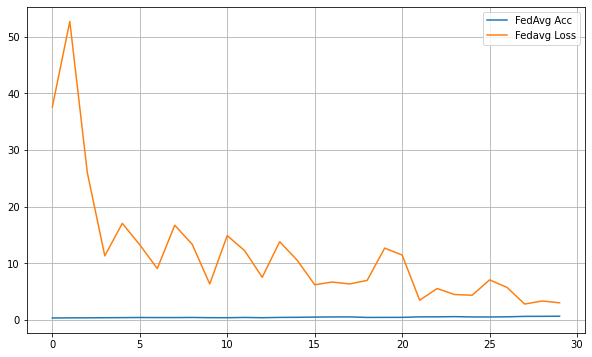

In [3]:
num = 6
average_acc_list, average_loss_list = [], []

for i in range(30):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

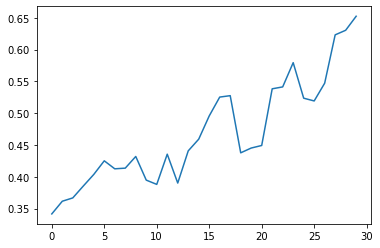

In [4]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [5]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.3415877785119746, 0.3615338890916771, 0.36676722247567445, 0.38540277874304185, 0.4036655544406838, 0.42509722262620925, 0.4125188879668713, 0.4135672218269772, 0.4319227784872055, 0.39474444625278315, 0.388019445952442, 0.4355211122996277, 0.3901233336163892, 0.44073500157230433, 0.4591550007876423, 0.49568333625793454, 0.5253277778211567, 0.5275466648240884, 0.4376649990677834, 0.44518833214210135, 0.4492100012385183, 0.5383383348584175, 0.5413216672009892, 0.5794427761601078, 0.5235938895907667, 0.5192394439131022, 0.5471661114444335, 0.6231738875309626, 0.6303877789113256, 0.6524477774898211] 

[37.57059434784783, 52.67420132358868, 26.02109497586886, 11.30545305808385, 17.03641239669588, 13.254467449585597, 9.071777207983866, 16.715235624048443, 13.322009625699785, 6.337346582280265, 14.879437767797048, 12.203386799494426, 7.5173388163248696, 13.809534676207436, 10.531109388669332, 6.199279492762353, 6.682743846376737, 6.3469015654590395, 6.982189711597232, 12.67111454837852, 1

# Labelwise clustering

In [6]:
acc0 = [[0.6212000250816345, 0.6022999882698059, 0.5403000116348267, 0.6740999817848206, 0.6013000011444092, 0.5475999712944031, 0.5428000092506409, 0.5461999773979187, 0.5697000026702881, 0.5644000172615051, 0.5802000164985657, 0.5415999889373779, 0.5529000163078308, 0.41929998993873596, 0.5976999998092651, 0.5597000122070312, 0.45559999346733093, 0.5781000256538391, 0.5152999758720398, 0.45399999618530273, 0.5134000182151794, 0.42879998683929443, 0.5026999711990356, 0.5587000250816345, 0.4860000014305115, 0.5209000110626221, 0.4968999922275543, 0.5645999908447266, 0.5791000127792358, 0.4390000104904175], [0.5958999991416931, 0.5767999887466431, 0.6615999937057495, 0.6535000205039978, 0.6420999765396118, 0.5940999984741211, 0.6565999984741211, 0.5871000289916992, 0.5554999709129333, 0.5625, 0.6287999749183655, 0.588100016117096, 0.5042999982833862, 0.6826000213623047, 0.6100999712944031, 0.6829000115394592, 0.5738000273704529, 0.6018999814987183, 0.6395000219345093, 0.5968999862670898, 0.6575000286102295, 0.5580999851226807, 0.5016999840736389, 0.4641000032424927, 0.4943000078201294, 0.46070000529289246, 0.597599983215332, 0.49079999327659607, 0.5760999917984009, 0.5271999835968018], [0.6679999828338623, 0.6164000034332275, 0.6700999736785889, 0.6453999876976013, 0.6176999807357788, 0.6610000133514404, 0.6978999972343445, 0.6700000166893005, 0.578499972820282, 0.6243000030517578, 0.629800021648407, 0.5867000222206116, 0.5382999777793884, 0.6036999821662903, 0.5888000130653381, 0.5839999914169312, 0.664900004863739, 0.5372999906539917, 0.5879999995231628, 0.5052000284194946, 0.578000009059906, 0.5900999903678894, 0.6607999801635742, 0.6046000123023987, 0.5430999994277954, 0.6513000130653381, 0.565500020980835, 0.499099999666214, 0.5187000036239624, 0.5192999839782715], [0.6407999992370605, 0.6912000179290771, 0.6100000143051147, 0.6761999726295471, 0.6424000263214111, 0.678600013256073, 0.7107999920845032, 0.6473000049591064, 0.6919000148773193, 0.7159000039100647, 0.6801000237464905, 0.5857999920845032, 0.65829998254776, 0.6222000122070312, 0.5188999772071838, 0.5856999754905701, 0.5419999957084656, 0.6492000222206116, 0.5717999935150146, 0.6251999735832214, 0.6057000160217285, 0.6704000234603882, 0.6172999739646912, 0.6093999743461609, 0.5874000191688538, 0.5472999811172485, 0.5040000081062317, 0.6195999979972839, 0.5056999921798706, 0.5134000182151794], [0.6333000063896179, 0.6255999803543091, 0.647599995136261, 0.679099977016449, 0.6894999742507935, 0.6499000191688538, 0.6980999708175659, 0.6773999929428101, 0.7003999948501587, 0.6100000143051147, 0.6425999999046326, 0.6942999958992004, 0.6570000052452087, 0.6563000082969666, 0.7121999859809875, 0.677299976348877, 0.6632000207901001, 0.5666999816894531, 0.4934999942779541, 0.59170001745224, 0.5958999991416931, 0.5256999731063843, 0.6011999845504761, 0.5577999949455261, 0.5835999846458435, 0.5687999725341797, 0.5777999758720398, 0.5455999970436096, 0.6128000020980835, 0.5982000231742859], [0.652999997138977, 0.6741999983787537, 0.6937000155448914, 0.6725000143051147, 0.6735000014305115, 0.6344000101089478, 0.6582000255584717, 0.6687999963760376, 0.7042999863624573, 0.6539999842643738, 0.6140999794006348, 0.738099992275238, 0.642799973487854, 0.6312000155448914, 0.6456999778747559, 0.6478999853134155, 0.6467000246047974, 0.6966000199317932, 0.684499979019165, 0.6283000111579895, 0.6254000067710876, 0.703000009059906, 0.6419000029563904, 0.6599000096321106, 0.6158999800682068, 0.5539000034332275, 0.5450999736785889, 0.612500011920929, 0.5684999823570251, 0.6139000058174133], [0.652400016784668, 0.6419000029563904, 0.7153000235557556, 0.6342999935150146, 0.65420001745224, 0.7389000058174133, 0.6452000141143799, 0.7188000082969666, 0.6797000169754028, 0.7056999802589417, 0.5547000169754028, 0.5616999864578247, 0.6883000135421753, 0.6395999789237976, 0.6736999750137329, 0.6488000154495239, 0.576200008392334, 0.6416000127792358, 0.5789999961853027, 0.5659000277519226, 0.5527999997138977, 0.6929000020027161, 0.5687000155448914, 0.6061000227928162, 0.5349000096321106, 0.6166999936103821, 0.6004999876022339, 0.5468999743461609, 0.5918999910354614, 0.5210000276565552], [0.6621000170707703, 0.6491000056266785, 0.7293000221252441, 0.6801999807357788, 0.6984999775886536, 0.6358000040054321, 0.7235999703407288, 0.7240999937057495, 0.6460999846458435, 0.5938000082969666, 0.6456000208854675, 0.555400013923645, 0.5777000188827515, 0.5932999849319458, 0.6697999835014343, 0.5669000148773193, 0.6270999908447266, 0.5997999906539917, 0.5608999729156494, 0.5684999823570251, 0.6215000152587891, 0.5568000078201294, 0.5149999856948853, 0.617900013923645, 0.541100025177002, 0.6376000046730042, 0.6459000110626221, 0.5185999870300293, 0.6406000256538391, 0.5385000109672546], [0.7170000076293945, 0.7361999750137329, 0.6746000051498413, 0.7634000182151794, 0.6736999750137329, 0.6427000164985657, 0.7013000249862671, 0.6725000143051147, 0.6995000243186951, 0.6746000051498413, 0.757099986076355, 0.6310999989509583, 0.6945000290870667, 0.6886000037193298, 0.722100019454956, 0.6881999969482422, 0.7166000008583069, 0.6388000249862671, 0.7196000218391418, 0.697700023651123, 0.6478000283241272, 0.6985999941825867, 0.692799985408783, 0.6176000237464905, 0.5925999879837036, 0.6280999779701233, 0.5666999816894531, 0.5928000211715698, 0.6699000000953674, 0.5997999906539917], [0.6898999810218811, 0.7276999950408936, 0.7153000235557556, 0.7402999997138977, 0.6929000020027161, 0.6862999796867371, 0.7228000164031982, 0.7738999724388123, 0.6715999841690063, 0.7044000029563904, 0.7070000171661377, 0.6703000068664551, 0.6579999923706055, 0.6794999837875366, 0.6248999834060669, 0.6236000061035156, 0.6353999972343445, 0.5824000239372253, 0.6237999796867371, 0.6173999905586243, 0.6370000243186951, 0.5551999807357788, 0.6905999779701233, 0.5716000199317932, 0.6209999918937683, 0.6407999992370605, 0.6306999921798706, 0.5788000226020813, 0.5938000082969666, 0.5618000030517578], [0.7630000114440918, 0.718999981880188, 0.7350999712944031, 0.7634000182151794, 0.7006000280380249, 0.7139000296592712, 0.6679999828338623, 0.7038999795913696, 0.7648000121116638, 0.6933000087738037, 0.6682000160217285, 0.6769000291824341, 0.6780999898910522, 0.7257000207901001, 0.6438999772071838, 0.703000009059906, 0.6919999718666077, 0.6378999948501587, 0.7102000117301941, 0.6521999835968018, 0.5910000205039978, 0.6116999983787537, 0.6026999950408936, 0.5575000047683716, 0.7258999943733215, 0.5697000026702881, 0.6561999917030334, 0.5597000122070312, 0.612500011920929, 0.6050999760627747], [0.7286999821662903, 0.7170000076293945, 0.6924999952316284, 0.7386999726295471, 0.7750999927520752, 0.724399983882904, 0.7178999781608582, 0.757099986076355, 0.6726999878883362, 0.751800000667572, 0.7099000215530396, 0.6937000155448914, 0.6866999864578247, 0.7329000234603882, 0.732200026512146, 0.7300000190734863, 0.6927000284194946, 0.6647999882698059, 0.6898999810218811, 0.6352999806404114, 0.6133000254631042, 0.6147000193595886, 0.6000000238418579, 0.5795000195503235, 0.609499990940094, 0.694100022315979, 0.6563000082969666, 0.5630000233650208, 0.4652999937534332, 0.5799999833106995], [0.6675000190734863, 0.7251999974250793, 0.7142999768257141, 0.6987000107765198, 0.7609999775886536, 0.7505999803543091, 0.7386999726295471, 0.7511000037193298, 0.7210999727249146, 0.6751999855041504, 0.7217000126838684, 0.6879000067710876, 0.6614000201225281, 0.6075000166893005, 0.6700999736785889, 0.7459999918937683, 0.6438999772071838, 0.6643999814987183, 0.6610000133514404, 0.6826000213623047, 0.6098999977111816, 0.7195000052452087, 0.6657000184059143, 0.7275999784469604, 0.6825000047683716, 0.6626999974250793, 0.6794000267982483, 0.6060000061988831, 0.6183000206947327, 0.7038999795913696], [0.6653000116348267, 0.7221999764442444, 0.6863999962806702, 0.7028999924659729, 0.7215999960899353, 0.6825000047683716, 0.7745000123977661, 0.6868000030517578, 0.7886999845504761, 0.72079998254776, 0.6977999806404114, 0.733299970626831, 0.7189000248908997, 0.7368999719619751, 0.6703000068664551, 0.6592000126838684, 0.6427000164985657, 0.6118000149726868, 0.6875, 0.7053999900817871, 0.6575000286102295, 0.6873999834060669, 0.7653999924659729, 0.7218000292778015, 0.7372000217437744, 0.6753000020980835, 0.5996999740600586, 0.6937999725341797, 0.6186000108718872, 0.6481000185012817], [0.7271000146865845, 0.6916000247001648, 0.7311000227928162, 0.7052000164985657, 0.7505000233650208, 0.7642999887466431, 0.6550999879837036, 0.7509999871253967, 0.725600004196167, 0.6657999753952026, 0.621399998664856, 0.6018000245094299, 0.6388999819755554, 0.6029999852180481, 0.6625999808311462, 0.6464999914169312, 0.6420999765396118, 0.6693999767303467, 0.6291999816894531, 0.7009999752044678, 0.7210000157356262, 0.635699987411499, 0.6416000127792358, 0.6647999882698059, 0.6539000272750854, 0.7459999918937683, 0.5900999903678894, 0.7099000215530396, 0.6564000248908997, 0.6636000275611877], [0.7231000065803528, 0.7222999930381775, 0.6840999722480774, 0.6935999989509583, 0.7204999923706055, 0.7445999979972839, 0.7447999715805054, 0.7069000005722046, 0.7425000071525574, 0.635200023651123, 0.6930999755859375, 0.6802999973297119, 0.7164000272750854, 0.6790000200271606, 0.6797999739646912, 0.6322000026702881, 0.6693000197410583, 0.7822999954223633, 0.6736999750137329, 0.7802000045776367, 0.727400004863739, 0.558899998664856, 0.670799970626831, 0.6134999990463257, 0.6310999989509583, 0.6847000122070312, 0.5745999813079834, 0.73580002784729, 0.6204000115394592, 0.6682999730110168], [0.7986999750137329, 0.7562000155448914, 0.694100022315979, 0.7731999754905701, 0.7039999961853027, 0.741100013256073, 0.7088000178337097, 0.7601000070571899, 0.7196000218391418, 0.7524999976158142, 0.7541999816894531, 0.6078000068664551, 0.7203999757766724, 0.6693999767303467, 0.7462000250816345, 0.7052000164985657, 0.6773999929428101, 0.6718000173568726, 0.7171000242233276, 0.7195000052452087, 0.6917999982833862, 0.7361000180244446, 0.6858000159263611, 0.7577999830245972, 0.6509000062942505, 0.6230999827384949, 0.6640999913215637, 0.718500018119812, 0.6976000070571899, 0.7639999985694885], [0.6912999749183655, 0.7172999978065491, 0.7197999954223633, 0.7387999892234802, 0.7039999961853027, 0.7461000084877014, 0.6902999877929688, 0.7120000123977661, 0.7501999735832214, 0.7425000071525574, 0.7547000050544739, 0.7139999866485596, 0.7376000285148621, 0.7125999927520752, 0.7081000208854675, 0.6643999814987183, 0.7455000281333923, 0.7250999808311462, 0.7652999758720398, 0.7304999828338623, 0.6883999705314636, 0.6685000061988831, 0.6074000000953674, 0.7639999985694885, 0.7199000120162964, 0.7077000141143799, 0.7253999710083008, 0.7494000196456909, 0.7372999787330627, 0.7045999765396118], [0.7368000149726868, 0.7009000182151794, 0.6894000172615051, 0.6748999953269958, 0.6862000226974487, 0.7168999910354614, 0.6991000175476074, 0.652400016784668, 0.7070000171661377, 0.7116000056266785, 0.6694999933242798, 0.6836000084877014, 0.6506999731063843, 0.6344000101089478, 0.6740999817848206, 0.6796000003814697, 0.6074000000953674, 0.7516000270843506, 0.5785999894142151, 0.6730999946594238, 0.6625999808311462, 0.7325999736785889, 0.623199999332428, 0.6212000250816345, 0.6650000214576721, 0.6588000059127808, 0.6617000102996826, 0.6790000200271606, 0.6625999808311462, 0.6412000060081482], [0.6812000274658203, 0.7156999707221985, 0.6991999745368958, 0.7153000235557556, 0.6837999820709229, 0.7391999959945679, 0.7759000062942505, 0.6891999840736389, 0.7016000151634216, 0.7168999910354614, 0.7146999835968018, 0.698199987411499, 0.7032999992370605, 0.6837000250816345, 0.7093999981880188, 0.623199999332428, 0.6815000176429749, 0.7159000039100647, 0.6151999831199646, 0.6517000198364258, 0.6909000277519226, 0.6470999717712402, 0.7124999761581421, 0.6108999848365784, 0.637499988079071, 0.7261000275611877, 0.6712999939918518, 0.6711999773979187, 0.7045999765396118, 0.6074000000953674], [0.6955999732017517, 0.7045000195503235, 0.7143999934196472, 0.6988000273704529, 0.6833000183105469, 0.7257000207901001, 0.725600004196167, 0.6596999764442444, 0.785099983215332, 0.7269999980926514, 0.6812999844551086, 0.7239999771118164, 0.667900025844574, 0.6122999787330627, 0.6779999732971191, 0.65420001745224, 0.703499972820282, 0.6690999865531921, 0.6104999780654907, 0.6432999968528748, 0.6898000240325928, 0.6764000058174133, 0.7064999938011169, 0.6305999755859375, 0.679099977016449, 0.5910999774932861, 0.6765000224113464, 0.578499972820282, 0.6136000156402588, 0.6057000160217285], [0.7573000192642212, 0.7368999719619751, 0.7501999735832214, 0.732699990272522, 0.7770000100135803, 0.782800018787384, 0.745199978351593, 0.7425000071525574, 0.7836999893188477, 0.7429999709129333, 0.7416999936103821, 0.7983999848365784, 0.7710000276565552, 0.7850000262260437, 0.7261000275611877, 0.7264000177383423, 0.6759999990463257, 0.6868000030517578, 0.6848000288009644, 0.708299994468689, 0.7263000011444092, 0.7271000146865845, 0.7396000027656555, 0.6377999782562256, 0.6764000058174133, 0.6122999787330627, 0.6226000189781189, 0.6078000068664551, 0.7135999798774719, 0.5577999949455261], [0.7498999834060669, 0.7203999757766724, 0.7526000142097473, 0.7408000230789185, 0.7190999984741211, 0.7767000198364258, 0.7455999851226807, 0.7760999798774719, 0.7376999855041504, 0.7689999938011169, 0.7821999788284302, 0.7781999707221985, 0.7217000126838684, 0.7056999802589417, 0.7645000219345093, 0.6949999928474426, 0.7218999862670898, 0.7466999888420105, 0.7200000286102295, 0.6735000014305115, 0.7027999758720398, 0.7120000123977661, 0.6751000285148621, 0.5949000120162964, 0.6977999806404114, 0.6572999954223633, 0.6202999949455261, 0.7202000021934509, 0.5924999713897705, 0.6868000030517578], [0.7470999956130981, 0.7767999768257141, 0.8048999905586243, 0.771399974822998, 0.7911999821662903, 0.757099986076355, 0.7337999939918518, 0.7107999920845032, 0.7364000082015991, 0.7789999842643738, 0.6902999877929688, 0.722599983215332, 0.7217000126838684, 0.7408999800682068, 0.7063999772071838, 0.7389000058174133, 0.6550999879837036, 0.7319999933242798, 0.7516999840736389, 0.7875999808311462, 0.6879000067710876, 0.6694999933242798, 0.6869999766349792, 0.6841999888420105, 0.6924999952316284, 0.6359000205993652, 0.7124999761581421, 0.7105000019073486, 0.6850000023841858, 0.6583999991416931], [0.7843999862670898, 0.7303000092506409, 0.7562999725341797, 0.7512000203132629, 0.7904000282287598, 0.7670999765396118, 0.8130999803543091, 0.7646999955177307, 0.79339998960495, 0.7861999869346619, 0.7935000061988831, 0.7598999738693237, 0.7760000228881836, 0.7911999821662903, 0.7297999858856201, 0.6834999918937683, 0.7300999760627747, 0.7840999960899353, 0.708299994468689, 0.7878999710083008, 0.7400000095367432, 0.6692000031471252, 0.7405999898910522, 0.5968000292778015, 0.6633999943733215, 0.7142999768257141, 0.7067999839782715, 0.7727000117301941, 0.675599992275238, 0.666100025177002], [0.7876999974250793, 0.8309000134468079, 0.7781999707221985, 0.8165000081062317, 0.7706000208854675, 0.7441999912261963, 0.7544999718666077, 0.7477999925613403, 0.7627000212669373, 0.7803999781608582, 0.8163999915122986, 0.7032999992370605, 0.695900022983551, 0.7427999973297119, 0.7475000023841858, 0.7591000199317932, 0.7394999861717224, 0.6823999881744385, 0.7766000032424927, 0.7738999724388123, 0.7111999988555908, 0.7864999771118164, 0.6985999941825867, 0.7339000105857849, 0.7360000014305115, 0.758899986743927, 0.7459999918937683, 0.7330999970436096, 0.6643999814987183, 0.7279000282287598], [0.7527999877929688, 0.8098000288009644, 0.8065999746322632, 0.8083999752998352, 0.7847999930381775, 0.795799970626831, 0.7623000144958496, 0.7962999939918518, 0.8108000159263611, 0.7860999703407288, 0.7620999813079834, 0.7390000224113464, 0.7626000046730042, 0.8192999958992004, 0.7760000228881836, 0.7067000269889832, 0.742900013923645, 0.7174999713897705, 0.7623000144958496, 0.7016000151634216, 0.8156999945640564, 0.7436000108718872, 0.771399974822998, 0.676800012588501, 0.7483999729156494, 0.7069000005722046, 0.704200029373169, 0.7570000290870667, 0.7554000020027161, 0.7217000126838684], [0.7878000140190125, 0.7734000086784363, 0.8095999956130981, 0.7739999890327454, 0.7674999833106995, 0.7890999913215637, 0.7825000286102295, 0.8144999742507935, 0.7598000168800354, 0.7491000294685364, 0.7329999804496765, 0.7307999730110168, 0.7106000185012817, 0.7289000153541565, 0.7358999848365784, 0.6998999714851379, 0.7350999712944031, 0.7279999852180481, 0.7351999878883362, 0.7113000154495239, 0.7053999900817871, 0.7254999876022339, 0.7390999794006348, 0.7495999932289124, 0.6851999759674072, 0.7448999881744385, 0.7347999811172485, 0.7372999787330627, 0.7258999943733215, 0.7322999835014343], [0.7540000081062317, 0.7623000144958496, 0.7943000197410583, 0.7731000185012817, 0.7541000247001648, 0.7699999809265137, 0.7594000101089478, 0.753000020980835, 0.7893999814987183, 0.7788000106811523, 0.7896999716758728, 0.7419999837875366, 0.7860000133514404, 0.8195000290870667, 0.753000020980835, 0.7117000222206116, 0.7811999917030334, 0.8054999709129333, 0.7831000089645386, 0.739300012588501, 0.7635999917984009, 0.71670001745224, 0.6988000273704529, 0.7991999983787537, 0.7087000012397766, 0.7455999851226807, 0.7229999899864197, 0.7616999745368958, 0.7329999804496765, 0.7332000136375427], [0.8223000168800354, 0.7925999760627747, 0.7594000101089478, 0.7645999789237976, 0.8228999972343445, 0.7677000164985657, 0.7699999809265137, 0.7975000143051147, 0.8034999966621399, 0.781000018119812, 0.7638000249862671, 0.8167999982833862, 0.7724000215530396, 0.7720000147819519, 0.779699981212616, 0.7774999737739563, 0.7322999835014343, 0.7803999781608582, 0.772599995136261, 0.8026000261306763, 0.6851999759674072, 0.7998999953269958, 0.8093000054359436, 0.7429999709129333, 0.7056999802589417, 0.7702999711036682, 0.7576000094413757, 0.6848000288009644, 0.7164000272750854, 0.7809000015258789]]
loss0 = [[2.9828665256500244, 2.9900147914886475, 2.239868402481079, 0.9953853487968445, 2.3709659576416016, 2.711038589477539, 2.6887998580932617, 2.2790942192077637, 3.044736862182617, 3.602130889892578, 4.403465270996094, 5.094719409942627, 4.446211338043213, 2.7925868034362793, 3.021911144256592, 4.79634428024292, 3.2435555458068848, 6.879979133605957, 4.393930435180664, 5.916877746582031, 3.348313570022583, 6.523296356201172, 5.199848651885986, 6.0362162590026855, 4.029232025146484, 5.287978649139404, 5.6991705894470215, 4.35960578918457, 5.061052322387695, 3.8525843620300293], [2.684414863586426, 3.214344024658203, 2.488866090774536, 2.924665927886963, 3.054898500442505, 2.595651626586914, 1.9727002382278442, 2.306917190551758, 2.8049802780151367, 3.0832669734954834, 3.0319268703460693, 3.0743558406829834, 3.602262496948242, 4.040663242340088, 3.0568833351135254, 2.5887370109558105, 3.3106932640075684, 1.9241328239440918, 3.44701886177063, 3.961738348007202, 4.442019462585449, 5.9739580154418945, 2.9709389209747314, 7.1473259925842285, 3.8056914806365967, 5.177308082580566, 6.485039234161377, 4.225867748260498, 3.755199909210205, 3.4419610500335693], [1.2938312292099, 2.0927226543426514, 2.798170804977417, 2.531975269317627, 3.126528024673462, 2.238562822341919, 1.2675940990447998, 2.109262228012085, 2.779536247253418, 2.700883150100708, 3.120657205581665, 3.075986623764038, 3.426589012145996, 4.130727767944336, 4.012095928192139, 3.4029507637023926, 3.939291477203369, 3.4178903102874756, 3.1763455867767334, 3.0769896507263184, 3.2400550842285156, 3.120011806488037, 3.597579002380371, 1.8121534585952759, 3.672619581222534, 3.6306796073913574, 5.39784574508667, 3.4999120235443115, 4.227828502655029, 4.594959259033203], [2.0622098445892334, 2.3373138904571533, 2.5901217460632324, 2.382338762283325, 2.1514432430267334, 2.6069579124450684, 2.2476422786712646, 2.1036429405212402, 2.051478385925293, 2.472872734069824, 1.1356463432312012, 2.1593177318573, 3.700258493423462, 3.484957456588745, 2.632566213607788, 3.2088170051574707, 3.5500786304473877, 2.56272554397583, 3.279008626937866, 2.693833351135254, 2.7488155364990234, 3.6903483867645264, 2.841979742050171, 3.71882700920105, 2.277987480163574, 3.459630012512207, 3.2975289821624756, 5.386776447296143, 3.911501884460449, 3.9458413124084473], [1.746140480041504, 2.5795211791992188, 2.2754597663879395, 2.2145817279815674, 3.2507011890411377, 1.885854721069336, 1.4664489030838013, 2.4245898723602295, 1.8214480876922607, 1.997635006904602, 1.9067507982254028, 1.979336142539978, 1.842120885848999, 2.554932117462158, 1.9873493909835815, 2.4153695106506348, 1.342530608177185, 3.786747932434082, 7.612627983093262, 4.360925674438477, 4.452810764312744, 3.711236000061035, 4.700810432434082, 4.1570353507995605, 3.502980947494507, 3.2233998775482178, 3.345818042755127, 3.2746706008911133, 2.5373454093933105, 3.488741874694824], [1.5719873905181885, 2.086906909942627, 1.6386685371398926, 1.8782089948654175, 1.6579999923706055, 2.057687997817993, 1.9913970232009888, 1.9152494668960571, 1.9303505420684814, 3.0203607082366943, 3.8731889724731445, 1.273347020149231, 3.602447271347046, 2.129621982574463, 2.3462629318237305, 2.9293596744537354, 2.4211084842681885, 1.6887565851211548, 2.181933879852295, 2.7375941276550293, 3.068704605102539, 1.7996478080749512, 2.916787624359131, 3.2876317501068115, 2.4823553562164307, 2.7654929161071777, 3.8445630073547363, 4.383691787719727, 2.9537346363067627, 3.1871590614318848], [2.3778154850006104, 2.1743738651275635, 2.1615076065063477, 1.662473440170288, 1.6256316900253296, 1.1439062356948853, 2.5227763652801514, 2.3354196548461914, 1.5495530366897583, 2.501887559890747, 2.880356550216675, 3.161043167114258, 2.3350846767425537, 2.0730767250061035, 4.008080959320068, 1.929396629333496, 3.3110902309417725, 2.3999061584472656, 2.9778878688812256, 3.4232754707336426, 3.5308609008789062, 2.323787212371826, 3.2532200813293457, 3.5078840255737305, 2.625181198120117, 3.8928704261779785, 2.796013593673706, 3.80224347114563, 2.4775643348693848, 4.971678733825684], [2.56927490234375, 1.8869869709014893, 1.3616141080856323, 2.007251739501953, 1.4909650087356567, 3.3448691368103027, 1.4479190111160278, 1.0147966146469116, 1.6607660055160522, 2.4404401779174805, 2.4429402351379395, 2.7834746837615967, 2.4081287384033203, 3.3311281204223633, 1.871124267578125, 2.3854801654815674, 2.928269147872925, 2.3479807376861572, 5.566281318664551, 2.7113118171691895, 1.894225835800171, 7.999899864196777, 7.303211688995361, 2.2187178134918213, 3.1869122982025146, 1.7610490322113037, 3.4406015872955322, 3.6374051570892334, 2.7346839904785156, 4.384063720703125], [1.9314582347869873, 1.7453066110610962, 1.5984777212142944, 1.3681495189666748, 3.159552812576294, 2.5798497200012207, 1.7702207565307617, 1.7657095193862915, 1.642087459564209, 2.4619762897491455, 1.1299647092819214, 2.7778024673461914, 2.370567798614502, 3.520477294921875, 1.3978607654571533, 1.7257091999053955, 2.3328511714935303, 2.683375835418701, 2.438992500305176, 1.9725421667099, 2.7706801891326904, 3.414043426513672, 2.7296173572540283, 2.4810585975646973, 2.868225336074829, 2.669229745864868, 4.816714286804199, 2.2689931392669678, 1.6872328519821167, 2.945477247238159], [2.8318302631378174, 1.4570553302764893, 1.5010168552398682, 1.6554772853851318, 1.851786494255066, 1.5737180709838867, 1.6793160438537598, 1.0071083307266235, 2.472829818725586, 1.7015525102615356, 2.944237470626831, 2.4244675636291504, 2.3653385639190674, 1.9344412088394165, 2.2783780097961426, 3.727945327758789, 2.387066125869751, 2.6902034282684326, 3.617154359817505, 2.2535033226013184, 3.2093186378479004, 4.15943717956543, 2.7558341026306152, 4.91005802154541, 2.9950482845306396, 2.712265968322754, 3.0214123725891113, 2.9504714012145996, 2.5401535034179688, 3.4373621940612793], [2.1052680015563965, 2.302563190460205, 1.6228952407836914, 1.2014641761779785, 2.576685905456543, 1.7692632675170898, 3.6686367988586426, 1.9589327573776245, 1.4239320755004883, 2.0794801712036133, 2.506201982498169, 2.2399392127990723, 2.814364194869995, 2.6097049713134766, 2.3516786098480225, 2.4854633808135986, 4.3160200119018555, 4.065864562988281, 2.005584239959717, 1.7596664428710938, 3.0987167358398438, 3.157360792160034, 3.2815840244293213, 2.912912607192993, 2.1414108276367188, 2.9280266761779785, 2.0423059463500977, 4.095609188079834, 2.7726268768310547, 2.178445339202881], [1.5716307163238525, 1.7276899814605713, 1.848218560218811, 1.3921566009521484, 0.9955152273178101, 1.4246500730514526, 1.8944116830825806, 1.346381425857544, 1.6743285655975342, 1.3521111011505127, 1.7627906799316406, 2.2098312377929688, 2.084383010864258, 1.3540743589401245, 2.195115089416504, 1.7138923406600952, 2.428088665008545, 1.9985603094100952, 2.0287766456604004, 1.9420888423919678, 2.5743248462677, 2.337193250656128, 3.405733585357666, 3.0065512657165527, 2.1415505409240723, 1.6975975036621094, 3.417976140975952, 3.484034776687622, 4.1562066078186035, 5.584146976470947], [1.5891294479370117, 1.3750154972076416, 1.299699306488037, 1.2265650033950806, 0.8314002752304077, 0.9737666249275208, 1.3890433311462402, 1.7229037284851074, 1.0672647953033447, 2.080171585083008, 1.6895140409469604, 1.5115947723388672, 1.9377806186676025, 2.230527639389038, 1.6742980480194092, 1.8923931121826172, 1.4592995643615723, 1.6482313871383667, 1.8881040811538696, 1.7142618894577026, 3.256300926208496, 1.8763619661331177, 1.4446942806243896, 1.2804467678070068, 1.9978556632995605, 1.7270009517669678, 1.5512382984161377, 2.321444511413574, 1.8281253576278687, 1.0622409582138062], [1.7633146047592163, 1.782883644104004, 1.9422004222869873, 1.4409987926483154, 2.371741771697998, 2.224008083343506, 1.7092517614364624, 1.8159353733062744, 0.9764846563339233, 1.429408311843872, 2.2559285163879395, 1.2410269975662231, 2.2205162048339844, 1.9417479038238525, 1.9794939756393433, 1.873961091041565, 2.946866512298584, 3.8521320819854736, 1.8784302473068237, 2.034067153930664, 2.5506770610809326, 2.0623157024383545, 1.2486929893493652, 1.408077597618103, 1.3185890913009644, 2.1973867416381836, 3.1992478370666504, 2.6649322509765625, 4.5203657150268555, 1.985507845878601], [1.7816299200057983, 2.445791482925415, 1.519299864768982, 1.8169581890106201, 1.3655530214309692, 1.5192010402679443, 2.9279415607452393, 1.18141770362854, 2.344567060470581, 2.167665719985962, 2.1555163860321045, 2.681269407272339, 2.082742691040039, 2.130974531173706, 1.5052541494369507, 2.614982843399048, 2.5248489379882812, 3.485037088394165, 2.402108907699585, 1.745718002319336, 1.78548002243042, 3.288377046585083, 1.9790351390838623, 2.834585428237915, 1.7633463144302368, 1.1163265705108643, 4.54209041595459, 2.2207343578338623, 2.151294469833374, 3.45521879196167], [1.0718646049499512, 2.013814926147461, 3.5181686878204346, 3.234288454055786, 1.188292145729065, 1.3600105047225952, 1.0002368688583374, 2.5083045959472656, 1.3054026365280151, 3.507263660430908, 4.2339186668396, 2.3972551822662354, 2.2037694454193115, 4.542594909667969, 2.949216365814209, 1.814937710762024, 1.928540587425232, 1.3655015230178833, 3.030367851257324, 0.9476122856140137, 2.0995209217071533, 4.299131870269775, 2.8268721103668213, 2.321906566619873, 3.01021146774292, 2.81382417678833, 3.5469515323638916, 1.2849383354187012, 4.1153764724731445, 3.4748475551605225], [0.8969271779060364, 0.9870123267173767, 1.8772865533828735, 0.9145474433898926, 2.273237705230713, 1.6575312614440918, 1.949550986289978, 1.1513625383377075, 1.7201132774353027, 1.5691629648208618, 1.283518671989441, 3.2614474296569824, 1.7561215162277222, 3.1299526691436768, 1.1454477310180664, 1.8673804998397827, 1.8816601037979126, 2.46895170211792, 1.3136152029037476, 0.9631953239440918, 1.5355664491653442, 1.4923887252807617, 1.773621916770935, 1.203954815864563, 2.2060744762420654, 2.4763028621673584, 3.0364630222320557, 1.939979076385498, 1.6527060270309448, 1.0742013454437256], [2.5580406188964844, 1.4858044385910034, 1.4450334310531616, 1.3964699506759644, 1.8976976871490479, 1.2662230730056763, 1.3042653799057007, 1.462764859199524, 1.3556787967681885, 1.2900091409683228, 1.264181137084961, 1.4702662229537964, 1.5039820671081543, 1.730587124824524, 1.6323074102401733, 1.8831493854522705, 1.1461586952209473, 1.3057289123535156, 1.0683929920196533, 2.180023431777954, 1.7693843841552734, 1.6776866912841797, 2.8902194499969482, 1.330142855644226, 1.782488226890564, 1.4480090141296387, 1.3031097650527954, 1.434875249862671, 1.3088862895965576, 1.8504146337509155], [1.3294070959091187, 1.960199236869812, 1.3758201599121094, 1.8618496656417847, 2.3940505981445312, 2.1433966159820557, 1.3293261528015137, 1.6980173587799072, 1.2322092056274414, 1.466967225074768, 1.8950263261795044, 1.6572396755218506, 2.25994873046875, 2.1138498783111572, 1.9002931118011475, 2.0859973430633545, 2.3304648399353027, 0.9124425053596497, 2.8535356521606445, 2.436798572540283, 1.447456955909729, 1.1769174337387085, 1.7873376607894897, 2.5614280700683594, 1.8021615743637085, 2.0071213245391846, 1.7710930109024048, 1.6488302946090698, 1.5695359706878662, 2.312246799468994], [1.6468095779418945, 2.1480557918548584, 1.4457818269729614, 1.6203486919403076, 3.2964835166931152, 1.2814353704452515, 1.2707146406173706, 2.7682371139526367, 1.8002618551254272, 1.296876072883606, 2.1671485900878906, 1.775856614112854, 2.1396729946136475, 2.350853681564331, 2.2374441623687744, 2.6531805992126465, 1.8403230905532837, 1.7173255681991577, 2.381906747817993, 3.713848114013672, 2.7135274410247803, 3.0113584995269775, 2.447274684906006, 3.659245252609253, 2.9656574726104736, 2.199295997619629, 2.1348273754119873, 1.9157041311264038, 1.4572734832763672, 4.533169269561768], [1.1724004745483398, 2.4286341667175293, 1.7823357582092285, 1.6401541233062744, 2.594512701034546, 2.3820581436157227, 1.3612060546875, 3.984304189682007, 1.1148864030838013, 1.537160038948059, 1.383340835571289, 2.18221116065979, 2.309145212173462, 2.7961010932922363, 1.7149709463119507, 1.7936679124832153, 2.9789083003997803, 3.3180174827575684, 2.0327272415161133, 3.8571460247039795, 2.1886446475982666, 1.874893307685852, 1.3977470397949219, 3.9093730449676514, 2.728982448577881, 3.2285656929016113, 2.7606699466705322, 3.187487840652466, 3.3488922119140625, 3.0342183113098145], [1.0780880451202393, 1.1547579765319824, 2.105811357498169, 1.828102946281433, 0.8669918775558472, 1.024321436882019, 1.1048905849456787, 1.4056850671768188, 0.8844119906425476, 1.0441114902496338, 1.1689893007278442, 1.014494776725769, 1.0316840410232544, 1.0336437225341797, 1.2465505599975586, 1.2981491088867188, 2.298577308654785, 1.508241891860962, 1.9273937940597534, 2.2165441513061523, 1.4734078645706177, 1.7938661575317383, 1.0350273847579956, 2.317415952682495, 2.2494046688079834, 2.748774528503418, 2.3869192600250244, 2.3257296085357666, 2.0706300735473633, 2.8077645301818848], [2.725313425064087, 2.2547850608825684, 1.1965148448944092, 1.1772900819778442, 2.843416452407837, 1.3289895057678223, 3.033734083175659, 1.1872787475585938, 1.5890659093856812, 1.1260948181152344, 1.1971791982650757, 0.8447072505950928, 1.9246572256088257, 2.512099027633667, 0.9685927033424377, 2.317725896835327, 1.9094994068145752, 1.3625599145889282, 2.201002836227417, 4.582748889923096, 1.6033324003219604, 1.7663931846618652, 2.256964921951294, 2.5721142292022705, 2.0420682430267334, 4.304174423217773, 4.470272064208984, 2.1162302494049072, 3.4838156700134277, 1.3805919885635376], [2.9935059547424316, 1.1800570487976074, 1.0540655851364136, 1.1644924879074097, 1.102913498878479, 1.5680675506591797, 2.7340927124023438, 1.3097683191299438, 1.6994620561599731, 1.4228832721710205, 1.487776517868042, 1.4729119539260864, 1.63495671749115, 1.6634318828582764, 1.5145972967147827, 1.2336974143981934, 3.371354341506958, 1.337531566619873, 1.7521439790725708, 1.430755615234375, 2.3880462646484375, 2.06451153755188, 2.320784091949463, 1.772255301475525, 2.2120304107666016, 3.3152804374694824, 1.5619869232177734, 1.3461570739746094, 2.2704010009765625, 2.8621504306793213], [0.9905660152435303, 1.5659857988357544, 1.2332344055175781, 1.0354318618774414, 1.136640191078186, 1.3342790603637695, 1.01908278465271, 1.4938312768936157, 1.2373850345611572, 0.8989894390106201, 1.111426591873169, 1.0321588516235352, 1.3265224695205688, 1.0752742290496826, 1.6382009983062744, 1.7822186946868896, 1.8099359273910522, 0.9237422943115234, 1.1997261047363281, 0.7893523573875427, 2.054025888442993, 2.6518352031707764, 1.1721317768096924, 2.5900754928588867, 3.0805270671844482, 1.7526170015335083, 1.577628493309021, 1.071410059928894, 1.5803537368774414, 1.8070425987243652], [1.203636646270752, 0.7876470685005188, 1.3183788061141968, 0.874491810798645, 1.1179250478744507, 1.375864028930664, 1.1352823972702026, 1.3606410026550293, 1.5124071836471558, 1.0397955179214478, 0.8706438541412354, 2.945383310317993, 2.3031418323516846, 1.944231629371643, 2.690941095352173, 1.1690624952316284, 1.7135978937149048, 1.758988857269287, 1.0253570079803467, 1.0881216526031494, 1.7995456457138062, 0.9706841111183167, 1.744773030281067, 1.3248294591903687, 1.3856446743011475, 1.0776622295379639, 1.3699272871017456, 1.0744013786315918, 1.8086949586868286, 1.5225203037261963], [1.9836244583129883, 1.025115966796875, 0.8341500163078308, 0.7684893608093262, 1.188303828239441, 1.112686038017273, 1.9722576141357422, 0.8204385042190552, 0.9618118405342102, 1.5744091272354126, 1.089806079864502, 1.2347384691238403, 1.0874810218811035, 1.0940730571746826, 1.5287320613861084, 2.4325695037841797, 1.4448554515838623, 1.9197789430618286, 1.2037220001220703, 1.8503938913345337, 0.8751439452171326, 1.5233418941497803, 1.2817846536636353, 1.8081390857696533, 1.9720131158828735, 1.986710786819458, 2.203127145767212, 1.5560581684112549, 1.2338272333145142, 2.5276317596435547], [1.060791254043579, 1.5879206657409668, 0.9584647417068481, 1.2071833610534668, 1.3309614658355713, 1.2950565814971924, 0.9929492473602295, 1.0705612897872925, 1.9286528825759888, 1.7993775606155396, 1.9881062507629395, 1.693613886833191, 3.1323347091674805, 1.605136513710022, 1.4496893882751465, 1.8034007549285889, 1.636932611465454, 1.3901002407073975, 2.1729321479797363, 1.7212553024291992, 1.3092608451843262, 1.672789454460144, 2.9245028495788574, 1.5659575462341309, 2.1063103675842285, 1.6317222118377686, 1.4344425201416016, 1.5439786911010742, 2.7754337787628174, 1.193356990814209], [1.0625358819961548, 1.1052607297897339, 0.7905386686325073, 1.0149704217910767, 1.6551302671432495, 1.294023871421814, 1.7765076160430908, 2.9084603786468506, 1.2083570957183838, 1.089786171913147, 0.8383060693740845, 1.1878687143325806, 1.1396949291229248, 0.8829581141471863, 1.407899260520935, 1.6470938920974731, 1.292593240737915, 0.908056914806366, 1.3198325634002686, 1.1797362565994263, 1.2255499362945557, 2.1959354877471924, 1.9965603351593018, 0.8472944498062134, 1.849401593208313, 1.8733718395233154, 1.4246842861175537, 1.1197494268417358, 2.80070424079895, 1.5713149309158325], [1.0068761110305786, 1.1879758834838867, 1.3665623664855957, 1.3506544828414917, 0.7415686845779419, 1.2445400953292847, 1.7869811058044434, 0.9073804616928101, 0.9519622325897217, 1.1501004695892334, 1.2546504735946655, 0.7295075058937073, 1.5254970788955688, 1.3506250381469727, 1.0306493043899536, 1.0100404024124146, 2.327019691467285, 1.367067813873291, 1.4288450479507446, 0.8563660979270935, 2.6357016563415527, 1.114875078201294, 0.9268543124198914, 1.475712537765503, 2.0765504837036133, 1.8579673767089844, 1.544758677482605, 1.919999599456787, 1.5100600719451904, 1.217299461364746]] 

acc1 = [[0.5788999795913696, 0.5753999948501587, 0.66839998960495, 0.5789999961853027, 0.5934000015258789, 0.5597000122070312, 0.6363999843597412, 0.6292999982833862, 0.501800000667572, 0.5947999954223633, 0.6389999985694885, 0.48660001158714294, 0.5719000101089478, 0.5389999747276306, 0.5281999707221985, 0.460099995136261, 0.5101000070571899, 0.3889999985694885, 0.47530001401901245, 0.460999995470047, 0.5138999819755554, 0.550599992275238, 0.5282999873161316, 0.5415999889373779, 0.5673999786376953, 0.40299999713897705, 0.39899998903274536, 0.4458000063896179, 0.42649999260902405, 0.5181999802589417], [0.5867999792098999, 0.6208999752998352, 0.5892000198364258, 0.676800012588501, 0.5968999862670898, 0.5892000198364258, 0.5773000121116638, 0.5916000008583069, 0.644599974155426, 0.5496000051498413, 0.6133999824523926, 0.552299976348877, 0.550599992275238, 0.4909999966621399, 0.6403999924659729, 0.6053000092506409, 0.565500020980835, 0.6103000044822693, 0.4936000108718872, 0.4814999997615814, 0.45410001277923584, 0.5947999954223633, 0.5099999904632568, 0.47850000858306885, 0.49300000071525574, 0.4884999990463257, 0.517300009727478, 0.49309998750686646, 0.5475999712944031, 0.49480000138282776], [0.5932000279426575, 0.6337000131607056, 0.6861000061035156, 0.6001999974250793, 0.5952000021934509, 0.652400016784668, 0.6144999861717224, 0.694100022315979, 0.632099986076355, 0.5899999737739563, 0.6349999904632568, 0.6581000089645386, 0.5932999849319458, 0.588100016117096, 0.5230000019073486, 0.5519000291824341, 0.5548999905586243, 0.5415999889373779, 0.5127999782562256, 0.5629000067710876, 0.6028000116348267, 0.6097999811172485, 0.5906999707221985, 0.5633000135421753, 0.6507999897003174, 0.5376999974250793, 0.5939000248908997, 0.5066999793052673, 0.6137999892234802, 0.4447999894618988], [0.6254000067710876, 0.628600001335144, 0.6186000108718872, 0.6546000242233276, 0.6412000060081482, 0.6359000205993652, 0.6098999977111816, 0.5447999835014343, 0.5767999887466431, 0.6212999820709229, 0.6370999813079834, 0.6875, 0.5659999847412109, 0.6141999959945679, 0.6107000112533569, 0.6173999905586243, 0.5699999928474426, 0.5806999802589417, 0.5134000182151794, 0.5013999938964844, 0.5084999799728394, 0.5587000250816345, 0.5637999773025513, 0.5270000100135803, 0.5803999900817871, 0.48989999294281006, 0.5307000279426575, 0.5831000208854675, 0.5065000057220459, 0.4839000105857849], [0.6384000182151794, 0.6904000043869019, 0.6628000140190125, 0.6725999712944031, 0.6697999835014343, 0.621399998664856, 0.6714000105857849, 0.6610000133514404, 0.6973999738693237, 0.7056000232696533, 0.6189000010490417, 0.6049000024795532, 0.5855000019073486, 0.5444999933242798, 0.6546000242233276, 0.6656000018119812, 0.6144000291824341, 0.6542999744415283, 0.6218000054359436, 0.5824999809265137, 0.6176999807357788, 0.6182000041007996, 0.6032999753952026, 0.5995000004768372, 0.6219000220298767, 0.6381999850273132, 0.5005000233650208, 0.6378999948501587, 0.6234999895095825, 0.605400025844574], [0.654699981212616, 0.704200029373169, 0.6875, 0.699400007724762, 0.6610000133514404, 0.6723999977111816, 0.5914999842643738, 0.6796000003814697, 0.6478999853134155, 0.6822999715805054, 0.701200008392334, 0.713699996471405, 0.7315999865531921, 0.6615999937057495, 0.6154000163078308, 0.671999990940094, 0.7175999879837036, 0.6182000041007996, 0.6104999780654907, 0.6189000010490417, 0.6446999907493591, 0.6420999765396118, 0.6492000222206116, 0.6801000237464905, 0.6929000020027161, 0.6470000147819519, 0.6164000034332275, 0.6373999714851379, 0.6392999887466431, 0.6291999816894531], [0.6459000110626221, 0.652899980545044, 0.7110000252723694, 0.6281999945640564, 0.6402999758720398, 0.7063999772071838, 0.6919000148773193, 0.6753000020980835, 0.6402000188827515, 0.6549000144004822, 0.6848999857902527, 0.636900007724762, 0.6310999989509583, 0.6395999789237976, 0.6563000082969666, 0.6775000095367432, 0.7006999850273132, 0.5426999926567078, 0.5256999731063843, 0.6535999774932861, 0.5350000262260437, 0.6427000164985657, 0.5855000019073486, 0.5475000143051147, 0.6312999725341797, 0.629800021648407, 0.569599986076355, 0.46160000562667847, 0.5640000104904175, 0.6191999912261963], [0.6473000049591064, 0.7167999744415283, 0.6432999968528748, 0.73089998960495, 0.7347000241279602, 0.7031999826431274, 0.7404000163078308, 0.694599986076355, 0.6604999899864197, 0.6258000135421753, 0.6876999735832214, 0.6223000288009644, 0.642300009727478, 0.6434999704360962, 0.6764000058174133, 0.6222000122070312, 0.6226999759674072, 0.6266999840736389, 0.5927000045776367, 0.7062000036239624, 0.6320000290870667, 0.6870999932289124, 0.6665999889373779, 0.6026999950408936, 0.4950999915599823, 0.6172999739646912, 0.5638999938964844, 0.5909000039100647, 0.5401999950408936, 0.6564000248908997], [0.6930000185966492, 0.6966000199317932, 0.7057999968528748, 0.73580002784729, 0.7032999992370605, 0.6636999845504761, 0.7103000283241272, 0.6793000102043152, 0.7208999991416931, 0.7142000198364258, 0.5360999703407288, 0.6765000224113464, 0.6923999786376953, 0.6029999852180481, 0.618399977684021, 0.6707000136375427, 0.6790000200271606, 0.7299000024795532, 0.7459999918937683, 0.66839998960495, 0.6503999829292297, 0.651199996471405, 0.6499000191688538, 0.5879999995231628, 0.5993000268936157, 0.5644000172615051, 0.5791000127792358, 0.6104000210762024, 0.5861999988555908, 0.6870999932289124], [0.6875, 0.6870999932289124, 0.7078999876976013, 0.7656999826431274, 0.7073000073432922, 0.7351999878883362, 0.7249000072479248, 0.6830000281333923, 0.7390999794006348, 0.6988000273704529, 0.6743000149726868, 0.6682000160217285, 0.6575000286102295, 0.6700000166893005, 0.6873000264167786, 0.6258999705314636, 0.6467000246047974, 0.640500009059906, 0.7278000116348267, 0.6636999845504761, 0.5946000218391418, 0.6306999921798706, 0.5281999707221985, 0.5188999772071838, 0.6780999898910522, 0.5546000003814697, 0.6238999962806702, 0.6022999882698059, 0.5996000170707703, 0.4471000134944916], [0.7633000016212463, 0.7134000062942505, 0.7177000045776367, 0.7164000272750854, 0.7560999989509583, 0.7440999746322632, 0.7258999943733215, 0.784600019454956, 0.7264000177383423, 0.7236999869346619, 0.7261999845504761, 0.7063000202178955, 0.6901999711990356, 0.7387999892234802, 0.7279999852180481, 0.7336000204086304, 0.7258999943733215, 0.6456999778747559, 0.6154999732971191, 0.6388000249862671, 0.7439000010490417, 0.6252999901771545, 0.6322000026702881, 0.6503000259399414, 0.6341000199317932, 0.5838000178337097, 0.5415999889373779, 0.6233999729156494, 0.567799985408783, 0.6521000266075134], [0.7423999905586243, 0.708299994468689, 0.6962000131607056, 0.7161999940872192, 0.7379999756813049, 0.7049000263214111, 0.7257999777793884, 0.766700029373169, 0.7404999732971191, 0.7159000039100647, 0.6455000042915344, 0.7243000268936157, 0.7170000076293945, 0.7059999704360962, 0.7652000188827515, 0.7473999857902527, 0.6603999733924866, 0.6787999868392944, 0.722000002861023, 0.6664000153541565, 0.6679999828338623, 0.6352999806404114, 0.6815000176429749, 0.614799976348877, 0.6413000226020813, 0.6438000202178955, 0.6640999913215637, 0.6812000274658203, 0.5171999931335449, 0.5205000042915344], [0.7473000288009644, 0.713100016117096, 0.7310000061988831, 0.7315999865531921, 0.7170000076293945, 0.7635999917984009, 0.7268000245094299, 0.7343999743461609, 0.7039999961853027, 0.7059999704360962, 0.7300999760627747, 0.6712999939918518, 0.7193999886512756, 0.7394000291824341, 0.7372000217437744, 0.6402000188827515, 0.6575000286102295, 0.6118999719619751, 0.5776000022888184, 0.7034000158309937, 0.6705999970436096, 0.6618000268936157, 0.6187000274658203, 0.6815000176429749, 0.5824000239372253, 0.6510000228881836, 0.6794000267982483, 0.6733999848365784, 0.6065000295639038, 0.5110999941825867], [0.6636000275611877, 0.7285000085830688, 0.7437999844551086, 0.7728999853134155, 0.7559999823570251, 0.7386000156402588, 0.7653999924659729, 0.7168999910354614, 0.6947000026702881, 0.7421000003814697, 0.6855999827384949, 0.6766999959945679, 0.7314000129699707, 0.7353000044822693, 0.7221999764442444, 0.7246000170707703, 0.7425000071525574, 0.7260000109672546, 0.6769999861717224, 0.6033999919891357, 0.6751000285148621, 0.617900013923645, 0.7448999881744385, 0.6313999891281128, 0.5909000039100647, 0.5479999780654907, 0.6243000030517578, 0.5997999906539917, 0.5504999756813049, 0.6978999972343445], [0.7211999893188477, 0.7422000169754028, 0.7699000239372253, 0.7269999980926514, 0.7268999814987183, 0.7074000239372253, 0.7231000065803528, 0.7651000022888184, 0.7358999848365784, 0.7143999934196472, 0.7419000267982483, 0.7318000197410583, 0.7297000288963318, 0.7667999863624573, 0.6715999841690063, 0.7354999780654907, 0.6700000166893005, 0.6991999745368958, 0.6534000039100647, 0.6973999738693237, 0.7616000175476074, 0.6517000198364258, 0.6273999810218811, 0.704800009727478, 0.7063999772071838, 0.6909999847412109, 0.6851000189781189, 0.5997999906539917, 0.6092000007629395, 0.656000018119812], [0.729200005531311, 0.7229999899864197, 0.7314000129699707, 0.6704999804496765, 0.7714999914169312, 0.713100016117096, 0.7135000228881836, 0.7360000014305115, 0.6898999810218811, 0.7495999932289124, 0.6859999895095825, 0.6992999911308289, 0.6913999915122986, 0.6830000281333923, 0.7401999831199646, 0.756600022315979, 0.6836000084877014, 0.7215999960899353, 0.703000009059906, 0.6190999746322632, 0.743399977684021, 0.649399995803833, 0.6646999716758728, 0.682699978351593, 0.6568999886512756, 0.6520000100135803, 0.6923999786376953, 0.6647999882698059, 0.6234999895095825, 0.7714999914169312], [0.765500009059906, 0.7831000089645386, 0.7299000024795532, 0.7742999792098999, 0.7540000081062317, 0.7639999985694885, 0.7878999710083008, 0.7542999982833862, 0.7200000286102295, 0.734000027179718, 0.7160000205039978, 0.7591999769210815, 0.6776999831199646, 0.7663999795913696, 0.6647999882698059, 0.6579999923706055, 0.7705000042915344, 0.7299000024795532, 0.6740999817848206, 0.7369999885559082, 0.6583999991416931, 0.6973000168800354, 0.6822999715805054, 0.6697999835014343, 0.6032999753952026, 0.6159999966621399, 0.7580000162124634, 0.6585999727249146, 0.5712000131607056, 0.6880000233650208], [0.7480999827384949, 0.7264000177383423, 0.7853000164031982, 0.7749000191688538, 0.7671999931335449, 0.685699999332428, 0.7168999910354614, 0.7027000188827515, 0.7246999740600586, 0.71670001745224, 0.6796000003814697, 0.7225000262260437, 0.6851999759674072, 0.6934000253677368, 0.6333000063896179, 0.6748999953269958, 0.6901000142097473, 0.6546000242233276, 0.707099974155426, 0.6883000135421753, 0.6406999826431274, 0.6657999753952026, 0.5695000290870667, 0.6169000267982483, 0.644599974155426, 0.6549999713897705, 0.7300000190734863, 0.6644999980926514, 0.633400022983551, 0.7328000068664551], [0.7343000173568726, 0.6963000297546387, 0.7426000237464905, 0.7312999963760376, 0.6958000063896179, 0.675000011920929, 0.7222999930381775, 0.6793000102043152, 0.7124999761581421, 0.6111000180244446, 0.684499979019165, 0.6575000286102295, 0.7250999808311462, 0.7120000123977661, 0.6309999823570251, 0.708299994468689, 0.6492000222206116, 0.6791999936103821, 0.745199978351593, 0.6273999810218811, 0.6485000252723694, 0.5587000250816345, 0.6832000017166138, 0.659500002861023, 0.6037999987602234, 0.6545000076293945, 0.6187000274658203, 0.676800012588501, 0.49459999799728394, 0.5957000255584717], [0.7042999863624573, 0.6733999848365784, 0.696399986743927, 0.659500002861023, 0.7522000074386597, 0.6931999921798706, 0.6897000074386597, 0.6933000087738037, 0.7064999938011169, 0.7296000123023987, 0.7523999810218811, 0.6489999890327454, 0.7098000049591064, 0.6434999704360962, 0.7024000287055969, 0.6032999753952026, 0.6157000064849854, 0.7109000086784363, 0.6503000259399414, 0.5776000022888184, 0.6654999852180481, 0.6134999990463257, 0.6880000233650208, 0.6875, 0.6132000088691711, 0.684499979019165, 0.6723999977111816, 0.6693000197410583, 0.6498000025749207, 0.6402000188827515], [0.7465000152587891, 0.6496000289916992, 0.6855999827384949, 0.725600004196167, 0.7293999791145325, 0.6766999959945679, 0.7222999930381775, 0.70169997215271, 0.7081000208854675, 0.7368000149726868, 0.7250000238418579, 0.6848000288009644, 0.6886000037193298, 0.588100016117096, 0.6674000024795532, 0.6463000178337097, 0.7400000095367432, 0.6984000205993652, 0.6504999995231628, 0.6309999823570251, 0.6075999736785889, 0.6942999958992004, 0.6287000179290771, 0.6402999758720398, 0.6625999808311462, 0.6862000226974487, 0.6395000219345093, 0.6305000185966492, 0.6018999814987183, 0.616100013256073], [0.7598999738693237, 0.8048999905586243, 0.7268999814987183, 0.7263000011444092, 0.7444999814033508, 0.7401999831199646, 0.7534000277519226, 0.73580002784729, 0.7368000149726868, 0.7789000272750854, 0.782800018787384, 0.7049000263214111, 0.6796000003814697, 0.7434999942779541, 0.7667999863624573, 0.7039999961853027, 0.6517000198364258, 0.6812999844551086, 0.6509000062942505, 0.6085000038146973, 0.7459999918937683, 0.671999990940094, 0.7042999863624573, 0.6121000051498413, 0.6991999745368958, 0.6721000075340271, 0.7026000022888184, 0.6682999730110168, 0.6322000026702881, 0.60589998960495], [0.7483000159263611, 0.777999997138977, 0.7807000279426575, 0.7886000275611877, 0.7307000160217285, 0.7851999998092651, 0.7937999963760376, 0.7342000007629395, 0.7473000288009644, 0.7631999850273132, 0.7157999873161316, 0.7347000241279602, 0.7445999979972839, 0.7728000283241272, 0.7734000086784363, 0.7391999959945679, 0.7355999946594238, 0.7261999845504761, 0.6958000063896179, 0.7885000109672546, 0.7182000279426575, 0.7282999753952026, 0.7389000058174133, 0.6463000178337097, 0.6725000143051147, 0.6565999984741211, 0.7348999977111816, 0.6209999918937683, 0.6855999827384949, 0.7190999984741211], [0.7609000205993652, 0.7486000061035156, 0.8148999810218811, 0.774399995803833, 0.7297999858856201, 0.7207000255584717, 0.7095000147819519, 0.7660999894142151, 0.7462000250816345, 0.723800003528595, 0.7703999876976013, 0.7177000045776367, 0.7275000214576721, 0.7336999773979187, 0.7577999830245972, 0.7893000245094299, 0.736299991607666, 0.7746999859809875, 0.6139000058174133, 0.695900022983551, 0.6664999723434448, 0.6624000072479248, 0.6589999794960022, 0.6636999845504761, 0.6075000166893005, 0.6169000267982483, 0.6888999938964844, 0.5848000049591064, 0.6625000238418579, 0.6711999773979187], [0.7709000110626221, 0.8173999786376953, 0.7454000115394592, 0.8118000030517578, 0.7572000026702881, 0.8251000046730042, 0.7551000118255615, 0.8026000261306763, 0.7835999727249146, 0.8030999898910522, 0.7871999740600586, 0.7631000280380249, 0.7682999968528748, 0.6583999991416931, 0.7746999859809875, 0.7138000130653381, 0.7551000118255615, 0.7620000243186951, 0.7128999829292297, 0.777899980545044, 0.7299000024795532, 0.7070000171661377, 0.6478999853134155, 0.6859999895095825, 0.734000027179718, 0.7239000201225281, 0.751800000667572, 0.7278000116348267, 0.7279999852180481, 0.6366999745368958], [0.7980999946594238, 0.7732999920845032, 0.7648000121116638, 0.8260999917984009, 0.7854999899864197, 0.8003000020980835, 0.7089999914169312, 0.7092999815940857, 0.7746000289916992, 0.7197999954223633, 0.8080000281333923, 0.8101000189781189, 0.7645000219345093, 0.7671999931335449, 0.777400016784668, 0.7092000246047974, 0.722100019454956, 0.809499979019165, 0.7771999835968018, 0.7736999988555908, 0.7824000120162964, 0.8133000135421753, 0.6370000243186951, 0.7574999928474426, 0.7245000004768372, 0.7748000025749207, 0.7839999794960022, 0.739799976348877, 0.7156000137329102, 0.6679999828338623], [0.7555000185966492, 0.7633000016212463, 0.7770000100135803, 0.802299976348877, 0.7930999994277954, 0.7922999858856201, 0.7968000173568726, 0.7865999937057495, 0.7281000018119812, 0.7944999933242798, 0.7433000206947327, 0.7718999981880188, 0.7548999786376953, 0.7720000147819519, 0.70660001039505, 0.7659000158309937, 0.7120000123977661, 0.7440999746322632, 0.6894000172615051, 0.6919000148773193, 0.7401000261306763, 0.7572000026702881, 0.7161999940872192, 0.7099999785423279, 0.6402000188827515, 0.7116000056266785, 0.7360000014305115, 0.7660999894142151, 0.7433000206947327, 0.6995000243186951], [0.8033000230789185, 0.7796000242233276, 0.8173999786376953, 0.7979999780654907, 0.7924000024795532, 0.8055999875068665, 0.8033999800682068, 0.8166999816894531, 0.7874000072479248, 0.7778000235557556, 0.7871999740600586, 0.725600004196167, 0.7849000096321106, 0.7261000275611877, 0.7731000185012817, 0.7627000212669373, 0.7423999905586243, 0.7454000115394592, 0.7473999857902527, 0.7754999995231628, 0.7570000290870667, 0.6958000063896179, 0.7296000123023987, 0.676800012588501, 0.769599974155426, 0.7171000242233276, 0.5892999768257141, 0.7214999794960022, 0.7541000247001648, 0.7293999791145325], [0.7461000084877014, 0.810699999332428, 0.7796000242233276, 0.7710000276565552, 0.7936000227928162, 0.6967999935150146, 0.7864999771118164, 0.7942000031471252, 0.7813000082969666, 0.7060999870300293, 0.7847999930381775, 0.7422999739646912, 0.760699987411499, 0.7127000093460083, 0.7103000283241272, 0.7343000173568726, 0.7444000244140625, 0.741599977016449, 0.7669000029563904, 0.8019000291824341, 0.6952000260353088, 0.6589999794960022, 0.7246000170707703, 0.7400000095367432, 0.6060000061988831, 0.6560999751091003, 0.6747999787330627, 0.7272999882698059, 0.7111999988555908, 0.5727999806404114], [0.7742999792098999, 0.8270999789237976, 0.7954000234603882, 0.7919999957084656, 0.7879999876022339, 0.7914000153541565, 0.833299994468689, 0.7853000164031982, 0.8198999762535095, 0.78329998254776, 0.760200023651123, 0.8070999979972839, 0.7383000254631042, 0.7677000164985657, 0.7832000255584717, 0.7998999953269958, 0.7890999913215637, 0.7914999723434448, 0.720300018787384, 0.7698000073432922, 0.8151000142097473, 0.7135000228881836, 0.7282999753952026, 0.7548999786376953, 0.7249000072479248, 0.7524999976158142, 0.7703999876976013, 0.7750999927520752, 0.7271000146865845, 0.7085000276565552]]
loss1 = [[3.372014045715332, 1.8368048667907715, 2.9957876205444336, 3.288546562194824, 2.001638650894165, 1.8255212306976318, 1.2453298568725586, 3.756829261779785, 2.530501127243042, 3.4905805587768555, 2.727707624435425, 3.961545705795288, 3.5437850952148438, 4.443276882171631, 4.62724494934082, 3.476797580718994, 4.485482215881348, 4.644333362579346, 4.954308986663818, 4.210938453674316, 5.389496803283691, 8.766257286071777, 4.180083274841309, 6.400461196899414, 4.449389457702637, 5.746918201446533, 5.208868503570557, 4.497623443603516, 7.7428297996521, 5.5853352546691895], [2.2158005237579346, 3.6401073932647705, 2.6668736934661865, 2.544084072113037, 1.8709514141082764, 2.9508116245269775, 1.9791057109832764, 3.3574769496917725, 3.1247756481170654, 2.294536828994751, 2.8057942390441895, 3.0760674476623535, 4.746619701385498, 2.779120445251465, 3.156322479248047, 3.7431769371032715, 2.23590350151062, 3.4039359092712402, 4.827115535736084, 4.326931476593018, 3.578411340713501, 4.698629379272461, 3.558121919631958, 3.6627309322357178, 5.151975631713867, 7.359621047973633, 7.180749893188477, 3.888564109802246, 4.556041240692139, 7.366060256958008], [2.2341156005859375, 1.8896269798278809, 1.130989670753479, 2.4718024730682373, 3.8541200160980225, 2.0010032653808594, 1.5494662523269653, 1.3028610944747925, 2.403085231781006, 2.551926374435425, 4.310472011566162, 4.031294345855713, 3.3558225631713867, 4.082067489624023, 2.5785791873931885, 3.1360816955566406, 2.8244991302490234, 2.899956703186035, 3.0622568130493164, 2.6049418449401855, 2.664553642272949, 3.6869852542877197, 2.865797996520996, 3.299473762512207, 3.2688629627227783, 4.720943927764893, 3.906524181365967, 3.271571397781372, 3.898444890975952, 3.8904473781585693], [2.463364362716675, 2.33597469329834, 1.7200125455856323, 1.6795412302017212, 1.8497592210769653, 2.6841673851013184, 2.3636350631713867, 2.2652409076690674, 3.132793664932251, 4.13128662109375, 2.7969679832458496, 1.4920657873153687, 2.431873321533203, 2.6514534950256348, 2.9105923175811768, 4.873015403747559, 4.495401859283447, 2.874840259552002, 4.220670700073242, 3.0832931995391846, 4.091400623321533, 3.420546770095825, 3.9698448181152344, 3.632559061050415, 4.16386079788208, 2.93461275100708, 3.9903926849365234, 3.6810011863708496, 5.572618007659912, 4.143712997436523], [1.6725250482559204, 2.880303382873535, 2.3799805641174316, 1.4786604642868042, 1.9282158613204956, 2.1547858715057373, 2.152951955795288, 1.955505609512329, 2.798264980316162, 2.2283239364624023, 2.7438666820526123, 4.1889424324035645, 2.634284257888794, 1.600191354751587, 2.4628703594207764, 1.585657000541687, 2.65120792388916, 2.821160316467285, 1.588454246520996, 3.169302225112915, 3.3525145053863525, 3.2243638038635254, 2.529961109161377, 4.1976447105407715, 3.2250165939331055, 4.144810199737549, 3.7205286026000977, 4.547804832458496, 4.330930233001709, 4.596121311187744], [1.3902711868286133, 2.466029167175293, 2.000899076461792, 1.7447359561920166, 2.0894370079040527, 1.680708408355713, 2.886720895767212, 1.5089707374572754, 1.9840213060379028, 1.5652004480361938, 2.4491584300994873, 1.6749542951583862, 1.2416272163391113, 1.6970455646514893, 3.0220940113067627, 3.0257437229156494, 1.753183364868164, 2.0545413494110107, 1.947333812713623, 2.7264084815979004, 3.1697938442230225, 2.7690815925598145, 2.4178199768066406, 2.1723175048828125, 1.553074598312378, 1.742615818977356, 2.482473850250244, 2.961398124694824, 4.504896640777588, 2.4992356300354004], [1.5231162309646606, 2.1632657051086426, 2.302698850631714, 1.507015347480774, 2.062410831451416, 2.668381929397583, 2.799701452255249, 2.7703442573547363, 1.52825129032135, 1.9651092290878296, 1.7197409868240356, 2.126487970352173, 1.288720965385437, 1.8507394790649414, 2.371363401412964, 2.060713768005371, 2.3067469596862793, 1.8970818519592285, 2.284498691558838, 1.7474584579467773, 2.115405321121216, 2.03110671043396, 2.6227517127990723, 2.0635502338409424, 2.257491111755371, 3.682889461517334, 3.0279572010040283, 4.017948150634766, 3.3895535469055176, 3.498115301132202], [2.001901626586914, 1.4681026935577393, 1.7225873470306396, 1.0972405672073364, 1.2574143409729004, 2.393289089202881, 1.131643295288086, 2.384580373764038, 2.0368361473083496, 3.029938220977783, 1.5606809854507446, 4.813695907592773, 3.386085271835327, 2.7962098121643066, 1.6811416149139404, 1.8763855695724487, 3.2058165073394775, 2.961277484893799, 2.27461576461792, 1.4641019105911255, 2.352787971496582, 2.391855478286743, 2.6571078300476074, 2.951124906539917, 3.2546987533569336, 2.5630998611450195, 4.72186803817749, 3.291071891784668, 3.0935263633728027, 3.4584624767303467], [1.7677001953125, 1.1369255781173706, 1.4376842975616455, 1.2718372344970703, 2.214991331100464, 2.1412065029144287, 1.2485089302062988, 1.3911058902740479, 1.2896240949630737, 1.4120173454284668, 3.393599271774292, 1.3400856256484985, 1.3462063074111938, 2.585258722305298, 2.2659568786621094, 2.5459659099578857, 1.8214640617370605, 1.4500916004180908, 1.1057779788970947, 1.5829404592514038, 3.3715901374816895, 3.393296957015991, 2.140150785446167, 2.1501803398132324, 4.575045108795166, 3.3047499656677246, 1.8630015850067139, 2.589884042739868, 3.3458969593048096, 2.4721903800964355], [1.5464622974395752, 2.019108533859253, 1.7404577732086182, 1.0823321342468262, 1.4201582670211792, 2.1333088874816895, 1.9144916534423828, 2.0402190685272217, 1.334145188331604, 1.9134503602981567, 2.515449047088623, 2.2802772521972656, 2.059633493423462, 2.2905797958374023, 1.741356611251831, 1.9134482145309448, 2.150421619415283, 1.9935920238494873, 1.408705711364746, 3.213909864425659, 3.393674612045288, 2.3799450397491455, 2.941162586212158, 3.1111772060394287, 2.7043144702911377, 3.9005961418151855, 2.860713243484497, 2.9247241020202637, 2.672882080078125, 4.851938247680664], [1.1517668962478638, 1.301738977432251, 1.7012914419174194, 1.6270445585250854, 1.2275904417037964, 1.3891807794570923, 1.699945092201233, 1.505583643913269, 1.4455883502960205, 2.1736299991607666, 1.5007799863815308, 2.14603590965271, 1.719292163848877, 1.4024221897125244, 1.8356471061706543, 2.6127068996429443, 1.518248200416565, 2.0343401432037354, 2.338141679763794, 3.2006306648254395, 1.4637527465820312, 2.185668468475342, 2.341031312942505, 2.266129493713379, 2.7030906677246094, 3.8408360481262207, 3.743360996246338, 3.6581897735595703, 2.5946011543273926, 2.7777106761932373], [1.6283825635910034, 1.564176321029663, 1.706831693649292, 1.643803358078003, 1.5855274200439453, 1.9008381366729736, 1.8360176086425781, 1.3313385248184204, 1.4229717254638672, 1.6011770963668823, 1.9721925258636475, 1.4830368757247925, 2.1664485931396484, 1.7840405702590942, 1.2061214447021484, 1.5056740045547485, 2.580044746398926, 1.7938146591186523, 1.4197784662246704, 2.483898878097534, 3.7389512062072754, 3.5488200187683105, 1.9136593341827393, 2.214470624923706, 2.5278513431549072, 2.786038398742676, 3.0445573329925537, 2.368602752685547, 5.389601707458496, 4.76487398147583], [0.9679684638977051, 1.5355867147445679, 1.1297667026519775, 1.3047536611557007, 1.2550350427627563, 0.8722281455993652, 1.3038573265075684, 1.1516008377075195, 1.5904268026351929, 1.298604965209961, 1.0650254487991333, 1.5621885061264038, 1.5276715755462646, 1.7493486404418945, 1.532020092010498, 1.873273253440857, 1.400771141052246, 1.7731624841690063, 1.9141873121261597, 1.453286051750183, 1.6712383031845093, 1.791083574295044, 2.0427393913269043, 1.3819069862365723, 2.790205478668213, 1.2109310626983643, 1.2543658018112183, 1.7706390619277954, 2.2142019271850586, 5.0577802658081055], [2.317887783050537, 1.7505766153335571, 1.6614195108413696, 0.992411732673645, 1.2127805948257446, 1.1572781801223755, 1.1187940835952759, 1.4429247379302979, 1.6192729473114014, 2.128892183303833, 2.817539930343628, 1.8706259727478027, 1.1575276851654053, 1.5013755559921265, 1.353971004486084, 1.2651550769805908, 2.0607049465179443, 1.3964349031448364, 2.589604616165161, 3.1628174781799316, 3.2783117294311523, 2.2447359561920166, 2.051840305328369, 3.537074327468872, 4.582499027252197, 3.546311378479004, 2.201155185699463, 4.02846622467041, 3.454578399658203, 2.122424840927124], [1.197618007659912, 2.2712087631225586, 1.1294076442718506, 1.2068748474121094, 1.776261568069458, 1.6502927541732788, 1.5208477973937988, 1.3625513315200806, 1.1123566627502441, 1.60124933719635, 1.1359901428222656, 1.4340574741363525, 1.5276843309402466, 1.1751134395599365, 1.7686482667922974, 1.8372145891189575, 1.4852858781814575, 1.3810207843780518, 3.741926670074463, 2.3066844940185547, 1.3333503007888794, 3.320298910140991, 2.227950096130371, 1.2445956468582153, 2.136031150817871, 1.9271459579467773, 1.4848839044570923, 2.368983507156372, 3.2470688819885254, 2.2536518573760986], [2.128620147705078, 1.3037126064300537, 1.1438872814178467, 3.57944917678833, 0.9682264924049377, 2.5070979595184326, 1.1946475505828857, 1.1393201351165771, 2.2131683826446533, 1.6078283786773682, 1.9933133125305176, 1.484917163848877, 2.590484142303467, 1.6765323877334595, 1.0924279689788818, 1.0607062578201294, 1.6768478155136108, 2.068981409072876, 1.95573091506958, 2.415025472640991, 1.0936286449432373, 1.5717527866363525, 2.925520420074463, 2.6897900104522705, 2.479043960571289, 1.7430579662322998, 1.762631893157959, 1.5721555948257446, 2.257643699645996, 0.9347232580184937], [1.0958999395370483, 0.9340231418609619, 1.7770215272903442, 0.9359312653541565, 1.0617289543151855, 0.9093002080917358, 1.0288840532302856, 1.150496482849121, 1.3146798610687256, 1.5947985649108887, 2.6742756366729736, 1.0099210739135742, 2.4286715984344482, 1.519034504890442, 1.8389604091644287, 2.27010440826416, 1.3662421703338623, 1.8527652025222778, 1.8104935884475708, 1.366198182106018, 2.3548977375030518, 2.733795404434204, 1.956074833869934, 2.3457889556884766, 2.8244094848632812, 2.21236515045166, 1.5115700960159302, 1.667327880859375, 6.011303424835205, 2.808663845062256], [1.5546380281448364, 1.4907052516937256, 1.6723861694335938, 1.4087070226669312, 1.1938650608062744, 1.7223341464996338, 2.2406156063079834, 1.6737124919891357, 2.40065598487854, 1.4137897491455078, 2.07008695602417, 1.2640588283538818, 1.851591944694519, 2.008718252182007, 2.118863105773926, 1.795123815536499, 2.8382577896118164, 1.963538646697998, 1.190105676651001, 2.4675304889678955, 2.7795584201812744, 2.459033727645874, 4.5345845222473145, 2.877674102783203, 3.2791121006011963, 2.130810260772705, 1.1158523559570312, 2.532606363296509, 2.9385085105895996, 1.2193632125854492], [1.2142952680587769, 2.209012031555176, 1.313786268234253, 1.1916320323944092, 1.2411514520645142, 2.2610297203063965, 1.3651723861694336, 2.5079197883605957, 1.1621849536895752, 2.297126054763794, 1.4688016176223755, 1.4697810411453247, 1.852294921875, 2.056950807571411, 3.384580135345459, 1.55455482006073, 2.9922220706939697, 2.0263826847076416, 1.6243799924850464, 2.7553231716156006, 2.969332456588745, 5.841643333435059, 2.367875099182129, 2.082023859024048, 2.3129067420959473, 2.0587146282196045, 2.988680601119995, 1.9918959140777588, 2.788796901702881, 1.940489411354065], [1.791874647140503, 1.8402150869369507, 1.7115716934204102, 1.971095085144043, 1.2152284383773804, 1.4478108882904053, 2.583742141723633, 1.802260398864746, 1.381081461906433, 1.1602345705032349, 1.1837220191955566, 2.8163864612579346, 1.9635992050170898, 3.9601902961730957, 1.4693708419799805, 2.9920074939727783, 3.2986278533935547, 1.4407727718353271, 2.387397050857544, 3.645871162414551, 1.9959232807159424, 6.124719142913818, 2.4354896545410156, 1.465025782585144, 3.703244209289551, 1.678233027458191, 2.6565604209899902, 2.4773850440979004, 3.0538692474365234, 2.9506783485412598], [1.4697526693344116, 2.4685182571411133, 1.7803006172180176, 1.4478187561035156, 1.395283579826355, 2.0421736240386963, 1.4690876007080078, 2.015681505203247, 2.100461959838867, 1.3717924356460571, 1.3354147672653198, 1.7492072582244873, 2.6299993991851807, 3.3027381896972656, 1.419651746749878, 1.9679367542266846, 1.3441386222839355, 2.245485782623291, 2.0877156257629395, 3.428039789199829, 3.353886365890503, 1.9780209064483643, 3.323018789291382, 2.857978105545044, 2.2303850650787354, 1.4935230016708374, 2.664541721343994, 3.972444534301758, 3.2082817554473877, 3.3972885608673096], [1.6406816244125366, 0.7683180570602417, 1.3498008251190186, 1.8076086044311523, 1.4600027799606323, 1.3262507915496826, 1.037603735923767, 1.8996665477752686, 1.714501142501831, 0.750969648361206, 0.8202683329582214, 1.3474692106246948, 2.65905499458313, 1.2031574249267578, 1.4046977758407593, 1.3993656635284424, 2.1781256198883057, 2.0994977951049805, 2.166996955871582, 3.0269668102264404, 1.2592002153396606, 2.5134401321411133, 1.565976619720459, 4.238608360290527, 1.6507900953292847, 1.8480056524276733, 1.63735830783844, 2.242532730102539, 2.159762382507324, 1.9636784791946411], [1.7514569759368896, 1.4127346277236938, 1.113598346710205, 1.0806466341018677, 1.39384126663208, 1.288273811340332, 1.3773521184921265, 1.7601287364959717, 1.727250576019287, 1.6582579612731934, 1.8110580444335938, 1.282658338546753, 1.4425305128097534, 1.1881458759307861, 1.4797019958496094, 3.559070348739624, 1.9141845703125, 1.7363550662994385, 2.32732892036438, 0.8923046588897705, 1.649269700050354, 1.7000150680541992, 1.990755319595337, 1.9618593454360962, 2.814030647277832, 3.313227653503418, 1.1208844184875488, 3.7089288234710693, 1.8112622499465942, 1.872115969657898], [1.5927021503448486, 1.7039133310317993, 0.7524609565734863, 1.0406190156936646, 1.5912346839904785, 1.736868977546692, 1.7003813982009888, 0.9264132976531982, 1.494124174118042, 1.6494115591049194, 1.2983843088150024, 1.6529706716537476, 1.6187562942504883, 1.3885070085525513, 1.600048303604126, 1.0115435123443604, 1.4063078165054321, 1.1574695110321045, 2.3644907474517822, 1.5578004121780396, 1.7851890325546265, 2.312612295150757, 2.7669177055358887, 2.134516477584839, 3.175259590148926, 3.2620177268981934, 2.1825110912323, 4.068561553955078, 2.125807523727417, 1.5388362407684326], [1.4966139793395996, 0.8074475526809692, 1.6887882947921753, 1.0924841165542603, 1.4139493703842163, 0.9562888741493225, 2.1233904361724854, 0.8827219009399414, 1.0797946453094482, 0.818777322769165, 1.0595810413360596, 0.9383147358894348, 1.0512982606887817, 3.7958788871765137, 1.0967506170272827, 1.9251209497451782, 1.3673458099365234, 1.0957720279693604, 2.1416172981262207, 1.14058256149292, 1.5140838623046875, 1.7299435138702393, 3.9664950370788574, 2.256953001022339, 1.1127854585647583, 1.4661282300949097, 1.3548343181610107, 1.7771207094192505, 2.294440507888794, 2.489858865737915], [0.9944247007369995, 1.7242786884307861, 1.5004992485046387, 0.7719886302947998, 1.1442134380340576, 1.0196549892425537, 1.1971395015716553, 2.225111246109009, 1.2533185482025146, 2.024048328399658, 1.0350881814956665, 0.8258253931999207, 1.570099949836731, 1.5637937784194946, 1.2329167127609253, 1.8872634172439575, 1.6657919883728027, 1.1446855068206787, 1.0318255424499512, 1.2905277013778687, 1.5049620866775513, 0.9023256897926331, 3.0612075328826904, 1.3199383020401, 1.4849773645401, 1.3040189743041992, 1.1988648176193237, 1.3061103820800781, 1.7611958980560303, 2.885005235671997], [1.8882523775100708, 1.4362093210220337, 0.947888970375061, 0.979968249797821, 1.2114629745483398, 1.1101216077804565, 1.202422022819519, 1.1633027791976929, 1.493657112121582, 0.8686822056770325, 1.4299700260162354, 1.3919086456298828, 2.2388081550598145, 1.1996796131134033, 1.974181890487671, 1.3130230903625488, 2.495577573776245, 1.4174931049346924, 2.217909336090088, 1.6465306282043457, 1.2637666463851929, 1.255482792854309, 2.0143134593963623, 3.2685699462890625, 3.222386360168457, 1.953121304512024, 2.1357460021972656, 1.0186362266540527, 1.878190279006958, 2.496934413909912], [0.8645035028457642, 1.4033502340316772, 0.9498052000999451, 1.148171067237854, 1.0582854747772217, 0.7727665305137634, 1.2121492624282837, 1.1140726804733276, 1.1156046390533447, 0.9208494424819946, 0.8498266339302063, 1.9799859523773193, 1.1541177034378052, 1.550963044166565, 1.055677890777588, 1.3762788772583008, 1.9455845355987549, 1.5623987913131714, 1.1376553773880005, 1.4166170358657837, 1.5543720722198486, 2.8379621505737305, 1.6556960344314575, 2.4601597785949707, 1.2926424741744995, 1.9989515542984009, 3.2499842643737793, 1.7891093492507935, 2.5611016750335693, 1.7482680082321167], [1.382730484008789, 0.9031846523284912, 1.3768668174743652, 1.1066924333572388, 1.3527251482009888, 1.548561930656433, 1.2690589427947998, 0.8237716555595398, 1.0496338605880737, 1.4092936515808105, 1.3945592641830444, 1.6797207593917847, 1.237261414527893, 1.872498631477356, 2.4667084217071533, 2.1906087398529053, 1.4587751626968384, 1.2884019613265991, 1.2237602472305298, 1.018881916999817, 4.38955545425415, 2.1039133071899414, 2.1884467601776123, 1.6737641096115112, 3.4478678703308105, 2.061002254486084, 2.1883504390716553, 2.2745447158813477, 2.04042911529541, 5.207810878753662], [1.4808038473129272, 0.9665421843528748, 0.8297637701034546, 1.277177095413208, 1.1498994827270508, 1.2909955978393555, 0.8006292581558228, 1.215699315071106, 1.1282459497451782, 1.6118518114089966, 1.831525206565857, 1.0588276386260986, 1.969141960144043, 1.1471399068832397, 0.9902688264846802, 1.4662797451019287, 1.547444224357605, 1.0769531726837158, 1.9403953552246094, 1.3659406900405884, 0.8146509528160095, 1.2400456666946411, 1.6669961214065552, 1.467612385749817, 1.7724639177322388, 1.4825334548950195, 1.3550927639007568, 1.4421647787094116, 1.6180064678192139, 2.1426823139190674]] 

acc2 = [[0.5159000158309937, 0.5659000277519226, 0.49950000643730164, 0.5012000203132629, 0.6008999943733215, 0.5246000289916992, 0.5996000170707703, 0.5030999779701233, 0.5307999849319458, 0.5062000155448914, 0.49399998784065247, 0.483599990606308, 0.45750001072883606, 0.5354999899864197, 0.5304999947547913, 0.5432999730110168, 0.5788999795913696, 0.5394999980926514, 0.5379999876022339, 0.4787999987602234, 0.5157999992370605, 0.475600004196167, 0.5726000070571899, 0.5566999912261963, 0.46700000762939453, 0.5486999750137329, 0.5181000232696533, 0.3763999938964844, 0.4657999873161316, 0.4878000020980835], [0.6083999872207642, 0.597100019454956, 0.54339998960495, 0.6711999773979187, 0.5913000106811523, 0.6183000206947327, 0.6341999769210815, 0.6134999990463257, 0.6288999915122986, 0.5715000033378601, 0.6075999736785889, 0.5870000123977661, 0.6308000087738037, 0.538100004196167, 0.5511999726295471, 0.5325000286102295, 0.5613999962806702, 0.5414000153541565, 0.5616000294685364, 0.4968000054359436, 0.5145999789237976, 0.49559998512268066, 0.5135999917984009, 0.483599990606308, 0.46619999408721924, 0.5853999853134155, 0.558899998664856, 0.6008999943733215, 0.4505999982357025, 0.4632999897003174], [0.6230999827384949, 0.5669999718666077, 0.6108999848365784, 0.669700026512146, 0.5763999819755554, 0.5982999801635742, 0.5454999804496765, 0.5029000043869019, 0.5382999777793884, 0.621399998664856, 0.5432999730110168, 0.5888000130653381, 0.5774999856948853, 0.6549999713897705, 0.5342000126838684, 0.513700008392334, 0.580299973487854, 0.5712000131607056, 0.47940000891685486, 0.5566999912261963, 0.59579998254776, 0.5687000155448914, 0.535099983215332, 0.5174000263214111, 0.5120000243186951, 0.6107000112533569, 0.6414999961853027, 0.46650001406669617, 0.541100025177002, 0.42480000853538513], [0.6310999989509583, 0.6488999724388123, 0.6995999813079834, 0.6478000283241272, 0.6524999737739563, 0.7146999835968018, 0.6384999752044678, 0.6449000239372253, 0.5993000268936157, 0.6279000043869019, 0.5098000168800354, 0.6496000289916992, 0.7142999768257141, 0.5501999855041504, 0.5440000295639038, 0.6378999948501587, 0.5763999819755554, 0.5677000284194946, 0.5220000147819519, 0.5989000201225281, 0.6207000017166138, 0.6420999765396118, 0.5968999862670898, 0.6104000210762024, 0.531000018119812, 0.6119999885559082, 0.5424000024795532, 0.5285000205039978, 0.6376000046730042, 0.5067999958992004], [0.6697999835014343, 0.656499981880188, 0.7267000079154968, 0.6470999717712402, 0.6478999853134155, 0.65829998254776, 0.7644000053405762, 0.6287000179290771, 0.5490999817848206, 0.6060000061988831, 0.6233000159263611, 0.6341999769210815, 0.635699987411499, 0.605400025844574, 0.659500002861023, 0.5722000002861023, 0.6657000184059143, 0.5787000060081482, 0.5534999966621399, 0.6141999959945679, 0.5655999779701233, 0.6171000003814697, 0.574400007724762, 0.4909999966621399, 0.6049000024795532, 0.47200000286102295, 0.48739999532699585, 0.550000011920929, 0.5652999877929688, 0.5824000239372253], [0.6992999911308289, 0.697700023651123, 0.6651999950408936, 0.6955999732017517, 0.7035999894142151, 0.6657000184059143, 0.6898000240325928, 0.7178000211715698, 0.7297000288963318, 0.7261999845504761, 0.6536999940872192, 0.6949999928474426, 0.7357000112533569, 0.6172999739646912, 0.6021999716758728, 0.5741999745368958, 0.6995999813079834, 0.5958999991416931, 0.6766999959945679, 0.6704999804496765, 0.7087000012397766, 0.7005000114440918, 0.5997999906539917, 0.635200023651123, 0.6262000203132629, 0.5738000273704529, 0.611299991607666, 0.5834000110626221, 0.5867999792098999, 0.6173999905586243], [0.6883000135421753, 0.6539999842643738, 0.6093999743461609, 0.691100001335144, 0.5867999792098999, 0.6789000034332275, 0.7067000269889832, 0.6596999764442444, 0.5609999895095825, 0.6417999863624573, 0.4602000117301941, 0.5493999719619751, 0.6198999881744385, 0.6051999926567078, 0.5776000022888184, 0.6478999853134155, 0.5231999754905701, 0.6033999919891357, 0.5555999875068665, 0.510200023651123, 0.6121000051498413, 0.4875999987125397, 0.5266000032424927, 0.5, 0.5388000011444092, 0.4431999921798706, 0.5218999981880188, 0.4772999882698059, 0.5498999953269958, 0.4302000105381012], [0.6998999714851379, 0.6517000198364258, 0.669700026512146, 0.664900004863739, 0.7013000249862671, 0.7049999833106995, 0.6916000247001648, 0.666100025177002, 0.7319999933242798, 0.6766999959945679, 0.6219000220298767, 0.7013999819755554, 0.6646000146865845, 0.641700029373169, 0.6675000190734863, 0.6534000039100647, 0.7113999724388123, 0.6234999895095825, 0.6398000121116638, 0.6069999933242798, 0.5914000272750854, 0.603600025177002, 0.6851999759674072, 0.5928999781608582, 0.6176999807357788, 0.5593000054359436, 0.6547999978065491, 0.625, 0.48019999265670776, 0.5695000290870667], [0.7404999732971191, 0.642799973487854, 0.6780999898910522, 0.7092000246047974, 0.6567000150680542, 0.7224000096321106, 0.7160000205039978, 0.703000009059906, 0.7032999992370605, 0.6141999959945679, 0.6710000038146973, 0.5863999724388123, 0.6984999775886536, 0.6039999723434448, 0.6926000118255615, 0.6362000107765198, 0.5626000165939331, 0.5547999739646912, 0.621399998664856, 0.6111000180244446, 0.6337000131607056, 0.571399986743927, 0.6126000285148621, 0.5494999885559082, 0.6396999955177307, 0.5755000114440918, 0.5839999914169312, 0.6248000264167786, 0.5562000274658203, 0.48429998755455017], [0.666100025177002, 0.6689000129699707, 0.7548999786376953, 0.7317000031471252, 0.6991999745368958, 0.7322999835014343, 0.7427999973297119, 0.7062000036239624, 0.6875, 0.6962000131607056, 0.7350999712944031, 0.667900025844574, 0.6898999810218811, 0.6747000217437744, 0.7163000106811523, 0.6970000267028809, 0.7095999717712402, 0.7024000287055969, 0.6949999928474426, 0.6780999898910522, 0.7102000117301941, 0.6502000093460083, 0.6439999938011169, 0.6284999847412109, 0.5861999988555908, 0.6751999855041504, 0.6812000274658203, 0.6891000270843506, 0.5936999917030334, 0.6330999732017517], [0.715399980545044, 0.758899986743927, 0.7078999876976013, 0.6680999994277954, 0.7142000198364258, 0.7229999899864197, 0.6956999897956848, 0.7044000029563904, 0.7202000021934509, 0.6769999861717224, 0.7549999952316284, 0.7264999747276306, 0.6740999817848206, 0.6675999760627747, 0.7157999873161316, 0.725600004196167, 0.7773000001907349, 0.6158999800682068, 0.7287999987602234, 0.6757000088691711, 0.7447999715805054, 0.6890000104904175, 0.6898999810218811, 0.727400004863739, 0.7305999994277954, 0.6970000267028809, 0.722599983215332, 0.6531999707221985, 0.6365000009536743, 0.5907999873161316], [0.713100016117096, 0.699400007724762, 0.7117999792098999, 0.7063000202178955, 0.7282000184059143, 0.7128000259399414, 0.7408000230789185, 0.7426000237464905, 0.7117999792098999, 0.7347000241279602, 0.6711000204086304, 0.7569000124931335, 0.6723999977111816, 0.682699978351593, 0.7620000243186951, 0.7450000047683716, 0.6980000138282776, 0.6965000033378601, 0.7265999913215637, 0.7003999948501587, 0.6074000000953674, 0.583899974822998, 0.6195999979972839, 0.6237999796867371, 0.6013000011444092, 0.6385999917984009, 0.6172000169754028, 0.602400004863739, 0.6561999917030334, 0.5092999935150146], [0.6995999813079834, 0.7713000178337097, 0.7487000226974487, 0.6980999708175659, 0.6800000071525574, 0.6942999958992004, 0.7013999819755554, 0.6736999750137329, 0.6963000297546387, 0.6254000067710876, 0.7092000246047974, 0.6798999905586243, 0.6837000250816345, 0.6448000073432922, 0.6779999732971191, 0.6614000201225281, 0.680899977684021, 0.7200999855995178, 0.6970000267028809, 0.6636000275611877, 0.7366999983787537, 0.6173999905586243, 0.725600004196167, 0.6010000109672546, 0.5938000082969666, 0.6966999769210815, 0.7020999789237976, 0.6115000247955322, 0.6858999729156494, 0.5526000261306763], [0.6707000136375427, 0.7160999774932861, 0.7559000253677368, 0.76419997215271, 0.7229999899864197, 0.7045000195503235, 0.6987000107765198, 0.7174999713897705, 0.6832000017166138, 0.7445999979972839, 0.6226000189781189, 0.7473999857902527, 0.7642999887466431, 0.6446999907493591, 0.6335999965667725, 0.7337999939918518, 0.6916999816894531, 0.6482999920845032, 0.7777000069618225, 0.6039999723434448, 0.6597999930381775, 0.6376000046730042, 0.5598999857902527, 0.6155999898910522, 0.4754999876022339, 0.6373000144958496, 0.6754000186920166, 0.5533000230789185, 0.680899977684021, 0.5637999773025513], [0.714900016784668, 0.7523000240325928, 0.7002000212669373, 0.7432000041007996, 0.7608000040054321, 0.7350000143051147, 0.6966999769210815, 0.6310999989509583, 0.7781000137329102, 0.6644999980926514, 0.7214000225067139, 0.6620000004768372, 0.7538999915122986, 0.6862999796867371, 0.7260000109672546, 0.7389000058174133, 0.684499979019165, 0.6377000212669373, 0.6204000115394592, 0.7275999784469604, 0.7404999732971191, 0.7634999752044678, 0.6413000226020813, 0.6601999998092651, 0.6320000290870667, 0.6712999939918518, 0.6949999928474426, 0.6503999829292297, 0.6888999938964844, 0.5896999835968018], [0.7141000032424927, 0.7677000164985657, 0.7167999744415283, 0.7084000110626221, 0.777899980545044, 0.7800999879837036, 0.6901999711990356, 0.7186999917030334, 0.677299976348877, 0.7264999747276306, 0.6996999979019165, 0.6018999814987183, 0.5860000252723694, 0.7452999949455261, 0.6881999969482422, 0.6474000215530396, 0.651199996471405, 0.7257999777793884, 0.6482999920845032, 0.7087000012397766, 0.6952999830245972, 0.6363999843597412, 0.6776999831199646, 0.7412999868392944, 0.6079000234603882, 0.5605999827384949, 0.7166000008583069, 0.6092000007629395, 0.6395999789237976, 0.6348999738693237], [0.73580002784729, 0.769599974155426, 0.7411999702453613, 0.7907999753952026, 0.6866000294685364, 0.8023999929428101, 0.761900007724762, 0.7353000044822693, 0.8144999742507935, 0.7799000144004822, 0.682200014591217, 0.7497000098228455, 0.7135999798774719, 0.6972000002861023, 0.7490000128746033, 0.6929000020027161, 0.7217000126838684, 0.6654999852180481, 0.6353999972343445, 0.7372999787330627, 0.7131999731063843, 0.7214000225067139, 0.7657999992370605, 0.7063999772071838, 0.7723000049591064, 0.6693000197410583, 0.7368999719619751, 0.6459000110626221, 0.6599000096321106, 0.6013000011444092], [0.7968000173568726, 0.7401000261306763, 0.7684000134468079, 0.7592999935150146, 0.784500002861023, 0.6952000260353088, 0.7635999917984009, 0.78329998254776, 0.7698000073432922, 0.7215999960899353, 0.7261999845504761, 0.7652000188827515, 0.7797999978065491, 0.6431999802589417, 0.7408999800682068, 0.6739000082015991, 0.6449000239372253, 0.6773999929428101, 0.7285000085830688, 0.7231000065803528, 0.6334999799728394, 0.7246999740600586, 0.774399995803833, 0.6966000199317932, 0.7057999968528748, 0.6657000184059143, 0.6175000071525574, 0.6952000260353088, 0.6504999995231628, 0.7009999752044678], [0.6504999995231628, 0.7089999914169312, 0.7192999720573425, 0.7257999777793884, 0.7506999969482422, 0.7468000054359436, 0.638700008392334, 0.6007000207901001, 0.7124000191688538, 0.746399998664856, 0.6068000197410583, 0.6984999775886536, 0.6894000172615051, 0.6814000010490417, 0.6575999855995178, 0.6585000157356262, 0.7628999948501587, 0.7010999917984009, 0.6484000086784363, 0.5823000073432922, 0.6865000128746033, 0.5697000026702881, 0.6992999911308289, 0.5814999938011169, 0.6633999943733215, 0.6288999915122986, 0.6690000295639038, 0.6635000109672546, 0.6718000173568726, 0.5849999785423279], [0.7394000291824341, 0.7124999761581421, 0.7361999750137329, 0.694599986076355, 0.6959999799728394, 0.6948000192642212, 0.7304999828338623, 0.7390999794006348, 0.7540000081062317, 0.7056000232696533, 0.711899995803833, 0.7383000254631042, 0.7443000078201294, 0.7214999794960022, 0.6310999989509583, 0.6786999702453613, 0.6794000267982483, 0.6708999872207642, 0.6345000267028809, 0.6952999830245972, 0.7318000197410583, 0.6801999807357788, 0.6435999870300293, 0.6269999742507935, 0.6320000290870667, 0.6008999943733215, 0.6029999852180481, 0.6168000102043152, 0.6572999954223633, 0.684499979019165], [0.7264999747276306, 0.6988999843597412, 0.6766999959945679, 0.6912999749183655, 0.7580999732017517, 0.7287999987602234, 0.7247999906539917, 0.7458000183105469, 0.7312999963760376, 0.7439000010490417, 0.7354999780654907, 0.6992999911308289, 0.6728000044822693, 0.6956999897956848, 0.73089998960495, 0.6924999952316284, 0.6881999969482422, 0.7055000066757202, 0.6743000149726868, 0.6984000205993652, 0.6640999913215637, 0.7071999907493591, 0.6851999759674072, 0.6887000203132629, 0.7077999711036682, 0.6671000123023987, 0.6446999907493591, 0.6743000149726868, 0.6359000205993652, 0.6486999988555908], [0.7231000065803528, 0.743399977684021, 0.7271999716758728, 0.7763000130653381, 0.7182000279426575, 0.7674000263214111, 0.7950999736785889, 0.781499981880188, 0.7760000228881836, 0.7666000127792358, 0.7501999735832214, 0.7188000082969666, 0.7480999827384949, 0.7184000015258789, 0.7246000170707703, 0.714900016784668, 0.6908000111579895, 0.6984000205993652, 0.7354000210762024, 0.6726999878883362, 0.5906999707221985, 0.6847000122070312, 0.6809999942779541, 0.6341999769210815, 0.6575999855995178, 0.6937000155448914, 0.660099983215332, 0.7613999843597412, 0.64410001039505, 0.6646000146865845], [0.7785000205039978, 0.76910001039505, 0.7615000009536743, 0.784600019454956, 0.73580002784729, 0.7508000135421753, 0.7746000289916992, 0.746999979019165, 0.7764999866485596, 0.7631999850273132, 0.8026000261306763, 0.7986000180244446, 0.7096999883651733, 0.7321000099182129, 0.7347999811172485, 0.6872000098228455, 0.7476000189781189, 0.6996999979019165, 0.7926999926567078, 0.7423999905586243, 0.6527000069618225, 0.6552000045776367, 0.6988999843597412, 0.6101999878883362, 0.6940000057220459, 0.6759999990463257, 0.6230000257492065, 0.6011999845504761, 0.6689000129699707, 0.6119999885559082], [0.7365000247955322, 0.715499997138977, 0.7626000046730042, 0.7829999923706055, 0.7470999956130981, 0.7312999963760376, 0.7531999945640564, 0.7760999798774719, 0.8029000163078308, 0.7494999766349792, 0.7757999897003174, 0.7942000031471252, 0.7468000054359436, 0.7547000050544739, 0.7682999968528748, 0.753600001335144, 0.7922000288963318, 0.7509999871253967, 0.7425000071525574, 0.7049000263214111, 0.7091000080108643, 0.7264999747276306, 0.6819999814033508, 0.7610999941825867, 0.6870999932289124, 0.7491000294685364, 0.7383999824523926, 0.6898000240325928, 0.7796000242233276, 0.7095000147819519], [0.7056999802589417, 0.8241000175476074, 0.7552000284194946, 0.7699999809265137, 0.7648000121116638, 0.7419000267982483, 0.8215000033378601, 0.8062999844551086, 0.7698000073432922, 0.8123000264167786, 0.8098000288009644, 0.8098999857902527, 0.7925999760627747, 0.767799973487854, 0.7325999736785889, 0.7192000150680542, 0.7461000084877014, 0.7662000060081482, 0.741599977016449, 0.7778000235557556, 0.6790000200271606, 0.626800000667572, 0.7667999863624573, 0.6759999990463257, 0.666100025177002, 0.7174999713897705, 0.696399986743927, 0.7669000029563904, 0.5809000134468079, 0.7585999965667725], [0.7906000018119812, 0.7994999885559082, 0.7408999800682068, 0.8144000172615051, 0.798799991607666, 0.7573999762535095, 0.7759000062942505, 0.7879999876022339, 0.7993000149726868, 0.8123000264167786, 0.7577000260353088, 0.7922999858856201, 0.7835999727249146, 0.8069000244140625, 0.7793999910354614, 0.7639999985694885, 0.7807000279426575, 0.692300021648407, 0.7656999826431274, 0.7059999704360962, 0.690500020980835, 0.7993999719619751, 0.7400000095367432, 0.7207000255584717, 0.6980999708175659, 0.760699987411499, 0.7598999738693237, 0.7405999898910522, 0.7648000121116638, 0.8203999996185303], [0.7465000152587891, 0.7820000052452087, 0.7817000150680542, 0.7590000033378601, 0.7465999722480774, 0.7775999903678894, 0.7142000198364258, 0.7372000217437744, 0.7508999705314636, 0.7964000105857849, 0.7125999927520752, 0.8016999959945679, 0.7222999930381775, 0.7149999737739563, 0.7208999991416931, 0.7103000283241272, 0.6606000065803528, 0.7423999905586243, 0.6646000146865845, 0.6777999997138977, 0.7616999745368958, 0.7508999705314636, 0.5960000157356262, 0.7041000127792358, 0.6599000096321106, 0.6531000137329102, 0.7657999992370605, 0.6302000284194946, 0.7616000175476074, 0.7296000123023987], [0.7678999900817871, 0.8140000104904175, 0.8076000213623047, 0.7876999974250793, 0.7782999873161316, 0.8145999908447266, 0.8075000047683716, 0.7574999928474426, 0.7477999925613403, 0.7799999713897705, 0.7459999918937683, 0.7904999852180481, 0.7160000205039978, 0.757099986076355, 0.734499990940094, 0.7644000053405762, 0.6904000043869019, 0.7200999855995178, 0.7353000044822693, 0.7498999834060669, 0.7404999732971191, 0.7409999966621399, 0.7251999974250793, 0.7660999894142151, 0.732200026512146, 0.7275000214576721, 0.7074000239372253, 0.7074999809265137, 0.6449999809265137, 0.6922000050544739], [0.8105999827384949, 0.7615000009536743, 0.7660999894142151, 0.8129000067710876, 0.7477999925613403, 0.7710000276565552, 0.7994999885559082, 0.7055000066757202, 0.7875000238418579, 0.7272999882698059, 0.7615000009536743, 0.7858999967575073, 0.7778000235557556, 0.7547000050544739, 0.7897999882698059, 0.7210000157356262, 0.684499979019165, 0.7598999738693237, 0.7132999897003174, 0.7444999814033508, 0.6449999809265137, 0.7197999954223633, 0.7389000058174133, 0.7203999757766724, 0.7652000188827515, 0.7886000275611877, 0.6237000226974487, 0.6959999799728394, 0.7129999995231628, 0.7621999979019165], [0.7601000070571899, 0.8222000002861023, 0.7824000120162964, 0.7616000175476074, 0.7537000179290771, 0.8077999949455261, 0.8266000151634216, 0.7544999718666077, 0.7903000116348267, 0.8255000114440918, 0.7889999747276306, 0.8102999925613403, 0.7613000273704529, 0.6922000050544739, 0.732699990272522, 0.7125999927520752, 0.7487000226974487, 0.7754999995231628, 0.7253000140190125, 0.7623000144958496, 0.7585999965667725, 0.739300012588501, 0.7434999942779541, 0.7498999834060669, 0.7055000066757202, 0.7347000241279602, 0.6834999918937683, 0.7336000204086304, 0.6906999945640564, 0.7671999931335449]]
loss2 = [[2.287745714187622, 3.4597840309143066, 2.592728853225708, 2.468151330947876, 2.223618268966675, 4.316361904144287, 1.1084128618240356, 1.9941452741622925, 2.804342269897461, 2.8024349212646484, 3.813971757888794, 4.367206573486328, 4.8680901527404785, 3.235265016555786, 3.120537281036377, 3.855210542678833, 3.2113544940948486, 2.7395079135894775, 3.7713112831115723, 3.286501169204712, 3.4250071048736572, 5.639543533325195, 3.7380292415618896, 3.1109068393707275, 4.693351745605469, 4.152056694030762, 4.263103008270264, 9.036994934082031, 3.5486092567443848, 3.920668363571167], [2.5182461738586426, 2.7807083129882812, 2.611402750015259, 0.9821809530258179, 2.1847829818725586, 2.0196661949157715, 2.8673675060272217, 2.715904951095581, 2.0886874198913574, 2.379887104034424, 2.860912799835205, 3.3403851985931396, 1.7971781492233276, 2.8004512786865234, 3.815342664718628, 2.9758353233337402, 1.542076826095581, 4.942971706390381, 2.8928730487823486, 3.992196559906006, 3.8724184036254883, 3.722470283508301, 2.8803465366363525, 4.444907188415527, 3.799354314804077, 5.8514604568481445, 4.351264953613281, 5.328914165496826, 3.3851356506347656, 3.0172879695892334], [1.910288691520691, 2.6746692657470703, 1.9937593936920166, 1.7699825763702393, 3.5073020458221436, 3.4884183406829834, 5.3477325439453125, 2.9297056198120117, 2.9400177001953125, 3.1637485027313232, 2.2471940517425537, 3.1388378143310547, 2.800121784210205, 3.918433904647827, 5.908786773681641, 4.2714433670043945, 3.1284339427948, 3.1635072231292725, 3.7374300956726074, 5.331686496734619, 2.346886396408081, 3.330002784729004, 4.929036617279053, 4.2131428718566895, 4.398268699645996, 4.120502471923828, 2.7774198055267334, 6.573169708251953, 3.1580021381378174, 5.583800315856934], [2.394559860229492, 1.9758998155593872, 2.8393490314483643, 1.9887624979019165, 1.6314349174499512, 1.3494126796722412, 1.3961988687515259, 3.2782204151153564, 2.180777072906494, 1.981391191482544, 3.408846855163574, 2.361987590789795, 2.079116106033325, 3.2297608852386475, 3.4842097759246826, 4.929970741271973, 2.8293559551239014, 3.1646337509155273, 3.1880435943603516, 3.067519187927246, 3.0603489875793457, 2.7425434589385986, 2.5296571254730225, 2.492142915725708, 5.146379470825195, 2.6285064220428467, 3.4343159198760986, 5.0104169845581055, 2.993056535720825, 4.179102897644043], [2.8405401706695557, 2.1713950634002686, 1.1925766468048096, 1.9408512115478516, 2.118901252746582, 1.7170703411102295, 0.8695958256721497, 3.8088157176971436, 2.7492902278900146, 3.506596803665161, 3.282118320465088, 3.9424331188201904, 3.2979331016540527, 3.6653549671173096, 3.4972262382507324, 3.6208178997039795, 2.9152040481567383, 3.496058940887451, 4.915950298309326, 3.19868540763855, 3.987299680709839, 3.721759796142578, 3.4948809146881104, 4.329013347625732, 3.0800108909606934, 3.6984453201293945, 5.764891147613525, 5.639375686645508, 3.6755073070526123, 3.5850093364715576], [1.3586163520812988, 1.9507497549057007, 1.6707810163497925, 1.5079079866409302, 2.1513733863830566, 2.5008504390716553, 1.934206485748291, 1.9246715307235718, 0.8912751078605652, 2.2752575874328613, 2.079296112060547, 2.4086272716522217, 1.5067740678787231, 3.601947546005249, 2.1896779537200928, 2.5125362873077393, 3.137256383895874, 2.7049810886383057, 5.183231830596924, 3.622560501098633, 1.8161180019378662, 2.772526979446411, 3.289773464202881, 1.877017617225647, 3.5456483364105225, 3.526203155517578, 2.9011054039001465, 2.6072511672973633, 4.836663722991943, 3.2709107398986816], [1.6485273838043213, 1.6970514059066772, 1.7383431196212769, 1.7931958436965942, 2.107072353363037, 4.329070091247559, 1.767212152481079, 1.8322558403015137, 2.9440650939941406, 3.1474263668060303, 5.785457611083984, 3.750819206237793, 1.8531297445297241, 1.999862551689148, 3.075547218322754, 2.1419897079467773, 3.161346673965454, 2.8410017490386963, 3.786980390548706, 3.8196628093719482, 3.175304412841797, 2.34334135055542, 2.76428484916687, 3.168015480041504, 4.371392250061035, 2.678447961807251, 4.46809196472168, 4.3896164894104, 3.755547285079956, 3.7734203338623047], [1.4230533838272095, 1.7481505870819092, 1.7487941980361938, 2.191417694091797, 2.0503406524658203, 2.094797372817993, 1.4565774202346802, 2.3280162811279297, 1.2837929725646973, 3.3317792415618896, 2.1304237842559814, 1.584633231163025, 1.677978277206421, 1.4541022777557373, 1.63108229637146, 2.3042256832122803, 1.427524447441101, 2.6870853900909424, 2.298264741897583, 2.272873640060425, 3.411799192428589, 2.5108113288879395, 3.688251495361328, 2.6980061531066895, 1.967847228050232, 3.0870864391326904, 1.527229905128479, 7.6447930335998535, 5.483878135681152, 2.8206350803375244], [1.1873691082000732, 1.7035306692123413, 1.572235107421875, 2.1153130531311035, 2.088045597076416, 1.6896681785583496, 2.372194290161133, 2.2701096534729004, 1.5077741146087646, 2.157628059387207, 2.0733909606933594, 3.0413999557495117, 3.5348434448242188, 2.5174829959869385, 1.4074606895446777, 3.1183438301086426, 2.854649305343628, 4.200652599334717, 5.658520698547363, 2.541342258453369, 2.7528674602508545, 3.5462515354156494, 3.163452386856079, 2.4136672019958496, 1.9626933336257935, 2.5896494388580322, 2.19598388671875, 2.785565137863159, 6.026540756225586, 4.024191856384277], [2.0163960456848145, 1.602540135383606, 1.1896170377731323, 1.7915613651275635, 1.906388282775879, 1.6444443464279175, 0.9293448328971863, 1.6961556673049927, 1.8857321739196777, 1.9283578395843506, 1.7993091344833374, 1.6038427352905273, 2.1106274127960205, 1.648135781288147, 1.219629168510437, 1.3438233137130737, 1.1431152820587158, 1.23638117313385, 2.2866322994232178, 2.312563419342041, 1.069358229637146, 2.0133612155914307, 2.3875412940979004, 3.0018539428710938, 2.7968153953552246, 2.5769240856170654, 1.7325388193130493, 2.338146209716797, 3.253021001815796, 4.890829086303711], [1.907857060432434, 1.0874934196472168, 1.7194392681121826, 1.9372072219848633, 1.8395984172821045, 1.8586071729660034, 2.001039505004883, 1.494451642036438, 1.3341693878173828, 1.869120717048645, 1.4788695573806763, 2.50547456741333, 1.8174214363098145, 1.6310635805130005, 2.192193031311035, 2.090895414352417, 1.1075842380523682, 2.6331803798675537, 1.53415846824646, 1.6733355522155762, 1.8465769290924072, 2.0903682708740234, 2.120525598526001, 1.6865447759628296, 1.4068305492401123, 2.1196742057800293, 1.1461478471755981, 2.925955057144165, 2.1779775619506836, 2.925680160522461], [2.110673189163208, 1.9075816869735718, 1.683453917503357, 1.2000306844711304, 1.520370364189148, 1.9698548316955566, 1.4584612846374512, 2.2688403129577637, 2.142427444458008, 1.5367178916931152, 1.9149209260940552, 1.1433993577957153, 1.7010605335235596, 1.4228153228759766, 2.1095778942108154, 1.2728906869888306, 1.7385339736938477, 2.1932497024536133, 1.5347933769226074, 1.7029420137405396, 4.592164516448975, 3.521967887878418, 2.1489808559417725, 3.0794012546539307, 3.9331581592559814, 1.981082558631897, 2.133800983428955, 4.335997581481934, 3.8202311992645264, 4.526839256286621], [1.6325511932373047, 0.9623128175735474, 2.5603253841400146, 1.4880692958831787, 1.2380590438842773, 2.486363410949707, 1.7698264122009277, 1.6278579235076904, 1.4039180278778076, 2.058138370513916, 1.9995814561843872, 1.3655081987380981, 2.703665018081665, 2.0641074180603027, 1.8760243654251099, 1.9496737718582153, 1.7175296545028687, 1.394582748413086, 1.5459517240524292, 2.464164972305298, 1.7037982940673828, 3.7422590255737305, 1.1995062828063965, 2.97992205619812, 2.693150758743286, 1.3247315883636475, 1.0421632528305054, 2.0196046829223633, 1.7808948755264282, 2.419679641723633], [2.0515947341918945, 1.483231544494629, 2.2771894931793213, 1.3635164499282837, 1.3714081048965454, 1.7541433572769165, 1.708266258239746, 2.1263303756713867, 2.2462105751037598, 1.857778549194336, 3.3867311477661133, 1.999475359916687, 1.534806489944458, 2.459568977355957, 2.2134082317352295, 1.4634056091308594, 1.7496099472045898, 2.285364866256714, 1.4021910429000854, 2.351057529449463, 2.9405384063720703, 2.2595200538635254, 4.484551429748535, 3.1437723636627197, 5.122003555297852, 3.0594890117645264, 2.332080364227295, 5.101456165313721, 2.7590036392211914, 2.385138750076294], [1.7273427248001099, 1.6157355308532715, 1.6855322122573853, 1.128554105758667, 1.003015160560608, 1.2818700075149536, 1.3678659200668335, 2.2584564685821533, 1.2463703155517578, 2.1237332820892334, 1.5142992734909058, 1.9783306121826172, 1.6624168157577515, 2.22556471824646, 1.6024688482284546, 1.1466728448867798, 2.2536282539367676, 2.9892969131469727, 2.372042179107666, 1.3736774921417236, 1.5626896619796753, 1.0034176111221313, 1.8203152418136597, 3.2887918949127197, 3.0216305255889893, 2.3326756954193115, 2.177670955657959, 2.5912539958953857, 1.4940154552459717, 2.9151947498321533], [1.6252045631408691, 0.9628560543060303, 1.7692415714263916, 1.6931387186050415, 0.9375479221343994, 0.8591077923774719, 1.4241430759429932, 1.884213924407959, 2.069612503051758, 2.2398338317871094, 2.4184629917144775, 5.468917369842529, 2.3186745643615723, 1.449177622795105, 2.1899735927581787, 3.202133893966675, 2.821213960647583, 1.3337855339050293, 3.1546359062194824, 2.5435264110565186, 1.3013243675231934, 2.9470131397247314, 1.7996599674224854, 1.5037871599197388, 2.4508144855499268, 4.764549255371094, 1.7874027490615845, 5.173362731933594, 2.293638229370117, 2.3729488849639893], [1.3871192932128906, 1.2652184963226318, 1.521148443222046, 0.7999412417411804, 2.382277250289917, 1.109299898147583, 0.9330992102622986, 1.8068400621414185, 0.9217411279678345, 1.2863153219223022, 1.6126188039779663, 1.1127917766571045, 1.785326600074768, 2.212635040283203, 1.1103770732879639, 3.0052270889282227, 1.6957334280014038, 2.5159740447998047, 1.9889439344406128, 1.7172003984451294, 2.0271799564361572, 2.186424493789673, 1.4014497995376587, 2.0005710124969482, 1.9250845909118652, 3.0893807411193848, 2.859895944595337, 2.2481672763824463, 3.341629981994629, 2.757868766784668], [0.7652875185012817, 1.6273810863494873, 1.1874638795852661, 1.2271158695220947, 0.8135751485824585, 2.7511537075042725, 0.9717977643013, 0.999575674533844, 1.0034383535385132, 1.479286551475525, 1.484971284866333, 1.0999635457992554, 1.1563090085983276, 2.1207449436187744, 2.5492584705352783, 2.9193015098571777, 3.7842812538146973, 1.5651655197143555, 1.489709496498108, 1.1292980909347534, 2.212005853652954, 1.7343358993530273, 1.6518089771270752, 1.9762822389602661, 1.9035117626190186, 1.8927096128463745, 2.080024480819702, 2.213191509246826, 2.4089479446411133, 1.3386192321777344], [1.6377493143081665, 1.4147676229476929, 1.1694177389144897, 1.1804813146591187, 1.2206501960754395, 1.1024837493896484, 2.4281065464019775, 1.6176129579544067, 1.2402867078781128, 1.217276930809021, 3.401113748550415, 1.279227375984192, 1.811951994895935, 1.4289807081222534, 2.3737595081329346, 2.1814441680908203, 1.0733740329742432, 1.3386090993881226, 1.9243431091308594, 2.428300380706787, 2.0047359466552734, 2.8590500354766846, 1.808428168296814, 1.9535080194473267, 2.0359532833099365, 3.599984884262085, 1.8866018056869507, 1.768216848373413, 1.7124381065368652, 3.8158366680145264], [1.2422200441360474, 1.7483420372009277, 1.4497183561325073, 1.3978112936019897, 1.994658350944519, 1.9813023805618286, 1.544874906539917, 1.1010061502456665, 1.1896867752075195, 2.0156478881835938, 1.6504181623458862, 1.382972002029419, 1.4914957284927368, 1.3619645833969116, 4.18099308013916, 1.8358787298202515, 2.0068273544311523, 1.9540207386016846, 2.61063289642334, 2.6355838775634766, 1.5620239973068237, 2.371216297149658, 1.8975974321365356, 3.097524881362915, 2.6113104820251465, 2.8606841564178467, 5.263390064239502, 1.9797886610031128, 3.161944627761841, 2.4677627086639404], [1.6964476108551025, 2.081906795501709, 2.6921803951263428, 2.0493202209472656, 1.2342007160186768, 1.233424186706543, 1.2316309213638306, 1.0867974758148193, 1.0385208129882812, 1.377730131149292, 1.2817329168319702, 1.132236361503601, 1.7983310222625732, 1.5864192247390747, 1.6816431283950806, 2.6087710857391357, 2.2376914024353027, 2.0004119873046875, 2.630850315093994, 1.5618915557861328, 3.078953742980957, 1.7465097904205322, 2.2752161026000977, 2.9286417961120605, 1.9848847389221191, 1.807587742805481, 2.922950506210327, 2.263781785964966, 3.151550531387329, 2.128268241882324], [1.6460545063018799, 1.9506703615188599, 1.7880570888519287, 1.147871971130371, 1.6005808115005493, 1.2092710733413696, 0.7959486246109009, 1.0155003070831299, 1.188364028930664, 1.293188214302063, 1.369740605354309, 1.8053113222122192, 1.351475715637207, 1.3024942874908447, 2.2528374195098877, 2.00370192527771, 1.723158836364746, 2.186194658279419, 1.511885166168213, 1.7764663696289062, 2.743515729904175, 1.5304712057113647, 2.3146328926086426, 2.363292694091797, 2.8499066829681396, 2.3414688110351562, 2.970277786254883, 1.0477325916290283, 3.5749785900115967, 1.833937644958496], [1.3033559322357178, 1.214392900466919, 1.0336540937423706, 1.3469469547271729, 1.7754970788955688, 1.6362566947937012, 1.0532095432281494, 1.2488352060317993, 1.2778160572052002, 1.5331960916519165, 1.0365040302276611, 1.1189873218536377, 2.189906358718872, 1.8167874813079834, 1.2178106307983398, 2.8340258598327637, 1.5748755931854248, 2.058016300201416, 1.1750543117523193, 1.7142276763916016, 3.2826406955718994, 3.2980332374572754, 2.884564161300659, 2.1288585662841797, 2.3390190601348877, 2.556839942932129, 3.593207359313965, 2.6555588245391846, 1.8810956478118896, 4.3835835456848145], [1.3700485229492188, 2.612678289413452, 1.9194295406341553, 0.9699521660804749, 1.3994039297103882, 2.4668123722076416, 1.2105698585510254, 0.9407196044921875, 0.8672938346862793, 1.3513284921646118, 1.0093445777893066, 1.1866430044174194, 1.6400351524353027, 2.026534080505371, 0.9685009717941284, 1.5388407707214355, 1.1340155601501465, 1.4723825454711914, 1.4100463390350342, 1.7524261474609375, 2.0865368843078613, 1.8502302169799805, 3.232652187347412, 1.0705634355545044, 2.4367659091949463, 1.6118793487548828, 1.494126319885254, 1.8779590129852295, 1.1149828433990479, 2.0586321353912354], [2.260080575942993, 0.7042546272277832, 1.6419140100479126, 1.678056001663208, 1.3248264789581299, 1.6655933856964111, 0.8471144437789917, 0.9046814441680908, 1.2807049751281738, 0.9096532464027405, 0.8037333488464355, 0.9622577428817749, 1.5617393255233765, 1.1731488704681396, 2.324692487716675, 1.7060580253601074, 1.3154946565628052, 1.3133500814437866, 1.1363884210586548, 1.1483691930770874, 1.7789206504821777, 3.166149616241455, 0.9205217957496643, 2.2511398792266846, 2.7337684631347656, 2.1420204639434814, 1.7009690999984741, 1.050919532775879, 3.3772518634796143, 1.286871075630188], [1.4241034984588623, 1.3572146892547607, 1.9127269983291626, 1.0956894159317017, 1.0809911489486694, 1.727277159690857, 1.3295403718948364, 1.4724578857421875, 1.256304383277893, 1.3063597679138184, 1.6453334093093872, 1.5336982011795044, 1.33033287525177, 1.0853230953216553, 1.5060951709747314, 1.7778226137161255, 1.4782217741012573, 2.006927728652954, 1.2705196142196655, 2.226292848587036, 1.816267967224121, 0.9187248945236206, 1.3057048320770264, 1.43763267993927, 2.332329273223877, 1.3771162033081055, 1.3651764392852783, 1.1931730508804321, 2.0700414180755615, 0.8130670785903931], [1.2369766235351562, 0.8643959164619446, 1.1688753366470337, 1.5118783712387085, 1.515304446220398, 1.0546880960464478, 1.5536279678344727, 1.2875089645385742, 1.450968861579895, 0.9350079298019409, 1.8873505592346191, 1.0403451919555664, 2.476705312728882, 2.037691116333008, 2.313619613647461, 1.713438630104065, 1.6990832090377808, 1.3044862747192383, 2.302619218826294, 1.3304742574691772, 2.0197770595550537, 1.4862176179885864, 3.1552886962890625, 2.095780611038208, 1.420154094696045, 2.199890613555908, 1.000851035118103, 2.2810659408569336, 1.209964394569397, 1.5010751485824585], [1.4884041547775269, 1.0327200889587402, 1.017150640487671, 1.1407370567321777, 1.3314939737319946, 1.0582640171051025, 0.8875625133514404, 1.234115481376648, 1.591356635093689, 1.5969147682189941, 1.7216907739639282, 1.3810458183288574, 1.6422251462936401, 1.4208236932754517, 0.9635977745056152, 1.3321330547332764, 1.6736971139907837, 2.222823143005371, 3.0725626945495605, 1.4885777235031128, 1.8122084140777588, 1.9058877229690552, 1.7354189157485962, 1.3285439014434814, 1.6939306259155273, 2.245103359222412, 1.789536476135254, 2.723653793334961, 3.21746563911438, 2.3446974754333496], [1.0115067958831787, 1.628827452659607, 1.652024269104004, 1.0057790279388428, 1.1814069747924805, 1.025955080986023, 1.3461683988571167, 1.3462789058685303, 0.9035325050354004, 1.8487249612808228, 1.0374525785446167, 1.1734880208969116, 1.011857271194458, 1.4736636877059937, 1.3251047134399414, 1.4799693822860718, 2.3503477573394775, 1.2440770864486694, 1.5044845342636108, 2.550842761993408, 3.792238712310791, 2.0074031352996826, 1.22965669631958, 2.244028091430664, 1.8440921306610107, 1.4243794679641724, 3.5612475872039795, 2.3108479976654053, 1.8808238506317139, 0.9278486371040344], [2.039618968963623, 1.005276083946228, 1.2185029983520508, 1.7994458675384521, 2.051525831222534, 0.9566279053688049, 0.8116862177848816, 1.9018974304199219, 1.4109727144241333, 0.9086750149726868, 1.0195218324661255, 1.025197148323059, 2.0501315593719482, 1.7719470262527466, 1.6503833532333374, 2.1441733837127686, 1.519416332244873, 1.143518090248108, 3.1172749996185303, 1.4950668811798096, 2.037038564682007, 1.777201771736145, 2.0851969718933105, 1.5615187883377075, 1.6637835502624512, 1.726282000541687, 3.1345789432525635, 1.299440860748291, 1.832059621810913, 1.6291404962539673]] 

acc3 = [[0.6107000112533569, 0.6212999820709229, 0.5945000052452087, 0.578000009059906, 0.5450999736785889, 0.5637999773025513, 0.5527999997138977, 0.5952000021934509, 0.5968000292778015, 0.5911999940872192, 0.5299000144004822, 0.5521000027656555, 0.603600025177002, 0.580299973487854, 0.504800021648407, 0.47749999165534973, 0.5855000019073486, 0.6395000219345093, 0.5853000283241272, 0.5067999958992004, 0.49230000376701355, 0.5817999839782715, 0.49140000343322754, 0.5852000117301941, 0.5142999887466431, 0.5083000063896179, 0.5564000010490417, 0.5187000036239624, 0.5361999869346619, 0.5260000228881836], [0.5805000066757202, 0.6327000260353088, 0.6312999725341797, 0.593500018119812, 0.6855000257492065, 0.5519999861717224, 0.5789999961853027, 0.5382000207901001, 0.5375999808311462, 0.6226000189781189, 0.4794999957084656, 0.5916000008583069, 0.6365000009536743, 0.5586000084877014, 0.6021000146865845, 0.5870000123977661, 0.5730000138282776, 0.5928000211715698, 0.6028000116348267, 0.5486000180244446, 0.5242000222206116, 0.5339000225067139, 0.46219998598098755, 0.5688999891281128, 0.49619999527931213, 0.4925000071525574, 0.49639999866485596, 0.5723999738693237, 0.5496000051498413, 0.4957999885082245], [0.6287000179290771, 0.7107999920845032, 0.7120000123977661, 0.671999990940094, 0.6965000033378601, 0.6121000051498413, 0.5471000075340271, 0.5878000259399414, 0.5856000185012817, 0.5203999876976013, 0.6074000000953674, 0.6455000042915344, 0.5156999826431274, 0.5436000227928162, 0.5424000024795532, 0.5960000157356262, 0.49880000948905945, 0.6108999848365784, 0.5277000069618225, 0.5203999876976013, 0.5318999886512756, 0.5109999775886536, 0.5242999792098999, 0.5073999762535095, 0.5185999870300293, 0.5239999890327454, 0.5942000150680542, 0.5130000114440918, 0.5479999780654907, 0.4982999861240387], [0.6488999724388123, 0.6265000104904175, 0.7131999731063843, 0.6730999946594238, 0.6571000218391418, 0.6503000259399414, 0.6166999936103821, 0.6919000148773193, 0.635200023651123, 0.642300009727478, 0.6732000112533569, 0.576200008392334, 0.569100022315979, 0.5916000008583069, 0.5820000171661377, 0.6664999723434448, 0.6434000134468079, 0.5544000267982483, 0.5188999772071838, 0.6620000004768372, 0.6412000060081482, 0.5958999991416931, 0.5618000030517578, 0.5109000205993652, 0.6341000199317932, 0.641700029373169, 0.555400013923645, 0.5131000280380249, 0.5069000124931335, 0.4781999886035919], [0.671500027179718, 0.651199996471405, 0.671500027179718, 0.6363000273704529, 0.699400007724762, 0.6621999740600586, 0.6757000088691711, 0.6535000205039978, 0.6646000146865845, 0.6847000122070312, 0.7427999973297119, 0.6226999759674072, 0.5202000141143799, 0.5964000225067139, 0.5824999809265137, 0.5972999930381775, 0.631600022315979, 0.5730000138282776, 0.6348000168800354, 0.588100016117096, 0.6317999958992004, 0.6302000284194946, 0.5989000201225281, 0.5828999876976013, 0.6158000230789185, 0.5860000252723694, 0.5533999800682068, 0.5716000199317932, 0.5957000255584717, 0.5956000089645386], [0.7286999821662903, 0.7250000238418579, 0.7289000153541565, 0.6582000255584717, 0.6577000021934509, 0.7200000286102295, 0.6406999826431274, 0.6773999929428101, 0.6703000068664551, 0.7261000275611877, 0.6639999747276306, 0.6687999963760376, 0.6080999970436096, 0.619700014591217, 0.6682999730110168, 0.6669999957084656, 0.5817999839782715, 0.6324999928474426, 0.5719000101089478, 0.5605999827384949, 0.633400022983551, 0.5979999899864197, 0.6833999752998352, 0.5856000185012817, 0.569100022315979, 0.5616000294685364, 0.6583999991416931, 0.5530999898910522, 0.5608999729156494, 0.5174000263214111], [0.6438999772071838, 0.5983999967575073, 0.7365999817848206, 0.6442999839782715, 0.6340000033378601, 0.633899986743927, 0.6460000276565552, 0.696399986743927, 0.6322000026702881, 0.632099986076355, 0.6804999709129333, 0.6703000068664551, 0.6686000227928162, 0.6256999969482422, 0.6011999845504761, 0.6481000185012817, 0.6392999887466431, 0.640500009059906, 0.6269999742507935, 0.6119999885559082, 0.5368000268936157, 0.6575999855995178, 0.5504999756813049, 0.6195999979972839, 0.5634999871253967, 0.5497999787330627, 0.47530001401901245, 0.5199000239372253, 0.5227000117301941, 0.5490000247955322], [0.7131999731063843, 0.6604999899864197, 0.6741999983787537, 0.6970000267028809, 0.75, 0.65829998254776, 0.650600016117096, 0.6888999938964844, 0.6654000282287598, 0.6952999830245972, 0.6877999901771545, 0.6601999998092651, 0.6541000008583069, 0.6639000177383423, 0.6266999840736389, 0.6373000144958496, 0.6697999835014343, 0.6730999946594238, 0.6064000129699707, 0.6259999871253967, 0.6164000034332275, 0.5008000135421753, 0.6705999970436096, 0.583299994468689, 0.5559999942779541, 0.6340000033378601, 0.5250999927520752, 0.5627999901771545, 0.6693000197410583, 0.5830000042915344], [0.6873999834060669, 0.7315999865531921, 0.7236999869346619, 0.715399980545044, 0.6032000184059143, 0.5843999981880188, 0.6470000147819519, 0.6564000248908997, 0.6978999972343445, 0.5853999853134155, 0.7053999900817871, 0.5799999833106995, 0.6261000037193298, 0.6025999784469604, 0.7336000204086304, 0.6129999756813049, 0.7152000069618225, 0.6589999794960022, 0.6262000203132629, 0.6068999767303467, 0.7149999737739563, 0.6740000247955322, 0.573199987411499, 0.5813999772071838, 0.6169999837875366, 0.5981000065803528, 0.48510000109672546, 0.42559999227523804, 0.5489000082015991, 0.6108999848365784], [0.7785999774932861, 0.7357000112533569, 0.7347000241279602, 0.7347000241279602, 0.6456999778747559, 0.6858999729156494, 0.7572000026702881, 0.7386999726295471, 0.7116000056266785, 0.6571999788284302, 0.6338000297546387, 0.6075000166893005, 0.6952999830245972, 0.609000027179718, 0.6751999855041504, 0.6647999882698059, 0.6385999917984009, 0.6546000242233276, 0.6345999836921692, 0.6365000009536743, 0.6495000123977661, 0.661300003528595, 0.6291999816894531, 0.6439999938011169, 0.6223000288009644, 0.6488000154495239, 0.5540000200271606, 0.6902999877929688, 0.590399980545044, 0.6650999784469604], [0.7544999718666077, 0.7330999970436096, 0.7626000046730042, 0.6983000040054321, 0.7621999979019165, 0.753000020980835, 0.6715999841690063, 0.7404000163078308, 0.744700014591217, 0.7275000214576721, 0.6938999891281128, 0.6543999910354614, 0.7257999777793884, 0.6912000179290771, 0.6764000058174133, 0.6983000040054321, 0.7572000026702881, 0.6304000020027161, 0.7103000283241272, 0.6775000095367432, 0.6381999850273132, 0.745199978351593, 0.656499981880188, 0.5954999923706055, 0.5810999870300293, 0.595300018787384, 0.5694000124931335, 0.6973999738693237, 0.6327000260353088, 0.6542999744415283], [0.7170000076293945, 0.7042999863624573, 0.7340999841690063, 0.7294999957084656, 0.7432000041007996, 0.7330999970436096, 0.7253999710083008, 0.6765000224113464, 0.7577000260353088, 0.765500009059906, 0.6894000172615051, 0.7239000201225281, 0.6848999857902527, 0.6523000001907349, 0.753600001335144, 0.6664000153541565, 0.6625999808311462, 0.6359000205993652, 0.6437000036239624, 0.6538000106811523, 0.6829000115394592, 0.640500009059906, 0.657800018787384, 0.7210000157356262, 0.6363000273704529, 0.6714000105857849, 0.66839998960495, 0.6862000226974487, 0.5789999961853027, 0.5730999708175659], [0.7458999752998352, 0.7014999985694885, 0.6847000122070312, 0.6850000023841858, 0.7443000078201294, 0.7071999907493591, 0.64410001039505, 0.6244000196456909, 0.6470000147819519, 0.6161999702453613, 0.6694999933242798, 0.6909999847412109, 0.7319999933242798, 0.597599983215332, 0.6679999828338623, 0.6931999921798706, 0.6428999900817871, 0.603600025177002, 0.6226999759674072, 0.6090999841690063, 0.5828999876976013, 0.6484000086784363, 0.5849999785423279, 0.6811000108718872, 0.609499990940094, 0.6589999794960022, 0.6646999716758728, 0.6468999981880188, 0.5618000030517578, 0.593500018119812], [0.7682999968528748, 0.7760000228881836, 0.7142999768257141, 0.6969000101089478, 0.6937000155448914, 0.7138000130653381, 0.7459999918937683, 0.7423999905586243, 0.663100004196167, 0.6908000111579895, 0.6261000037193298, 0.7741000056266785, 0.6905999779701233, 0.7185999751091003, 0.7132999897003174, 0.7301999926567078, 0.6739000082015991, 0.6516000032424927, 0.614300012588501, 0.7099000215530396, 0.7121000289916992, 0.644599974155426, 0.6699000000953674, 0.6255999803543091, 0.6269999742507935, 0.642300009727478, 0.5583999752998352, 0.7591000199317932, 0.7105000019073486, 0.7028999924659729], [0.7021999955177307, 0.7031000256538391, 0.7084000110626221, 0.7077000141143799, 0.7311000227928162, 0.7616999745368958, 0.7741000056266785, 0.7645999789237976, 0.7738000154495239, 0.6480000019073486, 0.7289999723434448, 0.6798999905586243, 0.7016000151634216, 0.7454000115394592, 0.6953999996185303, 0.7811999917030334, 0.7019000053405762, 0.7093999981880188, 0.6908000111579895, 0.7705000042915344, 0.6517000198364258, 0.7343000173568726, 0.6618000268936157, 0.6754999756813049, 0.6567000150680542, 0.6678000092506409, 0.70169997215271, 0.6535999774932861, 0.7197999954223633, 0.637499988079071], [0.7788000106811523, 0.7559000253677368, 0.7727000117301941, 0.6963000297546387, 0.7017999887466431, 0.7148000001907349, 0.77920001745224, 0.7287999987602234, 0.697700023651123, 0.7698000073432922, 0.7084000110626221, 0.7444000244140625, 0.7430999875068665, 0.7365000247955322, 0.7275000214576721, 0.6664999723434448, 0.6930000185966492, 0.6376000046730042, 0.7233999967575073, 0.7250999808311462, 0.6836000084877014, 0.6489999890327454, 0.7674000263214111, 0.7484999895095825, 0.7603999972343445, 0.6966000199317932, 0.7278000116348267, 0.6924999952316284, 0.723800003528595, 0.6521000266075134], [0.782800018787384, 0.7591999769210815, 0.7734000086784363, 0.6937999725341797, 0.7732999920845032, 0.78329998254776, 0.7857000231742859, 0.7091000080108643, 0.7095000147819519, 0.6747999787330627, 0.682699978351593, 0.6776000261306763, 0.6822999715805054, 0.698199987411499, 0.7340999841690063, 0.7667999863624573, 0.7710000276565552, 0.6711000204086304, 0.762499988079071, 0.7602999806404114, 0.7811999917030334, 0.6403999924659729, 0.6406999826431274, 0.618399977684021, 0.6983000040054321, 0.6353999972343445, 0.633400022983551, 0.6407999992370605, 0.5795000195503235, 0.669700026512146], [0.7225000262260437, 0.744700014591217, 0.7537999749183655, 0.7445999979972839, 0.7477999925613403, 0.6923999786376953, 0.7626000046730042, 0.7513999938964844, 0.7268999814987183, 0.6991999745368958, 0.8026000261306763, 0.7347000241279602, 0.7156000137329102, 0.707099974155426, 0.7214999794960022, 0.6783000230789185, 0.7598000168800354, 0.7824000120162964, 0.6832000017166138, 0.7702000141143799, 0.6574000120162964, 0.7694000005722046, 0.7258999943733215, 0.6348000168800354, 0.7479000091552734, 0.659500002861023, 0.6617000102996826, 0.7167999744415283, 0.6862999796867371, 0.6775000095367432], [0.6978999972343445, 0.6736999750137329, 0.7458000183105469, 0.6682000160217285, 0.6951000094413757, 0.7282999753952026, 0.6858000159263611, 0.6460999846458435, 0.6725999712944031, 0.710099995136261, 0.6753000020980835, 0.6819999814033508, 0.7310000061988831, 0.7099000215530396, 0.701200008392334, 0.6500999927520752, 0.6922000050544739, 0.6704000234603882, 0.5932999849319458, 0.6978999972343445, 0.5752000212669373, 0.6151000261306763, 0.7084000110626221, 0.6431000232696533, 0.7093999981880188, 0.6139000058174133, 0.6668000221252441, 0.707099974155426, 0.6665999889373779, 0.5827000141143799], [0.7684999704360962, 0.7085000276565552, 0.6693999767303467, 0.7634999752044678, 0.6915000081062317, 0.7139999866485596, 0.6744999885559082, 0.6920999884605408, 0.6948999762535095, 0.6783999800682068, 0.701200008392334, 0.671500027179718, 0.6987000107765198, 0.65420001745224, 0.7182000279426575, 0.5976999998092651, 0.6288999915122986, 0.6816999912261963, 0.6517999768257141, 0.6330999732017517, 0.6499999761581421, 0.7009000182151794, 0.6488000154495239, 0.6690999865531921, 0.6775000095367432, 0.7179999947547913, 0.5734999775886536, 0.5342000126838684, 0.5679000020027161, 0.5353000164031982], [0.6826000213623047, 0.7224000096321106, 0.7116000056266785, 0.7222999930381775, 0.6876999735832214, 0.7501000165939331, 0.6880000233650208, 0.7602999806404114, 0.6898999810218811, 0.7121999859809875, 0.661899983882904, 0.7038000226020813, 0.673799991607666, 0.7013999819755554, 0.7304999828338623, 0.6674000024795532, 0.6610000133514404, 0.6664000153541565, 0.6226000189781189, 0.6244999766349792, 0.6600000262260437, 0.6722999811172485, 0.7261999845504761, 0.7218000292778015, 0.6974999904632568, 0.6446999907493591, 0.5902000069618225, 0.6301000118255615, 0.6198999881744385, 0.6049000024795532], [0.7199000120162964, 0.781499981880188, 0.7932999730110168, 0.7059999704360962, 0.7537999749183655, 0.7736999988555908, 0.7663000226020813, 0.7835000157356262, 0.7610999941825867, 0.7077000141143799, 0.7224000096321106, 0.7581999897956848, 0.7470999956130981, 0.6628999710083008, 0.671500027179718, 0.6714000105857849, 0.7218999862670898, 0.7390000224113464, 0.7502999901771545, 0.6998999714851379, 0.7146999835968018, 0.7175999879837036, 0.767300009727478, 0.7135999798774719, 0.6852999925613403, 0.70169997215271, 0.8072999715805054, 0.7070000171661377, 0.7526000142097473, 0.7139000296592712], [0.7563999891281128, 0.7572000026702881, 0.7878000140190125, 0.7749999761581421, 0.7734000086784363, 0.743399977684021, 0.7340999841690063, 0.6665999889373779, 0.7781999707221985, 0.7371000051498413, 0.7544000148773193, 0.7218999862670898, 0.7468000054359436, 0.7031999826431274, 0.7087000012397766, 0.7135000228881836, 0.7067000269889832, 0.6747999787330627, 0.7502999901771545, 0.5608999729156494, 0.7681999802589417, 0.6486999988555908, 0.6510000228881836, 0.6445000171661377, 0.7218000292778015, 0.5946000218391418, 0.7218999862670898, 0.7189000248908997, 0.5778999924659729, 0.6812999844551086], [0.755299985408783, 0.7922999858856201, 0.7534999847412109, 0.7785999774932861, 0.7408999800682068, 0.708899974822998, 0.7603999972343445, 0.8030999898910522, 0.775600016117096, 0.754800021648407, 0.7957000136375427, 0.8062999844551086, 0.7138000130653381, 0.746999979019165, 0.6696000099182129, 0.7599999904632568, 0.7523999810218811, 0.7730000019073486, 0.6747000217437744, 0.7497000098228455, 0.7063000202178955, 0.795199990272522, 0.6917999982833862, 0.6359999775886536, 0.6316999793052673, 0.6722999811172485, 0.6194000244140625, 0.6858000159263611, 0.6930999755859375, 0.6018000245094299], [0.7741000056266785, 0.7833999991416931, 0.7674999833106995, 0.7545999884605408, 0.8165000081062317, 0.7656999826431274, 0.7827000021934509, 0.7635999917984009, 0.7703999876976013, 0.8105000257492065, 0.8125, 0.7378000020980835, 0.7290999889373779, 0.7918000221252441, 0.766700029373169, 0.699999988079071, 0.7229999899864197, 0.6973000168800354, 0.7135999798774719, 0.7276999950408936, 0.7257000207901001, 0.7723000049591064, 0.6685000061988831, 0.7628999948501587, 0.6154999732971191, 0.6897000074386597, 0.6114000082015991, 0.6114000082015991, 0.6636999845504761, 0.7096999883651733], [0.8055999875068665, 0.8026999831199646, 0.7766000032424927, 0.7598999738693237, 0.8174999952316284, 0.7559999823570251, 0.7290999889373779, 0.7627000212669373, 0.7498999834060669, 0.7698000073432922, 0.7437999844551086, 0.7616999745368958, 0.7207000255584717, 0.7527999877929688, 0.7935000061988831, 0.7124000191688538, 0.6891999840736389, 0.6488000154495239, 0.8075000047683716, 0.7698000073432922, 0.7300999760627747, 0.6794999837875366, 0.7757999897003174, 0.6554999947547913, 0.6726999878883362, 0.7605999708175659, 0.6996999979019165, 0.7415000200271606, 0.6413000226020813, 0.6467999815940857], [0.7580000162124634, 0.777899980545044, 0.7968999743461609, 0.7329000234603882, 0.7684000134468079, 0.7627999782562256, 0.7688999772071838, 0.762499988079071, 0.7809000015258789, 0.6866000294685364, 0.7540000081062317, 0.7663999795913696, 0.7786999940872192, 0.8118000030517578, 0.8012999892234802, 0.7235000133514404, 0.7615000009536743, 0.7538999915122986, 0.777899980545044, 0.6744999885559082, 0.6495000123977661, 0.781000018119812, 0.7487999796867371, 0.7806000113487244, 0.6674000024795532, 0.7608000040054321, 0.7781999707221985, 0.729200005531311, 0.6848999857902527, 0.6766999959945679], [0.7971000075340271, 0.7656999826431274, 0.8177000284194946, 0.7936999797821045, 0.7598000168800354, 0.7839000225067139, 0.8097000122070312, 0.7900000214576721, 0.7613999843597412, 0.7763000130653381, 0.748199999332428, 0.7838000059127808, 0.7470999956130981, 0.6861000061035156, 0.6855000257492065, 0.730400025844574, 0.6710000038146973, 0.7052000164985657, 0.7389000058174133, 0.7077999711036682, 0.6485999822616577, 0.7143999934196472, 0.7656999826431274, 0.7803999781608582, 0.7376999855041504, 0.7659000158309937, 0.7196999788284302, 0.6675999760627747, 0.6730999946594238, 0.6990000009536743], [0.76910001039505, 0.7736999988555908, 0.7767999768257141, 0.7882999777793884, 0.7523000240325928, 0.8016999959945679, 0.8118000030517578, 0.7815999984741211, 0.8172000050544739, 0.7828999757766724, 0.8105000257492065, 0.8119000196456909, 0.7874000072479248, 0.7850000262260437, 0.678600013256073, 0.7562999725341797, 0.7759000062942505, 0.7928000092506409, 0.7562000155448914, 0.7922000288963318, 0.7953000068664551, 0.7975999712944031, 0.7785000205039978, 0.7441999912261963, 0.7447999715805054, 0.7279000282287598, 0.7195000052452087, 0.6715999841690063, 0.6310999989509583, 0.739799976348877], [0.7585999965667725, 0.8158000111579895, 0.7423999905586243, 0.7892000079154968, 0.7324000000953674, 0.7818999886512756, 0.7818999886512756, 0.8223999738693237, 0.7646999955177307, 0.7942000031471252, 0.7246000170707703, 0.7671999931335449, 0.7979999780654907, 0.7851999998092651, 0.7523000240325928, 0.7714999914169312, 0.7925000190734863, 0.7767999768257141, 0.6855000257492065, 0.7577000260353088, 0.7235000133514404, 0.7401999831199646, 0.6484000086784363, 0.7443000078201294, 0.7544000148773193, 0.7035999894142151, 0.7382000088691711, 0.63919997215271, 0.7253999710083008, 0.6916999816894531]]
loss3 = [[2.7251687049865723, 2.485557794570923, 2.7873029708862305, 1.942155122756958, 2.385633707046509, 2.1350436210632324, 2.6151609420776367, 2.8400497436523438, 2.1267991065979004, 2.5309622287750244, 3.3971972465515137, 2.450185537338257, 2.37605881690979, 4.106243133544922, 4.8219895362854, 5.325646877288818, 3.615528106689453, 2.3915646076202393, 3.5630218982696533, 3.4230291843414307, 3.7168569564819336, 1.7723042964935303, 2.413715124130249, 3.6126949787139893, 2.6781153678894043, 3.352905511856079, 4.296638011932373, 3.3965585231781006, 7.369155406951904, 3.694587469100952], [1.7218329906463623, 2.0589139461517334, 2.494765520095825, 2.3529183864593506, 1.1559065580368042, 2.2647669315338135, 2.172625780105591, 2.2348644733428955, 2.873115301132202, 1.7236921787261963, 3.424147605895996, 3.257305383682251, 2.5420644283294678, 4.962040901184082, 2.261619806289673, 3.9578874111175537, 1.866028904914856, 2.727654457092285, 2.034651279449463, 3.7841074466705322, 3.2481303215026855, 3.985489845275879, 3.816153049468994, 5.613801956176758, 4.5196309089660645, 4.968148231506348, 2.4526615142822266, 4.5650739669799805, 3.4834418296813965, 2.619940757751465], [1.7947324514389038, 1.312695026397705, 3.0329718589782715, 1.8751071691513062, 1.3252938985824585, 2.243976593017578, 3.053295373916626, 2.711021900177002, 3.003894567489624, 3.6423561573028564, 3.318087100982666, 3.070474624633789, 2.6732265949249268, 3.17570424079895, 3.2753422260284424, 8.058075904846191, 2.956561326980591, 2.4529945850372314, 5.420757293701172, 5.8219146728515625, 3.6779186725616455, 4.627474784851074, 3.5548460483551025, 2.8418564796447754, 4.273056983947754, 4.65618896484375, 3.2150580883026123, 4.034463882446289, 5.392486095428467, 5.628637313842773], [2.4844748973846436, 1.5570294857025146, 2.026399612426758, 2.4879000186920166, 1.8728054761886597, 1.5542248487472534, 2.2726190090179443, 1.9573695659637451, 1.6419873237609863, 2.140456199645996, 2.5470950603485107, 2.777494192123413, 2.6449790000915527, 2.8299689292907715, 3.3225655555725098, 4.795765399932861, 4.554481029510498, 3.1935906410217285, 2.819236993789673, 3.250255823135376, 2.2180380821228027, 3.5267319679260254, 4.289724349975586, 4.884627342224121, 4.092585563659668, 3.0240418910980225, 4.300480842590332, 3.971801519393921, 3.911066770553589, 3.1756093502044678], [2.1067628860473633, 1.7926422357559204, 2.1331825256347656, 3.5711441040039062, 1.6753079891204834, 2.5624759197235107, 1.4612711668014526, 2.3268868923187256, 2.4178919792175293, 2.4371848106384277, 1.7702986001968384, 3.3673551082611084, 4.278831481933594, 3.378182888031006, 2.5518429279327393, 2.703948736190796, 2.417232036590576, 2.5863993167877197, 2.6179275512695312, 2.6966185569763184, 1.9055200815200806, 2.508380174636841, 3.088914155960083, 3.3499984741210938, 4.40505838394165, 2.7798333168029785, 2.8710412979125977, 2.2943027019500732, 4.015481472015381, 3.306103229522705], [2.944126844406128, 1.8594474792480469, 1.122422218322754, 1.8062865734100342, 2.092745304107666, 2.156130313873291, 2.209455966949463, 2.377790927886963, 1.39030921459198, 1.9654722213745117, 1.9567451477050781, 1.9178613424301147, 3.274066686630249, 1.815643310546875, 2.5609302520751953, 1.6631443500518799, 1.7727166414260864, 2.173323154449463, 3.53341007232666, 3.5763766765594482, 4.450226783752441, 3.8096437454223633, 2.2894487380981445, 2.9862732887268066, 2.9366953372955322, 3.66078519821167, 2.215839147567749, 3.856734037399292, 4.372225284576416, 3.078237533569336], [3.2931034564971924, 1.9730912446975708, 0.9767390489578247, 1.350381851196289, 2.1458826065063477, 1.8326823711395264, 2.0144283771514893, 2.9224534034729004, 1.9712543487548828, 1.8342174291610718, 2.6476376056671143, 5.50426721572876, 1.691373586654663, 2.0333473682403564, 1.635892391204834, 1.6968226432800293, 3.1628196239471436, 1.8756144046783447, 2.673436403274536, 1.8957436084747314, 2.273343086242676, 1.323747992515564, 2.816648483276367, 2.009235382080078, 2.150003433227539, 4.66961669921875, 4.498010635375977, 4.464844703674316, 2.594465494155884, 2.6608426570892334], [1.6685913801193237, 1.6801819801330566, 1.5956017971038818, 2.5268213748931885, 1.6360630989074707, 1.9461554288864136, 2.1807985305786133, 1.7228342294692993, 1.1556888818740845, 2.258319139480591, 2.0840952396392822, 2.2852377891540527, 3.0633063316345215, 1.9703139066696167, 2.2552640438079834, 3.1403748989105225, 1.405290961265564, 1.9178693294525146, 2.484128713607788, 1.778704047203064, 3.951389789581299, 5.142098903656006, 2.844803810119629, 3.267634391784668, 3.6691834926605225, 2.9152657985687256, 3.8340744972229004, 5.145079135894775, 3.2268354892730713, 4.379374027252197], [1.546054720878601, 1.2650583982467651, 1.3988101482391357, 3.1759982109069824, 2.005232334136963, 2.4752299785614014, 3.6007518768310547, 1.9999932050704956, 2.4307188987731934, 2.725682258605957, 1.2955906391143799, 2.9072105884552, 2.5570273399353027, 3.436821937561035, 1.472734808921814, 2.371692657470703, 2.3984789848327637, 2.3626322746276855, 2.1954360008239746, 1.889994502067566, 1.295615553855896, 1.7473946809768677, 4.667357921600342, 3.041708469390869, 2.681539535522461, 3.0497188568115234, 5.5816497802734375, 5.667800426483154, 3.7924020290374756, 2.6654834747314453], [1.231816053390503, 1.7980691194534302, 1.1129865646362305, 1.4226576089859009, 1.9972002506256104, 2.0104820728302, 1.3244389295578003, 1.7028132677078247, 1.39152991771698, 2.515411138534546, 2.9447410106658936, 3.074341297149658, 2.193330764770508, 2.364286184310913, 2.065680742263794, 1.7017818689346313, 2.3369672298431396, 2.5558362007141113, 2.061718225479126, 4.357482433319092, 2.41180157661438, 3.3880558013916016, 3.509559392929077, 3.4527223110198975, 2.6288797855377197, 3.1085102558135986, 3.7620749473571777, 2.526445150375366, 2.03608775138855, 2.3872454166412354], [1.5134695768356323, 1.1654901504516602, 1.331588625907898, 1.8263181447982788, 1.944437861442566, 1.096408724784851, 2.903658866882324, 1.4503679275512695, 1.9527058601379395, 1.6755472421646118, 3.5316593647003174, 2.4222450256347656, 1.6848722696304321, 3.630354404449463, 2.213658571243286, 2.142547607421875, 1.0331076383590698, 3.401805877685547, 1.5199832916259766, 2.0628654956817627, 2.0674870014190674, 2.4096932411193848, 3.168337821960449, 3.7984721660614014, 2.6543490886688232, 3.1496872901916504, 2.5539989471435547, 2.502633571624756, 2.4875359535217285, 2.8968608379364014], [1.7343838214874268, 2.1708576679229736, 1.4478625059127808, 1.52385413646698, 1.487273097038269, 1.292252779006958, 1.3789069652557373, 2.8020830154418945, 1.6430658102035522, 1.5048569440841675, 2.5109190940856934, 1.4589300155639648, 2.11727237701416, 3.193263530731201, 1.5808755159378052, 2.3099522590637207, 2.675309658050537, 2.703847646713257, 2.424522876739502, 1.7801063060760498, 1.8585048913955688, 2.168152093887329, 2.8893535137176514, 1.3482319116592407, 3.0823795795440674, 2.214540719985962, 2.0266501903533936, 1.3863699436187744, 4.030852317810059, 2.73181414604187], [1.5574482679367065, 1.602673053741455, 1.8769304752349854, 1.4832518100738525, 1.1029573678970337, 1.7953287363052368, 2.1217992305755615, 1.4359612464904785, 2.287668466567993, 2.9444401264190674, 1.2903655767440796, 1.8798350095748901, 1.8195195198059082, 4.560238361358643, 1.7162673473358154, 2.4645369052886963, 2.2999424934387207, 2.484708309173584, 1.417754054069519, 1.927262544631958, 2.6597235202789307, 2.150346517562866, 2.3344271183013916, 2.0736770629882812, 2.9860165119171143, 2.504152774810791, 1.6647340059280396, 2.29247784614563, 3.1392252445220947, 2.112967014312744], [2.0629844665527344, 1.4209872484207153, 2.3338992595672607, 1.3784360885620117, 1.751524806022644, 1.6702978610992432, 1.8716806173324585, 1.9390490055084229, 2.069134473800659, 3.8760695457458496, 3.562908887863159, 1.0608166456222534, 2.1170003414154053, 1.7785173654556274, 1.546173095703125, 1.6314523220062256, 2.271404266357422, 2.34664249420166, 2.4257147312164307, 1.204715609550476, 1.3460978269577026, 2.500624656677246, 3.5021233558654785, 2.2770113945007324, 3.0223543643951416, 3.398371934890747, 3.195587396621704, 2.503601312637329, 1.7369476556777954, 2.408841133117676], [1.7102515697479248, 1.6050875186920166, 1.8319275379180908, 1.3748217821121216, 1.489882469177246, 0.9464073181152344, 1.4163891077041626, 0.9887784123420715, 1.1597840785980225, 1.6549277305603027, 1.6536366939544678, 1.7726680040359497, 2.7378740310668945, 1.3355902433395386, 1.8219832181930542, 2.4157536029815674, 2.662348508834839, 2.4195926189422607, 1.3735302686691284, 1.1918696165084839, 2.065734624862671, 1.8117748498916626, 1.863434910774231, 1.6450730562210083, 2.4234097003936768, 2.428377628326416, 2.2670860290527344, 2.426286220550537, 1.3411834239959717, 3.703976631164551], [0.9366646409034729, 1.2280957698822021, 1.0228763818740845, 1.950939416885376, 1.5709445476531982, 1.474907398223877, 1.138759970664978, 1.0563366413116455, 2.233858585357666, 1.0932681560516357, 1.4956988096237183, 1.1116427183151245, 1.8024544715881348, 1.65604829788208, 1.9054802656173706, 3.2196285724639893, 1.9519829750061035, 3.04295015335083, 2.343885898590088, 1.8566441535949707, 2.1035683155059814, 2.3552284240722656, 0.9363182783126831, 0.8719896674156189, 1.7220752239227295, 1.9702445268630981, 1.4903833866119385, 1.1344106197357178, 1.8443371057510376, 3.003288984298706], [1.452013611793518, 1.0049537420272827, 1.0952637195587158, 1.8165292739868164, 1.2619543075561523, 1.1306382417678833, 0.879324734210968, 2.1755549907684326, 1.7450037002563477, 1.8737683296203613, 2.568477153778076, 2.446669816970825, 2.8718605041503906, 1.6306958198547363, 1.7615941762924194, 1.080086350440979, 0.8698378205299377, 1.6206655502319336, 1.2117010354995728, 0.9628129601478577, 1.7967034578323364, 3.503675699234009, 3.819537878036499, 3.556666851043701, 2.1634984016418457, 3.0319950580596924, 2.694155693054199, 1.8487037420272827, 4.493536949157715, 2.679931640625], [2.070035457611084, 1.3942049741744995, 1.0277938842773438, 1.2615219354629517, 1.4295052289962769, 1.6238768100738525, 1.1604341268539429, 1.0887010097503662, 1.6237993240356445, 1.5777531862258911, 0.7387484908103943, 1.3537219762802124, 1.145869255065918, 1.406410813331604, 1.6369351148605347, 2.17830753326416, 0.9762071371078491, 1.1748261451721191, 2.4472150802612305, 1.247055172920227, 2.7341105937957764, 1.4206610918045044, 1.5975723266601562, 2.395444631576538, 1.7458882331848145, 3.293757915496826, 3.9600770473480225, 1.5593987703323364, 2.418992757797241, 2.3446662425994873], [1.095238447189331, 1.4179255962371826, 1.0478813648223877, 1.8211394548416138, 1.2236806154251099, 1.1735588312149048, 1.8671942949295044, 1.8531378507614136, 1.9242346286773682, 1.6889337301254272, 1.5498744249343872, 1.8351318836212158, 1.6130988597869873, 1.3006075620651245, 2.085052490234375, 1.8884859085083008, 2.049813985824585, 1.9082279205322266, 3.9175350666046143, 2.6631088256835938, 2.6189982891082764, 2.275982141494751, 1.7826851606369019, 2.5879390239715576, 2.5546913146972656, 2.7009942531585693, 1.6362208127975464, 1.7164613008499146, 1.3489480018615723, 2.672290325164795], [1.1755772829055786, 2.2465434074401855, 2.7891125679016113, 1.1183358430862427, 2.039289951324463, 1.9358429908752441, 2.099421977996826, 2.9294703006744385, 2.5375168323516846, 2.714371919631958, 1.8128918409347534, 2.439009666442871, 1.4181244373321533, 2.6651320457458496, 1.6242345571517944, 3.3346805572509766, 3.53654146194458, 1.6294909715652466, 2.635486125946045, 3.606107473373413, 3.727619171142578, 1.8699041604995728, 2.4299392700195312, 3.0046205520629883, 1.5132501125335693, 1.5641047954559326, 4.845257759094238, 6.260490417480469, 3.1080710887908936, 4.091577529907227], [1.6862062215805054, 1.3191698789596558, 1.9242496490478516, 1.205440878868103, 2.251253604888916, 1.3626935482025146, 2.174427032470703, 1.1634050607681274, 2.043452739715576, 1.823971152305603, 1.9353771209716797, 2.092857837677002, 2.4651451110839844, 1.831695318222046, 1.4974297285079956, 2.8646936416625977, 2.6296088695526123, 2.212315559387207, 2.3679723739624023, 3.3084332942962646, 1.6204966306686401, 1.7073767185211182, 1.464126706123352, 1.829397439956665, 1.664247989654541, 2.6259424686431885, 4.646266937255859, 2.3117237091064453, 1.906495451927185, 2.033383369445801], [1.8766363859176636, 1.5092705488204956, 0.8903502821922302, 2.068253993988037, 1.238698124885559, 1.138870358467102, 1.2322962284088135, 0.9580076932907104, 1.5838720798492432, 1.73434317111969, 3.150740385055542, 1.4229522943496704, 0.9477699995040894, 1.7442517280578613, 2.158259868621826, 1.9246795177459717, 1.323681354522705, 1.6449648141860962, 1.376402497291565, 2.396817445755005, 1.719740390777588, 1.880987524986267, 1.2899259328842163, 1.9670006036758423, 2.4215476512908936, 2.525538444519043, 0.976029098033905, 1.621461272239685, 0.9681609272956848, 1.56600022315979], [1.2689759731292725, 1.4537134170532227, 1.1148401498794556, 1.316186547279358, 1.3801523447036743, 2.0852794647216797, 1.5695892572402954, 2.670565605163574, 1.1243064403533936, 1.5326660871505737, 1.8664695024490356, 3.1476643085479736, 1.5150903463363647, 2.6882660388946533, 3.6055562496185303, 1.613661766052246, 2.607470989227295, 2.2821764945983887, 1.2189606428146362, 6.677946090698242, 1.1967660188674927, 5.088130950927734, 2.520916700363159, 3.2208046913146973, 1.738399863243103, 3.417653799057007, 1.554772138595581, 1.6014074087142944, 4.692741394042969, 1.80141019821167], [1.2389053106307983, 0.9666919112205505, 1.8215199708938599, 1.0605829954147339, 1.9482084512710571, 1.7853429317474365, 1.1200649738311768, 1.2309811115264893, 1.416043996810913, 2.16148042678833, 1.2642902135849, 1.073548436164856, 1.6811058521270752, 1.2367525100708008, 2.3389124870300293, 1.3797107934951782, 1.226394772529602, 1.0206571817398071, 1.642085313796997, 1.6873871088027954, 1.969864010810852, 1.1322189569473267, 1.4512081146240234, 1.762965202331543, 2.294530153274536, 2.079115152359009, 2.8895108699798584, 2.943572759628296, 2.0316922664642334, 3.544621467590332], [1.0168770551681519, 0.9805352687835693, 1.020893931388855, 1.7377238273620605, 0.7789487242698669, 2.2351620197296143, 1.0870774984359741, 0.9554072022438049, 1.010722279548645, 0.898859977722168, 1.1216764450073242, 1.5698398351669312, 1.208827018737793, 0.8179692029953003, 1.900467038154602, 1.9827394485473633, 1.5935672521591187, 1.851122260093689, 1.7315400838851929, 2.0767552852630615, 1.6558853387832642, 1.3784209489822388, 1.8814376592636108, 1.585126519203186, 3.093817949295044, 1.7216277122497559, 2.5381975173950195, 2.9032533168792725, 1.5621930360794067, 1.486670732498169], [1.2105660438537598, 1.2651101350784302, 1.2034788131713867, 1.6059865951538086, 0.9115315675735474, 1.812511920928955, 1.6263206005096436, 1.4611424207687378, 1.4669528007507324, 1.1858807802200317, 1.7677640914916992, 1.0323370695114136, 1.5147532224655151, 1.2652755975723267, 1.2577266693115234, 2.2224390506744385, 2.4044642448425293, 1.9567537307739258, 1.0128285884857178, 1.167812466621399, 2.135679006576538, 2.961122751235962, 1.1223400831222534, 2.0158326625823975, 2.4774343967437744, 1.9466841220855713, 1.9364855289459229, 1.6397982835769653, 3.072652816772461, 2.5342159271240234], [1.3426170349121094, 2.0080342292785645, 0.8844044804573059, 1.8003982305526733, 1.5797744989395142, 1.3859479427337646, 0.9843378663063049, 1.3184984922409058, 1.4049087762832642, 2.2791101932525635, 1.077153205871582, 1.133234977722168, 0.9735006093978882, 1.0001366138458252, 0.804116427898407, 3.041275978088379, 1.2917513847351074, 1.418624997138977, 1.1523488759994507, 1.732665777206421, 2.9104106426239014, 1.0878840684890747, 1.6048548221588135, 1.1338838338851929, 1.7657335996627808, 1.9411941766738892, 1.3763631582260132, 1.8647173643112183, 1.7226296663284302, 4.4285101890563965], [1.2277439832687378, 1.2384434938430786, 0.760828971862793, 0.9001191258430481, 1.5489240884780884, 1.1229650974273682, 1.3746981620788574, 1.1113331317901611, 1.2635257244110107, 1.07418954372406, 1.2774516344070435, 0.9925202131271362, 1.919191837310791, 4.07440710067749, 1.4120080471038818, 1.6850652694702148, 2.520613193511963, 1.3774501085281372, 1.7385437488555908, 2.0129570960998535, 2.524001121520996, 1.7442275285720825, 1.279109001159668, 1.1557278633117676, 2.175400733947754, 1.4250097274780273, 1.8711916208267212, 4.256473541259766, 2.3429641723632812, 2.0850417613983154], [1.6708855628967285, 1.3463183641433716, 1.161104440689087, 1.3644936084747314, 1.6112626791000366, 0.9629758596420288, 0.941824197769165, 1.1307967901229858, 0.9581230282783508, 1.5838383436203003, 1.013232707977295, 0.8146929740905762, 1.0572279691696167, 1.2553904056549072, 2.1647729873657227, 1.1137789487838745, 1.3559811115264893, 1.3635884523391724, 1.764904499053955, 1.4074369668960571, 0.9222121834754944, 1.0613852739334106, 1.5304651260375977, 1.9879707098007202, 1.3963998556137085, 1.7010210752487183, 2.1140501499176025, 2.099658489227295, 6.10618257522583, 1.443190097808838], [1.512418270111084, 0.831750214099884, 1.7585662603378296, 0.9684587717056274, 1.8722171783447266, 1.2627387046813965, 1.4912381172180176, 0.7685607671737671, 1.7045363187789917, 0.9597657918930054, 1.3734246492385864, 1.3619681596755981, 0.9875673055648804, 1.2819342613220215, 1.546783447265625, 1.6898367404937744, 1.0768738985061646, 0.9911373853683472, 1.471322774887085, 1.092530369758606, 1.390228271484375, 1.3544317483901978, 3.368562936782837, 1.5911285877227783, 1.3606537580490112, 1.4171637296676636, 1.583182692527771, 4.301519870758057, 1.577553391456604, 2.8800711631774902]] 

acc4 = [[0.592199981212616, 0.5759000182151794, 0.6414999961853027, 0.5952000021934509, 0.675000011920929, 0.6789000034332275, 0.5037000179290771, 0.5467000007629395, 0.5898000001907349, 0.5824000239372253, 0.6295999884605408, 0.5439000129699707, 0.5501000285148621, 0.6344000101089478, 0.5386000275611877, 0.5795999765396118, 0.5246000289916992, 0.5437999963760376, 0.4860000014305115, 0.5733000040054321, 0.5580999851226807, 0.6255000233650208, 0.5239999890327454, 0.447299987077713, 0.5249999761581421, 0.4632999897003174, 0.5896000266075134, 0.40630000829696655, 0.5821999907493591, 0.4569999873638153], [0.6136999726295471, 0.5895000100135803, 0.661899983882904, 0.6895999908447266, 0.6614000201225281, 0.5882999897003174, 0.678600013256073, 0.6137999892234802, 0.6309000253677368, 0.5713000297546387, 0.67330002784729, 0.5562999844551086, 0.6258999705314636, 0.669700026512146, 0.5742999911308289, 0.6425999999046326, 0.5927000045776367, 0.5256999731063843, 0.7038999795913696, 0.5939000248908997, 0.5410000085830688, 0.5332000255584717, 0.5903000235557556, 0.5493000149726868, 0.6866999864578247, 0.6776000261306763, 0.5288000106811523, 0.46230000257492065, 0.5773000121116638, 0.5206999778747559], [0.588699996471405, 0.7035999894142151, 0.6435999870300293, 0.6097000241279602, 0.5724999904632568, 0.6621000170707703, 0.6726999878883362, 0.5450000166893005, 0.5842999815940857, 0.5827000141143799, 0.5633999705314636, 0.6186000108718872, 0.6500999927520752, 0.605400025844574, 0.6532999873161316, 0.6406000256538391, 0.534500002861023, 0.5658000111579895, 0.5196999907493591, 0.45350000262260437, 0.5401999950408936, 0.49970000982284546, 0.5090000033378601, 0.5052000284194946, 0.5307999849319458, 0.49540001153945923, 0.4535999894142151, 0.5364999771118164, 0.5343000292778015, 0.4902999997138977], [0.6279000043869019, 0.6578999757766724, 0.6176000237464905, 0.7009000182151794, 0.6805999875068665, 0.6241000294685364, 0.6600000262260437, 0.5573999881744385, 0.6635000109672546, 0.6366999745368958, 0.6302000284194946, 0.5356000065803528, 0.6240000128746033, 0.6559000015258789, 0.598800003528595, 0.5507000088691711, 0.6675000190734863, 0.527999997138977, 0.5464000105857849, 0.5443999767303467, 0.5534999966621399, 0.5302000045776367, 0.5910000205039978, 0.5598000288009644, 0.5256999731063843, 0.5597000122070312, 0.5461999773979187, 0.6096000075340271, 0.5597000122070312, 0.5667999982833862], [0.6442000269889832, 0.6259999871253967, 0.6589000225067139, 0.6973000168800354, 0.7445999979972839, 0.6489999890327454, 0.6389999985694885, 0.7055000066757202, 0.6633999943733215, 0.7346000075340271, 0.6060000061988831, 0.6495000123977661, 0.6312999725341797, 0.6050000190734863, 0.7014999985694885, 0.5716999769210815, 0.5947999954223633, 0.631600022315979, 0.5817000269889832, 0.5432000160217285, 0.5800999999046326, 0.6040999889373779, 0.6467000246047974, 0.7105000019073486, 0.5893999934196472, 0.5785999894142151, 0.5953999757766724, 0.5350000262260437, 0.5777000188827515, 0.6036999821662903], [0.6704999804496765, 0.670199990272522, 0.6434000134468079, 0.6807000041007996, 0.6639000177383423, 0.6899999976158142, 0.7050999999046326, 0.626800000667572, 0.6470999717712402, 0.6496999859809875, 0.6187000274658203, 0.6065000295639038, 0.6589999794960022, 0.6741999983787537, 0.6707000136375427, 0.6865000128746033, 0.6877999901771545, 0.5956000089645386, 0.6761000156402588, 0.5478000044822693, 0.6348000168800354, 0.6564000248908997, 0.6211000084877014, 0.6247000098228455, 0.6137999892234802, 0.5328999757766724, 0.5343000292778015, 0.6402999758720398, 0.6460999846458435, 0.612500011920929], [0.6633999943733215, 0.6969000101089478, 0.6660000085830688, 0.7042999863624573, 0.7008000016212463, 0.6913999915122986, 0.6898000240325928, 0.6987000107765198, 0.6682999730110168, 0.7009000182151794, 0.7131999731063843, 0.6531000137329102, 0.6858999729156494, 0.5152999758720398, 0.6877999901771545, 0.6176000237464905, 0.6672999858856201, 0.6625999808311462, 0.6327999830245972, 0.6176000237464905, 0.6039000153541565, 0.5349000096321106, 0.5569000244140625, 0.5641999840736389, 0.49639999866485596, 0.6919000148773193, 0.5013999938964844, 0.5317999720573425, 0.6159999966621399, 0.4717000126838684], [0.6757000088691711, 0.7128000259399414, 0.6996999979019165, 0.7098000049591064, 0.6252999901771545, 0.676800012588501, 0.670799970626831, 0.680400013923645, 0.6740000247955322, 0.6700999736785889, 0.6919999718666077, 0.6748999953269958, 0.6462000012397766, 0.607699990272522, 0.7080000042915344, 0.6431999802589417, 0.682699978351593, 0.541700005531311, 0.6626999974250793, 0.6987000107765198, 0.6001999974250793, 0.6075000166893005, 0.6166999936103821, 0.5715000033378601, 0.6571000218391418, 0.5788000226020813, 0.6342999935150146, 0.6434999704360962, 0.6154999732971191, 0.5602999925613403], [0.6783000230789185, 0.6829000115394592, 0.6931999921798706, 0.6962000131607056, 0.7516999840736389, 0.6747999787330627, 0.6855999827384949, 0.6765999794006348, 0.6309000253677368, 0.6704000234603882, 0.629800021648407, 0.6460999846458435, 0.5264000296592712, 0.6870999932289124, 0.5774999856948853, 0.607200026512146, 0.6417999863624573, 0.4632999897003174, 0.5773000121116638, 0.5877000093460083, 0.5821999907493591, 0.6065999865531921, 0.5871999859809875, 0.6825000047683716, 0.5928999781608582, 0.6586999893188477, 0.5667999982833862, 0.6111000180244446, 0.7010999917984009, 0.4702000021934509], [0.7081999778747559, 0.7016000151634216, 0.6759999990463257, 0.6866999864578247, 0.7196999788284302, 0.675599992275238, 0.6980999708175659, 0.7537999749183655, 0.6407999992370605, 0.6198999881744385, 0.6741999983787537, 0.6460000276565552, 0.6348999738693237, 0.6272000074386597, 0.645799994468689, 0.6651999950408936, 0.7409999966621399, 0.6244000196456909, 0.6407999992370605, 0.5644000172615051, 0.6207000017166138, 0.566100001335144, 0.6093999743461609, 0.6092000007629395, 0.6380000114440918, 0.6606000065803528, 0.5946000218391418, 0.5325000286102295, 0.6297000050544739, 0.5270000100135803], [0.6952000260353088, 0.7268999814987183, 0.7027999758720398, 0.6826000213623047, 0.7177000045776367, 0.6992999911308289, 0.7202000021934509, 0.7383000254631042, 0.7773000001907349, 0.7717999815940857, 0.6836000084877014, 0.6887999773025513, 0.609499990940094, 0.5756999850273132, 0.7257000207901001, 0.7218999862670898, 0.6614999771118164, 0.6524999737739563, 0.6069999933242798, 0.5967000126838684, 0.6015999913215637, 0.6133999824523926, 0.6381000280380249, 0.6797000169754028, 0.599399983882904, 0.6791999936103821, 0.5662999749183655, 0.5501999855041504, 0.5914999842643738, 0.5974000096321106], [0.7555000185966492, 0.7179999947547913, 0.7441999912261963, 0.7534999847412109, 0.765999972820282, 0.7080000042915344, 0.6855999827384949, 0.7163000106811523, 0.7160999774932861, 0.6359000205993652, 0.6898000240325928, 0.6776999831199646, 0.7081999778747559, 0.6553999781608582, 0.7149999737739563, 0.7307999730110168, 0.6746000051498413, 0.7013999819755554, 0.660099983215332, 0.7540000081062317, 0.6449000239372253, 0.7129999995231628, 0.6672999858856201, 0.6068999767303467, 0.7217000126838684, 0.6942999958992004, 0.6532999873161316, 0.6448000073432922, 0.5861999988555908, 0.6376000046730042], [0.6852999925613403, 0.7185999751091003, 0.6991999745368958, 0.7059999704360962, 0.7414000034332275, 0.6827999949455261, 0.6514000296592712, 0.7037000060081482, 0.628600001335144, 0.6852999925613403, 0.5940999984741211, 0.7060999870300293, 0.6866999864578247, 0.6937999725341797, 0.5672000050544739, 0.6233000159263611, 0.5286999940872192, 0.677299976348877, 0.6694999933242798, 0.6290000081062317, 0.6603000164031982, 0.6686000227928162, 0.6514999866485596, 0.6866999864578247, 0.6866999864578247, 0.5364000201225281, 0.5026999711990356, 0.5910000205039978, 0.5910999774932861, 0.5866000056266785], [0.7315999865531921, 0.7451000213623047, 0.6953999996185303, 0.7003999948501587, 0.6941999793052673, 0.7261000275611877, 0.7336999773979187, 0.7087000012397766, 0.6965000033378601, 0.6988000273704529, 0.7063000202178955, 0.7099999785423279, 0.7117999792098999, 0.6852999925613403, 0.7566999793052673, 0.6851000189781189, 0.6097000241279602, 0.6757000088691711, 0.7281000018119812, 0.6553000211715698, 0.6348999738693237, 0.5594000220298767, 0.6103000044822693, 0.5917999744415283, 0.659600019454956, 0.6855999827384949, 0.6801999807357788, 0.5256999731063843, 0.536899983882904, 0.4964999854564667], [0.7505000233650208, 0.714900016784668, 0.6977999806404114, 0.7735999822616577, 0.7242000102996826, 0.7613000273704529, 0.73580002784729, 0.7548999786376953, 0.7052000164985657, 0.7128999829292297, 0.6996999979019165, 0.7455000281333923, 0.6359999775886536, 0.6679999828338623, 0.7361000180244446, 0.6432999968528748, 0.72079998254776, 0.6962000131607056, 0.6915000081062317, 0.6888999938964844, 0.7053999900817871, 0.7372999787330627, 0.659500002861023, 0.7020999789237976, 0.683899998664856, 0.6229000091552734, 0.6377000212669373, 0.6132000088691711, 0.6687999963760376, 0.6827999949455261], [0.7217000126838684, 0.7620999813079834, 0.7663000226020813, 0.7433000206947327, 0.6998999714851379, 0.7330999970436096, 0.755299985408783, 0.7056999802589417, 0.7315999865531921, 0.79339998960495, 0.7685999870300293, 0.7504000067710876, 0.7599999904632568, 0.6110000014305115, 0.7330999970436096, 0.6460999846458435, 0.6812000274658203, 0.7226999998092651, 0.6444000005722046, 0.6241000294685364, 0.6100999712944031, 0.6312999725341797, 0.6502000093460083, 0.6690000295639038, 0.6596999764442444, 0.6197999715805054, 0.6298999786376953, 0.6151999831199646, 0.5981000065803528, 0.5814999938011169], [0.748199999332428, 0.7247999906539917, 0.7508999705314636, 0.7286999821662903, 0.739799976348877, 0.7210000157356262, 0.761900007724762, 0.7461000084877014, 0.7809000015258789, 0.7815999984741211, 0.794700026512146, 0.7282999753952026, 0.7445999979972839, 0.6855000257492065, 0.7664999961853027, 0.7335000038146973, 0.7444000244140625, 0.6830999851226807, 0.6919000148773193, 0.745199978351593, 0.6697999835014343, 0.6468999981880188, 0.5745000243186951, 0.6712999939918518, 0.6675999760627747, 0.6535999774932861, 0.7301999926567078, 0.5917999744415283, 0.7415000200271606, 0.6769000291824341], [0.7078999876976013, 0.7095000147819519, 0.7595000267028809, 0.7426000237464905, 0.7251999974250793, 0.7247999906539917, 0.7807999849319458, 0.7315999865531921, 0.7350000143051147, 0.7944999933242798, 0.7160000205039978, 0.7069000005722046, 0.6962000131607056, 0.6802999973297119, 0.6955999732017517, 0.7684999704360962, 0.6650999784469604, 0.7782999873161316, 0.7597000002861023, 0.6879000067710876, 0.7080000042915344, 0.7468000054359436, 0.7578999996185303, 0.6693000197410583, 0.7340999841690063, 0.671500027179718, 0.6657000184059143, 0.6614999771118164, 0.7505000233650208, 0.6599000096321106], [0.6732000112533569, 0.7800999879837036, 0.673799991607666, 0.7035999894142151, 0.7014999985694885, 0.7142999768257141, 0.6474000215530396, 0.6593999862670898, 0.6395999789237976, 0.7027000188827515, 0.6758999824523926, 0.6952999830245972, 0.7258999943733215, 0.6794999837875366, 0.60589998960495, 0.6191999912261963, 0.6565999984741211, 0.6425999999046326, 0.7074000239372253, 0.7366999983787537, 0.5467000007629395, 0.5906999707221985, 0.550599992275238, 0.6384999752044678, 0.6462000012397766, 0.6689000129699707, 0.4765999913215637, 0.5719000101089478, 0.5997999906539917, 0.5134000182151794], [0.7028999924659729, 0.6809999942779541, 0.7145000100135803, 0.7006999850273132, 0.7116000056266785, 0.7583000063896179, 0.7067999839782715, 0.6927000284194946, 0.7113999724388123, 0.7199000120162964, 0.635200023651123, 0.6847000122070312, 0.6801000237464905, 0.6467999815940857, 0.6115999817848206, 0.6797000169754028, 0.6922000050544739, 0.6977999806404114, 0.6096000075340271, 0.6496999859809875, 0.67330002784729, 0.637499988079071, 0.6003999710083008, 0.6674000024795532, 0.6233999729156494, 0.6809999942779541, 0.6437000036239624, 0.5753999948501587, 0.6811000108718872, 0.690500020980835], [0.7669000029563904, 0.7023000121116638, 0.7124999761581421, 0.725600004196167, 0.7153000235557556, 0.734499990940094, 0.7394999861717224, 0.6894000172615051, 0.7459999918937683, 0.7397000193595886, 0.7235000133514404, 0.7226999998092651, 0.7069000005722046, 0.7457000017166138, 0.7419000267982483, 0.6517999768257141, 0.640500009059906, 0.6560999751091003, 0.7368999719619751, 0.7213000059127808, 0.6453999876976013, 0.5974000096321106, 0.671999990940094, 0.5819000005722046, 0.7195000052452087, 0.6743999719619751, 0.6952999830245972, 0.579200029373169, 0.6205000281333923, 0.6164000034332275], [0.7512999773025513, 0.7829999923706055, 0.7926999926567078, 0.7440999746322632, 0.7253000140190125, 0.7698000073432922, 0.7681999802589417, 0.7142000198364258, 0.7045000195503235, 0.7171000242233276, 0.6625000238418579, 0.745199978351593, 0.6962000131607056, 0.7110000252723694, 0.7634000182151794, 0.7228000164031982, 0.6726999878883362, 0.6003999710083008, 0.6531999707221985, 0.673799991607666, 0.6450999975204468, 0.7208999991416931, 0.6751999855041504, 0.5740000009536743, 0.637499988079071, 0.6075000166893005, 0.5954999923706055, 0.638700008392334, 0.5971999764442444, 0.661300003528595], [0.7358999848365784, 0.7735999822616577, 0.7239999771118164, 0.8014000058174133, 0.7583000063896179, 0.7551000118255615, 0.7476999759674072, 0.7710000276565552, 0.7739999890327454, 0.7687000036239624, 0.7199000120162964, 0.7613000273704529, 0.7602999806404114, 0.7777000069618225, 0.6905999779701233, 0.7462999820709229, 0.7599999904632568, 0.6956999897956848, 0.7657999992370605, 0.745199978351593, 0.6934000253677368, 0.7217000126838684, 0.7106999754905701, 0.6096000075340271, 0.7081999778747559, 0.6407999992370605, 0.5834000110626221, 0.6618000268936157, 0.7681000232696533, 0.6780999898910522], [0.7473000288009644, 0.7225000262260437, 0.7479000091552734, 0.7732999920845032, 0.7450000047683716, 0.7470999956130981, 0.755299985408783, 0.7401999831199646, 0.7150999903678894, 0.7360000014305115, 0.7886999845504761, 0.7739999890327454, 0.757099986076355, 0.7425000071525574, 0.7368999719619751, 0.6855000257492065, 0.7804999947547913, 0.656000018119812, 0.7247999906539917, 0.6449999809265137, 0.7210999727249146, 0.7434999942779541, 0.6640999913215637, 0.6995999813079834, 0.6503000259399414, 0.65420001745224, 0.7164000272750854, 0.6779999732971191, 0.7389000058174133, 0.6823999881744385], [0.8011999726295471, 0.817300021648407, 0.8083000183105469, 0.7911999821662903, 0.7809000015258789, 0.7534999847412109, 0.8008000254631042, 0.7882999777793884, 0.7935000061988831, 0.7828999757766724, 0.7803999781608582, 0.7641000151634216, 0.800000011920929, 0.8198000192642212, 0.7330999970436096, 0.7353000044822693, 0.7394000291824341, 0.7545999884605408, 0.7710999846458435, 0.7785999774932861, 0.7641000151634216, 0.7233999967575073, 0.7657999992370605, 0.7651000022888184, 0.765999972820282, 0.6699000000953674, 0.6080999970436096, 0.7337999939918518, 0.6797000169754028, 0.7386000156402588], [0.786300003528595, 0.78329998254776, 0.7795000076293945, 0.7626000046730042, 0.8105000257492065, 0.7968000173568726, 0.7871999740600586, 0.7608000040054321, 0.7633000016212463, 0.7822999954223633, 0.6983000040054321, 0.6772000193595886, 0.7174000144004822, 0.6498000025749207, 0.7077999711036682, 0.7569000124931335, 0.7487000226974487, 0.7864999771118164, 0.7685999870300293, 0.7713000178337097, 0.7627000212669373, 0.7562000155448914, 0.742900013923645, 0.7544000148773193, 0.7414000034332275, 0.7239999771118164, 0.7595000267028809, 0.7541000247001648, 0.7753999829292297, 0.7184000015258789], [0.7958999872207642, 0.8230999708175659, 0.781000018119812, 0.8033000230789185, 0.7752000093460083, 0.7597000002861023, 0.8130999803543091, 0.7698000073432922, 0.7638999819755554, 0.7982000112533569, 0.7649999856948853, 0.7038000226020813, 0.7368000149726868, 0.7757999897003174, 0.7468000054359436, 0.728600025177002, 0.7944999933242798, 0.807699978351593, 0.7401999831199646, 0.7581999897956848, 0.7796000242233276, 0.7760999798774719, 0.7825000286102295, 0.7444000244140625, 0.6953999996185303, 0.6536999940872192, 0.7508999705314636, 0.7684999704360962, 0.7184000015258789, 0.6952999830245972], [0.8159999847412109, 0.792900025844574, 0.7519999742507935, 0.7562000155448914, 0.7698000073432922, 0.7846999764442444, 0.7631000280380249, 0.7070000171661377, 0.7856000065803528, 0.7748000025749207, 0.7768999934196472, 0.7628999948501587, 0.7026000022888184, 0.7738000154495239, 0.7394000291824341, 0.7027000188827515, 0.7858999967575073, 0.7567999958992004, 0.7103999853134155, 0.7953000068664551, 0.7465000152587891, 0.7443000078201294, 0.7330999970436096, 0.7444999814033508, 0.7797999978065491, 0.7354000210762024, 0.71670001745224, 0.704800009727478, 0.7053999900817871, 0.7784000039100647], [0.8079000115394592, 0.7652999758720398, 0.7972000241279602, 0.8030999898910522, 0.7824000120162964, 0.7597000002861023, 0.7915999889373779, 0.7967000007629395, 0.7829999923706055, 0.8023999929428101, 0.7700999975204468, 0.7584999799728394, 0.7603999972343445, 0.7515000104904175, 0.7200999855995178, 0.7949000000953674, 0.7904999852180481, 0.7541000247001648, 0.6984999775886536, 0.7809000015258789, 0.7675999999046326, 0.8115000128746033, 0.748199999332428, 0.7142000198364258, 0.8022000193595886, 0.7379000186920166, 0.6862000226974487, 0.7674999833106995, 0.6789000034332275, 0.633400022983551], [0.746399998664856, 0.8112000226974487, 0.8070999979972839, 0.7671999931335449, 0.7620999813079834, 0.7979999780654907, 0.7623000144958496, 0.7304999828338623, 0.7760999798774719, 0.7325000166893005, 0.7458999752998352, 0.781000018119812, 0.7017999887466431, 0.6765000224113464, 0.7343000173568726, 0.7422000169754028, 0.7181000113487244, 0.7171000242233276, 0.6761999726295471, 0.7276999950408936, 0.7006000280380249, 0.7202000021934509, 0.6521999835968018, 0.7809000015258789, 0.6818000078201294, 0.7728999853134155, 0.6891000270843506, 0.678600013256073, 0.7005000114440918, 0.7383999824523926]]
loss4 = [[1.2594726085662842, 2.3185603618621826, 2.569822072982788, 3.36165714263916, 1.26670241355896, 0.9751207828521729, 2.171903371810913, 2.1415631771087646, 2.5231683254241943, 2.844980239868164, 2.433759927749634, 2.3053665161132812, 2.174241781234741, 2.160630702972412, 2.754915714263916, 2.63547420501709, 4.216759204864502, 5.660676002502441, 2.874433755874634, 4.689154624938965, 2.692063808441162, 2.96923565864563, 4.012124061584473, 4.887378692626953, 5.678919792175293, 4.8110175132751465, 4.239355564117432, 3.8977444171905518, 8.831866264343262, 4.006519794464111], [2.468773365020752, 1.9600191116333008, 1.542747974395752, 1.73210608959198, 1.8619571924209595, 2.1902272701263428, 2.4389448165893555, 1.7813540697097778, 2.469916582107544, 2.2502036094665527, 2.7758734226226807, 1.9921153783798218, 2.0371692180633545, 2.5691754817962646, 4.012318134307861, 3.555774211883545, 2.1540474891662598, 3.2903530597686768, 2.0887320041656494, 1.591009259223938, 2.2920596599578857, 3.9108495712280273, 4.5196099281311035, 2.862175226211548, 2.1758837699890137, 2.542635679244995, 3.625950813293457, 4.062536239624023, 4.233983039855957, 3.616018056869507], [2.1446123123168945, 2.7594308853149414, 1.4555714130401611, 2.7300565242767334, 3.0660481452941895, 3.461453914642334, 2.092747926712036, 2.8492748737335205, 2.8506572246551514, 3.0001344680786133, 3.0779998302459717, 5.076615333557129, 4.052279472351074, 2.8720357418060303, 3.425158977508545, 1.9536384344100952, 3.07151460647583, 4.110973358154297, 4.990019798278809, 4.75518274307251, 4.107358455657959, 5.421215057373047, 3.87227463722229, 3.4658002853393555, 3.2247252464294434, 5.773547172546387, 6.197627544403076, 4.443518161773682, 4.293274402618408, 6.198241233825684], [1.9106509685516357, 2.3300344944000244, 2.412498712539673, 1.1798731088638306, 2.1250789165496826, 2.015620708465576, 1.5142792463302612, 3.5450522899627686, 2.1746666431427, 2.281629800796509, 3.450432062149048, 2.677520990371704, 3.633577346801758, 2.156439781188965, 3.402323007583618, 2.744521141052246, 3.1659278869628906, 4.790371417999268, 3.2104196548461914, 3.1320762634277344, 5.573905944824219, 4.675106048583984, 2.652346134185791, 4.080024719238281, 3.5149757862091064, 3.8325881958007812, 3.415614366531372, 4.544341564178467, 6.717653751373291, 4.186903953552246], [1.8294074535369873, 1.8041772842407227, 2.3475935459136963, 2.423387289047241, 1.062287449836731, 1.4464272260665894, 2.425837278366089, 2.0281286239624023, 3.280677318572998, 1.2273201942443848, 1.558298945426941, 1.9408310651779175, 2.9745213985443115, 2.4102258682250977, 2.5248358249664307, 4.049678325653076, 3.7291948795318604, 2.0309653282165527, 2.5539937019348145, 3.5405359268188477, 3.145200490951538, 4.062845706939697, 1.9788613319396973, 2.1003899574279785, 2.79642391204834, 3.319896936416626, 3.482748031616211, 4.2835235595703125, 2.65999698638916, 4.449479103088379], [2.82535457611084, 1.7236498594284058, 1.4988256692886353, 2.0764098167419434, 2.212333917617798, 2.1786704063415527, 1.1256754398345947, 2.3018856048583984, 1.4987250566482544, 2.056027889251709, 3.508573055267334, 2.374565362930298, 1.5677502155303955, 2.420863628387451, 2.782097578048706, 1.6704456806182861, 2.6826934814453125, 2.7440154552459717, 2.1266674995422363, 3.192509174346924, 4.44111967086792, 2.6445679664611816, 3.6911919116973877, 2.336672306060791, 4.5221123695373535, 4.901971817016602, 3.3059918880462646, 3.3781535625457764, 3.2092528343200684, 3.0413382053375244], [1.63151216506958, 1.9482650756835938, 1.8735425472259521, 2.9957592487335205, 2.2971391677856445, 2.4939539432525635, 1.4279701709747314, 1.9954016208648682, 1.7933447360992432, 1.367087483406067, 2.312978744506836, 1.6182096004486084, 1.8706302642822266, 4.31937313079834, 1.7827485799789429, 1.733923077583313, 2.080793857574463, 2.479461669921875, 3.0798208713531494, 2.0124804973602295, 2.7782163619995117, 3.651991128921509, 3.51133131980896, 2.7923173904418945, 3.306638240814209, 2.9847805500030518, 3.1473934650421143, 3.2273755073547363, 5.742847442626953, 6.098852157592773], [1.907670497894287, 1.5371153354644775, 2.047091484069824, 2.560318946838379, 1.9908753633499146, 2.0207161903381348, 1.7977832555770874, 1.763551115989685, 3.0116209983825684, 1.794613242149353, 1.4303367137908936, 2.024374008178711, 3.224168062210083, 3.244389533996582, 3.488757848739624, 2.222731113433838, 1.5719537734985352, 5.4641828536987305, 3.127408266067505, 3.4328510761260986, 2.283261299133301, 2.039379835128784, 2.338158369064331, 3.6465485095977783, 2.532278060913086, 4.80996561050415, 1.588633418083191, 6.2275214195251465, 2.2806081771850586, 2.833188533782959], [1.6751773357391357, 2.847663164138794, 2.212580680847168, 3.976339101791382, 2.0184693336486816, 1.7776374816894531, 1.4130408763885498, 1.9388333559036255, 2.5400378704071045, 2.073841094970703, 2.1491689682006836, 2.334635019302368, 3.844743013381958, 3.2288026809692383, 2.852853298187256, 2.4051332473754883, 3.189177989959717, 3.1275017261505127, 2.7761518955230713, 2.5837860107421875, 2.2825076580047607, 2.6061246395111084, 3.1096553802490234, 2.2921526432037354, 3.8026344776153564, 1.763301968574524, 3.60066556930542, 3.3833398818969727, 2.0942494869232178, 4.838667392730713], [1.5174490213394165, 1.5262092351913452, 2.4334332942962646, 2.0825793743133545, 1.8400402069091797, 2.204005241394043, 1.4748754501342773, 1.4119467735290527, 1.8579306602478027, 2.6063201427459717, 2.3269636631011963, 4.304208755493164, 1.9575265645980835, 2.4083969593048096, 2.1321964263916016, 2.9566211700439453, 1.0436757802963257, 4.910040378570557, 2.443760633468628, 2.9160420894622803, 2.9785501956939697, 2.448744058609009, 2.8610892295837402, 3.4576499462127686, 2.012708902359009, 3.054536819458008, 3.086024522781372, 2.548896074295044, 2.48677659034729, 3.3387186527252197], [2.7883758544921875, 1.7975807189941406, 1.8205881118774414, 1.8936394453048706, 1.5031852722167969, 2.3158488273620605, 1.289838433265686, 1.5735336542129517, 1.2785494327545166, 1.1808785200119019, 2.4235846996307373, 1.945228934288025, 5.057556629180908, 2.9204258918762207, 1.8592238426208496, 1.5340725183486938, 1.6856359243392944, 2.3635270595550537, 3.06528902053833, 3.2060580253601074, 3.992284059524536, 4.416031360626221, 2.4167957305908203, 1.7570971250534058, 3.2398252487182617, 2.9118266105651855, 5.050937652587891, 3.475938320159912, 2.801943778991699, 4.628056526184082], [1.487345814704895, 1.2413549423217773, 1.4836411476135254, 1.3735463619232178, 1.631476640701294, 1.4099606275558472, 2.582124948501587, 1.6792023181915283, 1.9650263786315918, 3.2196872234344482, 1.413995385169983, 1.9686692953109741, 2.121509075164795, 2.6953139305114746, 2.641209125518799, 1.4263821840286255, 1.864334225654602, 3.8185062408447266, 1.9138126373291016, 1.2683136463165283, 1.70552396774292, 1.3975403308868408, 2.817617654800415, 2.7729508876800537, 2.0971736907958984, 1.8916988372802734, 3.280926465988159, 2.0676515102386475, 4.094997882843018, 3.4476327896118164], [2.133345365524292, 1.3481712341308594, 1.6747941970825195, 2.0190088748931885, 1.093633770942688, 1.4570645093917847, 2.7584383487701416, 1.786312460899353, 2.2531464099884033, 2.0581166744232178, 2.2715249061584473, 2.1237072944641113, 1.9803797006607056, 1.3586536645889282, 2.8006746768951416, 3.6673996448516846, 2.693268060684204, 1.534240961074829, 2.5341806411743164, 2.463890790939331, 5.013113498687744, 2.233283281326294, 4.2228875160217285, 1.5903091430664062, 1.5965895652770996, 2.8463504314422607, 4.1708173751831055, 2.8463125228881836, 2.452314615249634, 3.4113311767578125], [1.4841829538345337, 0.7360160946846008, 1.8151053190231323, 1.6605685949325562, 2.010823965072632, 1.672537922859192, 1.302209496498108, 1.7000765800476074, 1.3880468606948853, 1.9866396188735962, 1.8093209266662598, 1.5874426364898682, 1.3247876167297363, 1.8854416608810425, 1.1430824995040894, 3.1057751178741455, 2.5740065574645996, 2.2004334926605225, 2.5384342670440674, 2.2468502521514893, 2.3316328525543213, 4.0422539710998535, 2.0645484924316406, 4.092453956604004, 1.723585605621338, 2.0902204513549805, 2.798457145690918, 4.726370334625244, 4.6632795333862305, 4.168941974639893], [1.4898542165756226, 2.062021017074585, 1.7461010217666626, 1.2050082683563232, 2.0236470699310303, 1.4365417957305908, 1.2386672496795654, 1.2748897075653076, 1.526483416557312, 1.9124839305877686, 1.3498740196228027, 1.121646523475647, 2.0446999073028564, 1.6900200843811035, 2.543663501739502, 1.698534607887268, 1.3174498081207275, 1.753441572189331, 1.9729851484298706, 2.2036499977111816, 1.4089460372924805, 1.3153654336929321, 2.1126768589019775, 2.203789472579956, 1.6231497526168823, 2.449033498764038, 2.262129783630371, 5.814981460571289, 2.1354963779449463, 1.941343903541565], [1.0022962093353271, 1.3753700256347656, 1.2118580341339111, 1.3619099855422974, 1.9410024881362915, 1.5864849090576172, 1.2126247882843018, 1.0881593227386475, 2.1468520164489746, 1.4154587984085083, 1.470643401145935, 0.922888994216919, 1.2492443323135376, 3.0416100025177, 1.784440279006958, 3.1181702613830566, 2.6844725608825684, 1.7134666442871094, 2.276695489883423, 2.0881049633026123, 2.1360552310943604, 2.8201723098754883, 2.9479615688323975, 3.1299116611480713, 2.9403066635131836, 2.0218286514282227, 3.447678804397583, 2.2580082416534424, 3.4637198448181152, 2.877606153488159], [1.5432826280593872, 1.4054865837097168, 1.0263065099716187, 1.4706872701644897, 1.5249253511428833, 1.1484973430633545, 1.4554067850112915, 1.6270383596420288, 1.1674463748931885, 0.9246390461921692, 0.9925258755683899, 1.6159082651138306, 1.5921237468719482, 1.842993140220642, 2.2964513301849365, 1.4827944040298462, 1.1631382703781128, 1.5246325731277466, 3.3482613563537598, 1.4999079704284668, 1.579626441001892, 3.3476109504699707, 3.4919915199279785, 2.119396924972534, 2.223397731781006, 1.810828685760498, 1.4832091331481934, 3.0209293365478516, 2.453490734100342, 2.08526611328125], [2.7660610675811768, 1.7736642360687256, 1.0175082683563232, 1.6630759239196777, 1.1345373392105103, 1.67343008518219, 1.499541163444519, 2.3916940689086914, 1.9573699235916138, 0.9556764364242554, 1.9876381158828735, 1.6271722316741943, 1.7682751417160034, 2.1007323265075684, 1.431434988975525, 1.2747756242752075, 1.8454593420028687, 0.9943888783454895, 1.4759901762008667, 1.6562138795852661, 1.6860960721969604, 0.9658819437026978, 1.7999279499053955, 2.6471288204193115, 1.3850632905960083, 2.2232565879821777, 3.1342291831970215, 3.469679594039917, 0.9990190267562866, 1.6021766662597656], [1.7441234588623047, 1.1532514095306396, 1.4432508945465088, 1.814692735671997, 2.0878870487213135, 1.9825232028961182, 2.0976932048797607, 2.0099079608917236, 1.720203161239624, 2.3240630626678467, 1.5487312078475952, 1.4788626432418823, 1.4878439903259277, 1.4407591819763184, 3.6250827312469482, 3.995152711868286, 1.7996759414672852, 1.851982593536377, 1.7236855030059814, 1.0568199157714844, 1.8447803258895874, 2.169276714324951, 3.78832745552063, 2.912719249725342, 1.8092163801193237, 1.9577581882476807, 4.127182483673096, 3.1405367851257324, 2.9608945846557617, 2.6381964683532715], [2.3780081272125244, 1.426304817199707, 1.9229847192764282, 2.221446990966797, 1.2666746377944946, 1.145115613937378, 2.1461522579193115, 2.689561367034912, 2.372642755508423, 1.407114863395691, 2.5722897052764893, 1.8890396356582642, 2.798532009124756, 2.675666093826294, 1.8981575965881348, 1.8287267684936523, 1.5826520919799805, 1.800385594367981, 2.6875698566436768, 3.6633687019348145, 2.041956663131714, 2.936326265335083, 2.498384714126587, 2.034385919570923, 1.813100814819336, 2.2291574478149414, 2.3443706035614014, 4.225303649902344, 2.830109119415283, 1.685624361038208], [1.3319846391677856, 1.6747777462005615, 1.4789578914642334, 1.334146499633789, 1.8746800422668457, 1.8992464542388916, 1.4820234775543213, 2.223839521408081, 1.6443076133728027, 1.8708276748657227, 1.676121473312378, 1.5038284063339233, 2.1542561054229736, 1.277279257774353, 1.409804105758667, 1.642490267753601, 3.2161946296691895, 1.6714622974395752, 1.5682886838912964, 1.4743455648422241, 2.7675366401672363, 4.036844253540039, 2.060201406478882, 3.249793767929077, 2.328387975692749, 3.3241007328033447, 2.083960771560669, 2.72473406791687, 2.686488389968872, 4.203248023986816], [1.5039188861846924, 1.0715197324752808, 0.9869106411933899, 1.5103843212127686, 1.4717084169387817, 1.0898531675338745, 1.1692219972610474, 1.8749641180038452, 2.2873010635375977, 1.5104843378067017, 2.4029409885406494, 1.2888622283935547, 2.426543712615967, 1.5533623695373535, 0.9698116183280945, 1.6635466814041138, 2.057162046432495, 3.3443000316619873, 2.5833680629730225, 2.433850049972534, 2.350865125656128, 1.4793896675109863, 2.486654043197632, 2.405158042907715, 2.329657554626465, 3.046703815460205, 2.6641194820404053, 2.674875497817993, 2.160520315170288, 2.7897353172302246], [1.6928224563598633, 0.9452491998672485, 1.6594079732894897, 1.0935792922973633, 1.4462083578109741, 1.2719244956970215, 1.4965152740478516, 1.1146456003189087, 1.054221510887146, 1.3207299709320068, 1.6219329833984375, 1.0564264059066772, 1.2926079034805298, 1.1525237560272217, 2.370980978012085, 1.3419054746627808, 1.2891496419906616, 2.7941677570343018, 1.7201286554336548, 1.4687050580978394, 1.9614126682281494, 1.510615348815918, 1.4097176790237427, 2.6277294158935547, 2.0034284591674805, 3.002556562423706, 3.781876564025879, 3.0625932216644287, 1.3035308122634888, 2.3117921352386475], [1.3898723125457764, 1.9979877471923828, 1.9538275003433228, 1.304299235343933, 1.486329436302185, 1.4868497848510742, 1.1083866357803345, 1.2328966856002808, 1.639651894569397, 1.8575347661972046, 1.1025943756103516, 1.5451256036758423, 1.4574064016342163, 1.28848397731781, 1.5253841876983643, 1.500834584236145, 1.0882371664047241, 2.3560612201690674, 1.5966399908065796, 2.862316608428955, 1.6698919534683228, 1.4106777906417847, 2.1292948722839355, 2.1411447525024414, 2.024235486984253, 2.5459611415863037, 2.454087972640991, 1.9698315858840942, 1.6226685047149658, 2.1654529571533203], [0.9988086223602295, 0.6770120859146118, 0.8026931285858154, 1.065061330795288, 1.1032119989395142, 1.705320954322815, 0.9648627042770386, 0.9183834195137024, 1.188833475112915, 0.9062114357948303, 1.0109840631484985, 0.9203391671180725, 1.2255792617797852, 0.9167193174362183, 1.8772664070129395, 1.598556399345398, 1.4433954954147339, 1.0404082536697388, 1.8071197271347046, 1.6369129419326782, 0.9856972694396973, 2.523432970046997, 0.9397627711296082, 1.3080939054489136, 1.5055264234542847, 1.7961434125900269, 2.8904566764831543, 1.3905360698699951, 5.67879581451416, 1.2491439580917358], [1.021577000617981, 2.1563286781311035, 1.020593285560608, 1.0892655849456787, 0.821918249130249, 1.0065754652023315, 0.9216450452804565, 1.19368577003479, 2.266033172607422, 0.9643194079399109, 1.7525521516799927, 1.5428073406219482, 1.854404330253601, 2.1469168663024902, 2.0647363662719727, 1.1646283864974976, 1.157055377960205, 0.9508875012397766, 1.2187057733535767, 1.0981923341751099, 1.0273202657699585, 1.1765151023864746, 1.5128345489501953, 1.3572258949279785, 2.0050108432769775, 1.2185413837432861, 1.5929027795791626, 2.1276133060455322, 1.3759881258010864, 1.7431949377059937], [1.208511471748352, 0.8241335153579712, 1.155766487121582, 1.1618937253952026, 1.388396143913269, 1.263323187828064, 1.0596301555633545, 1.4994747638702393, 1.3125404119491577, 1.0183525085449219, 1.1125500202178955, 1.91743004322052, 1.3813748359680176, 1.2593506574630737, 1.4415695667266846, 1.985367774963379, 1.1951857805252075, 1.2796969413757324, 1.3946962356567383, 1.3851741552352905, 1.3912638425827026, 1.032625436782837, 1.2208969593048096, 1.6096705198287964, 3.2390503883361816, 2.780773401260376, 1.8224287033081055, 1.637690782546997, 1.8599706888198853, 2.4157660007476807], [0.8711546063423157, 1.105404019355774, 1.4676432609558105, 1.0460227727890015, 1.4516448974609375, 1.6438226699829102, 1.3249062299728394, 2.026962995529175, 1.1558558940887451, 1.4246798753738403, 2.0712406635284424, 2.286068916320801, 1.322311520576477, 1.206197738647461, 1.655895709991455, 2.193760633468628, 1.3050249814987183, 2.1614797115325928, 1.4350534677505493, 0.8206955790519714, 1.7855031490325928, 2.0902256965637207, 1.579646110534668, 1.7853642702102661, 1.5667829513549805, 1.3838882446289062, 2.120248794555664, 1.7424925565719604, 3.4254539012908936, 1.1926301717758179], [0.789603054523468, 1.3136931657791138, 1.0948070287704468, 1.0401349067687988, 1.0178496837615967, 1.1844748258590698, 1.1253690719604492, 1.1727772951126099, 1.126668095588684, 1.5659313201904297, 1.1739429235458374, 1.300443410873413, 1.1887344121932983, 1.3229930400848389, 2.048908233642578, 1.2185369729995728, 1.2161282300949097, 1.373526692390442, 2.4413399696350098, 1.1221948862075806, 1.6076782941818237, 0.9223412275314331, 1.6128215789794922, 3.283461809158325, 0.901869535446167, 1.3238970041275024, 2.0661203861236572, 2.3230812549591064, 2.3174214363098145, 5.115664482116699], [1.6548103094100952, 0.8980993032455444, 0.8667511940002441, 1.2887707948684692, 1.0100213289260864, 0.9029098749160767, 1.439937949180603, 2.047266960144043, 1.078859567642212, 1.7537997961044312, 1.5015994310379028, 1.8474096059799194, 2.1548542976379395, 1.806989312171936, 1.5169727802276611, 1.148430585861206, 1.6735637187957764, 1.9573414325714111, 2.268134593963623, 2.010162591934204, 1.581217646598816, 1.804568886756897, 4.459295272827148, 1.1473766565322876, 3.032843589782715, 1.1411868333816528, 2.3004775047302246, 2.1552162170410156, 2.0638885498046875, 1.2446281909942627]] 

acc5 = [[0.5712000131607056, 0.6496999859809875, 0.6614999771118164, 0.5759999752044678, 0.5983999967575073, 0.6685000061988831, 0.5127999782562256, 0.4788999855518341, 0.6266000270843506, 0.6251000165939331, 0.6212000250816345, 0.5993000268936157, 0.5903000235557556, 0.5295000076293945, 0.4821999967098236, 0.48069998621940613, 0.5612999796867371, 0.5285000205039978, 0.5934000015258789, 0.6233999729156494, 0.566100001335144, 0.5285999774932861, 0.5900999903678894, 0.6474000215530396, 0.4797999858856201, 0.5065000057220459, 0.46950000524520874, 0.45010000467300415, 0.5117999911308289, 0.45509999990463257], [0.6363999843597412, 0.6080999970436096, 0.6506999731063843, 0.5960000157356262, 0.6043999791145325, 0.6941999793052673, 0.635699987411499, 0.6638000011444092, 0.611299991607666, 0.6187000274658203, 0.6255000233650208, 0.5982000231742859, 0.607200026512146, 0.5511000156402588, 0.6240000128746033, 0.6111999750137329, 0.5821999907493591, 0.656499981880188, 0.4999000132083893, 0.5605000257492065, 0.5985999703407288, 0.5706999897956848, 0.5960999727249146, 0.6521000266075134, 0.5654000043869019, 0.6499000191688538, 0.5600000023841858, 0.5703999996185303, 0.43619999289512634, 0.5163999795913696], [0.6119999885559082, 0.6384999752044678, 0.5799000263214111, 0.607699990272522, 0.6783999800682068, 0.6858000159263611, 0.6014000177383423, 0.6401000022888184, 0.7067999839782715, 0.6567999720573425, 0.6820999979972839, 0.6556000113487244, 0.61080002784729, 0.621999979019165, 0.5586000084877014, 0.5145999789237976, 0.5993000268936157, 0.570900022983551, 0.5985999703407288, 0.5753999948501587, 0.6761000156402588, 0.5049999952316284, 0.5968000292778015, 0.6039999723434448, 0.536300003528595, 0.4462999999523163, 0.5145999789237976, 0.5952000021934509, 0.5033000111579895, 0.5295000076293945], [0.6772000193595886, 0.6739000082015991, 0.6758000254631042, 0.6474000215530396, 0.6292999982833862, 0.6593000292778015, 0.6658999919891357, 0.6863999962806702, 0.7135999798774719, 0.7207000255584717, 0.6665999889373779, 0.6596999764442444, 0.6629999876022339, 0.5817000269889832, 0.5867999792098999, 0.555899977684021, 0.5766000151634216, 0.6287999749183655, 0.5394999980926514, 0.5516999959945679, 0.6193000078201294, 0.5717999935150146, 0.6252999901771545, 0.6952999830245972, 0.5223000049591064, 0.6168000102043152, 0.5860999822616577, 0.5189999938011169, 0.4950999915599823, 0.605400025844574], [0.6784999966621399, 0.7168999910354614, 0.6804999709129333, 0.6887999773025513, 0.7224000096321106, 0.6945000290870667, 0.6628999710083008, 0.6262999773025513, 0.7057999968528748, 0.6881999969482422, 0.6437000036239624, 0.7426000237464905, 0.6841999888420105, 0.5853999853134155, 0.6194000244140625, 0.6815999746322632, 0.6468999981880188, 0.5669999718666077, 0.5924999713897705, 0.5985000133514404, 0.6812000274658203, 0.6592000126838684, 0.621399998664856, 0.6995999813079834, 0.6625000238418579, 0.5676000118255615, 0.5950000286102295, 0.6137999892234802, 0.6205000281333923, 0.5590999722480774], [0.6934999823570251, 0.6481000185012817, 0.6694999933242798, 0.7023000121116638, 0.6697999835014343, 0.6812000274658203, 0.661300003528595, 0.6851999759674072, 0.6473000049591064, 0.6926000118255615, 0.6697999835014343, 0.6291999816894531, 0.6453999876976013, 0.6284000277519226, 0.6636000275611877, 0.6517999768257141, 0.6399999856948853, 0.6043999791145325, 0.6334999799728394, 0.6769999861717224, 0.609000027179718, 0.7135000228881836, 0.6431000232696533, 0.5138000249862671, 0.5842000246047974, 0.5579000115394592, 0.6098999977111816, 0.6111999750137329, 0.5853999853134155, 0.5314000248908997], [0.6388999819755554, 0.6516000032424927, 0.7116000056266785, 0.6491000056266785, 0.6255999803543091, 0.7472000122070312, 0.7124999761581421, 0.714900016784668, 0.6137999892234802, 0.5712000131607056, 0.6780999898910522, 0.6065999865531921, 0.7055000066757202, 0.5565000176429749, 0.679099977016449, 0.6481000185012817, 0.588100016117096, 0.5792999863624573, 0.6381000280380249, 0.5509999990463257, 0.6887999773025513, 0.6801999807357788, 0.5562000274658203, 0.6251999735832214, 0.5594000220298767, 0.6104000210762024, 0.5609999895095825, 0.5658000111579895, 0.5760999917984009, 0.5566999912261963], [0.695900022983551, 0.7297999858856201, 0.6783000230789185, 0.6686999797821045, 0.6474999785423279, 0.616100013256073, 0.7110999822616577, 0.689300000667572, 0.6388000249862671, 0.6284999847412109, 0.6366999745368958, 0.6258999705314636, 0.6308000087738037, 0.6189000010490417, 0.6151000261306763, 0.6155999898910522, 0.5925999879837036, 0.5827000141143799, 0.560699999332428, 0.5982000231742859, 0.6176999807357788, 0.5566999912261963, 0.6420000195503235, 0.5200999975204468, 0.48559999465942383, 0.5159000158309937, 0.5343999862670898, 0.46480000019073486, 0.5633999705314636, 0.550599992275238], [0.7013999819755554, 0.652400016784668, 0.6974999904632568, 0.7587000131607056, 0.6805999875068665, 0.7440000176429749, 0.6739000082015991, 0.6958000063896179, 0.718999981880188, 0.733299970626831, 0.6948000192642212, 0.6789000034332275, 0.6535999774932861, 0.6186000108718872, 0.6870999932289124, 0.6912000179290771, 0.6935999989509583, 0.6141999959945679, 0.708299994468689, 0.6470999717712402, 0.6614000201225281, 0.7159000039100647, 0.703499972820282, 0.6358000040054321, 0.6032999753952026, 0.5705999732017517, 0.5891000032424927, 0.5623000264167786, 0.5370000004768372, 0.6003000140190125], [0.745199978351593, 0.7046999931335449, 0.7368000149726868, 0.7728999853134155, 0.7269999980926514, 0.7378000020980835, 0.7423999905586243, 0.667900025844574, 0.7174999713897705, 0.7042999863624573, 0.7373999953269958, 0.695900022983551, 0.7670999765396118, 0.7213000059127808, 0.7208999991416931, 0.7348999977111816, 0.7551000118255615, 0.6783000230789185, 0.7159000039100647, 0.6801999807357788, 0.7493000030517578, 0.5896999835968018, 0.6783000230789185, 0.7149999737739563, 0.6837999820709229, 0.7271999716758728, 0.7141000032424927, 0.6498000025749207, 0.6692000031471252, 0.6815999746322632], [0.6525999903678894, 0.7544999718666077, 0.7261000275611877, 0.7146999835968018, 0.748199999332428, 0.7166000008583069, 0.7057999968528748, 0.6872000098228455, 0.7246999740600586, 0.7387999892234802, 0.6588000059127808, 0.7364000082015991, 0.7429999709129333, 0.6639000177383423, 0.6704000234603882, 0.6747999787330627, 0.6744999885559082, 0.640500009059906, 0.695900022983551, 0.6643000245094299, 0.6182000041007996, 0.6172000169754028, 0.7019000053405762, 0.6787999868392944, 0.7092000246047974, 0.5997999906539917, 0.6561999917030334, 0.7164999842643738, 0.666100025177002, 0.6435999870300293], [0.7321000099182129, 0.7081999778747559, 0.781499981880188, 0.7293000221252441, 0.6840999722480774, 0.6930000185966492, 0.7674000263214111, 0.7609000205993652, 0.704200029373169, 0.7245000004768372, 0.7077000141143799, 0.6581000089645386, 0.680400013923645, 0.7228999733924866, 0.6976000070571899, 0.7340999841690063, 0.7116000056266785, 0.7384999990463257, 0.6740999817848206, 0.6851999759674072, 0.6180999875068665, 0.6628999710083008, 0.6071000099182129, 0.6606000065803528, 0.6991000175476074, 0.6284000277519226, 0.6635000109672546, 0.6430000066757202, 0.6316999793052673, 0.6312999725341797], [0.7358999848365784, 0.7113000154495239, 0.704800009727478, 0.7799999713897705, 0.7001000046730042, 0.714900016784668, 0.699400007724762, 0.6851000189781189, 0.7181000113487244, 0.7333999872207642, 0.753000020980835, 0.6444000005722046, 0.7164000272750854, 0.6554999947547913, 0.6923999786376953, 0.6222000122070312, 0.6610000133514404, 0.7382000088691711, 0.6653000116348267, 0.6819999814033508, 0.6277999877929688, 0.6305000185966492, 0.6707000136375427, 0.5913000106811523, 0.6115999817848206, 0.6111000180244446, 0.6556000113487244, 0.5108000040054321, 0.6887999773025513, 0.6657000184059143], [0.7224000096321106, 0.737500011920929, 0.7197999954223633, 0.7095000147819519, 0.7421000003814697, 0.7692000269889832, 0.7203999757766724, 0.7091000080108643, 0.733299970626831, 0.7077000141143799, 0.6847000122070312, 0.6886000037193298, 0.7412999868392944, 0.6929000020027161, 0.7329999804496765, 0.6765000224113464, 0.6632999777793884, 0.7152000069618225, 0.6427000164985657, 0.609499990940094, 0.6579999923706055, 0.5949000120162964, 0.6635000109672546, 0.5723999738693237, 0.6636999845504761, 0.6711000204086304, 0.6549000144004822, 0.7207000255584717, 0.6013000011444092, 0.699400007724762], [0.7263000011444092, 0.7178000211715698, 0.7570000290870667, 0.7240999937057495, 0.7441999912261963, 0.7422000169754028, 0.7436000108718872, 0.7299000024795532, 0.7791000008583069, 0.7430999875068665, 0.7049999833106995, 0.7322999835014343, 0.7778000235557556, 0.6753000020980835, 0.7644000053405762, 0.6797000169754028, 0.703000009059906, 0.6780999898910522, 0.6863999962806702, 0.6998000144958496, 0.6865000128746033, 0.7134000062942505, 0.7333999872207642, 0.5569999814033508, 0.6854000091552734, 0.6972000002861023, 0.5958999991416931, 0.6769000291824341, 0.538100004196167, 0.5866000056266785], [0.7567999958992004, 0.7430999875068665, 0.7404999732971191, 0.7537999749183655, 0.7235999703407288, 0.722599983215332, 0.7360000014305115, 0.6815000176429749, 0.7457000017166138, 0.7394000291824341, 0.7364000082015991, 0.6718999743461609, 0.724399983882904, 0.7748000025749207, 0.7153000235557556, 0.7128000259399414, 0.6766999959945679, 0.7615000009536743, 0.6826000213623047, 0.6847000122070312, 0.6995000243186951, 0.786899983882904, 0.626800000667572, 0.6252999901771545, 0.6401000022888184, 0.6674000024795532, 0.6341999769210815, 0.7225000262260437, 0.7232999801635742, 0.7172999978065491], [0.7427999973297119, 0.715499997138977, 0.7378000020980835, 0.79339998960495, 0.7134000062942505, 0.7067999839782715, 0.7634999752044678, 0.7287999987602234, 0.769599974155426, 0.7412999868392944, 0.7763000130653381, 0.7657999992370605, 0.7182999849319458, 0.6495000123977661, 0.6284999847412109, 0.7026000022888184, 0.6514000296592712, 0.690500020980835, 0.6819999814033508, 0.7483999729156494, 0.6790000200271606, 0.7293999791145325, 0.6571000218391418, 0.6355999708175659, 0.7531999945640564, 0.6262999773025513, 0.6322000026702881, 0.5974000096321106, 0.6470000147819519, 0.5931000113487244], [0.728600025177002, 0.7541999816894531, 0.8065999746322632, 0.7609999775886536, 0.7229999899864197, 0.7620000243186951, 0.7813000082969666, 0.805899977684021, 0.7159000039100647, 0.7815999984741211, 0.7304999828338623, 0.6676999926567078, 0.7422000169754028, 0.7416999936103821, 0.7129999995231628, 0.7563999891281128, 0.7114999890327454, 0.6858999729156494, 0.692799985408783, 0.7010999917984009, 0.7348999977111816, 0.7651000022888184, 0.7752000093460083, 0.7008000016212463, 0.7299000024795532, 0.715499997138977, 0.6743000149726868, 0.6726999878883362, 0.7785000205039978, 0.7635999917984009], [0.6988000273704529, 0.6952999830245972, 0.7129999995231628, 0.6902999877929688, 0.7045000195503235, 0.6614000201225281, 0.7028999924659729, 0.6665999889373779, 0.7511000037193298, 0.6905999779701233, 0.5849999785423279, 0.6942999958992004, 0.6439999938011169, 0.6396999955177307, 0.6816999912261963, 0.7020999789237976, 0.7170000076293945, 0.6723999977111816, 0.6848999857902527, 0.6628999710083008, 0.6395999789237976, 0.6370000243186951, 0.5428000092506409, 0.6294000148773193, 0.6054999828338623, 0.5353000164031982, 0.553600013256073, 0.6015999913215637, 0.6456999778747559, 0.5878000259399414], [0.7067000269889832, 0.6690000295639038, 0.7218999862670898, 0.6710000038146973, 0.753000020980835, 0.703499972820282, 0.7113000154495239, 0.704800009727478, 0.7470999956130981, 0.7409999966621399, 0.7249000072479248, 0.6754999756813049, 0.6053000092506409, 0.713699996471405, 0.6650000214576721, 0.6646000146865845, 0.6507999897003174, 0.6442000269889832, 0.678600013256073, 0.6553999781608582, 0.6071000099182129, 0.5802000164985657, 0.6412000060081482, 0.650600016117096, 0.6175000071525574, 0.5837000012397766, 0.6069999933242798, 0.6194999814033508, 0.6485000252723694, 0.6347000002861023], [0.6998999714851379, 0.722100019454956, 0.7332000136375427, 0.7218000292778015, 0.637499988079071, 0.7171000242233276, 0.7271999716758728, 0.7573000192642212, 0.7475000023841858, 0.7077000141143799, 0.6643000245094299, 0.6908000111579895, 0.6638000011444092, 0.6658999919891357, 0.644599974155426, 0.7185999751091003, 0.6953999996185303, 0.7404000163078308, 0.6747000217437744, 0.6740999817848206, 0.6855999827384949, 0.6291999816894531, 0.725600004196167, 0.6470999717712402, 0.6614000201225281, 0.680899977684021, 0.6592000126838684, 0.6470999717712402, 0.699400007724762, 0.7524999976158142], [0.7318000197410583, 0.715499997138977, 0.7350999712944031, 0.7522000074386597, 0.717199981212616, 0.7656999826431274, 0.7415000200271606, 0.7376000285148621, 0.7404000163078308, 0.7062000036239624, 0.741100013256073, 0.7441999912261963, 0.707099974155426, 0.7573999762535095, 0.6930000185966492, 0.753600001335144, 0.7124999761581421, 0.753600001335144, 0.7193999886512756, 0.6606000065803528, 0.7293999791145325, 0.6610999703407288, 0.6797000169754028, 0.6625000238418579, 0.6291000247001648, 0.6504999995231628, 0.711899995803833, 0.6640999913215637, 0.6793000102043152, 0.7213000059127808], [0.7734000086784363, 0.7961999773979187, 0.7907999753952026, 0.7260000109672546, 0.7283999919891357, 0.7817999720573425, 0.7574999928474426, 0.7531999945640564, 0.7394999861717224, 0.77920001745224, 0.7458000183105469, 0.6916999816894531, 0.7294999957084656, 0.7421000003814697, 0.730400025844574, 0.7628999948501587, 0.6965000033378601, 0.7692000269889832, 0.6291000247001648, 0.6815000176429749, 0.6891999840736389, 0.732699990272522, 0.7231000065803528, 0.6927000284194946, 0.6819000244140625, 0.6179999709129333, 0.6797000169754028, 0.7493000030517578, 0.6549000144004822, 0.7188000082969666], [0.7817999720573425, 0.7724000215530396, 0.7698000073432922, 0.7516000270843506, 0.7648000121116638, 0.7432000041007996, 0.7390999794006348, 0.7649999856948853, 0.7516999840736389, 0.8082000017166138, 0.7554000020027161, 0.7458999752998352, 0.7354999780654907, 0.6894999742507935, 0.7429999709129333, 0.7279999852180481, 0.6973999738693237, 0.689300000667572, 0.6866000294685364, 0.6632999777793884, 0.6513000130653381, 0.6504999995231628, 0.715499997138977, 0.7447999715805054, 0.70660001039505, 0.6563000082969666, 0.6021999716758728, 0.6420000195503235, 0.6608999967575073, 0.7810999751091003], [0.7594000101089478, 0.7936000227928162, 0.7290999889373779, 0.8205000162124634, 0.8051999807357788, 0.7825999855995178, 0.7967000007629395, 0.815500020980835, 0.7742999792098999, 0.7894999980926514, 0.7875999808311462, 0.6847000122070312, 0.7239000201225281, 0.7695000171661377, 0.7142000198364258, 0.7275999784469604, 0.7878999710083008, 0.7437000274658203, 0.7017999887466431, 0.7398999929428101, 0.6261000037193298, 0.6401000022888184, 0.7513999938964844, 0.7105000019073486, 0.7444000244140625, 0.670199990272522, 0.7598000168800354, 0.7372999787330627, 0.6955999732017517, 0.7351999878883362], [0.7943000197410583, 0.7849000096321106, 0.8213000297546387, 0.8288000226020813, 0.8145999908447266, 0.8302000164985657, 0.7581999897956848, 0.7764000296592712, 0.7771999835968018, 0.8039000034332275, 0.7795000076293945, 0.8144000172615051, 0.7450000047683716, 0.7727000117301941, 0.7667999863624573, 0.7497000098228455, 0.7628999948501587, 0.7181000113487244, 0.7953000068664551, 0.7495999932289124, 0.6617000102996826, 0.6930999755859375, 0.7271999716758728, 0.7718999981880188, 0.7724999785423279, 0.7221999764442444, 0.7365999817848206, 0.6991999745368958, 0.6471999883651733, 0.6671000123023987], [0.8029999732971191, 0.7986000180244446, 0.7669000029563904, 0.8270000219345093, 0.7811999917030334, 0.7681000232696533, 0.8226000070571899, 0.79339998960495, 0.828499972820282, 0.8210999965667725, 0.7168999910354614, 0.7558000087738037, 0.7150999903678894, 0.7423999905586243, 0.7249000072479248, 0.7810999751091003, 0.7139999866485596, 0.7914000153541565, 0.7781000137329102, 0.7742999792098999, 0.7080000042915344, 0.7077999711036682, 0.7526000142097473, 0.727400004863739, 0.7028999924659729, 0.7745000123977661, 0.800000011920929, 0.6861000061035156, 0.6643000245094299, 0.7214999794960022], [0.796500027179718, 0.7695000171661377, 0.7429999709129333, 0.8007000088691711, 0.7638999819755554, 0.8008000254631042, 0.7773000001907349, 0.7599999904632568, 0.7930999994277954, 0.7925999760627747, 0.7146999835968018, 0.7799000144004822, 0.7247999906539917, 0.7408000230789185, 0.7132999897003174, 0.7562000155448914, 0.7358999848365784, 0.7785999774932861, 0.7203999757766724, 0.7628999948501587, 0.7304999828338623, 0.7258999943733215, 0.757099986076355, 0.7321000099182129, 0.725600004196167, 0.7598999738693237, 0.6654000282287598, 0.7124000191688538, 0.7590000033378601, 0.7423999905586243], [0.7714999914169312, 0.7926999926567078, 0.8137999773025513, 0.7742999792098999, 0.8154000043869019, 0.8014000058174133, 0.7656000256538391, 0.7487999796867371, 0.7386000156402588, 0.7874000072479248, 0.7764999866485596, 0.7509999871253967, 0.7724000215530396, 0.6880999803543091, 0.7738999724388123, 0.7764999866485596, 0.7404000163078308, 0.7444999814033508, 0.7911999821662903, 0.814300000667572, 0.7264000177383423, 0.6996999979019165, 0.6924999952316284, 0.6959999799728394, 0.7800999879837036, 0.8015999794006348, 0.7386000156402588, 0.6746000051498413, 0.6901000142097473, 0.7182000279426575], [0.7591999769210815, 0.7813000082969666, 0.7750999927520752, 0.8048999905586243, 0.8108000159263611, 0.7495999932289124, 0.8133000135421753, 0.7294999957084656, 0.7804999947547913, 0.7562000155448914, 0.7623000144958496, 0.7540000081062317, 0.73580002784729, 0.774399995803833, 0.7567999958992004, 0.760699987411499, 0.7628999948501587, 0.7785000205039978, 0.7768999934196472, 0.7734000086784363, 0.7184000015258789, 0.7134000062942505, 0.7408000230789185, 0.7674999833106995, 0.7656999826431274, 0.7394000291824341, 0.6934999823570251, 0.6728000044822693, 0.7177000045776367, 0.6215999722480774]]
loss5 = [[2.2726190090179443, 2.79701566696167, 1.2145742177963257, 2.3080132007598877, 1.961900234222412, 1.131049633026123, 2.4647157192230225, 2.21805477142334, 2.0287625789642334, 1.0106987953186035, 2.857194185256958, 1.1495620012283325, 2.01729154586792, 2.4984524250030518, 2.7554991245269775, 3.966487169265747, 1.8871464729309082, 3.973768711090088, 2.3053927421569824, 2.2858870029449463, 3.584479570388794, 4.641745090484619, 2.7363674640655518, 3.1445155143737793, 6.415103435516357, 4.186356067657471, 4.2870965003967285, 4.753249168395996, 3.5929436683654785, 3.389063596725464], [2.0401968955993652, 2.1909193992614746, 1.5675462484359741, 2.971910238265991, 1.8220312595367432, 2.655599594116211, 3.1580989360809326, 1.801993727684021, 1.8546767234802246, 2.2266767024993896, 2.4385905265808105, 2.087632894515991, 2.6654207706451416, 3.8630824089050293, 2.3334603309631348, 1.9982025623321533, 2.6715424060821533, 1.9598511457443237, 2.87674880027771, 2.58388352394104, 2.816411018371582, 2.7782390117645264, 2.7077343463897705, 4.071998119354248, 4.472510814666748, 2.2090213298797607, 3.5353856086730957, 2.6062021255493164, 4.0943474769592285, 4.684103965759277], [2.7270331382751465, 2.043161153793335, 2.479304790496826, 2.1191251277923584, 2.2154860496520996, 1.359859824180603, 2.1721599102020264, 1.5402027368545532, 1.9824044704437256, 3.1861729621887207, 1.9341071844100952, 1.907142996788025, 3.814203977584839, 2.2820208072662354, 3.9082705974578857, 6.106184959411621, 4.412991046905518, 2.9313650131225586, 3.1164448261260986, 2.869351863861084, 2.119575262069702, 4.859833240509033, 3.2438530921936035, 2.3257265090942383, 4.188512802124023, 5.863499164581299, 3.6775941848754883, 5.81748104095459, 4.614346981048584, 4.167638301849365], [1.237640142440796, 1.9994884729385376, 2.536292314529419, 2.615100622177124, 1.5449403524398804, 2.088157892227173, 1.3654528856277466, 2.097590684890747, 0.908458411693573, 2.2511086463928223, 2.0364644527435303, 2.8835344314575195, 4.4716477394104, 4.040370941162109, 4.30566930770874, 2.8609778881073, 3.39376163482666, 3.270983934402466, 2.8712210655212402, 3.531963586807251, 3.042257308959961, 1.7894046306610107, 2.5478904247283936, 3.4056901931762695, 2.580993413925171, 3.442371129989624, 4.686280250549316, 5.649401664733887, 3.1233973503112793, 2.545748472213745], [1.6130123138427734, 1.979730486869812, 2.0954084396362305, 2.1039628982543945, 1.0818475484848022, 1.7676736116409302, 2.0620503425598145, 2.1739652156829834, 2.3730885982513428, 2.128451108932495, 2.794302463531494, 1.6153191328048706, 1.5525660514831543, 2.971784830093384, 1.6429978609085083, 1.8694777488708496, 3.3976659774780273, 2.471327304840088, 2.3444743156433105, 3.760869026184082, 2.3961338996887207, 2.183218240737915, 3.498565912246704, 1.9506157636642456, 1.446451187133789, 4.213101387023926, 2.4998021125793457, 1.7171273231506348, 2.788426637649536, 2.9070587158203125], [1.5740100145339966, 2.0044167041778564, 2.4653263092041016, 1.4455457925796509, 1.8531280755996704, 1.0970995426177979, 2.4544618129730225, 2.105565071105957, 2.5698399543762207, 1.3881802558898926, 3.113723039627075, 2.8201608657836914, 2.035146713256836, 2.4549508094787598, 2.3837668895721436, 3.451382875442505, 2.2223851680755615, 3.1936087608337402, 2.211538076400757, 2.258103609085083, 1.5852359533309937, 1.4137712717056274, 2.889589548110962, 3.6776561737060547, 3.9632389545440674, 3.4968972206115723, 5.191344738006592, 2.774362802505493, 4.444866180419922, 3.012592077255249], [1.5347340106964111, 1.3379567861557007, 1.3545135259628296, 1.5762624740600586, 1.611430048942566, 1.3348053693771362, 1.326869249343872, 1.1654036045074463, 2.50915265083313, 2.1594951152801514, 2.1215381622314453, 2.0996932983398438, 1.2555392980575562, 1.7553542852401733, 1.2226415872573853, 2.6567580699920654, 2.2490038871765137, 1.9474892616271973, 2.501610517501831, 2.1768550872802734, 1.1053637266159058, 3.9766299724578857, 2.582824945449829, 1.3960336446762085, 2.9096930027008057, 2.219434976577759, 2.428973913192749, 2.9075875282287598, 2.458540916442871, 3.651890993118286], [1.905501127243042, 2.1816153526306152, 1.736302137374878, 2.7027716636657715, 1.3749969005584717, 2.371690273284912, 2.215200901031494, 1.210981845855713, 3.9079508781433105, 2.0793087482452393, 2.247676134109497, 2.6989920139312744, 2.1850426197052, 3.9334280490875244, 2.669632911682129, 2.8110671043395996, 7.4100775718688965, 3.516920328140259, 4.489925384521484, 3.034226655960083, 3.989567518234253, 2.84822678565979, 1.9513236284255981, 4.292298793792725, 7.802707672119141, 4.196329116821289, 3.867074728012085, 3.392362117767334, 4.4667253494262695, 4.844130992889404], [2.511884927749634, 2.2751920223236084, 1.5293149948120117, 1.2863271236419678, 1.8592355251312256, 1.2296767234802246, 2.1742866039276123, 1.4677574634552002, 1.2187871932983398, 1.0902215242385864, 1.502112627029419, 1.7038155794143677, 2.4292237758636475, 2.161095380783081, 3.026034116744995, 2.5225374698638916, 2.874925374984741, 2.088350534439087, 2.646657943725586, 1.684688925743103, 1.7687923908233643, 2.017991542816162, 1.2711615562438965, 2.4932491779327393, 3.1908581256866455, 2.581681251525879, 4.028059959411621, 3.1041221618652344, 5.640964508056641, 2.399947166442871], [1.3392053842544556, 1.8344188928604126, 1.8728970289230347, 0.961276650428772, 1.2834080457687378, 0.9394416809082031, 1.7683849334716797, 1.511044979095459, 1.3053191900253296, 1.914016842842102, 1.317468285560608, 1.6996568441390991, 1.0756701231002808, 1.6064352989196777, 1.4418795108795166, 1.3850809335708618, 1.394581913948059, 1.9880818128585815, 1.6172245740890503, 3.8716535568237305, 1.5652111768722534, 2.724966287612915, 2.3490374088287354, 1.6558167934417725, 1.842689871788025, 1.4672902822494507, 1.5066043138504028, 3.1237998008728027, 2.4370648860931396, 2.1395108699798584], [1.483095645904541, 1.2074928283691406, 2.0651185512542725, 1.5910392999649048, 1.6288069486618042, 1.6159772872924805, 2.44345760345459, 1.8584431409835815, 1.7697787284851074, 1.6648876667022705, 2.4515204429626465, 1.3876357078552246, 2.006497859954834, 2.1894371509552, 3.353198766708374, 1.9067639112472534, 2.0276341438293457, 3.163670063018799, 2.7716829776763916, 2.1634345054626465, 1.994520664215088, 3.679899215698242, 2.0294229984283447, 1.6201847791671753, 1.8472181558609009, 2.242356777191162, 2.4291090965270996, 1.9090453386306763, 2.1491293907165527, 2.6723716259002686], [1.2279406785964966, 2.0686237812042236, 1.642548680305481, 1.6046942472457886, 2.4984216690063477, 2.5526907444000244, 1.7370222806930542, 1.0188926458358765, 1.6959118843078613, 1.3967492580413818, 2.1636219024658203, 2.962290048599243, 2.057511806488037, 1.8490021228790283, 1.8561931848526, 1.4290765523910522, 2.006521463394165, 1.7269574403762817, 2.6984176635742188, 1.812014102935791, 3.451413631439209, 3.3723530769348145, 3.366821050643921, 2.974069118499756, 2.5708231925964355, 2.869641065597534, 1.750626802444458, 2.3092219829559326, 2.76605486869812, 2.8762176036834717], [0.9680954217910767, 1.3389822244644165, 1.5120339393615723, 0.9605283141136169, 1.7752645015716553, 1.1577372550964355, 1.3447155952453613, 1.2221652269363403, 1.2279837131500244, 1.210042953491211, 0.9848331212997437, 2.3223438262939453, 1.4356269836425781, 1.389234185218811, 1.9097191095352173, 1.5593829154968262, 1.6816375255584717, 1.6727514266967773, 1.3270516395568848, 1.514616847038269, 2.134812355041504, 2.1688830852508545, 1.7071796655654907, 1.8203424215316772, 2.3847596645355225, 1.844449758529663, 2.04559063911438, 2.569749116897583, 1.5039039850234985, 1.8705928325653076], [1.7278871536254883, 1.6075053215026855, 1.6182118654251099, 1.6530991792678833, 1.1844213008880615, 1.1585030555725098, 1.515740990638733, 1.695988655090332, 1.591493010520935, 1.391322374343872, 1.8755745887756348, 1.4654629230499268, 1.5162955522537231, 2.0673599243164062, 2.038572311401367, 2.3981449604034424, 2.381474256515503, 2.237581729888916, 1.980974793434143, 4.444516181945801, 3.018728256225586, 3.0335276126861572, 3.2413246631622314, 2.7949411869049072, 1.8946983814239502, 1.944122076034546, 2.6535205841064453, 1.8114933967590332, 2.9976260662078857, 1.6553245782852173], [1.1838159561157227, 1.7666120529174805, 2.20767879486084, 1.8953921794891357, 1.580320954322815, 1.529847502708435, 1.2493444681167603, 1.496767520904541, 0.9983124732971191, 1.4897269010543823, 1.6010409593582153, 1.8275229930877686, 0.9683056473731995, 2.892301559448242, 1.1327286958694458, 1.650242805480957, 1.5789387226104736, 2.227525472640991, 1.7066941261291504, 2.783280372619629, 1.7770133018493652, 2.330258846282959, 2.3010029792785645, 4.889671325683594, 1.7584583759307861, 1.7850472927093506, 3.3876421451568604, 2.139772653579712, 7.376410007476807, 4.23164701461792], [1.0673693418502808, 1.1451542377471924, 1.2457611560821533, 1.7159794569015503, 1.2606161832809448, 3.125063419342041, 1.1426163911819458, 2.928166151046753, 1.0848146677017212, 1.2658510208129883, 1.4344598054885864, 2.707136869430542, 1.4847911596298218, 0.748096764087677, 2.8903563022613525, 1.4374326467514038, 1.2379884719848633, 1.5798026323318481, 1.386352300643921, 1.4229313135147095, 2.419769048690796, 0.8347731232643127, 3.3370420932769775, 2.229236364364624, 2.77813720703125, 1.6086374521255493, 2.2881977558135986, 2.039085626602173, 1.1853331327438354, 1.4764522314071655], [1.3968769311904907, 2.285043954849243, 1.227860689163208, 0.9127377867698669, 1.3870679140090942, 1.9935963153839111, 1.6347326040267944, 1.4583879709243774, 1.0153141021728516, 1.5533612966537476, 1.7288732528686523, 0.8227459192276001, 1.1335982084274292, 2.0578315258026123, 1.8346809148788452, 1.4902822971343994, 2.717275857925415, 2.204543352127075, 2.1493470668792725, 1.6764203310012817, 2.079416036605835, 1.4766062498092651, 3.1802735328674316, 1.9068334102630615, 1.6658525466918945, 2.3418991565704346, 3.1106879711151123, 4.133772373199463, 3.460947275161743, 2.862377643585205], [2.261237859725952, 1.6027206182479858, 1.0231448411941528, 1.3010016679763794, 2.5026981830596924, 1.2613033056259155, 0.9684900641441345, 0.8435813188552856, 1.4553086757659912, 1.0481492280960083, 1.9035102128982544, 2.0513458251953125, 1.8749700784683228, 1.6379642486572266, 0.9975963830947876, 1.4884456396102905, 1.8144322633743286, 1.459539532661438, 1.8589062690734863, 1.8840711116790771, 1.3153812885284424, 2.218656301498413, 1.5794869661331177, 1.8198304176330566, 1.5210660696029663, 1.3512890338897705, 2.18052339553833, 2.898571014404297, 1.2122441530227661, 2.4371988773345947], [1.9185857772827148, 1.5172773599624634, 1.317782998085022, 1.5192755460739136, 1.3440316915512085, 1.7511944770812988, 1.2617847919464111, 1.9350675344467163, 1.0530221462249756, 1.3212461471557617, 1.970268964767456, 1.532080054283142, 1.676746129989624, 2.460340976715088, 1.9138456583023071, 1.3863868713378906, 1.227720856666565, 1.808510184288025, 1.4536877870559692, 1.7307507991790771, 2.4301373958587646, 1.675980806350708, 3.6290555000305176, 2.066892385482788, 2.823801040649414, 2.806640386581421, 2.118553638458252, 2.8927206993103027, 4.01342248916626, 2.0426077842712402], [1.8804335594177246, 1.9868478775024414, 1.4537245035171509, 1.9324593544006348, 1.3115311861038208, 1.3565196990966797, 1.5806972980499268, 1.5345906019210815, 1.3039360046386719, 1.3374522924423218, 2.2530431747436523, 2.510392904281616, 3.0043551921844482, 2.0635645389556885, 2.6886157989501953, 3.422151565551758, 3.3600621223449707, 1.9014809131622314, 1.4702675342559814, 3.049947500228882, 2.862602472305298, 5.296804428100586, 3.846914768218994, 2.1948139667510986, 2.9731926918029785, 3.7887701988220215, 2.494995355606079, 3.661510467529297, 2.79084849357605, 4.966381072998047], [2.0361907482147217, 1.5705904960632324, 1.3835200071334839, 1.40480375289917, 2.7870116233825684, 1.6573861837387085, 1.3919448852539062, 1.2864258289337158, 1.1404579877853394, 1.9973530769348145, 1.7774509191513062, 2.232550621032715, 3.6110355854034424, 2.7068536281585693, 3.666957139968872, 1.9204398393630981, 3.2357661724090576, 1.5447667837142944, 2.614934206008911, 2.3876535892486572, 1.6539664268493652, 1.6927924156188965, 1.738247275352478, 2.5666141510009766, 3.3683764934539795, 3.495830774307251, 2.1071603298187256, 3.028442144393921, 1.705418348312378, 1.2322864532470703], [1.8158788681030273, 1.7029303312301636, 1.5592724084854126, 1.409610390663147, 2.630727529525757, 1.0445517301559448, 1.6207973957061768, 1.5824440717697144, 1.8537566661834717, 2.3360776901245117, 1.6672773361206055, 1.8986690044403076, 2.0762288570404053, 1.382114291191101, 1.969542145729065, 1.396132469177246, 1.6438199281692505, 1.1862528324127197, 0.9519649147987366, 1.570440411567688, 1.7146166563034058, 2.6400322914123535, 2.1618409156799316, 2.9849655628204346, 2.3759424686431885, 2.435180187225342, 1.9234857559204102, 2.6429193019866943, 2.265139579772949, 2.614593267440796], [1.2556946277618408, 0.9909332990646362, 0.9849850535392761, 1.7788171768188477, 0.9670601487159729, 1.8266576528549194, 1.3769508600234985, 1.6525812149047852, 2.067244052886963, 1.0645743608474731, 2.0489211082458496, 3.2259533405303955, 1.3380389213562012, 2.2596757411956787, 2.149355173110962, 1.4955949783325195, 2.1783735752105713, 1.188916563987732, 3.12792706489563, 2.472661256790161, 1.5882054567337036, 1.5530834197998047, 2.2529656887054443, 1.922516942024231, 2.3906211853027344, 3.9351203441619873, 2.5573201179504395, 1.8038626909255981, 2.066800355911255, 2.2505927085876465], [0.868888795375824, 1.1875494718551636, 1.5571731328964233, 1.319583773612976, 1.227169394493103, 1.2378093004226685, 1.104968786239624, 1.4459649324417114, 1.077966332435608, 1.0537059307098389, 1.2646708488464355, 1.7214939594268799, 2.0494585037231445, 2.8728625774383545, 1.1455907821655273, 2.4742040634155273, 1.755492925643921, 2.938354969024658, 2.2238309383392334, 3.0061869621276855, 3.6365902423858643, 2.578784227371216, 1.8232063055038452, 1.709232211112976, 2.5302486419677734, 2.4296462535858154, 4.740866184234619, 2.8426432609558105, 2.873450517654419, 1.1571532487869263], [1.159923791885376, 0.7797112464904785, 2.263906717300415, 0.7444706559181213, 0.9201095700263977, 1.2490328550338745, 0.9804050922393799, 1.0768417119979858, 2.549178123474121, 1.385626196861267, 0.9306507706642151, 2.7722415924072266, 1.4736499786376953, 1.2438676357269287, 2.4178810119628906, 1.322131633758545, 1.342702865600586, 1.360637903213501, 1.899965763092041, 1.5277384519577026, 3.091508626937866, 2.555421829223633, 1.3093361854553223, 2.2748863697052, 2.7741622924804688, 1.7073580026626587, 1.047457218170166, 1.3824853897094727, 1.4417372941970825, 1.7362136840820312], [0.9686000943183899, 1.3277143239974976, 0.8628422617912292, 0.9428778290748596, 1.2553359270095825, 0.7055808305740356, 1.320582628250122, 1.1083111763000488, 1.7954908609390259, 0.9632754921913147, 1.3829618692398071, 0.9475025534629822, 0.9664949178695679, 1.0790281295776367, 1.4666025638580322, 1.4604272842407227, 1.816840648651123, 1.5493338108062744, 1.8678869009017944, 1.1504815816879272, 2.50518798828125, 1.6775587797164917, 2.012968063354492, 1.2624434232711792, 1.490592122077942, 1.2010064125061035, 1.4391367435455322, 2.0031824111938477, 2.46639347076416, 2.9204585552215576], [0.8286548852920532, 1.0094242095947266, 1.5428098440170288, 0.8021915555000305, 1.1751728057861328, 1.3460747003555298, 0.8855869174003601, 0.9339709281921387, 0.7294095754623413, 1.221451997756958, 1.6026875972747803, 1.6990936994552612, 2.7335445880889893, 1.5457652807235718, 1.969235897064209, 1.0494184494018555, 1.8195922374725342, 1.302051305770874, 1.4756031036376953, 1.0878891944885254, 1.9548261165618896, 2.4607057571411133, 1.9865964651107788, 2.2936320304870605, 1.8748843669891357, 2.9442148208618164, 1.254763126373291, 2.903721570968628, 3.072977066040039, 5.379446983337402], [1.364442229270935, 1.6870187520980835, 2.108154535293579, 0.7461513876914978, 1.152406930923462, 0.8290406465530396, 1.3841758966445923, 1.268497109413147, 0.8961793184280396, 1.2010374069213867, 2.0470824241638184, 1.1074236631393433, 1.4749467372894287, 2.093848943710327, 2.5598316192626953, 1.2913484573364258, 2.0224781036376953, 1.171142816543579, 1.582789659500122, 1.4784739017486572, 4.180173873901367, 1.972214698791504, 1.1005349159240723, 1.41096031665802, 1.5079845190048218, 1.4218778610229492, 3.751666784286499, 1.382259726524353, 2.439889669418335, 1.332719326019287], [1.2891701459884644, 0.8773378729820251, 1.859749436378479, 1.3040320873260498, 0.914894700050354, 1.1621724367141724, 1.3772103786468506, 1.3097397089004517, 2.6457293033599854, 1.0714833736419678, 1.140425443649292, 1.430059790611267, 1.0897629261016846, 2.668938159942627, 1.328698992729187, 1.1765762567520142, 1.8184312582015991, 1.6502012014389038, 1.3007642030715942, 0.805433988571167, 1.4771453142166138, 2.2721352577209473, 2.4273478984832764, 1.6145583391189575, 1.4830211400985718, 0.9897910952568054, 1.3220794200897217, 3.304823398590088, 3.028247117996216, 1.6442761421203613], [1.1785790920257568, 1.3424723148345947, 1.1662133932113647, 1.113405466079712, 1.1283584833145142, 1.3368443250656128, 0.8234150409698486, 1.4511163234710693, 1.0179673433303833, 2.098249912261963, 1.3779287338256836, 1.64335298538208, 1.4189344644546509, 1.100443959236145, 1.9049383401870728, 1.7266255617141724, 1.3482033014297485, 1.4885586500167847, 0.9539996385574341, 1.8126287460327148, 1.6532918214797974, 2.7498223781585693, 1.9335097074508667, 1.563091516494751, 2.0004327297210693, 1.3625729084014893, 2.7171571254730225, 2.778183937072754, 1.5921196937561035, 7.165427207946777]] 


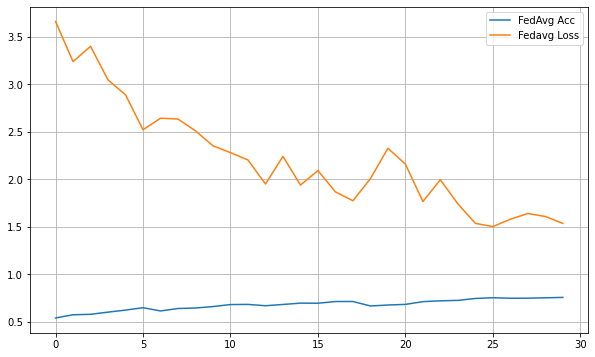

In [7]:
num = 5
average_acc_list, average_loss_list = [], []

for i in range(30):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

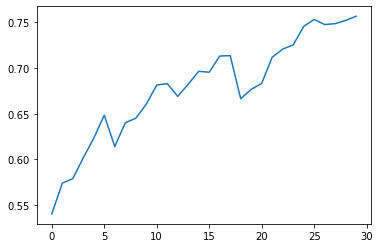

In [8]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [9]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.54017733335495, 0.573880667090416, 0.5787866659959157, 0.6017260028918585, 0.62310600121816, 0.648401999870936, 0.6140459990501403, 0.6400186667839686, 0.645040001074473, 0.6604346666733423, 0.6813986647129059, 0.6830240009228389, 0.6690506660938264, 0.6823299982150396, 0.6964586675167084, 0.6954913310209909, 0.713202665646871, 0.7136913339296976, 0.6664300016562145, 0.676701998313268, 0.6832906659444172, 0.71192866563797, 0.7208240004380544, 0.7254446645577749, 0.7456253325939178, 0.7533493328094483, 0.747743333975474, 0.7487259991963705, 0.7522666680812835, 0.7568420008818307] 

[3.661635935703913, 3.2390090974171954, 3.399840000470479, 3.0459783387184145, 2.8890692842006684, 2.521496146917343, 2.6429468735059105, 2.6345307127634685, 2.5099510033925374, 2.3523752025763196, 2.2808235422770182, 2.203507624467214, 1.9505756596724193, 2.2414594876766207, 1.939225122531255, 2.0917708905537924, 1.8676560163497924, 1.7741698447863261, 2.007205024957657, 2.3263767695426942, 2.159652187824